# Dual data types (low and high moment seperately)


In [1]:
try:
    # Check if the code is running in an IPython kernel (which includes Jupyter notebooks)
    get_ipython()
    # If the above line doesn't raise an error, it means we are in a Jupyter environment
    # Execute the magic commands using IPython's run_line_magic function
    get_ipython().run_line_magic('load_ext', 'autoreload')
    get_ipython().run_line_magic('autoreload', '2')
except:
    # If get_ipython() raises an error, we are not in a Jupyter environment
    # # #%load_ext autoreload
    # # #%autoreload 2
    pass

In [2]:
import integrate as ig
# check if parallel computations can be performed
parallel = ig.use_parallel(showInfo=1)

import h5py
import numpy as np
import matplotlib.pyplot as plt
hardcopy=True

Notebook detected. Parallel processing is OK


In [3]:
case = 'DAUGAARD'
files = ig.get_case_data(case=case)
f_data_h5 = files[0]
f_data_h5 = 'DAUGAARD_AVG.h5'
file_gex= ig.get_gex_file_from_data(f_data_h5)

print("Using data file: %s" % f_data_h5)
print("Using GEX file: %s" % file_gex)

Getting data for case: DAUGAARD
--> Got data for case: DAUGAARD
Using data file: DAUGAARD_AVG.h5
Using GEX file: TX07_20231016_2x4_RC20-33.gex


## 1. Setup the prior model ($\rho(\mathbf{m},\mathbf{d})$

In this example a simple layered prior model will be considered

### 1a. first, a sample of the prior model parameters, $\rho(\mathbf{m})$, will be generated

In [4]:
N=25000
# Layered model
f_prior_h5 = ig.prior_model_layered(N=N,lay_dist='chi2', NLAY_deg=3, RHO_min=1, RHO_max=3000)
f_prior_data_h5 = ig.prior_data_gaaem(f_prior_h5, file_gex, parallel=parallel, showInfo=0)
ig.integrate_update_prior_attributes(f_prior_data_h5)

prior_layered:   0%|                                                                              | 0/25000 [00:00<?, ?it/s]

File PRIOR_CHI2_NF_3_log-uniform_N25000.h5 does not exist.
Using file_basename=TX07_20231016_2x4_RC20-33


prior_data_gaaem: Using 32 parallel threads.


gatdaem1d:   0%|                                                                                    | 0/782 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                    | 0/782 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                    | 0/781 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                    | 0/781 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                    | 0/781 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                    | 0/782 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                    | 0/781 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                    | 0/781 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                    | 0/781 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                    | 0/781 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                    | 0/781 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                    | 0/781 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                    | 0/781 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                    | 0/781 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                    | 0/782 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                    | 0/782 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                    | 0/782 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                    | 0/781 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                    | 0/781 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                    | 0/782 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                    | 0/781 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                    | 0/781 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                    | 0/781 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                    | 0/781 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                    | 0/781 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                    | 0/781 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                    | 0/781 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                    | 0/782 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                    | 0/781 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                    | 0/781 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                    | 0/781 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                    | 0/781 [00:00<?, ?it/s]

gatdaem1d:   5%|███▍                                                                       | 36/781 [00:01<00:20, 35.83it/s]

gatdaem1d:   6%|████▌                                                                      | 47/782 [00:01<00:15, 46.52it/s]

gatdaem1d:   6%|████▌                                                                      | 48/781 [00:01<00:15, 47.49it/s]

gatdaem1d:   5%|███▍                                                                       | 36/781 [00:01<00:20, 35.74it/s]

gatdaem1d:   5%|███▍                                                                       | 36/781 [00:01<00:20, 35.89it/s]

gatdaem1d:   3%|██▌                                                                        | 27/781 [00:01<00:28, 26.78it/s]

gatdaem1d:   4%|███▏                                                                       | 33/782 [00:01<00:22, 32.79it/s]

gatdaem1d:   6%|████▋                                                                      | 49/781 [00:01<00:15, 48.41it/s]

gatdaem1d:   5%|███▌                                                                       | 37/782 [00:01<00:20, 36.01it/s]

gatdaem1d:   6%|████▎                                                                      | 45/781 [00:01<00:16, 44.60it/s]

gatdaem1d:   6%|████▌                                                                      | 47/781 [00:01<00:15, 46.11it/s]

gatdaem1d:   4%|███▎                                                                       | 35/781 [00:01<00:21, 34.36it/s]

gatdaem1d:   4%|██▋                                                                        | 28/781 [00:01<00:27, 27.13it/s]

gatdaem1d:   4%|███▎                                                                       | 34/782 [00:01<00:22, 33.75it/s]

gatdaem1d:   6%|████▌                                                                      | 48/781 [00:01<00:15, 47.56it/s]

gatdaem1d:   6%|████▍                                                                      | 46/781 [00:01<00:15, 45.95it/s]

gatdaem1d:   5%|███▌                                                                       | 37/781 [00:01<00:20, 36.16it/s]

gatdaem1d:   4%|███▎                                                                       | 35/781 [00:01<00:21, 34.43it/s]

gatdaem1d:   6%|████▍                                                                      | 46/781 [00:01<00:16, 45.93it/s]

gatdaem1d:   6%|████▎                                                                      | 45/782 [00:01<00:16, 44.53it/s]

gatdaem1d:   6%|████▎                                                                      | 45/781 [00:01<00:16, 44.97it/s]

gatdaem1d:   6%|████▍                                                                      | 46/781 [00:01<00:16, 45.48it/s]

gatdaem1d:   4%|███                                                                        | 32/782 [00:01<00:23, 31.37it/s]

gatdaem1d:   7%|████▉                                                                      | 52/781 [00:01<00:14, 51.48it/s]

gatdaem1d:   5%|███▋                                                                       | 38/782 [00:01<00:20, 36.79it/s]

gatdaem1d:   6%|████▍                                                                      | 46/781 [00:01<00:16, 45.15it/s]

gatdaem1d:   4%|███▎                                                                       | 34/782 [00:01<00:22, 33.88it/s]

gatdaem1d:   3%|██▍                                                                        | 25/781 [00:01<00:30, 24.47it/s]

gatdaem1d:   4%|███▎                                                                       | 34/781 [00:01<00:22, 33.90it/s]

gatdaem1d:   6%|████▌                                                                      | 47/781 [00:01<00:15, 46.57it/s]

gatdaem1d:   5%|███▌                                                                       | 37/781 [00:01<00:20, 36.22it/s]

gatdaem1d:   6%|████▎                                                                      | 45/781 [00:01<00:16, 44.47it/s]

gatdaem1d:   9%|██████▍                                                                    | 67/782 [00:02<00:21, 33.50it/s]

gatdaem1d:   9%|██████▉                                                                    | 72/781 [00:02<00:19, 35.73it/s]

gatdaem1d:  10%|███████▊                                                                   | 82/782 [00:02<00:17, 41.17it/s]

gatdaem1d:  12%|████████▋                                                                  | 90/781 [00:02<00:15, 44.73it/s]

gatdaem1d:   7%|█████▍                                                                     | 57/781 [00:02<00:25, 28.49it/s]

gatdaem1d:   9%|██████▋                                                                    | 70/781 [00:02<00:20, 34.64it/s]

gatdaem1d:   9%|███████                                                                    | 74/781 [00:02<00:19, 36.58it/s]

gatdaem1d:   8%|██████▏                                                                    | 64/781 [00:02<00:22, 32.03it/s]

gatdaem1d:   9%|██████▉                                                                    | 72/781 [00:02<00:20, 35.03it/s]

gatdaem1d:   9%|██████▌                                                                    | 69/782 [00:02<00:20, 34.38it/s]

gatdaem1d:   8%|██████▎                                                                    | 66/782 [00:02<00:21, 32.89it/s]

gatdaem1d:   9%|██████▊                                                                    | 71/781 [00:02<00:20, 35.16it/s]

gatdaem1d:  10%|███████▍                                                                   | 78/782 [00:02<00:17, 39.67it/s]

gatdaem1d:  12%|████████▋                                                                  | 90/782 [00:02<00:15, 44.42it/s]

gatdaem1d:  12%|████████▉                                                                  | 93/781 [00:02<00:14, 46.05it/s]

gatdaem1d:  12%|█████████▏                                                                 | 96/781 [00:02<00:14, 46.14it/s]

gatdaem1d:  12%|█████████                                                                  | 94/782 [00:02<00:15, 45.10it/s]

gatdaem1d:  12%|████████▊                                                                  | 92/781 [00:02<00:15, 45.23it/s]

gatdaem1d:  12%|█████████                                                                  | 95/781 [00:02<00:14, 47.30it/s]

gatdaem1d:  12%|████████▊                                                                  | 92/781 [00:02<00:15, 45.17it/s]

gatdaem1d:   9%|██████▋                                                                    | 70/781 [00:02<00:20, 34.89it/s]

gatdaem1d:  11%|███████▉                                                                   | 83/782 [00:02<00:16, 41.12it/s]

gatdaem1d:  11%|████████▎                                                                  | 86/781 [00:02<00:15, 43.62it/s]

gatdaem1d:   9%|██████▊                                                                    | 71/781 [00:02<00:19, 36.57it/s]

gatdaem1d:   9%|███████                                                                    | 74/781 [00:02<00:19, 35.79it/s]

gatdaem1d:  12%|████████▋                                                                  | 90/781 [00:02<00:15, 43.93it/s]

gatdaem1d:  13%|█████████▍                                                                 | 98/781 [00:02<00:14, 46.50it/s]

gatdaem1d:  12%|█████████                                                                  | 94/781 [00:02<00:17, 38.85it/s]

gatdaem1d:  12%|█████████▏                                                                 | 96/781 [00:02<00:17, 39.33it/s]

gatdaem1d:  12%|████████▊                                                                  | 92/781 [00:02<00:18, 37.23it/s]

gatdaem1d:  12%|████████▋                                                                  | 90/781 [00:02<00:18, 37.49it/s]

gatdaem1d:  13%|█████████▊                                                                | 104/781 [00:02<00:18, 37.39it/s]

gatdaem1d:  13%|█████████▋                                                                | 102/782 [00:03<00:20, 33.92it/s]

gatdaem1d:  15%|███████████                                                               | 117/781 [00:03<00:16, 39.89it/s]

gatdaem1d:  16%|████████████                                                              | 127/782 [00:03<00:15, 42.84it/s]

gatdaem1d:  14%|██████████▋                                                               | 113/781 [00:03<00:17, 37.46it/s]

gatdaem1d:  13%|█████████▍                                                                 | 98/781 [00:03<00:20, 32.73it/s]

gatdaem1d:  13%|█████████▌                                                                | 101/782 [00:03<00:20, 33.75it/s]

gatdaem1d:  12%|████████▉                                                                  | 93/781 [00:03<00:21, 31.40it/s]

gatdaem1d:  17%|████████████▊                                                             | 135/781 [00:03<00:14, 44.03it/s]

gatdaem1d:  15%|██████████▉                                                               | 115/782 [00:03<00:16, 39.53it/s]

gatdaem1d:  13%|█████████▉                                                                | 105/781 [00:03<00:19, 34.23it/s]

gatdaem1d:  16%|███████████▋                                                              | 123/782 [00:03<00:15, 41.82it/s]

gatdaem1d:  17%|████████████▊                                                             | 135/782 [00:03<00:14, 44.30it/s]

gatdaem1d:  14%|██████████▋                                                               | 113/781 [00:03<00:17, 38.47it/s]

gatdaem1d:  14%|██████████▏                                                               | 107/781 [00:03<00:19, 35.08it/s]

gatdaem1d:  17%|████████████▋                                                             | 134/781 [00:03<00:14, 43.87it/s]

gatdaem1d:  16%|███████████▌                                                              | 122/781 [00:03<00:16, 41.10it/s]

gatdaem1d:  18%|█████████████▌                                                            | 143/781 [00:03<00:13, 45.69it/s]

gatdaem1d:  18%|█████████████                                                             | 138/781 [00:03<00:14, 44.68it/s]

gatdaem1d:  14%|██████████▏                                                               | 108/781 [00:03<00:19, 34.03it/s]

gatdaem1d:  19%|█████████████▋                                                            | 145/781 [00:03<00:13, 45.69it/s]

gatdaem1d:  14%|██████████▏                                                               | 108/781 [00:03<00:19, 35.32it/s]

gatdaem1d:  17%|████████████▎                                                             | 130/781 [00:03<00:15, 40.69it/s]

gatdaem1d:  18%|█████████████                                                             | 138/781 [00:03<00:15, 41.89it/s]

gatdaem1d:  16%|███████████▊                                                              | 125/782 [00:03<00:17, 36.95it/s]

gatdaem1d:  18%|█████████████▏                                                            | 139/781 [00:03<00:15, 41.28it/s]

gatdaem1d:  18%|█████████████▍                                                            | 142/781 [00:03<00:15, 41.75it/s]

gatdaem1d:  18%|█████████████▏                                                            | 140/782 [00:03<00:16, 38.79it/s]

gatdaem1d:  17%|████████████▋                                                             | 134/781 [00:03<00:16, 38.88it/s]

gatdaem1d:  18%|█████████████▎                                                            | 140/781 [00:03<00:16, 39.04it/s]

gatdaem1d:  18%|█████████████▌                                                            | 143/781 [00:03<00:16, 39.38it/s]

gatdaem1d:  17%|████████████▏                                                             | 129/781 [00:03<00:18, 35.16it/s]

gatdaem1d:  20%|██████████████▍                                                           | 153/781 [00:03<00:15, 41.58it/s]

gatdaem1d:  22%|████████████████▏                                                         | 171/782 [00:04<00:14, 43.10it/s]

gatdaem1d:  19%|██████████████                                                            | 148/782 [00:04<00:16, 38.33it/s]

gatdaem1d:  21%|███████████████▏                                                          | 161/782 [00:04<00:14, 42.03it/s]

gatdaem1d:  16%|████████████▏                                                             | 128/781 [00:04<00:19, 32.77it/s]

gatdaem1d:  23%|█████████████████                                                         | 180/781 [00:04<00:13, 44.36it/s]

gatdaem1d:  18%|█████████████▋                                                            | 144/781 [00:04<00:16, 37.73it/s]

gatdaem1d:  22%|███████████████▉                                                          | 169/782 [00:04<00:14, 43.33it/s]

gatdaem1d:  23%|█████████████████▏                                                        | 182/782 [00:04<00:13, 45.24it/s]

gatdaem1d:  18%|█████████████▎                                                            | 140/781 [00:04<00:18, 34.04it/s]

gatdaem1d:  23%|█████████████████▏                                                        | 182/781 [00:04<00:13, 45.28it/s]

gatdaem1d:  22%|███████████████▉                                                          | 168/781 [00:04<00:14, 42.67it/s]

gatdaem1d:  23%|█████████████████▎                                                        | 183/781 [00:04<00:13, 44.69it/s]

gatdaem1d:  19%|██████████████▎                                                           | 151/781 [00:04<00:17, 36.16it/s]

gatdaem1d:  25%|██████████████████▏                                                       | 192/781 [00:04<00:12, 46.00it/s]

gatdaem1d:  20%|██████████████▉                                                           | 157/781 [00:04<00:16, 37.88it/s]

gatdaem1d:  18%|█████████████▌                                                            | 143/781 [00:04<00:18, 34.26it/s]

gatdaem1d:  17%|████████████▊                                                             | 135/782 [00:04<00:20, 31.93it/s]

gatdaem1d:  18%|█████████████▋                                                            | 144/781 [00:04<00:18, 35.01it/s]

gatdaem1d:  19%|██████████████▍                                                           | 152/781 [00:04<00:17, 35.83it/s]

gatdaem1d:  24%|█████████████████▌                                                        | 186/781 [00:04<00:13, 43.26it/s]

gatdaem1d:  18%|█████████████▌                                                            | 143/781 [00:04<00:20, 31.16it/s]

gatdaem1d:  24%|█████████████████▋                                                        | 187/781 [00:04<00:13, 42.70it/s]

gatdaem1d:  22%|████████████████▏                                                         | 171/781 [00:04<00:16, 37.54it/s]

gatdaem1d:  21%|███████████████▍                                                          | 163/782 [00:04<00:17, 35.06it/s]

gatdaem1d:  24%|█████████████████▉                                                        | 189/781 [00:04<00:15, 39.23it/s]

gatdaem1d:  24%|█████████████████▌                                                        | 185/781 [00:04<00:14, 39.96it/s]

gatdaem1d:  23%|█████████████████                                                         | 180/782 [00:04<00:16, 37.40it/s]

gatdaem1d:  22%|████████████████▍                                                         | 174/781 [00:04<00:16, 37.20it/s]

gatdaem1d:  22%|████████████████▍                                                         | 174/781 [00:04<00:15, 38.37it/s]

gatdaem1d:  23%|█████████████████▏                                                        | 181/781 [00:04<00:16, 36.70it/s]

gatdaem1d:  25%|██████████████████▋                                                       | 197/781 [00:04<00:13, 42.23it/s]

gatdaem1d:  23%|█████████████████▏                                                        | 181/781 [00:04<00:16, 36.24it/s]

gatdaem1d:  28%|████████████████████▌                                                     | 217/782 [00:05<00:12, 43.80it/s]

gatdaem1d:  25%|██████████████████▎                                                       | 194/782 [00:05<00:14, 40.76it/s]

gatdaem1d:  27%|███████████████████▋                                                      | 208/782 [00:05<00:13, 43.54it/s]

gatdaem1d:  21%|███████████████▍                                                          | 163/781 [00:05<00:18, 33.33it/s]

gatdaem1d:  24%|█████████████████▉                                                        | 189/781 [00:05<00:14, 40.13it/s]

gatdaem1d:  29%|█████████████████████▍                                                    | 226/781 [00:05<00:12, 44.66it/s]

gatdaem1d:  27%|████████████████████▎                                                     | 214/782 [00:05<00:12, 43.72it/s]

gatdaem1d:  29%|█████████████████████▌                                                    | 228/782 [00:05<00:12, 45.15it/s]

gatdaem1d:  22%|████████████████▌                                                         | 175/781 [00:05<00:17, 34.23it/s]

gatdaem1d:  27%|████████████████████                                                      | 212/781 [00:05<00:13, 42.99it/s]

gatdaem1d:  29%|█████████████████████▌                                                    | 228/781 [00:05<00:12, 44.81it/s]

gatdaem1d:  31%|██████████████████████▋                                                   | 239/781 [00:05<00:11, 45.82it/s]

gatdaem1d:  23%|█████████████████                                                         | 180/782 [00:05<00:16, 36.33it/s]

gatdaem1d:  24%|█████████████████▊                                                        | 188/781 [00:05<00:15, 38.14it/s]

gatdaem1d:  24%|█████████████████▊                                                        | 188/781 [00:05<00:16, 35.57it/s]

gatdaem1d:  23%|████████████████▊                                                         | 178/781 [00:05<00:17, 33.81it/s]

gatdaem1d:  25%|██████████████████▌                                                       | 196/781 [00:05<00:16, 36.51it/s]

gatdaem1d:  24%|█████████████████▉                                                        | 189/781 [00:05<00:16, 35.21it/s]

gatdaem1d:  29%|█████████████████████▊                                                    | 230/781 [00:05<00:12, 43.22it/s]

gatdaem1d:  23%|████████████████▊                                                         | 178/781 [00:05<00:18, 32.12it/s]

gatdaem1d:  29%|█████████████████████▌                                                    | 228/781 [00:05<00:13, 39.90it/s]

gatdaem1d:  30%|█████████████████████▉                                                    | 231/781 [00:05<00:13, 42.03it/s]

gatdaem1d:  27%|███████████████████▊                                                      | 209/781 [00:05<00:15, 36.87it/s]

gatdaem1d:  25%|██████████████████▊                                                       | 199/782 [00:05<00:16, 34.86it/s]

gatdaem1d:  28%|████████████████████▋                                                     | 218/781 [00:05<00:14, 40.21it/s]

gatdaem1d:  28%|████████████████████▋                                                     | 218/782 [00:05<00:15, 36.29it/s]

gatdaem1d:  27%|████████████████████                                                      | 212/781 [00:05<00:15, 36.31it/s]

gatdaem1d:  29%|█████████████████████▍                                                    | 226/781 [00:05<00:14, 38.14it/s]

gatdaem1d:  31%|██████████████████████▉                                                   | 242/781 [00:05<00:12, 42.89it/s]

gatdaem1d:  29%|█████████████████████▊                                                    | 230/781 [00:05<00:14, 37.05it/s]

gatdaem1d:  28%|████████████████████▊                                                     | 219/781 [00:05<00:15, 35.91it/s]

gatdaem1d:  28%|████████████████████▊                                                     | 219/781 [00:05<00:15, 35.88it/s]

gatdaem1d:  31%|██████████████████████▋                                                   | 240/782 [00:06<00:12, 42.29it/s]

gatdaem1d:  25%|██████████████████▊                                                       | 199/781 [00:06<00:17, 34.17it/s]

gatdaem1d:  35%|█████████████████████████▋                                                | 271/781 [00:06<00:11, 44.62it/s]

gatdaem1d:  33%|████████████████████████▌                                                 | 260/782 [00:06<00:11, 44.15it/s]

gatdaem1d:  33%|████████████████████████▍                                                 | 258/781 [00:06<00:11, 43.85it/s]

gatdaem1d:  35%|█████████████████████████▉                                                | 274/782 [00:06<00:11, 44.97it/s]

gatdaem1d:  27%|███████████████████▉                                                      | 210/781 [00:06<00:16, 34.15it/s]

gatdaem1d:  33%|████████████████████████▋                                                 | 261/782 [00:06<00:12, 42.24it/s]

gatdaem1d:  35%|█████████████████████████▊                                                | 273/781 [00:06<00:11, 44.59it/s]

gatdaem1d:  32%|███████████████████████▊                                                  | 252/782 [00:06<00:12, 41.73it/s]

gatdaem1d:  36%|███████████████████████████                                               | 285/781 [00:06<00:10, 45.49it/s]

gatdaem1d:  30%|██████████████████████                                                    | 233/781 [00:06<00:14, 38.49it/s]

gatdaem1d:  29%|█████████████████████▎                                                    | 225/781 [00:06<00:14, 38.14it/s]

gatdaem1d:  29%|█████████████████████▊                                                    | 230/781 [00:06<00:14, 38.25it/s]

gatdaem1d:  29%|█████████████████████                                                     | 223/782 [00:06<00:14, 38.16it/s]

gatdaem1d:  30%|█████████████████████▉                                                    | 231/781 [00:06<00:14, 39.18it/s]

gatdaem1d:  30%|██████████████████████                                                    | 233/781 [00:06<00:15, 35.81it/s]

gatdaem1d:  35%|██████████████████████████                                                | 275/781 [00:06<00:11, 43.78it/s]

gatdaem1d:  27%|████████████████████                                                      | 212/781 [00:06<00:17, 32.67it/s]

gatdaem1d:  29%|█████████████████████▎                                                    | 225/781 [00:06<00:16, 34.69it/s]

gatdaem1d:  31%|███████████████████████                                                   | 244/782 [00:06<00:14, 38.01it/s]

gatdaem1d:  32%|███████████████████████▍                                                  | 247/781 [00:06<00:14, 35.85it/s]

gatdaem1d:  34%|█████████████████████████                                                 | 265/781 [00:06<00:12, 42.20it/s]

gatdaem1d:  32%|███████████████████████▌                                                  | 249/781 [00:06<00:14, 36.18it/s]

gatdaem1d:  34%|█████████████████████████▍                                                | 269/781 [00:06<00:13, 37.13it/s]

gatdaem1d:  35%|█████████████████████████▉                                                | 274/781 [00:06<00:12, 39.29it/s]

gatdaem1d:  33%|████████████████████████▏                                                 | 255/782 [00:06<00:14, 35.75it/s]

gatdaem1d:  37%|███████████████████████████▏                                              | 287/781 [00:06<00:11, 43.29it/s]

gatdaem1d:  33%|████████████████████████▎                                                 | 256/781 [00:06<00:14, 35.27it/s]

gatdaem1d:  34%|█████████████████████████▍                                                | 268/781 [00:06<00:14, 35.61it/s]

gatdaem1d:  34%|█████████████████████████                                                 | 265/781 [00:06<00:14, 35.46it/s]

gatdaem1d:  33%|████████████████████████▎                                                 | 256/781 [00:07<00:15, 34.04it/s]

gatdaem1d:  37%|███████████████████████████                                               | 286/782 [00:07<00:11, 43.38it/s]

gatdaem1d:  31%|███████████████████████▎                                                  | 246/781 [00:07<00:13, 38.25it/s]

gatdaem1d:  40%|█████████████████████████████▉                                            | 316/781 [00:07<00:10, 44.66it/s]

gatdaem1d:  39%|████████████████████████████▊                                             | 305/782 [00:07<00:10, 43.98it/s]

gatdaem1d:  41%|██████████████████████████████▏                                           | 319/782 [00:07<00:10, 44.66it/s]

gatdaem1d:  31%|███████████████████████▏                                                  | 245/781 [00:07<00:15, 34.11it/s]

gatdaem1d:  36%|██████████████████████████▎                                               | 278/781 [00:07<00:12, 40.34it/s]

gatdaem1d:  42%|███████████████████████████████▎                                          | 331/781 [00:07<00:09, 45.17it/s]

gatdaem1d:  34%|█████████████████████████▍                                                | 269/781 [00:07<00:12, 39.76it/s]

gatdaem1d:  35%|██████████████████████████▏                                               | 276/781 [00:07<00:12, 40.93it/s]

gatdaem1d:  41%|██████████████████████████████▏                                           | 318/781 [00:07<00:10, 42.87it/s]

gatdaem1d:  39%|████████████████████████████▌                                             | 302/781 [00:07<00:11, 41.43it/s]

gatdaem1d:  36%|██████████████████████████▎                                               | 278/781 [00:07<00:13, 38.49it/s]

gatdaem1d:  34%|█████████████████████████▍                                                | 269/781 [00:07<00:13, 36.86it/s]

gatdaem1d:  41%|██████████████████████████████▌                                           | 323/781 [00:07<00:10, 44.89it/s]

gatdaem1d:  34%|████████████████████████▊                                                 | 262/782 [00:07<00:14, 36.21it/s]

gatdaem1d:  39%|████████████████████████████▊                                             | 304/782 [00:07<00:12, 39.00it/s]

gatdaem1d:  32%|███████████████████████▍                                                  | 248/781 [00:07<00:15, 33.49it/s]

gatdaem1d:  38%|███████████████████████████▊                                              | 294/782 [00:07<00:12, 38.50it/s]

gatdaem1d:  33%|████████████████████████▋                                                 | 260/781 [00:07<00:15, 33.61it/s]

gatdaem1d:  36%|██████████████████████████▊                                               | 283/782 [00:07<00:13, 37.24it/s]

gatdaem1d:  40%|█████████████████████████████▎                                            | 309/781 [00:07<00:11, 42.52it/s]

gatdaem1d:  36%|██████████████████████████▊                                               | 283/781 [00:07<00:14, 35.36it/s]

gatdaem1d:  38%|████████████████████████████                                              | 296/781 [00:07<00:12, 39.36it/s]

gatdaem1d:  43%|███████████████████████████████▍                                          | 332/781 [00:07<00:10, 43.71it/s]

gatdaem1d:  37%|███████████████████████████▌                                              | 291/782 [00:07<00:13, 35.11it/s]

gatdaem1d:  39%|█████████████████████████████                                             | 307/781 [00:07<00:13, 36.19it/s]

gatdaem1d:  39%|████████████████████████████▌                                             | 301/781 [00:07<00:12, 38.10it/s]

gatdaem1d:  40%|█████████████████████████████▊                                            | 314/781 [00:07<00:12, 37.54it/s]

gatdaem1d:  40%|█████████████████████████████▊                                            | 314/781 [00:07<00:12, 38.46it/s]

gatdaem1d:  40%|█████████████████████████████▎                                            | 310/781 [00:07<00:12, 38.19it/s]

gatdaem1d:  37%|███████████████████████████▌                                              | 291/781 [00:08<00:14, 33.88it/s]

gatdaem1d:  38%|███████████████████████████▊                                              | 293/781 [00:08<00:11, 40.96it/s]

gatdaem1d:  46%|██████████████████████████████████▎                                       | 362/781 [00:08<00:09, 45.05it/s]

gatdaem1d:  43%|███████████████████████████████▌                                          | 334/782 [00:08<00:10, 44.54it/s]

gatdaem1d:  47%|██████████████████████████████████▍                                       | 364/782 [00:08<00:09, 44.54it/s]

gatdaem1d:  36%|██████████████████████████▌                                               | 280/781 [00:08<00:14, 34.24it/s]

gatdaem1d:  41%|██████████████████████████████▌                                           | 323/781 [00:08<00:10, 41.64it/s]

gatdaem1d:  48%|███████████████████████████████████▋                                      | 377/781 [00:08<00:08, 45.20it/s]

gatdaem1d:  41%|██████████████████████████████▍                                           | 321/781 [00:08<00:10, 42.17it/s]

gatdaem1d:  45%|████████████████████████████████▉                                         | 348/781 [00:08<00:10, 42.65it/s]

gatdaem1d:  42%|██████████████████████████████▊                                           | 325/781 [00:08<00:11, 40.97it/s]

gatdaem1d:  46%|██████████████████████████████████▏                                       | 361/781 [00:08<00:10, 41.54it/s]

gatdaem1d:  47%|███████████████████████████████████                                       | 370/781 [00:08<00:09, 45.38it/s]

gatdaem1d:  40%|█████████████████████████████▎                                            | 309/781 [00:08<00:12, 37.44it/s]

gatdaem1d:  39%|█████████████████████████████                                             | 307/781 [00:08<00:13, 36.14it/s]

gatdaem1d:  36%|██████████████████████████▉                                               | 284/781 [00:08<00:14, 34.00it/s]

gatdaem1d:  38%|████████████████████████████▎                                             | 299/782 [00:08<00:13, 35.64it/s]

gatdaem1d:  45%|█████████████████████████████████                                         | 349/782 [00:08<00:11, 39.21it/s]

gatdaem1d:  38%|████████████████████████████                                              | 296/781 [00:08<00:14, 34.17it/s]

gatdaem1d:  44%|████████████████████████████████▌                                         | 344/782 [00:08<00:11, 37.41it/s]

gatdaem1d:  43%|███████████████████████████████▌                                          | 333/782 [00:08<00:12, 36.81it/s]

gatdaem1d:  41%|██████████████████████████████▍                                           | 321/782 [00:08<00:12, 36.37it/s]

gatdaem1d:  44%|████████████████████████████████▏                                         | 340/781 [00:08<00:10, 40.44it/s]

gatdaem1d:  48%|███████████████████████████████████▋                                      | 377/781 [00:08<00:09, 43.60it/s]

gatdaem1d:  41%|██████████████████████████████▏                                           | 319/781 [00:08<00:13, 34.41it/s]

gatdaem1d:  44%|████████████████████████████████▋                                         | 345/781 [00:08<00:10, 39.77it/s]

gatdaem1d:  42%|██████████████████████████████▉                                           | 327/782 [00:08<00:13, 34.59it/s]

gatdaem1d:  45%|█████████████████████████████████▎                                        | 352/781 [00:08<00:10, 40.03it/s]

gatdaem1d:  46%|██████████████████████████████████                                        | 360/781 [00:08<00:10, 40.62it/s]

gatdaem1d:  44%|████████████████████████████████▌                                         | 344/781 [00:08<00:12, 35.12it/s]

gatdaem1d:  46%|█████████████████████████████████▋                                        | 356/781 [00:08<00:10, 40.28it/s]

gatdaem1d:  45%|█████████████████████████████████▎                                        | 352/781 [00:09<00:11, 36.50it/s]

gatdaem1d:  43%|███████████████████████████████▋                                          | 335/781 [00:09<00:10, 41.08it/s]

gatdaem1d:  52%|██████████████████████████████████████▋                                   | 408/781 [00:09<00:08, 45.08it/s]

gatdaem1d:  42%|██████████████████████████████▉                                           | 326/781 [00:09<00:13, 33.99it/s]

gatdaem1d:  49%|███████████████████████████████████▉                                      | 380/782 [00:09<00:08, 44.74it/s]

gatdaem1d:  52%|██████████████████████████████████████▋                                   | 409/782 [00:09<00:08, 44.63it/s]

gatdaem1d:  40%|█████████████████████████████▊                                            | 315/781 [00:09<00:13, 34.36it/s]

gatdaem1d:  47%|██████████████████████████████████▊                                       | 367/781 [00:09<00:09, 42.36it/s]

gatdaem1d:  54%|████████████████████████████████████████                                  | 423/781 [00:09<00:07, 45.38it/s]

gatdaem1d:  47%|██████████████████████████████████▋                                       | 366/781 [00:09<00:09, 43.01it/s]

gatdaem1d:  51%|█████████████████████████████████████▍                                    | 395/781 [00:09<00:08, 43.87it/s]

gatdaem1d:  48%|███████████████████████████████████▏                                      | 371/781 [00:09<00:09, 42.40it/s]

gatdaem1d:  53%|███████████████████████████████████████▍                                  | 416/781 [00:09<00:08, 45.16it/s]

gatdaem1d:  45%|█████████████████████████████████▋                                        | 355/781 [00:09<00:10, 39.77it/s]

gatdaem1d:  42%|██████████████████████████████▊                                           | 325/781 [00:09<00:12, 35.89it/s]

gatdaem1d:  44%|████████████████████████████████▌                                         | 344/781 [00:09<00:12, 35.50it/s]

gatdaem1d:  43%|███████████████████████████████▋                                          | 335/782 [00:09<00:12, 35.15it/s]

gatdaem1d:  42%|███████████████████████████████▎                                          | 331/781 [00:09<00:13, 33.52it/s]

gatdaem1d:  52%|██████████████████████████████████████▏                                   | 403/781 [00:09<00:10, 37.66it/s]

gatdaem1d:  49%|████████████████████████████████████▏                                     | 382/782 [00:09<00:11, 35.78it/s]

gatdaem1d:  47%|███████████████████████████████████                                       | 371/782 [00:09<00:11, 35.47it/s]

gatdaem1d:  50%|████████████████████████████████████▉                                     | 390/782 [00:09<00:10, 36.66it/s]

gatdaem1d:  54%|███████████████████████████████████████▉                                  | 422/781 [00:09<00:08, 43.83it/s]

gatdaem1d:  45%|█████████████████████████████████▌                                        | 354/781 [00:09<00:12, 34.31it/s]

gatdaem1d:  46%|█████████████████████████████████▉                                        | 358/782 [00:09<00:11, 35.64it/s]

gatdaem1d:  50%|████████████████████████████████████▊                                     | 389/781 [00:09<00:09, 41.00it/s]

gatdaem1d:  49%|████████████████████████████████████                                      | 381/781 [00:09<00:10, 38.98it/s]

gatdaem1d:  52%|██████████████████████████████████████▍                                   | 406/781 [00:09<00:08, 42.13it/s]

gatdaem1d:  46%|██████████████████████████████████▎                                       | 362/782 [00:10<00:12, 33.80it/s]

gatdaem1d:  49%|████████████████████████████████████                                      | 380/781 [00:09<00:11, 34.99it/s]

gatdaem1d:  51%|█████████████████████████████████████▌                                    | 397/781 [00:09<00:09, 40.00it/s]

gatdaem1d:  50%|█████████████████████████████████████▏                                    | 393/781 [00:09<00:10, 38.28it/s]

gatdaem1d:  49%|████████████████████████████████████▏                                     | 382/781 [00:10<00:09, 42.76it/s]

gatdaem1d:  54%|████████████████████████████████████████▏                                 | 425/782 [00:10<00:07, 44.71it/s]

gatdaem1d:  58%|███████████████████████████████████████████                               | 454/781 [00:10<00:07, 44.73it/s]

gatdaem1d:  50%|████████████████████████████████████▊                                     | 389/781 [00:10<00:11, 35.43it/s]

gatdaem1d:  58%|██████████████████████████████████████████▉                               | 454/782 [00:10<00:07, 44.68it/s]

gatdaem1d:  46%|██████████████████████████████████▎                                       | 362/781 [00:10<00:10, 38.11it/s]

gatdaem1d:  46%|██████████████████████████████████▏                                       | 361/781 [00:10<00:12, 33.14it/s]

gatdaem1d:  53%|███████████████████████████████████████▏                                  | 413/781 [00:10<00:08, 43.25it/s]

gatdaem1d:  60%|████████████████████████████████████████████▍                             | 469/781 [00:10<00:06, 45.42it/s]

gatdaem1d:  53%|██████████████████████████████████████▉                                   | 411/781 [00:10<00:08, 43.49it/s]

gatdaem1d:  53%|███████████████████████████████████████▌                                  | 417/781 [00:10<00:08, 43.25it/s]

gatdaem1d:  51%|█████████████████████████████████████▉                                    | 401/781 [00:10<00:09, 41.40it/s]

gatdaem1d:  50%|████████████████████████████████████▉                                     | 390/781 [00:10<00:10, 38.44it/s]

gatdaem1d:  47%|███████████████████████████████████                                       | 371/782 [00:10<00:11, 34.60it/s]

gatdaem1d:  46%|██████████████████████████████████▎                                       | 362/781 [00:10<00:12, 34.65it/s]

gatdaem1d:  59%|███████████████████████████████████████████▊                              | 462/781 [00:10<00:07, 42.19it/s]

gatdaem1d:  47%|██████████████████████████████████▌                                       | 365/781 [00:10<00:12, 32.73it/s]

gatdaem1d:  57%|██████████████████████████████████████████▎                               | 447/781 [00:10<00:08, 39.29it/s]

gatdaem1d:  56%|█████████████████████████████████████████▋                                | 440/781 [00:10<00:08, 38.75it/s]

gatdaem1d:  51%|█████████████████████████████████████▉                                    | 400/781 [00:10<00:10, 37.63it/s]

gatdaem1d:  54%|███████████████████████████████████████▋                                  | 419/782 [00:10<00:10, 35.36it/s]

gatdaem1d:  56%|█████████████████████████████████████████                                 | 434/781 [00:10<00:08, 41.97it/s]

gatdaem1d:  50%|█████████████████████████████████████▎                                    | 394/782 [00:10<00:11, 35.15it/s]

gatdaem1d:  52%|██████████████████████████████████████▌                                   | 407/782 [00:10<00:10, 34.56it/s]

gatdaem1d:  55%|████████████████████████████████████████▌                                 | 428/782 [00:10<00:09, 35.88it/s]

gatdaem1d:  57%|██████████████████████████████████████████▌                               | 449/781 [00:10<00:07, 42.24it/s]

gatdaem1d:  52%|██████████████████████████████████████▏                                   | 403/782 [00:11<00:10, 35.75it/s]

gatdaem1d:  53%|███████████████████████████████████████▍                                  | 416/781 [00:11<00:10, 34.93it/s]

gatdaem1d:  54%|███████████████████████████████████████▉                                  | 421/781 [00:11<00:09, 37.51it/s]

gatdaem1d:  60%|████████████████████████████████████████████▏                             | 467/781 [00:11<00:07, 40.65it/s]

gatdaem1d:  55%|████████████████████████████████████████▋                                 | 430/781 [00:11<00:07, 44.16it/s]

gatdaem1d:  64%|███████████████████████████████████████████████▍                          | 500/781 [00:11<00:06, 44.97it/s]

gatdaem1d:  54%|████████████████████████████████████████▎                                 | 425/781 [00:11<00:10, 35.36it/s]

gatdaem1d:  64%|███████████████████████████████████████████████▎                          | 500/782 [00:11<00:06, 44.90it/s]

gatdaem1d:  51%|██████████████████████████████████████                                    | 402/781 [00:11<00:09, 38.42it/s]

gatdaem1d:  55%|████████████████████████████████████████▉                                 | 432/781 [00:11<00:09, 37.09it/s]

gatdaem1d:  52%|██████████████████████████████████████▎                                   | 405/781 [00:11<00:10, 36.09it/s]

gatdaem1d:  56%|█████████████████████████████████████████▌                                | 438/781 [00:11<00:08, 38.14it/s]

gatdaem1d:  58%|███████████████████████████████████████████▏                              | 456/781 [00:11<00:07, 43.84it/s]

gatdaem1d:  59%|███████████████████████████████████████████▍                              | 459/781 [00:11<00:07, 43.81it/s]

gatdaem1d:  66%|████████████████████████████████████████████████▉                         | 516/781 [00:11<00:05, 45.60it/s]

gatdaem1d:  59%|███████████████████████████████████████████▊                              | 463/781 [00:11<00:07, 43.87it/s]

gatdaem1d:  60%|████████████████████████████████████████████▍                             | 470/782 [00:11<00:07, 40.73it/s]

gatdaem1d:  57%|██████████████████████████████████████████                                | 444/781 [00:11<00:08, 41.83it/s]

gatdaem1d:  56%|█████████████████████████████████████████▏                                | 435/781 [00:11<00:08, 40.32it/s]

gatdaem1d:  51%|█████████████████████████████████████▋                                    | 398/781 [00:11<00:11, 34.81it/s]

gatdaem1d:  52%|██████████████████████████████████████▍                                   | 406/782 [00:11<00:10, 34.38it/s]

gatdaem1d:  51%|█████████████████████████████████████▉                                    | 401/781 [00:11<00:11, 33.41it/s]

gatdaem1d:  62%|█████████████████████████████████████████████▉                            | 485/781 [00:11<00:07, 40.42it/s]

gatdaem1d:  65%|███████████████████████████████████████████████▊                          | 505/781 [00:11<00:06, 40.38it/s]

gatdaem1d:  57%|██████████████████████████████████████████▏                               | 445/781 [00:11<00:08, 39.57it/s]

gatdaem1d:  62%|██████████████████████████████████████████████▏                           | 487/781 [00:11<00:07, 38.10it/s]

gatdaem1d:  62%|█████████████████████████████████████████████▌                            | 481/781 [00:11<00:06, 43.24it/s]

gatdaem1d:  57%|█████████████████████████████████████████▉                                | 443/782 [00:11<00:09, 34.89it/s]

gatdaem1d:  60%|████████████████████████████████████████████▊                             | 473/782 [00:11<00:08, 38.27it/s]

gatdaem1d:  58%|███████████████████████████████████████████                               | 455/782 [00:11<00:09, 34.68it/s]

gatdaem1d:  55%|████████████████████████████████████████▋                                 | 430/782 [00:11<00:10, 34.88it/s]

gatdaem1d:  57%|██████████████████████████████████████████▍                               | 449/782 [00:12<00:08, 38.61it/s]

gatdaem1d:  61%|█████████████████████████████████████████████▎                            | 478/781 [00:12<00:06, 45.30it/s]

gatdaem1d:  59%|███████████████████████████████████████████▍                              | 459/781 [00:12<00:08, 36.50it/s]

gatdaem1d:  70%|███████████████████████████████████████████████████▋                      | 546/781 [00:12<00:05, 45.03it/s]

gatdaem1d:  70%|███████████████████████████████████████████████████▋                      | 546/782 [00:12<00:05, 45.22it/s]

gatdaem1d:  60%|████████████████████████████████████████████▌                             | 470/781 [00:12<00:08, 37.93it/s]

gatdaem1d:  58%|██████████████████████████████████████████▊                               | 452/781 [00:12<00:09, 33.74it/s]

gatdaem1d:  57%|██████████████████████████████████████████▎                               | 447/781 [00:12<00:08, 40.39it/s]

gatdaem1d:  57%|██████████████████████████████████████████▌                               | 449/781 [00:12<00:08, 38.36it/s]

gatdaem1d:  63%|██████████████████████████████████████████████▌                           | 492/781 [00:12<00:07, 38.51it/s]

gatdaem1d:  60%|████████████████████████████████████████████▌                             | 470/781 [00:12<00:08, 36.39it/s]

gatdaem1d:  72%|█████████████████████████████████████████████████████▏                    | 562/781 [00:12<00:04, 45.37it/s]

gatdaem1d:  65%|████████████████████████████████████████████████▏                         | 509/781 [00:12<00:07, 38.39it/s]

gatdaem1d:  61%|█████████████████████████████████████████████▏                            | 477/781 [00:12<00:08, 37.10it/s]

gatdaem1d:  64%|███████████████████████████████████████████████▍                          | 500/781 [00:12<00:06, 42.54it/s]

gatdaem1d:  65%|████████████████████████████████████████████████▏                         | 508/781 [00:12<00:06, 44.11it/s]

gatdaem1d:  66%|████████████████████████████████████████████████▌                         | 513/782 [00:12<00:06, 41.30it/s]

gatdaem1d:  61%|█████████████████████████████████████████████▍                            | 480/781 [00:12<00:07, 41.61it/s]

gatdaem1d:  55%|█████████████████████████████████████████                                 | 433/781 [00:12<00:10, 34.64it/s]

gatdaem1d:  57%|█████████████████████████████████████████▊                                | 442/782 [00:12<00:09, 34.63it/s]

gatdaem1d:  62%|██████████████████████████████████████████████▏                           | 487/781 [00:12<00:07, 39.19it/s]

gatdaem1d:  64%|███████████████████████████████████████████████▋                          | 503/781 [00:12<00:07, 38.07it/s]

gatdaem1d:  56%|█████████████████████████████████████████▏                                | 435/781 [00:12<00:10, 33.17it/s]

gatdaem1d:  68%|██████████████████████████████████████████████████▍                       | 532/781 [00:12<00:05, 42.04it/s]

gatdaem1d:  63%|██████████████████████████████████████████████▌                           | 491/781 [00:12<00:07, 41.23it/s]

gatdaem1d:  67%|█████████████████████████████████████████████████▋                        | 525/781 [00:12<00:05, 43.26it/s]

gatdaem1d:  61%|█████████████████████████████████████████████▎                            | 479/782 [00:12<00:08, 34.96it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████                         | 518/782 [00:12<00:06, 40.02it/s]

gatdaem1d:  63%|██████████████████████████████████████████████▎                           | 490/782 [00:12<00:08, 34.69it/s]

gatdaem1d:  63%|██████████████████████████████████████████████▋                           | 494/782 [00:13<00:07, 40.42it/s]

gatdaem1d:  70%|███████████████████████████████████████████████████▋                      | 546/781 [00:13<00:06, 38.47it/s]

gatdaem1d:  67%|█████████████████████████████████████████████████▊                        | 526/781 [00:13<00:06, 36.62it/s]

gatdaem1d:  67%|█████████████████████████████████████████████████▋                        | 525/781 [00:13<00:05, 45.77it/s]

gatdaem1d:  59%|████████████████████████████████████████████                              | 465/782 [00:13<00:09, 32.80it/s]

gatdaem1d:  76%|████████████████████████████████████████████████████████                  | 592/782 [00:13<00:04, 45.37it/s]

gatdaem1d:  66%|████████████████████████████████████████████████▉                         | 517/781 [00:13<00:06, 40.41it/s]

gatdaem1d:  64%|███████████████████████████████████████████████                           | 497/781 [00:13<00:07, 36.72it/s]

gatdaem1d:  63%|██████████████████████████████████████████████▋                           | 493/781 [00:13<00:06, 41.87it/s]

gatdaem1d:  63%|██████████████████████████████████████████████▉                           | 495/781 [00:13<00:07, 40.51it/s]

gatdaem1d:  64%|██████████████████████████████████████████████▉                           | 496/781 [00:13<00:08, 35.40it/s]

gatdaem1d:  65%|████████████████████████████████████████████████                          | 507/781 [00:13<00:07, 35.74it/s]

gatdaem1d:  71%|████████████████████████████████████████████████████▍                     | 554/781 [00:13<00:05, 44.49it/s]

gatdaem1d:  70%|███████████████████████████████████████████████████▉                      | 548/781 [00:13<00:06, 37.60it/s]

gatdaem1d:  71%|████████████████████████████████████████████████████▉                     | 559/782 [00:13<00:05, 42.50it/s]

gatdaem1d:  76%|████████████████████████████████████████████████████████                  | 592/781 [00:13<00:04, 41.47it/s]

gatdaem1d:  68%|██████████████████████████████████████████████████▍                       | 532/781 [00:13<00:06, 36.98it/s]

gatdaem1d:  66%|████████████████████████████████████████████████▊                         | 515/781 [00:13<00:07, 35.32it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████▌                | 608/781 [00:13<00:04, 42.28it/s]

gatdaem1d:  70%|███████████████████████████████████████████████████▍                      | 543/781 [00:13<00:06, 39.09it/s]

gatdaem1d:  61%|█████████████████████████████████████████████▍                            | 479/781 [00:13<00:07, 37.86it/s]

gatdaem1d:  62%|█████████████████████████████████████████████▉                            | 486/782 [00:13<00:07, 37.21it/s]

gatdaem1d:  68%|██████████████████████████████████████████████████                        | 528/781 [00:13<00:06, 39.57it/s]

gatdaem1d:  67%|█████████████████████████████████████████████████▍                        | 522/781 [00:13<00:06, 38.91it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████▋                   | 577/781 [00:13<00:04, 42.78it/s]

gatdaem1d:  60%|████████████████████████████████████████████▍                             | 469/781 [00:13<00:09, 33.20it/s]

gatdaem1d:  69%|██████████████████████████████████████████████████▉                       | 537/781 [00:13<00:05, 42.36it/s]

gatdaem1d:  70%|███████████████████████████████████████████████████▍                      | 543/781 [00:13<00:06, 37.33it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████████                    | 570/781 [00:13<00:04, 43.68it/s]

gatdaem1d:  68%|██████████████████████████████████████████████████▌                       | 534/782 [00:13<00:06, 37.34it/s]

gatdaem1d:  66%|████████████████████████████████████████████████▋                         | 515/782 [00:13<00:07, 35.08it/s]

gatdaem1d:  71%|████████████████████████████████████████████████████▉                     | 559/782 [00:13<00:05, 39.59it/s]

gatdaem1d:  75%|███████████████████████████████████████████████████████▍                  | 585/781 [00:14<00:05, 37.99it/s]

gatdaem1d:  68%|██████████████████████████████████████████████████▋                       | 535/782 [00:14<00:06, 39.36it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████████                    | 571/781 [00:14<00:04, 45.74it/s]

gatdaem1d:  72%|█████████████████████████████████████████████████████▎                    | 563/781 [00:14<00:06, 35.64it/s]

gatdaem1d:  64%|███████████████████████████████████████████████▍                          | 501/782 [00:14<00:08, 33.39it/s]

gatdaem1d:  82%|████████████████████████████████████████████████████████████▎             | 638/782 [00:14<00:03, 45.28it/s]

gatdaem1d:  69%|███████████████████████████████████████████████████▎                      | 541/781 [00:14<00:06, 38.71it/s]

gatdaem1d:  72%|█████████████████████████████████████████████████████▏                    | 561/781 [00:14<00:05, 41.19it/s]

gatdaem1d:  69%|███████████████████████████████████████████████████▏                      | 540/781 [00:14<00:05, 41.77it/s]

gatdaem1d:  69%|██████████████████████████████████████████████████▉                       | 538/781 [00:14<00:05, 42.54it/s]

gatdaem1d:  68%|██████████████████████████████████████████████████▍                       | 532/781 [00:14<00:07, 35.28it/s]

gatdaem1d:  70%|███████████████████████████████████████████████████▍                      | 543/781 [00:14<00:06, 35.41it/s]

gatdaem1d:  77%|████████████████████████████████████████████████████████▊                 | 599/781 [00:14<00:04, 44.41it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████████▏                | 604/782 [00:14<00:04, 43.01it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████████▎             | 636/781 [00:14<00:03, 42.14it/s]

gatdaem1d:  75%|███████████████████████████████████████████████████████▌                  | 586/781 [00:14<00:05, 36.75it/s]

gatdaem1d:  71%|████████████████████████████████████████████████████▍                     | 553/781 [00:14<00:06, 35.98it/s]

gatdaem1d:  84%|█████████████████████████████████████████████████████████████▊            | 653/781 [00:14<00:02, 42.81it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████████                    | 570/781 [00:14<00:05, 35.97it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████                         | 518/781 [00:14<00:07, 36.79it/s]

gatdaem1d:  67%|█████████████████████████████████████████████████▌                        | 524/782 [00:14<00:07, 36.03it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████████               | 624/781 [00:14<00:03, 43.81it/s]

gatdaem1d:  66%|████████████████████████████████████████████████▋                         | 514/781 [00:14<00:07, 36.47it/s]

gatdaem1d:  75%|███████████████████████████████████████████████████████▏                  | 583/781 [00:14<00:05, 37.50it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████▊                    | 568/781 [00:14<00:05, 38.09it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████████▎               | 615/781 [00:14<00:03, 43.83it/s]

gatdaem1d:  72%|█████████████████████████████████████████████████████▏                    | 562/781 [00:14<00:05, 37.72it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████▍                   | 575/782 [00:14<00:05, 38.32it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████▉                   | 580/781 [00:14<00:04, 41.51it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████████                 | 603/782 [00:14<00:04, 40.84it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████▏                     | 551/782 [00:15<00:06, 34.59it/s]

gatdaem1d:  75%|███████████████████████████████████████████████████████▏                  | 582/781 [00:15<00:05, 35.59it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████████▍               | 617/781 [00:15<00:03, 45.38it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████▋         | 684/782 [00:15<00:02, 45.34it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████▍                | 606/781 [00:15<00:04, 42.26it/s]

gatdaem1d:  69%|██████████████████████████████████████████████████▊                       | 537/782 [00:15<00:07, 33.85it/s]

gatdaem1d:  75%|███████████████████████████████████████████████████████▌                  | 586/781 [00:15<00:04, 40.27it/s]

gatdaem1d:  77%|████████████████████████████████████████████████████████▊                 | 599/781 [00:15<00:05, 35.04it/s]

gatdaem1d:  75%|███████████████████████████████████████████████████████▌                  | 586/781 [00:15<00:04, 42.75it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████████               | 624/781 [00:15<00:04, 36.46it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████████                   | 581/781 [00:15<00:04, 41.10it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████▍                   | 575/782 [00:15<00:05, 36.79it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████▊                    | 568/781 [00:15<00:06, 34.61it/s]

gatdaem1d:  75%|███████████████████████████████████████████████████████▊                  | 589/781 [00:15<00:05, 38.34it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████████             | 645/781 [00:15<00:03, 44.71it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████████▍            | 649/782 [00:15<00:03, 43.46it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████▌         | 681/781 [00:15<00:02, 42.85it/s]

gatdaem1d:  81%|███████████████████████████████████████████████████████████▋              | 630/781 [00:15<00:03, 38.61it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████████▏       | 699/781 [00:15<00:01, 43.63it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████▌                | 608/781 [00:15<00:04, 36.44it/s]

gatdaem1d:  76%|███████████████████████████████████████████████████████▉                  | 590/781 [00:15<00:05, 35.06it/s]

gatdaem1d:  71%|████████████████████████████████████████████████████▌                     | 555/781 [00:15<00:06, 37.45it/s]

gatdaem1d:  81%|███████████████████████████████████████████████████████████▋              | 630/781 [00:15<00:03, 39.95it/s]

gatdaem1d:  71%|████████████████████████████████████████████████████▌                     | 555/781 [00:15<00:06, 36.23it/s]

gatdaem1d:  72%|█████████████████████████████████████████████████████                     | 561/782 [00:15<00:06, 35.81it/s]

gatdaem1d:  85%|██████████████████████████████████████████████████████████████▋           | 661/781 [00:15<00:02, 44.32it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████▌                | 607/781 [00:16<00:04, 37.04it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████████▏            | 646/782 [00:15<00:03, 41.32it/s]

gatdaem1d:  75%|███████████████████████████████████████████████████████▋                  | 589/782 [00:16<00:05, 35.41it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████████                | 614/782 [00:16<00:04, 37.29it/s]

gatdaem1d:  77%|████████████████████████████████████████████████████████▉                 | 601/781 [00:16<00:04, 36.58it/s]

gatdaem1d:  85%|██████████████████████████████████████████████████████████████▊           | 663/781 [00:16<00:02, 45.21it/s]

gatdaem1d:  80%|██████████████████████████████████████████████████████████▉               | 622/781 [00:16<00:04, 39.13it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████████▏                   | 572/782 [00:16<00:06, 34.15it/s]

gatdaem1d:  84%|█████████████████████████████████████████████████████████████▉            | 654/781 [00:16<00:02, 43.80it/s]

gatdaem1d:  81%|███████████████████████████████████████████████████████████▉              | 632/781 [00:16<00:03, 41.91it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████████     | 730/782 [00:16<00:01, 45.02it/s]

gatdaem1d:  81%|███████████████████████████████████████████████████████████▊              | 631/781 [00:16<00:03, 43.40it/s]

gatdaem1d:  82%|████████████████████████████████████████████████████████████▋             | 640/781 [00:16<00:03, 36.44it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████████▋               | 619/781 [00:16<00:04, 34.62it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████████▍          | 669/781 [00:16<00:02, 38.70it/s]

gatdaem1d:  85%|██████████████████████████████████████████████████████████████▋           | 661/781 [00:16<00:03, 36.01it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████▉                | 611/781 [00:16<00:04, 36.84it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████████▏             | 635/781 [00:16<00:03, 40.48it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████████▍        | 691/781 [00:16<00:02, 44.85it/s]

gatdaem1d:  89%|█████████████████████████████████████████████████████████████████▌        | 693/782 [00:16<00:02, 43.40it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████████▋     | 725/781 [00:16<00:01, 43.06it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████████                | 613/782 [00:16<00:04, 35.78it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████▏         | 677/781 [00:16<00:02, 40.87it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████████               | 623/781 [00:16<00:04, 38.71it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████████▎              | 626/781 [00:16<00:04, 34.19it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████████             | 645/781 [00:16<00:03, 34.72it/s]

gatdaem1d:  77%|████████████████████████████████████████████████████████▉                 | 601/781 [00:16<00:04, 39.69it/s]

gatdaem1d:  77%|████████████████████████████████████████████████████████▊                 | 600/781 [00:16<00:04, 38.55it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████████▍   | 743/781 [00:16<00:00, 40.05it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████████▉       | 706/781 [00:16<00:01, 44.19it/s]

gatdaem1d:  76%|████████████████████████████████████████████████████████▍                 | 597/782 [00:17<00:05, 34.58it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████████▍        | 691/782 [00:17<00:02, 42.32it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████████▎           | 659/782 [00:17<00:03, 39.37it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████████▏              | 625/782 [00:17<00:04, 34.95it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████████             | 645/781 [00:17<00:03, 35.98it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████████▌          | 671/781 [00:17<00:02, 37.13it/s]

gatdaem1d:  82%|████████████████████████████████████████████████████████████▍             | 638/781 [00:17<00:03, 35.92it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████████▏      | 709/781 [00:17<00:01, 45.13it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████▏         | 677/781 [00:17<00:02, 42.70it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████▌                | 608/782 [00:17<00:05, 34.46it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████████▍| 776/782 [00:17<00:00, 45.16it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████          | 676/781 [00:17<00:02, 43.72it/s]

gatdaem1d:  85%|██████████████████████████████████████████████████████████████▋           | 662/781 [00:17<00:03, 38.20it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████▏         | 677/781 [00:17<00:02, 35.84it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████████            | 655/781 [00:17<00:03, 33.95it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████████            | 655/781 [00:17<00:03, 38.89it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████▍         | 680/781 [00:17<00:02, 41.79it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████████▎      | 710/781 [00:17<00:01, 37.69it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████████▋    | 736/781 [00:17<00:01, 44.74it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████▉    | 739/782 [00:17<00:00, 44.11it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████████▏       | 698/781 [00:17<00:02, 34.73it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████████▏           | 657/782 [00:17<00:03, 38.03it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████████▏       | 698/781 [00:17<00:02, 40.46it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████████▍     | 722/781 [00:17<00:01, 41.94it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████████▊ | 769/781 [00:17<00:00, 42.12it/s]

gatdaem1d:  85%|██████████████████████████████████████████████████████████████▊           | 663/781 [00:17<00:03, 37.31it/s]

gatdaem1d:  85%|██████████████████████████████████████████████████████████████▋           | 662/781 [00:17<00:03, 34.62it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████▌         | 681/781 [00:17<00:02, 34.88it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████████▎            | 647/781 [00:17<00:03, 41.33it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████████▏            | 646/781 [00:17<00:03, 40.50it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████▏  | 751/781 [00:17<00:00, 44.13it/s]

gatdaem1d:  81%|███████████████████████████████████████████████████████████▉              | 634/782 [00:18<00:04, 35.10it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████████▋    | 736/782 [00:18<00:01, 42.85it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████████▋       | 705/782 [00:18<00:01, 41.29it/s]

gatdaem1d:  85%|██████████████████████████████████████████████████████████████▌           | 661/782 [00:18<00:03, 35.01it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████▌         | 682/781 [00:18<00:02, 35.87it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████▏         | 678/781 [00:18<00:02, 36.75it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████████▋  | 757/781 [00:18<00:00, 45.82it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████████▏      | 709/781 [00:18<00:01, 36.94it/s]

gatdaem1d:  84%|█████████████████████████████████████████████████████████████▉            | 655/782 [00:18<00:03, 37.98it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████████▌     | 723/781 [00:18<00:01, 44.50it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████████▌      | 713/781 [00:18<00:01, 35.67it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████████▍        | 690/781 [00:18<00:02, 34.16it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████████▍       | 701/781 [00:18<00:02, 37.35it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████████▌       | 702/781 [00:18<00:01, 41.10it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████████▉     | 727/781 [00:18<00:01, 43.30it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████████▏     | 720/781 [00:18<00:01, 40.45it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████████▋  | 757/781 [00:18<00:00, 40.04it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████████▌    | 734/781 [00:18<00:01, 34.86it/s]

gatdaem1d:  89%|█████████████████████████████████████████████████████████████████▊        | 696/782 [00:18<00:02, 37.96it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████████▊ | 769/781 [00:18<00:00, 43.23it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████████    | 740/781 [00:18<00:01, 39.14it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████████▉       | 706/781 [00:18<00:01, 38.88it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████████▏       | 698/781 [00:18<00:02, 34.81it/s]

gatdaem1d:  92%|███████████████████████████████████████████████████████████████████▉      | 717/781 [00:18<00:01, 34.83it/s]

gatdaem1d:  89%|█████████████████████████████████████████████████████████████████▊        | 694/781 [00:18<00:02, 42.47it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████████▎        | 689/781 [00:18<00:02, 40.49it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████████▍          | 670/782 [00:19<00:03, 34.95it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████████▏       | 699/782 [00:19<00:02, 35.81it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████████▋   | 747/782 [00:19<00:00, 40.70it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████████▋| 779/782 [00:19<00:00, 41.45it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████████      | 718/781 [00:19<00:01, 35.71it/s]

gatdaem1d:  92%|███████████████████████████████████████████████████████████████████▋      | 715/781 [00:19<00:01, 36.76it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████████▉   | 749/781 [00:19<00:00, 37.64it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████████▋       | 705/782 [00:19<00:01, 41.45it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████████▍| 775/781 [00:19<00:00, 46.64it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████   | 750/781 [00:19<00:00, 35.96it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████████▎    | 731/781 [00:19<00:01, 35.88it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████████▋  | 757/781 [00:19<00:00, 45.09it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████████    | 739/781 [00:19<00:01, 37.07it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████████▉| 780/781 [00:19<00:00, 37.99it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████▎  | 753/782 [00:19<00:00, 43.23it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████  | 761/781 [00:19<00:00, 39.24it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████████▉| 780/781 [00:19<00:00, 38.52it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████████▋   | 746/781 [00:19<00:00, 38.57it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████████    | 740/781 [00:19<00:01, 36.73it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████████▉  | 759/781 [00:19<00:00, 36.82it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████████▉   | 749/781 [00:19<00:00, 45.97it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████████▏    | 730/781 [00:19<00:01, 40.47it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████████       | 709/782 [00:20<00:02, 35.91it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████████    | 741/782 [00:20<00:01, 37.39it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████████▍| 775/781 [00:20<00:00, 41.75it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████████▊  | 758/781 [00:20<00:00, 38.43it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████  | 762/782 [00:20<00:00, 46.01it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████████▋| 778/781 [00:20<00:00, 38.88it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████████▊ | 770/782 [00:21<00:00, 43.08it/s]

prior_data_gaaem: Time= 21.7s/25000 soundings.  0.9ms/sounding, 1151.7it/s


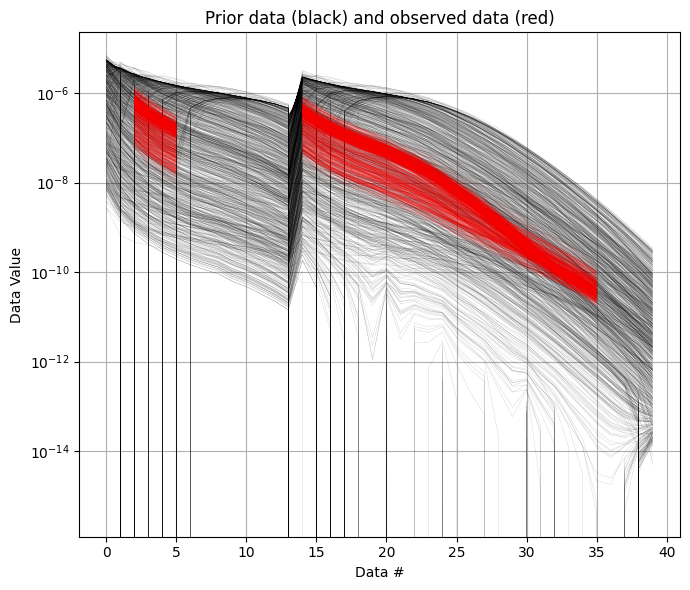

True

In [5]:
# into TWO data sets, LOW and HIGH moment.

ig.plot_data_prior(f_prior_data_h5, f_data_h5)

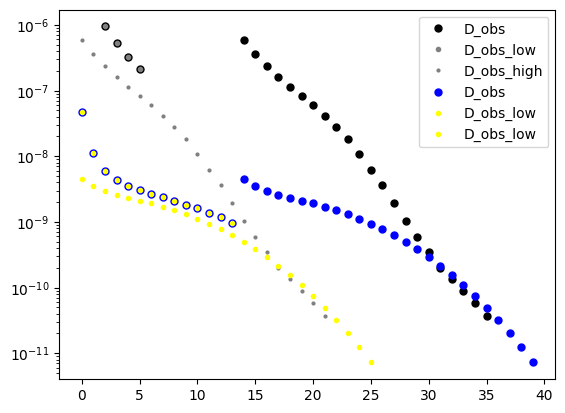

In [6]:
# Read D_obs from f_data_h5
with h5py.File(f_data_h5, 'r') as f:
    D_obs = f['D1/d_obs'][:]
    D_std = f['D1/d_std'][:]
# Alternatively, use the ig.load_data function    
#D_obs = ig.load_data(f_data_h5, id=1, showInfo=1)['d_obs'][0]
#D_std = ig.load_data(f_data_h5, id=1, showInfo=1)['d_std'][0]

with h5py.File(f_prior_data_h5, 'r') as f:
    D = f['/D1'][:]
# Alternatively, use the ig.load_prior_data function    
#D = ig.load_prior_data(f_prior_data_h5)[0][0]
    
# Now splot the into low and high moment data sets
# The low moment data set will be the first 14 columns, and the high moment data set will be the last columns.
nd = D_obs.shape[1]
n_low = 14
n_high = nd - n_low
# set i low to 0:n_low-1
i_low = range(n_low)
i_high = range(n_low, nd)

# Split prior data
D_low = D[:,i_low]
D_high = D[:,i_high]
# Split observed data
D_obs_low = D_obs[:,i_low]
D_std_low = D_std[:,i_low]*2
D_obs_high = D_obs[:,i_high]
D_std_high = D_std[:,i_high]*2


plt.semilogy(D_obs[0],'k.',markersize=10, label='D_obs')
plt.semilogy(D_obs_low[0],'.', color='gray', markersize=6, label='D_obs_low')
plt.semilogy(D_obs_high[0],'.', color='gray',markersize=4, label='D_obs_high')

plt.semilogy(D[0],'b.',markersize=10, label='D_obs')
plt.semilogy(D_low[0],'.', color='yellow', markersize=6, label='D_obs_low')
plt.semilogy(D_high[0],'.', color='yellow', markersize=6, label='D_obs_low')
plt.legend()

In [7]:
f_data_dual_h5 = 'DAUGAARD_AVG_dual.h5'

useOldMethod = False
if useOldMethod:
    ig.copy_hdf5_file(f_data_h5,f_data_dual_h5)
    # Delete D1
    with h5py.File(f_data_dual_h5, 'a') as f:
        # show groups in f['']
        if 'D1' in f.keys():
            del(f['D1'])
    # Update D1 and D2      
    with h5py.File(f_data_dual_h5, 'a') as f:
        # remove 'D1' 
        #del f['D1']
        f.create_dataset('D1/d_obs', data=D_obs_low)
        f.create_dataset('D1/d_std', data=D_std_low)
        f['D1'].attrs['noise_model'] = 'gaussian'
        f.create_dataset('D2/d_obs', data=D_obs_high)
        f.create_dataset('D2/d_std', data=D_std_high)
        f['D2'].attrs['noise_model'] = 'gaussian'
else:
    # Alternatively, use the ig.save_data_gaussian function
    ig.copy_hdf5_file(f_data_h5,f_data_dual_h5)
    ig.save_data_gaussian(D_obs_low, D_std = D_std_low, f_data_h5 = f_data_dual_h5, id=1, showInfo=0)
    ig.save_data_gaussian(D_obs_high, D_std = D_std_high, f_data_h5 = f_data_dual_h5, id=2, showInfo=0)



Data has 11693 stations and 14 channels
Removing group DAUGAARD_AVG_dual.h5:D1 
Adding group DAUGAARD_AVG_dual.h5:D1 
Data has 11693 stations and 26 channels
Adding group DAUGAARD_AVG_dual.h5:D2 


In [8]:
f_prior_data_dual_h5 = 'PRIOR_dual.h5'
ig.copy_hdf5_file(f_prior_data_h5,f_prior_data_dual_h5)
if useOldMethod:

    with h5py.File(f_prior_data_dual_h5, 'a') as f:
        # show groups in f['']
        if 'D1' in f.keys():
            del(f['D1'])
        f.create_dataset('D1', data=D_low)
        f.create_dataset('D2', data=D_high)
else:
    # Alternatively, use the ig.save_data_gaussian function 
    ig.save_prior_data(f_prior_data_dual_h5, D_low, id=1, force_delete=True)
    ig.save_prior_data(f_prior_data_dual_h5, D_high, id=2, force_delete=False)

Saving new prior data '/D1' to file: PRIOR_dual.h5 
Deleting prior data '/D1' from file: <HDF5 file "PRIOR_dual.h5" (mode r+)> 
New prior data '/D1' saved to file: PRIOR_dual.h5 
Saving new prior data '/D2' to file: PRIOR_dual.h5 
New prior data '/D2' saved to file: PRIOR_dual.h5 


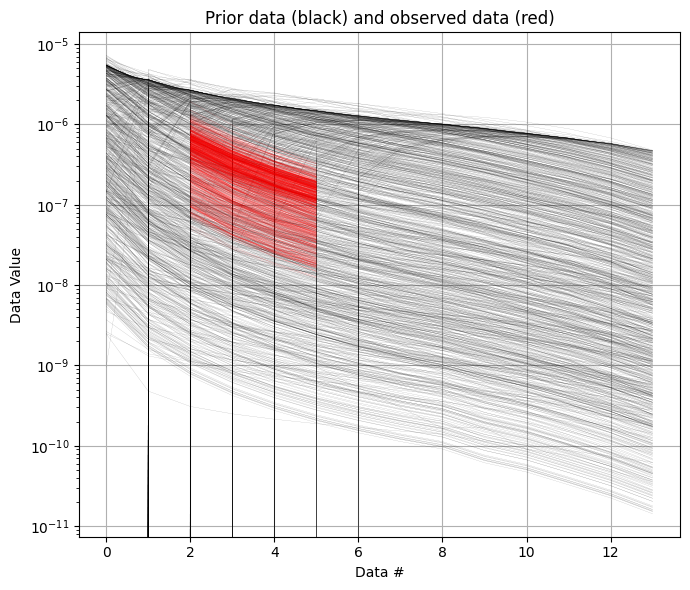

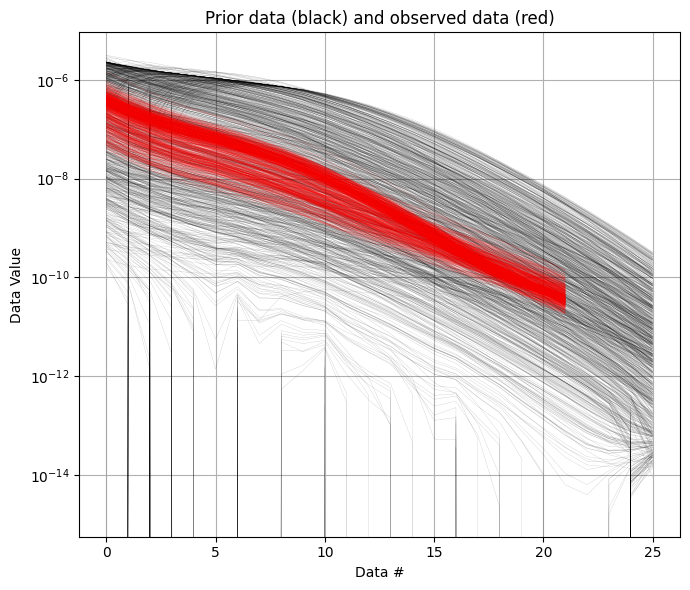

True

In [9]:
ig.plot_data_prior(f_prior_data_dual_h5, f_data_dual_h5, id=1)
ig.plot_data_prior(f_prior_data_dual_h5, f_data_dual_h5, id=2)

## Sample the posterior $\sigma(\mathbf{m})$

The posterior distribution is sampling using the extended rejection sampler.

In [10]:
N_use = 100000 #%N
N_cpu = 8
f_post_arr = []
updatePostStat=False
showInfo = 1

import time
t_inversion = []

for itype in [0,1,2,3]:
    t_start = time.time()
    if itype == 0:
        # LOW AND HIGH MOMENT AS ONE DATA SET - THE ORIGINAL METHOD
        f_post_h5 = ig.integrate_rejection(f_prior_data_h5, 
                                    f_data_h5, 
                                    f_post_h5='POST_type%d.h5' % itype,
                                    N_use = N_use, Ncpu=N_cpu,
                                    showInfo=showInfo, 
                                    updatePostStat=updatePostStat)
    elif itype == 1:
        # LOW MOMENT ONLY
        f_post_h5 = ig.integrate_rejection(f_prior_data_dual_h5, 
                                   f_data_dual_h5, 
                                   f_post_h5='POST_type%d.h5' % itype,
                                   N_use = N_use, Ncpu=N_cpu,
                                   showInfo=showInfo, 
                                   updatePostStat=updatePostStat,
                                   id_use = [1])
    elif itype == 2:
        # HIGH MOMENT ONLY
        f_post_h5 = ig.integrate_rejection(f_prior_data_dual_h5, 
                                   f_data_dual_h5, 
                                #    f_post_h5='POST_type%d.h5' % itype,
                                   N_use = N_use, Ncpu=N_cpu,
                                   showInfo=showInfo, 
                                   updatePostStat=updatePostStat,  
                                   id_use = [2])
    elif itype == 3:
        # JOINT INVERSION USING BOTH LOW AND HIGH MOMENT
        f_post_h5 = ig.integrate_rejection(f_prior_data_dual_h5, 
                                   f_data_dual_h5, 
                                   f_post_h5='POST_type%d.h5' % itype,
                                   N_use = N_use, Ncpu=N_cpu,
                                   showInfo=showInfo, 
                                   updatePostStat=updatePostStat,  
                                   id_use = [1,2])

    t_inversion.append(time.time() - t_start)
    f_post_arr.append(f_post_h5)



File POST_type0.h5 allready exists
Overwriting...
Loading data from DAUGAARD_AVG.h5. Using data types: [1]
  - D1: id_use=1,    gaussian, Using 11693/40 data
Loading prior data from PRIOR_CHI2_NF_3_log-uniform_N25000_TX07_20231016_2x4_RC20-33_Nh280_Nf12.h5. Using prior data ids: [1]
  - /D1:  N,nd = 25000/40
<--INTEGRATE_REJECTION-->
f_prior_h5=PRIOR_CHI2_NF_3_log-uniform_N25000_TX07_20231016_2x4_RC20-33_Nh280_Nf12.h5, f_data_h5=DAUGAARD_AVG.h5
f_post_h5=POST_type0.h5


Rejection Sampling:   0%|                                                                          | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                          | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                          | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                          | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                          | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                          | 0/1461 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                          | 0/1461 [00:00<?, ?it/s]

Rejection Sampling:   1%|▌                                                               | 14/1462 [00:00<00:10, 139.31it/s]

Rejection Sampling:   1%|▌                                                               | 14/1462 [00:00<00:10, 139.62it/s]

Rejection Sampling:   0%|                                                                          | 0/1461 [00:00<?, ?it/s]

Rejection Sampling:   1%|▍                                                               | 11/1462 [00:00<00:14, 100.75it/s]

Rejection Sampling:   1%|▍                                                               | 11/1462 [00:00<00:14, 100.79it/s]

Rejection Sampling:   1%|▍                                                                | 10/1462 [00:00<00:15, 94.92it/s]

Rejection Sampling:   0%|▎                                                                 | 6/1461 [00:00<00:26, 55.14it/s]

Rejection Sampling:   1%|▍                                                                | 10/1461 [00:00<00:15, 94.41it/s]

Rejection Sampling:   1%|▎                                                                 | 8/1461 [00:00<00:19, 75.96it/s]

Rejection Sampling:   2%|▉                                                                | 22/1462 [00:00<00:15, 90.50it/s]

Rejection Sampling:   2%|█▏                                                              | 28/1462 [00:00<00:13, 102.48it/s]

Rejection Sampling:   2%|█▏                                                              | 28/1462 [00:00<00:14, 102.02it/s]

Rejection Sampling:   2%|▉                                                                | 22/1462 [00:00<00:16, 89.73it/s]

Rejection Sampling:   1%|▋                                                                | 15/1461 [00:00<00:19, 74.31it/s]

Rejection Sampling:   1%|▉                                                                | 20/1462 [00:00<00:17, 82.75it/s]

Rejection Sampling:   1%|▉                                                                | 20/1461 [00:00<00:16, 86.23it/s]

Rejection Sampling:   1%|▊                                                                | 17/1461 [00:00<00:18, 77.61it/s]

Rejection Sampling:   2%|█▍                                                               | 32/1462 [00:00<00:16, 86.76it/s]

Rejection Sampling:   2%|█                                                                | 24/1461 [00:00<00:18, 78.21it/s]

Rejection Sampling:   3%|█▋                                                               | 39/1462 [00:00<00:15, 93.53it/s]

Rejection Sampling:   2%|█▎                                                               | 29/1462 [00:00<00:17, 82.84it/s]

Rejection Sampling:   2%|█▍                                                               | 32/1462 [00:00<00:16, 86.60it/s]

Rejection Sampling:   3%|█▋                                                               | 39/1462 [00:00<00:15, 93.25it/s]

Rejection Sampling:   2%|█▎                                                               | 29/1461 [00:00<00:16, 85.27it/s]

Rejection Sampling:   2%|█                                                                | 25/1461 [00:00<00:19, 74.11it/s]

Rejection Sampling:   3%|█▊                                                               | 41/1462 [00:00<00:16, 85.95it/s]

Rejection Sampling:   2%|█▍                                                               | 33/1461 [00:00<00:17, 80.50it/s]

Rejection Sampling:   3%|█▊                                                               | 41/1462 [00:00<00:16, 85.51it/s]

Rejection Sampling:   3%|█▋                                                               | 38/1462 [00:00<00:17, 83.11it/s]

Rejection Sampling:   3%|██▏                                                              | 49/1462 [00:00<00:15, 89.95it/s]

Rejection Sampling:   3%|██▏                                                              | 49/1462 [00:00<00:16, 86.52it/s]

Rejection Sampling:   3%|█▋                                                               | 38/1461 [00:00<00:16, 84.38it/s]

Rejection Sampling:   2%|█▌                                                               | 34/1461 [00:00<00:18, 77.66it/s]

Rejection Sampling:   3%|██▏                                                              | 50/1462 [00:00<00:16, 85.43it/s]

Rejection Sampling:   3%|█▊                                                               | 42/1461 [00:00<00:17, 82.11it/s]

Rejection Sampling:   3%|██▏                                                              | 50/1462 [00:00<00:16, 85.37it/s]

Rejection Sampling:   3%|██                                                               | 47/1462 [00:00<00:16, 83.77it/s]

Rejection Sampling:   4%|██▌                                                              | 59/1462 [00:00<00:15, 88.17it/s]

Rejection Sampling:   3%|██                                                               | 47/1461 [00:00<00:16, 84.62it/s]

Rejection Sampling:   3%|█▉                                                               | 43/1461 [00:00<00:17, 80.19it/s]

Rejection Sampling:   4%|██▌                                                              | 58/1462 [00:00<00:17, 80.58it/s]

Rejection Sampling:   4%|██▌                                                              | 59/1462 [00:00<00:16, 85.18it/s]

Rejection Sampling:   3%|██▎                                                              | 51/1461 [00:00<00:17, 82.81it/s]

Rejection Sampling:   4%|██▍                                                              | 56/1462 [00:00<00:16, 83.94it/s]

Rejection Sampling:   4%|██▌                                                              | 59/1462 [00:00<00:16, 84.96it/s]

Rejection Sampling:   4%|██▍                                                              | 56/1461 [00:00<00:16, 84.43it/s]

Rejection Sampling:   5%|███                                                              | 68/1462 [00:00<00:16, 83.97it/s]

Rejection Sampling:   4%|██▎                                                              | 52/1461 [00:00<00:17, 81.43it/s]

Rejection Sampling:   5%|██▉                                                              | 67/1462 [00:00<00:17, 79.05it/s]

Rejection Sampling:   5%|███                                                              | 68/1462 [00:00<00:16, 84.49it/s]

Rejection Sampling:   4%|██▋                                                              | 60/1461 [00:00<00:16, 82.91it/s]

Rejection Sampling:   4%|██▉                                                              | 65/1462 [00:00<00:16, 83.65it/s]

Rejection Sampling:   5%|███                                                              | 68/1462 [00:00<00:16, 84.34it/s]

Rejection Sampling:   4%|██▉                                                              | 65/1461 [00:00<00:16, 84.03it/s]

Rejection Sampling:   5%|███▍                                                             | 77/1462 [00:00<00:17, 81.05it/s]

Rejection Sampling:   4%|██▋                                                              | 61/1461 [00:00<00:17, 81.73it/s]

Rejection Sampling:   5%|███▍                                                             | 76/1462 [00:00<00:17, 79.85it/s]

Rejection Sampling:   5%|███▍                                                             | 77/1462 [00:00<00:16, 83.57it/s]

Rejection Sampling:   5%|███                                                              | 69/1461 [00:00<00:16, 82.39it/s]

Rejection Sampling:   5%|███▎                                                             | 74/1462 [00:00<00:16, 82.82it/s]

Rejection Sampling:   5%|███▍                                                             | 77/1462 [00:00<00:16, 83.30it/s]

Rejection Sampling:   5%|███▎                                                             | 74/1461 [00:00<00:16, 82.90it/s]

Rejection Sampling:   6%|███▊                                                             | 86/1462 [00:00<00:17, 80.85it/s]

Rejection Sampling:   5%|███                                                              | 70/1461 [00:00<00:17, 81.28it/s]

Rejection Sampling:   6%|███▊                                                             | 85/1462 [00:00<00:17, 79.98it/s]

Rejection Sampling:   6%|███▊                                                             | 86/1462 [00:01<00:16, 82.79it/s]

Rejection Sampling:   5%|███▍                                                             | 78/1461 [00:00<00:16, 82.20it/s]

Rejection Sampling:   6%|███▋                                                             | 83/1462 [00:00<00:16, 82.81it/s]

Rejection Sampling:   6%|███▊                                                             | 86/1462 [00:01<00:16, 81.77it/s]

Rejection Sampling:   6%|███▋                                                             | 83/1461 [00:00<00:16, 83.81it/s]

Rejection Sampling:   6%|████▏                                                            | 95/1462 [00:01<00:16, 82.54it/s]

Rejection Sampling:   5%|███▌                                                             | 79/1461 [00:00<00:16, 83.27it/s]

Rejection Sampling:   6%|████▏                                                            | 94/1462 [00:01<00:17, 79.91it/s]

Rejection Sampling:   6%|████▏                                                            | 95/1462 [00:01<00:16, 84.69it/s]

Rejection Sampling:   6%|███▊                                                             | 87/1461 [00:01<00:16, 81.47it/s]

Rejection Sampling:   7%|████▎                                                            | 96/1462 [00:01<00:15, 85.44it/s]

Rejection Sampling:   6%|████                                                             | 92/1461 [00:01<00:16, 85.12it/s]

Rejection Sampling:   7%|████▌                                                           | 104/1462 [00:01<00:16, 84.16it/s]

Rejection Sampling:   6%|███▉                                                             | 88/1461 [00:01<00:16, 84.46it/s]

Rejection Sampling:   6%|████                                                             | 92/1462 [00:01<00:18, 72.48it/s]

Rejection Sampling:   7%|████▌                                                           | 103/1462 [00:01<00:16, 81.65it/s]

Rejection Sampling:   7%|████▌                                                           | 104/1462 [00:01<00:16, 84.85it/s]

Rejection Sampling:   7%|████▎                                                            | 96/1461 [00:01<00:17, 79.72it/s]

Rejection Sampling:   7%|████▌                                                           | 105/1462 [00:01<00:15, 84.83it/s]

Rejection Sampling:   7%|████▍                                                           | 101/1461 [00:01<00:16, 84.48it/s]

Rejection Sampling:   8%|████▉                                                           | 113/1462 [00:01<00:16, 83.75it/s]

Rejection Sampling:   7%|████▎                                                            | 97/1461 [00:01<00:16, 84.11it/s]

Rejection Sampling:   7%|████▍                                                           | 101/1462 [00:01<00:17, 75.68it/s]

Rejection Sampling:   8%|████▉                                                           | 113/1462 [00:01<00:15, 84.72it/s]

Rejection Sampling:   8%|████▉                                                           | 112/1462 [00:01<00:17, 77.28it/s]

Rejection Sampling:   8%|████▉                                                           | 114/1462 [00:01<00:15, 85.02it/s]

Rejection Sampling:   7%|████▌                                                           | 104/1461 [00:01<00:17, 78.55it/s]

Rejection Sampling:   8%|████▊                                                           | 110/1461 [00:01<00:15, 84.59it/s]

Rejection Sampling:   8%|█████▎                                                          | 122/1462 [00:01<00:15, 83.77it/s]

Rejection Sampling:   7%|████▋                                                           | 106/1461 [00:01<00:16, 83.81it/s]

Rejection Sampling:   7%|████▊                                                           | 109/1462 [00:01<00:18, 72.74it/s]

Rejection Sampling:   8%|█████▎                                                          | 122/1462 [00:01<00:15, 84.10it/s]

Rejection Sampling:   8%|█████▎                                                          | 121/1462 [00:01<00:17, 78.68it/s]

Rejection Sampling:   8%|█████▍                                                          | 123/1462 [00:01<00:15, 84.11it/s]

Rejection Sampling:   8%|████▉                                                           | 113/1461 [00:01<00:16, 79.62it/s]

Rejection Sampling:   8%|█████▏                                                          | 119/1461 [00:01<00:15, 83.97it/s]

Rejection Sampling:   9%|█████▋                                                          | 131/1462 [00:01<00:15, 83.80it/s]

Rejection Sampling:   8%|█████                                                           | 115/1461 [00:01<00:16, 84.02it/s]

Rejection Sampling:   8%|█████▏                                                          | 118/1462 [00:01<00:17, 76.14it/s]

Rejection Sampling:   9%|█████▋                                                          | 131/1462 [00:01<00:15, 84.42it/s]

Rejection Sampling:   9%|█████▋                                                          | 129/1462 [00:01<00:17, 77.91it/s]

Rejection Sampling:   9%|█████▊                                                          | 132/1462 [00:01<00:15, 84.32it/s]

Rejection Sampling:   8%|█████▎                                                          | 121/1461 [00:01<00:17, 75.82it/s]

Rejection Sampling:   9%|█████▌                                                          | 128/1461 [00:01<00:15, 83.98it/s]

Rejection Sampling:  10%|██████▏                                                         | 140/1462 [00:01<00:15, 83.81it/s]

Rejection Sampling:   8%|█████▍                                                          | 124/1461 [00:01<00:15, 83.97it/s]

Rejection Sampling:   9%|█████▌                                                          | 127/1462 [00:01<00:17, 78.48it/s]

Rejection Sampling:  10%|██████▏                                                         | 140/1462 [00:01<00:15, 84.38it/s]

Rejection Sampling:   9%|██████                                                          | 138/1462 [00:01<00:16, 79.96it/s]

Rejection Sampling:   9%|█████▋                                                          | 130/1461 [00:01<00:16, 78.78it/s]

Rejection Sampling:  10%|██████▏                                                         | 141/1462 [00:01<00:16, 81.34it/s]

Rejection Sampling:  10%|██████▌                                                         | 149/1462 [00:01<00:15, 84.45it/s]

Rejection Sampling:   9%|██████                                                          | 137/1461 [00:01<00:16, 79.42it/s]

Rejection Sampling:   9%|█████▊                                                          | 133/1461 [00:01<00:15, 84.55it/s]

Rejection Sampling:   9%|█████▉                                                          | 136/1462 [00:01<00:16, 80.34it/s]

Rejection Sampling:  10%|██████▌                                                         | 149/1462 [00:01<00:15, 84.38it/s]

Rejection Sampling:  10%|██████▍                                                         | 147/1462 [00:01<00:16, 81.14it/s]

Rejection Sampling:  10%|██████                                                          | 139/1461 [00:01<00:16, 80.08it/s]

Rejection Sampling:  10%|██████▌                                                         | 150/1462 [00:01<00:16, 80.07it/s]

Rejection Sampling:  11%|██████▉                                                         | 158/1462 [00:01<00:15, 84.19it/s]

Rejection Sampling:  10%|██████▍                                                         | 146/1461 [00:01<00:16, 80.52it/s]

Rejection Sampling:  10%|██████▏                                                         | 142/1461 [00:01<00:15, 84.08it/s]

Rejection Sampling:  10%|██████▎                                                         | 145/1462 [00:01<00:16, 81.23it/s]

Rejection Sampling:  11%|██████▉                                                         | 158/1462 [00:01<00:15, 84.50it/s]

Rejection Sampling:  11%|██████▊                                                         | 156/1462 [00:01<00:15, 82.47it/s]

Rejection Sampling:  10%|██████▍                                                         | 148/1461 [00:01<00:15, 82.66it/s]

Rejection Sampling:  11%|██████▉                                                         | 159/1462 [00:01<00:15, 82.72it/s]

Rejection Sampling:  11%|███████▎                                                        | 167/1462 [00:01<00:15, 85.69it/s]

Rejection Sampling:  11%|██████▊                                                         | 156/1461 [00:01<00:15, 83.40it/s]

Rejection Sampling:  11%|███████▎                                                        | 167/1462 [00:01<00:15, 85.90it/s]

Rejection Sampling:  10%|██████▌                                                         | 151/1461 [00:01<00:17, 75.48it/s]

Rejection Sampling:  11%|███████▏                                                        | 165/1462 [00:01<00:15, 84.04it/s]

Rejection Sampling:  11%|██████▋                                                         | 154/1462 [00:01<00:17, 73.87it/s]

Rejection Sampling:  11%|██████▉                                                         | 157/1461 [00:01<00:15, 83.57it/s]

Rejection Sampling:  11%|███████▎                                                        | 168/1462 [00:01<00:15, 83.38it/s]

Rejection Sampling:  12%|███████▋                                                        | 176/1462 [00:02<00:15, 85.51it/s]

Rejection Sampling:  11%|███████▏                                                        | 165/1461 [00:01<00:15, 84.02it/s]

Rejection Sampling:  12%|███████▋                                                        | 176/1462 [00:02<00:14, 85.84it/s]

Rejection Sampling:  11%|██████▉                                                         | 159/1461 [00:01<00:17, 75.70it/s]

Rejection Sampling:  12%|███████▌                                                        | 174/1462 [00:02<00:15, 84.55it/s]

Rejection Sampling:  11%|███████▏                                                        | 163/1462 [00:02<00:16, 76.87it/s]

Rejection Sampling:  12%|███████▋                                                        | 177/1462 [00:02<00:15, 83.45it/s]

Rejection Sampling:  11%|███████▎                                                        | 166/1461 [00:02<00:16, 80.89it/s]

Rejection Sampling:  13%|████████                                                        | 185/1462 [00:02<00:15, 82.02it/s]

Rejection Sampling:  12%|███████▌                                                        | 174/1461 [00:02<00:15, 83.17it/s]

Rejection Sampling:  13%|████████                                                        | 185/1462 [00:02<00:15, 84.32it/s]

Rejection Sampling:  13%|████████                                                        | 183/1462 [00:02<00:15, 83.47it/s]

Rejection Sampling:  11%|███████▎                                                        | 168/1461 [00:02<00:16, 77.25it/s]

Rejection Sampling:  12%|███████▌                                                        | 172/1462 [00:02<00:16, 78.00it/s]

Rejection Sampling:  13%|████████▏                                                       | 186/1462 [00:02<00:15, 82.66it/s]

Rejection Sampling:  12%|███████▋                                                        | 175/1461 [00:02<00:15, 80.86it/s]

Rejection Sampling:  13%|████████▍                                                       | 194/1462 [00:02<00:15, 81.57it/s]

Rejection Sampling:  13%|████████                                                        | 183/1461 [00:02<00:15, 82.38it/s]

Rejection Sampling:  13%|████████▍                                                       | 194/1462 [00:02<00:15, 83.18it/s]

Rejection Sampling:  13%|████████▍                                                       | 192/1462 [00:02<00:15, 82.59it/s]

Rejection Sampling:  12%|███████▊                                                        | 177/1461 [00:02<00:16, 78.21it/s]

Rejection Sampling:  12%|███████▉                                                        | 181/1462 [00:02<00:16, 79.00it/s]

Rejection Sampling:  13%|████████▌                                                       | 195/1462 [00:02<00:15, 82.25it/s]

Rejection Sampling:  13%|████████                                                        | 184/1461 [00:02<00:15, 79.94it/s]

Rejection Sampling:  14%|████████▉                                                       | 203/1462 [00:02<00:15, 81.53it/s]

Rejection Sampling:  13%|████████▍                                                       | 192/1461 [00:02<00:15, 81.98it/s]

Rejection Sampling:  14%|████████▉                                                       | 203/1462 [00:02<00:15, 82.77it/s]

Rejection Sampling:  14%|████████▊                                                       | 201/1462 [00:02<00:15, 82.34it/s]

Rejection Sampling:  13%|████████▏                                                       | 186/1461 [00:02<00:16, 79.29it/s]

Rejection Sampling:  13%|████████▎                                                       | 190/1462 [00:02<00:15, 79.66it/s]

Rejection Sampling:  14%|████████▉                                                       | 204/1462 [00:02<00:15, 81.93it/s]

Rejection Sampling:  15%|█████████▎                                                      | 212/1462 [00:02<00:15, 81.62it/s]

Rejection Sampling:  13%|████████▍                                                       | 193/1461 [00:02<00:16, 78.36it/s]

Rejection Sampling:  14%|████████▊                                                       | 201/1461 [00:02<00:15, 82.13it/s]

Rejection Sampling:  15%|█████████▎                                                      | 212/1462 [00:02<00:15, 82.73it/s]

Rejection Sampling:  13%|████████▌                                                       | 195/1461 [00:02<00:15, 80.37it/s]

Rejection Sampling:  14%|█████████▏                                                      | 210/1462 [00:02<00:15, 82.51it/s]

Rejection Sampling:  14%|████████▋                                                       | 199/1462 [00:02<00:15, 80.88it/s]

Rejection Sampling:  15%|█████████▎                                                      | 213/1462 [00:02<00:15, 82.85it/s]

Rejection Sampling:  14%|████████▊                                                       | 202/1461 [00:02<00:15, 80.81it/s]

Rejection Sampling:  14%|█████████▏                                                      | 210/1461 [00:02<00:15, 83.11it/s]

Rejection Sampling:  15%|█████████▋                                                      | 221/1462 [00:02<00:15, 80.11it/s]

Rejection Sampling:  15%|█████████▋                                                      | 221/1462 [00:02<00:14, 83.61it/s]

Rejection Sampling:  14%|████████▉                                                       | 204/1461 [00:02<00:15, 81.95it/s]

Rejection Sampling:  14%|█████████                                                       | 208/1462 [00:02<00:15, 82.28it/s]

Rejection Sampling:  15%|█████████▌                                                      | 219/1462 [00:02<00:16, 73.81it/s]

Rejection Sampling:  15%|█████████▋                                                      | 222/1462 [00:02<00:14, 83.47it/s]

Rejection Sampling:  14%|█████████▏                                                      | 211/1461 [00:02<00:15, 81.99it/s]

Rejection Sampling:  16%|██████████                                                      | 230/1462 [00:02<00:15, 81.55it/s]

Rejection Sampling:  15%|█████████▌                                                      | 219/1461 [00:02<00:14, 83.60it/s]

Rejection Sampling:  16%|██████████                                                      | 230/1462 [00:02<00:14, 84.36it/s]

Rejection Sampling:  15%|█████████▎                                                      | 213/1461 [00:02<00:14, 83.36it/s]

Rejection Sampling:  15%|█████████▍                                                      | 217/1462 [00:02<00:14, 83.70it/s]

Rejection Sampling:  16%|█████████▉                                                      | 228/1462 [00:02<00:15, 77.40it/s]

Rejection Sampling:  15%|█████████▋                                                      | 220/1461 [00:02<00:14, 83.57it/s]

Rejection Sampling:  16%|██████████                                                      | 231/1462 [00:02<00:15, 78.56it/s]

Rejection Sampling:  16%|█████████▉                                                      | 228/1461 [00:02<00:15, 82.04it/s]

Rejection Sampling:  16%|██████████▍                                                     | 239/1462 [00:02<00:15, 80.56it/s]

Rejection Sampling:  16%|██████████▍                                                     | 239/1462 [00:02<00:14, 84.66it/s]

Rejection Sampling:  15%|█████████▋                                                      | 222/1461 [00:02<00:14, 83.68it/s]

Rejection Sampling:  15%|█████████▉                                                      | 226/1462 [00:02<00:14, 83.52it/s]

Rejection Sampling:  16%|██████████▎                                                     | 237/1462 [00:02<00:15, 78.95it/s]

Rejection Sampling:  16%|██████████                                                      | 229/1461 [00:02<00:14, 83.17it/s]

Rejection Sampling:  16%|██████████▌                                                     | 240/1462 [00:02<00:15, 80.30it/s]

Rejection Sampling:  17%|██████████▊                                                     | 248/1462 [00:02<00:15, 80.77it/s]

Rejection Sampling:  16%|██████████▍                                                     | 237/1461 [00:02<00:14, 81.76it/s]

Rejection Sampling:  17%|██████████▊                                                     | 248/1462 [00:02<00:14, 83.55it/s]

Rejection Sampling:  16%|██████████▏                                                     | 232/1461 [00:02<00:14, 86.87it/s]

Rejection Sampling:  16%|██████████▎                                                     | 235/1462 [00:02<00:14, 82.89it/s]

Rejection Sampling:  17%|██████████▊                                                     | 246/1462 [00:03<00:15, 79.86it/s]

Rejection Sampling:  16%|██████████▍                                                     | 238/1461 [00:02<00:14, 83.11it/s]

Rejection Sampling:  18%|███████████▎                                                    | 257/1462 [00:03<00:14, 82.00it/s]

Rejection Sampling:  17%|██████████▊                                                     | 246/1461 [00:02<00:14, 82.58it/s]

Rejection Sampling:  18%|███████████▎                                                    | 257/1462 [00:03<00:14, 84.12it/s]

Rejection Sampling:  17%|██████████▉                                                     | 249/1462 [00:03<00:15, 76.60it/s]

Rejection Sampling:  17%|██████████▌                                                     | 242/1461 [00:02<00:13, 88.28it/s]

Rejection Sampling:  17%|██████████▋                                                     | 244/1462 [00:03<00:14, 84.19it/s]

Rejection Sampling:  17%|███████████▏                                                    | 255/1462 [00:03<00:14, 81.91it/s]

Rejection Sampling:  17%|██████████▊                                                     | 247/1461 [00:03<00:14, 84.16it/s]

Rejection Sampling:  17%|███████████▏                                                    | 255/1461 [00:03<00:14, 83.64it/s]

Rejection Sampling:  18%|███████████▋                                                    | 266/1462 [00:03<00:14, 80.63it/s]

Rejection Sampling:  18%|███████████▋                                                    | 266/1462 [00:03<00:14, 84.80it/s]

Rejection Sampling:  17%|██████████▉                                                     | 251/1461 [00:03<00:13, 87.94it/s]

Rejection Sampling:  18%|███████████▎                                                    | 257/1462 [00:03<00:16, 72.64it/s]

Rejection Sampling:  17%|███████████                                                     | 253/1462 [00:03<00:14, 85.45it/s]

Rejection Sampling:  18%|███████████▌                                                    | 265/1462 [00:03<00:14, 84.33it/s]

Rejection Sampling:  18%|███████████▎                                                    | 257/1461 [00:03<00:13, 86.23it/s]

Rejection Sampling:  19%|████████████                                                    | 276/1462 [00:03<00:13, 86.73it/s]

Rejection Sampling:  19%|████████████                                                    | 276/1462 [00:03<00:14, 83.70it/s]

Rejection Sampling:  18%|███████████▍                                                    | 261/1461 [00:03<00:13, 88.65it/s]

Rejection Sampling:  18%|███████████▌                                                    | 264/1461 [00:03<00:15, 75.89it/s]

Rejection Sampling:  18%|███████████▍                                                    | 262/1462 [00:03<00:13, 86.39it/s]

Rejection Sampling:  18%|███████████▌                                                    | 265/1462 [00:03<00:17, 70.02it/s]

Rejection Sampling:  19%|███████████▉                                                    | 274/1462 [00:03<00:14, 84.83it/s]

Rejection Sampling:  18%|███████████▋                                                    | 266/1461 [00:03<00:13, 85.92it/s]

Rejection Sampling:  19%|████████████▍                                                   | 285/1462 [00:03<00:13, 85.28it/s]

Rejection Sampling:  19%|████████████▍                                                   | 285/1462 [00:03<00:13, 85.67it/s]

Rejection Sampling:  18%|███████████▊                                                    | 270/1461 [00:03<00:13, 86.86it/s]

Rejection Sampling:  19%|███████████▊                                                    | 271/1462 [00:03<00:13, 85.14it/s]

Rejection Sampling:  19%|███████████▉                                                    | 273/1461 [00:03<00:15, 77.70it/s]

Rejection Sampling:  19%|███████████▉                                                    | 274/1462 [00:03<00:16, 73.47it/s]

Rejection Sampling:  19%|████████████▍                                                   | 283/1462 [00:03<00:14, 84.05it/s]

Rejection Sampling:  19%|████████████                                                    | 275/1461 [00:03<00:13, 84.87it/s]

Rejection Sampling:  20%|████████████▊                                                   | 294/1462 [00:03<00:13, 85.93it/s]

Rejection Sampling:  20%|████████████▊                                                   | 294/1462 [00:03<00:13, 84.77it/s]

Rejection Sampling:  19%|████████████▏                                                   | 279/1461 [00:03<00:13, 85.80it/s]

Rejection Sampling:  19%|████████████▎                                                   | 280/1462 [00:03<00:13, 84.62it/s]

Rejection Sampling:  19%|████████████▎                                                   | 282/1461 [00:03<00:14, 79.36it/s]

Rejection Sampling:  19%|████████████▍                                                   | 283/1462 [00:03<00:15, 76.37it/s]

Rejection Sampling:  20%|████████████▊                                                   | 292/1462 [00:03<00:13, 83.86it/s]

Rejection Sampling:  19%|████████████▍                                                   | 284/1461 [00:03<00:13, 84.23it/s]

Rejection Sampling:  21%|█████████████▎                                                  | 304/1462 [00:03<00:13, 87.69it/s]

Rejection Sampling:  21%|█████████████▎                                                  | 303/1462 [00:03<00:13, 84.27it/s]

Rejection Sampling:  20%|████████████▌                                                   | 288/1461 [00:03<00:13, 84.94it/s]

Rejection Sampling:  20%|████████████▋                                                   | 291/1461 [00:03<00:14, 80.54it/s]

Rejection Sampling:  20%|████████████▋                                                   | 289/1462 [00:03<00:13, 84.17it/s]

Rejection Sampling:  20%|████████████▊                                                   | 292/1462 [00:03<00:14, 78.30it/s]

Rejection Sampling:  21%|█████████████▏                                                  | 301/1462 [00:03<00:13, 83.57it/s]

Rejection Sampling:  20%|████████████▊                                                   | 293/1461 [00:03<00:13, 83.81it/s]

Rejection Sampling:  21%|█████████████▋                                                  | 312/1462 [00:03<00:13, 83.70it/s]

Rejection Sampling:  21%|█████████████▋                                                  | 313/1462 [00:03<00:13, 83.18it/s]

Rejection Sampling:  20%|█████████████                                                   | 297/1461 [00:03<00:13, 84.03it/s]

Rejection Sampling:  21%|█████████████▏                                                  | 300/1461 [00:03<00:14, 80.82it/s]

Rejection Sampling:  20%|█████████████                                                   | 298/1462 [00:03<00:13, 83.37it/s]

Rejection Sampling:  21%|█████████████▏                                                  | 301/1462 [00:03<00:14, 79.21it/s]

Rejection Sampling:  21%|█████████████▌                                                  | 310/1462 [00:03<00:13, 82.90it/s]

Rejection Sampling:  21%|█████████████▏                                                  | 302/1461 [00:03<00:13, 83.10it/s]

Rejection Sampling:  22%|██████████████                                                  | 322/1462 [00:03<00:13, 82.62it/s]

Rejection Sampling:  22%|██████████████                                                  | 321/1462 [00:03<00:13, 82.96it/s]

Rejection Sampling:  21%|█████████████▍                                                  | 306/1461 [00:03<00:13, 83.21it/s]

Rejection Sampling:  21%|█████████████▌                                                  | 309/1461 [00:03<00:14, 81.01it/s]

Rejection Sampling:  21%|█████████████▍                                                  | 307/1462 [00:03<00:13, 82.84it/s]

Rejection Sampling:  21%|█████████████▌                                                  | 310/1462 [00:03<00:14, 79.90it/s]

Rejection Sampling:  22%|█████████████▉                                                  | 319/1462 [00:03<00:13, 82.83it/s]

Rejection Sampling:  21%|█████████████▌                                                  | 311/1461 [00:03<00:13, 83.14it/s]

Rejection Sampling:  23%|██████████████▍                                                 | 330/1462 [00:03<00:13, 83.01it/s]

Rejection Sampling:  23%|██████████████▍                                                 | 331/1462 [00:03<00:13, 82.75it/s]

Rejection Sampling:  22%|█████████████▊                                                  | 315/1461 [00:03<00:13, 83.18it/s]

Rejection Sampling:  22%|█████████████▉                                                  | 318/1461 [00:03<00:14, 81.59it/s]

Rejection Sampling:  22%|█████████████▊                                                  | 316/1462 [00:03<00:13, 82.85it/s]

Rejection Sampling:  22%|█████████████▉                                                  | 319/1462 [00:03<00:14, 78.26it/s]

Rejection Sampling:  22%|██████████████▎                                                 | 328/1462 [00:03<00:13, 82.60it/s]

Rejection Sampling:  22%|██████████████                                                  | 320/1461 [00:03<00:13, 82.75it/s]

Rejection Sampling:  23%|██████████████▉                                                 | 340/1462 [00:04<00:13, 82.93it/s]

Rejection Sampling:  23%|██████████████▊                                                 | 339/1462 [00:04<00:13, 83.09it/s]

Rejection Sampling:  22%|██████████████▏                                                 | 324/1461 [00:03<00:13, 83.36it/s]

Rejection Sampling:  22%|██████████████▎                                                 | 327/1461 [00:03<00:13, 82.35it/s]

Rejection Sampling:  22%|██████████████▏                                                 | 325/1462 [00:03<00:13, 83.26it/s]

Rejection Sampling:  22%|██████████████▎                                                 | 328/1462 [00:04<00:14, 80.16it/s]

Rejection Sampling:  23%|██████████████▍                                                 | 329/1461 [00:04<00:13, 83.40it/s]

Rejection Sampling:  24%|███████████████▎                                                | 349/1462 [00:04<00:13, 83.23it/s]

Rejection Sampling:  24%|███████████████▏                                                | 348/1462 [00:04<00:13, 83.34it/s]

Rejection Sampling:  23%|██████████████▌                                                 | 333/1461 [00:04<00:13, 83.46it/s]

Rejection Sampling:  23%|██████████████▊                                                 | 337/1462 [00:04<00:15, 71.27it/s]

Rejection Sampling:  23%|██████████████▋                                                 | 336/1461 [00:04<00:13, 82.72it/s]

Rejection Sampling:  23%|██████████████▌                                                 | 334/1462 [00:04<00:13, 83.36it/s]

Rejection Sampling:  23%|██████████████▊                                                 | 337/1462 [00:04<00:13, 81.13it/s]

Rejection Sampling:  23%|██████████████▊                                                 | 338/1461 [00:04<00:13, 84.04it/s]

Rejection Sampling:  24%|███████████████▋                                                | 357/1462 [00:04<00:13, 84.44it/s]

Rejection Sampling:  24%|███████████████▋                                                | 358/1462 [00:04<00:13, 84.34it/s]

Rejection Sampling:  23%|██████████████▉                                                 | 342/1461 [00:04<00:13, 84.47it/s]

Rejection Sampling:  24%|███████████████                                                 | 345/1461 [00:04<00:13, 84.08it/s]

Rejection Sampling:  23%|███████████████                                                 | 343/1462 [00:04<00:13, 84.57it/s]

Rejection Sampling:  24%|███████████████                                                 | 345/1462 [00:04<00:15, 70.47it/s]

Rejection Sampling:  24%|███████████████▏                                                | 346/1462 [00:04<00:14, 78.15it/s]

Rejection Sampling:  24%|███████████████▏                                                | 347/1461 [00:04<00:13, 84.88it/s]

Rejection Sampling:  25%|████████████████                                                | 366/1462 [00:04<00:12, 84.66it/s]

Rejection Sampling:  24%|███████████████▍                                                | 351/1461 [00:04<00:13, 84.63it/s]

Rejection Sampling:  25%|████████████████                                                | 367/1462 [00:04<00:13, 79.40it/s]

Rejection Sampling:  24%|███████████████▍                                                | 354/1462 [00:04<00:14, 74.91it/s]

Rejection Sampling:  24%|███████████████▍                                                | 352/1462 [00:04<00:13, 84.71it/s]

Rejection Sampling:  24%|███████████████▌                                                | 354/1461 [00:04<00:13, 84.35it/s]

Rejection Sampling:  24%|███████████████▌                                                | 356/1461 [00:04<00:13, 84.12it/s]

Rejection Sampling:  24%|███████████████▌                                                | 355/1462 [00:04<00:13, 79.34it/s]

Rejection Sampling:  25%|███████████████▊                                                | 360/1461 [00:04<00:13, 84.03it/s]

Rejection Sampling:  26%|████████████████▍                                               | 375/1462 [00:04<00:13, 81.23it/s]

Rejection Sampling:  25%|███████████████▉                                                | 363/1462 [00:04<00:14, 77.06it/s]

Rejection Sampling:  26%|████████████████▍                                               | 376/1462 [00:04<00:13, 80.24it/s]

Rejection Sampling:  25%|███████████████▊                                                | 361/1462 [00:04<00:13, 83.98it/s]

Rejection Sampling:  25%|███████████████▉                                                | 363/1461 [00:04<00:13, 83.74it/s]

Rejection Sampling:  25%|███████████████▉                                                | 363/1462 [00:04<00:13, 78.63it/s]

Rejection Sampling:  25%|███████████████▉                                                | 365/1461 [00:04<00:12, 84.77it/s]

Rejection Sampling:  25%|████████████████▏                                               | 369/1461 [00:04<00:12, 85.13it/s]

Rejection Sampling:  26%|████████████████▊                                               | 385/1462 [00:04<00:13, 82.44it/s]

Rejection Sampling:  25%|████████████████▎                                               | 372/1462 [00:04<00:13, 80.09it/s]

Rejection Sampling:  25%|████████████████▏                                               | 370/1462 [00:04<00:12, 85.19it/s]

Rejection Sampling:  26%|████████████████▊                                               | 384/1462 [00:04<00:13, 80.61it/s]

Rejection Sampling:  25%|████████████████▎                                               | 372/1462 [00:04<00:13, 81.16it/s]

Rejection Sampling:  25%|████████████████▎                                               | 372/1461 [00:04<00:14, 75.41it/s]

Rejection Sampling:  26%|████████████████▍                                               | 374/1461 [00:04<00:12, 85.53it/s]

Rejection Sampling:  26%|████████████████▌                                               | 378/1461 [00:04<00:12, 85.17it/s]

Rejection Sampling:  26%|████████████████▌                                               | 379/1462 [00:04<00:12, 85.13it/s]

Rejection Sampling:  27%|█████████████████▏                                              | 394/1462 [00:04<00:12, 83.12it/s]

Rejection Sampling:  26%|████████████████▋                                               | 381/1462 [00:04<00:13, 78.89it/s]

Rejection Sampling:  27%|█████████████████▏                                              | 393/1462 [00:04<00:13, 79.25it/s]

Rejection Sampling:  26%|████████████████▋                                               | 381/1462 [00:04<00:13, 81.76it/s]

Rejection Sampling:  26%|████████████████▋                                               | 381/1461 [00:04<00:13, 77.58it/s]

Rejection Sampling:  26%|████████████████▊                                               | 383/1461 [00:04<00:12, 84.79it/s]

Rejection Sampling:  26%|████████████████▉                                               | 387/1461 [00:04<00:12, 85.15it/s]

Rejection Sampling:  27%|████████████████▉                                               | 388/1462 [00:04<00:12, 85.03it/s]

Rejection Sampling:  28%|█████████████████▋                                              | 403/1462 [00:04<00:12, 83.66it/s]

Rejection Sampling:  27%|█████████████████                                               | 390/1462 [00:04<00:13, 80.54it/s]

Rejection Sampling:  27%|█████████████████▌                                              | 401/1462 [00:04<00:13, 78.11it/s]

Rejection Sampling:  27%|█████████████████                                               | 390/1462 [00:04<00:13, 82.32it/s]

Rejection Sampling:  27%|█████████████████                                               | 390/1461 [00:04<00:13, 79.29it/s]

Rejection Sampling:  27%|█████████████████▏                                              | 392/1461 [00:04<00:13, 81.76it/s]

Rejection Sampling:  27%|█████████████████▎                                              | 396/1461 [00:04<00:12, 84.67it/s]

Rejection Sampling:  28%|██████████████████                                              | 412/1462 [00:04<00:12, 83.57it/s]

Rejection Sampling:  27%|█████████████████▍                                              | 397/1462 [00:04<00:12, 84.48it/s]

Rejection Sampling:  28%|█████████████████▉                                              | 410/1462 [00:04<00:13, 79.72it/s]

Rejection Sampling:  27%|█████████████████▍                                              | 399/1462 [00:04<00:13, 81.42it/s]

Rejection Sampling:  27%|█████████████████▍                                              | 399/1461 [00:04<00:13, 80.49it/s]

Rejection Sampling:  27%|█████████████████▍                                              | 399/1462 [00:04<00:13, 79.90it/s]

Rejection Sampling:  27%|█████████████████▌                                              | 401/1461 [00:04<00:12, 82.15it/s]

Rejection Sampling:  28%|█████████████████▋                                              | 405/1461 [00:04<00:12, 83.85it/s]

Rejection Sampling:  29%|██████████████████▍                                             | 421/1462 [00:05<00:12, 83.22it/s]

Rejection Sampling:  28%|█████████████████▊                                              | 406/1462 [00:04<00:12, 83.83it/s]

Rejection Sampling:  28%|█████████████████▊                                              | 408/1462 [00:05<00:12, 81.65it/s]

Rejection Sampling:  29%|██████████████████▎                                             | 419/1462 [00:05<00:12, 80.41it/s]

Rejection Sampling:  28%|█████████████████▊                                              | 408/1461 [00:04<00:12, 81.03it/s]

Rejection Sampling:  28%|█████████████████▊                                              | 408/1462 [00:05<00:13, 80.76it/s]

Rejection Sampling:  28%|█████████████████▉                                              | 410/1461 [00:04<00:12, 82.32it/s]

Rejection Sampling:  28%|██████████████████▏                                             | 414/1461 [00:04<00:12, 83.89it/s]

Rejection Sampling:  29%|██████████████████▊                                             | 430/1462 [00:05<00:12, 83.56it/s]

Rejection Sampling:  28%|██████████████████▏                                             | 415/1462 [00:05<00:12, 83.99it/s]

Rejection Sampling:  29%|██████████████████▎                                             | 417/1462 [00:05<00:12, 82.65it/s]

Rejection Sampling:  29%|██████████████████▋                                             | 428/1462 [00:05<00:12, 81.76it/s]

Rejection Sampling:  29%|██████████████████▎                                             | 417/1462 [00:05<00:12, 82.14it/s]

Rejection Sampling:  29%|██████████████████▎                                             | 419/1461 [00:05<00:12, 83.25it/s]

Rejection Sampling:  29%|██████████████████▎                                             | 417/1461 [00:05<00:13, 79.76it/s]

Rejection Sampling:  29%|██████████████████▌                                             | 423/1461 [00:05<00:12, 81.26it/s]

Rejection Sampling:  30%|███████████████████▎                                            | 440/1462 [00:05<00:11, 86.42it/s]

Rejection Sampling:  29%|██████████████████▌                                             | 424/1462 [00:05<00:12, 83.97it/s]

Rejection Sampling:  29%|██████████████████▋                                             | 426/1462 [00:05<00:12, 82.90it/s]

Rejection Sampling:  30%|███████████████████▏                                            | 437/1462 [00:05<00:12, 82.30it/s]

Rejection Sampling:  29%|██████████████████▋                                             | 426/1462 [00:05<00:12, 82.33it/s]

Rejection Sampling:  29%|██████████████████▋                                             | 426/1461 [00:05<00:12, 80.65it/s]

Rejection Sampling:  29%|██████████████████▋                                             | 428/1461 [00:05<00:12, 83.11it/s]

Rejection Sampling:  30%|██████████████████▉                                             | 433/1462 [00:05<00:12, 84.12it/s]

Rejection Sampling:  31%|███████████████████▋                                            | 449/1462 [00:05<00:11, 85.82it/s]

Rejection Sampling:  30%|██████████████████▉                                             | 432/1461 [00:05<00:12, 82.18it/s]

Rejection Sampling:  30%|███████████████████                                             | 435/1462 [00:05<00:12, 83.56it/s]

Rejection Sampling:  31%|███████████████████▌                                            | 446/1462 [00:05<00:12, 83.12it/s]

Rejection Sampling:  30%|███████████████████                                             | 435/1462 [00:05<00:12, 83.53it/s]

Rejection Sampling:  30%|███████████████████                                             | 435/1461 [00:05<00:12, 82.29it/s]

Rejection Sampling:  30%|███████████████████▏                                            | 437/1461 [00:05<00:12, 81.49it/s]

Rejection Sampling:  30%|███████████████████▎                                            | 442/1462 [00:05<00:12, 84.88it/s]

Rejection Sampling:  30%|███████████████████▎                                            | 441/1461 [00:05<00:12, 83.49it/s]

Rejection Sampling:  31%|████████████████████                                            | 458/1462 [00:05<00:11, 86.08it/s]

Rejection Sampling:  30%|███████████████████▍                                            | 444/1462 [00:05<00:12, 84.38it/s]

Rejection Sampling:  31%|███████████████████▉                                            | 455/1462 [00:05<00:12, 81.49it/s]

Rejection Sampling:  30%|███████████████████▍                                            | 444/1462 [00:05<00:12, 84.56it/s]

Rejection Sampling:  31%|███████████████████▌                                            | 446/1461 [00:05<00:12, 83.12it/s]

Rejection Sampling:  30%|███████████████████▍                                            | 444/1461 [00:05<00:12, 81.14it/s]

Rejection Sampling:  31%|███████████████████▋                                            | 450/1461 [00:05<00:11, 84.36it/s]

Rejection Sampling:  32%|████████████████████▍                                           | 468/1462 [00:05<00:11, 89.03it/s]

Rejection Sampling:  31%|███████████████████▊                                            | 453/1462 [00:05<00:11, 84.95it/s]

Rejection Sampling:  32%|████████████████████▎                                           | 464/1462 [00:05<00:12, 82.71it/s]

Rejection Sampling:  31%|███████████████████▋                                            | 451/1462 [00:05<00:13, 74.99it/s]

Rejection Sampling:  31%|███████████████████▊                                            | 453/1462 [00:05<00:11, 84.33it/s]

Rejection Sampling:  31%|███████████████████▊                                            | 453/1461 [00:05<00:12, 81.73it/s]

Rejection Sampling:  31%|███████████████████▉                                            | 455/1461 [00:05<00:12, 83.12it/s]

Rejection Sampling:  31%|████████████████████                                            | 459/1461 [00:05<00:11, 84.04it/s]

Rejection Sampling:  33%|████████████████████▉                                           | 477/1462 [00:05<00:11, 87.28it/s]

Rejection Sampling:  32%|████████████████████▏                                           | 462/1462 [00:05<00:11, 84.31it/s]

Rejection Sampling:  32%|████████████████████▋                                           | 473/1462 [00:05<00:11, 82.78it/s]

Rejection Sampling:  31%|████████████████████▏                                           | 460/1462 [00:05<00:12, 77.25it/s]

Rejection Sampling:  32%|████████████████████▏                                           | 462/1462 [00:05<00:11, 83.90it/s]

Rejection Sampling:  32%|████████████████████▏                                           | 462/1461 [00:05<00:12, 82.07it/s]

Rejection Sampling:  32%|████████████████████▎                                           | 464/1461 [00:05<00:12, 80.28it/s]

Rejection Sampling:  33%|█████████████████████▎                                          | 486/1462 [00:05<00:11, 85.57it/s]

Rejection Sampling:  32%|████████████████████▌                                           | 468/1461 [00:05<00:11, 83.31it/s]

Rejection Sampling:  32%|████████████████████▌                                           | 471/1462 [00:05<00:11, 83.48it/s]

Rejection Sampling:  33%|█████████████████████                                           | 482/1462 [00:05<00:11, 82.36it/s]

Rejection Sampling:  32%|████████████████████▌                                           | 469/1462 [00:05<00:12, 78.47it/s]

Rejection Sampling:  32%|████████████████████▌                                           | 471/1462 [00:05<00:11, 83.17it/s]

Rejection Sampling:  32%|████████████████████▋                                           | 471/1461 [00:05<00:12, 81.90it/s]

Rejection Sampling:  32%|████████████████████▋                                           | 473/1461 [00:05<00:12, 80.72it/s]

Rejection Sampling:  34%|█████████████████████▋                                          | 495/1462 [00:05<00:11, 84.45it/s]

Rejection Sampling:  33%|████████████████████▉                                           | 477/1461 [00:05<00:11, 82.87it/s]

Rejection Sampling:  33%|█████████████████████                                           | 480/1462 [00:05<00:11, 83.09it/s]

Rejection Sampling:  34%|█████████████████████▍                                          | 491/1462 [00:05<00:11, 82.34it/s]

Rejection Sampling:  33%|████████████████████▉                                           | 478/1462 [00:05<00:12, 79.97it/s]

Rejection Sampling:  33%|█████████████████████                                           | 480/1462 [00:05<00:11, 83.47it/s]

Rejection Sampling:  33%|█████████████████████                                           | 480/1461 [00:05<00:11, 82.55it/s]

Rejection Sampling:  33%|█████████████████████                                           | 482/1461 [00:05<00:12, 78.99it/s]

Rejection Sampling:  33%|█████████████████████▎                                          | 486/1461 [00:05<00:11, 83.24it/s]

Rejection Sampling:  34%|██████████████████████                                          | 504/1462 [00:05<00:11, 84.32it/s]

Rejection Sampling:  33%|█████████████████████▍                                          | 489/1462 [00:05<00:11, 83.33it/s]

Rejection Sampling:  34%|█████████████████████▉                                          | 500/1462 [00:05<00:11, 82.98it/s]

Rejection Sampling:  33%|█████████████████████▎                                          | 487/1462 [00:05<00:12, 80.83it/s]

Rejection Sampling:  33%|█████████████████████▍                                          | 489/1462 [00:05<00:11, 83.38it/s]

Rejection Sampling:  33%|█████████████████████▍                                          | 489/1461 [00:05<00:11, 82.93it/s]

Rejection Sampling:  34%|█████████████████████▌                                          | 491/1461 [00:05<00:12, 80.63it/s]

Rejection Sampling:  34%|█████████████████████▋                                          | 495/1461 [00:05<00:11, 83.56it/s]

Rejection Sampling:  35%|██████████████████████▍                                         | 513/1462 [00:06<00:11, 84.32it/s]

Rejection Sampling:  34%|█████████████████████▊                                          | 498/1462 [00:06<00:11, 83.56it/s]

Rejection Sampling:  35%|██████████████████████▎                                         | 509/1462 [00:06<00:11, 83.13it/s]

Rejection Sampling:  34%|█████████████████████▋                                          | 496/1462 [00:06<00:12, 79.42it/s]

Rejection Sampling:  34%|█████████████████████▊                                          | 498/1462 [00:06<00:11, 83.68it/s]

Rejection Sampling:  34%|█████████████████████▊                                          | 498/1461 [00:06<00:11, 83.34it/s]

Rejection Sampling:  34%|█████████████████████▉                                          | 500/1461 [00:06<00:11, 81.76it/s]

Rejection Sampling:  34%|██████████████████████                                          | 504/1461 [00:06<00:11, 83.86it/s]

Rejection Sampling:  36%|██████████████████████▊                                         | 522/1462 [00:06<00:11, 84.40it/s]

Rejection Sampling:  35%|██████████████████████▏                                         | 507/1462 [00:06<00:11, 83.81it/s]

Rejection Sampling:  35%|██████████████████████▋                                         | 518/1462 [00:06<00:11, 80.97it/s]

Rejection Sampling:  35%|██████████████████████                                          | 505/1462 [00:06<00:11, 80.89it/s]

Rejection Sampling:  35%|██████████████████████▏                                         | 507/1461 [00:06<00:11, 83.69it/s]

Rejection Sampling:  35%|██████████████████████▎                                         | 509/1461 [00:06<00:11, 82.88it/s]

Rejection Sampling:  35%|██████████████████████▏                                         | 507/1462 [00:06<00:12, 76.19it/s]

Rejection Sampling:  35%|██████████████████████▍                                         | 513/1461 [00:06<00:11, 84.40it/s]

Rejection Sampling:  36%|███████████████████████▏                                        | 531/1462 [00:06<00:10, 84.73it/s]

Rejection Sampling:  35%|██████████████████████▌                                         | 516/1462 [00:06<00:11, 84.53it/s]

Rejection Sampling:  36%|███████████████████████                                         | 527/1462 [00:06<00:11, 82.57it/s]

Rejection Sampling:  35%|██████████████████████▌                                         | 514/1462 [00:06<00:11, 82.32it/s]

Rejection Sampling:  35%|██████████████████████▌                                         | 516/1461 [00:06<00:11, 81.39it/s]

Rejection Sampling:  35%|██████████████████████▌                                         | 516/1462 [00:06<00:12, 78.72it/s]

Rejection Sampling:  35%|██████████████████████▋                                         | 518/1461 [00:06<00:11, 82.96it/s]

Rejection Sampling:  37%|███████████████████████▋                                        | 540/1462 [00:06<00:10, 84.40it/s]

Rejection Sampling:  36%|██████████████████████▊                                         | 522/1461 [00:06<00:11, 84.07it/s]

Rejection Sampling:  36%|██████████████████████▉                                         | 525/1462 [00:06<00:11, 84.23it/s]

Rejection Sampling:  37%|███████████████████████▍                                        | 536/1462 [00:06<00:11, 82.82it/s]

Rejection Sampling:  36%|██████████████████████▉                                         | 523/1462 [00:06<00:11, 82.75it/s]

Rejection Sampling:  36%|██████████████████████▉                                         | 525/1461 [00:06<00:11, 82.69it/s]

Rejection Sampling:  36%|██████████████████████▉                                         | 525/1462 [00:06<00:11, 81.06it/s]

Rejection Sampling:  38%|████████████████████████                                        | 549/1462 [00:06<00:10, 85.46it/s]

Rejection Sampling:  36%|███████████████████████▎                                        | 531/1461 [00:06<00:10, 85.23it/s]

Rejection Sampling:  36%|███████████████████████                                         | 527/1461 [00:06<00:11, 81.72it/s]

Rejection Sampling:  37%|███████████████████████▍                                        | 534/1462 [00:06<00:10, 85.68it/s]

Rejection Sampling:  37%|███████████████████████▍                                        | 535/1461 [00:06<00:10, 84.98it/s]

Rejection Sampling:  37%|███████████████████████▊                                        | 545/1462 [00:06<00:12, 73.15it/s]

Rejection Sampling:  37%|███████████████████████▍                                        | 535/1462 [00:06<00:11, 83.57it/s]

Rejection Sampling:  38%|████████████████████████▍                                       | 558/1462 [00:06<00:10, 86.42it/s]

Rejection Sampling:  37%|███████████████████████▋                                        | 540/1461 [00:06<00:10, 86.26it/s]

Rejection Sampling:  36%|███████████████████████▎                                        | 532/1462 [00:06<00:12, 73.06it/s]

Rejection Sampling:  37%|███████████████████████▍                                        | 536/1461 [00:06<00:11, 81.04it/s]

Rejection Sampling:  37%|███████████████████████▊                                        | 543/1462 [00:06<00:10, 86.14it/s]

Rejection Sampling:  38%|████████████████████████▎                                       | 554/1462 [00:06<00:11, 75.90it/s]

Rejection Sampling:  37%|███████████████████████▊                                        | 544/1461 [00:06<00:10, 84.43it/s]

Rejection Sampling:  38%|████████████████████████                                        | 549/1461 [00:06<00:10, 85.35it/s]

Rejection Sampling:  37%|███████████████████████▊                                        | 544/1462 [00:06<00:11, 83.44it/s]

Rejection Sampling:  39%|████████████████████████▊                                       | 567/1462 [00:06<00:10, 85.37it/s]

Rejection Sampling:  38%|████████████████████████▏                                       | 552/1462 [00:06<00:10, 85.19it/s]

Rejection Sampling:  37%|███████████████████████▋                                        | 541/1462 [00:06<00:12, 75.74it/s]

Rejection Sampling:  37%|███████████████████████▊                                        | 545/1461 [00:06<00:11, 81.57it/s]

Rejection Sampling:  39%|████████████████████████▋                                       | 563/1462 [00:06<00:11, 77.55it/s]

Rejection Sampling:  38%|████████████████████████▏                                       | 553/1461 [00:06<00:10, 83.59it/s]

Rejection Sampling:  38%|████████████████████████▏                                       | 553/1462 [00:06<00:10, 83.02it/s]

Rejection Sampling:  38%|████████████████████████▍                                       | 558/1461 [00:06<00:10, 84.30it/s]

Rejection Sampling:  39%|█████████████████████████▏                                      | 576/1462 [00:06<00:10, 84.36it/s]

Rejection Sampling:  38%|████████████████████████▌                                       | 561/1462 [00:06<00:10, 84.53it/s]

Rejection Sampling:  38%|████████████████████████▎                                       | 554/1461 [00:06<00:11, 81.98it/s]

Rejection Sampling:  38%|████████████████████████                                        | 550/1462 [00:06<00:11, 77.76it/s]

Rejection Sampling:  39%|█████████████████████████                                       | 573/1462 [00:06<00:10, 83.14it/s]

Rejection Sampling:  38%|████████████████████████▌                                       | 562/1462 [00:06<00:10, 84.37it/s]

Rejection Sampling:  39%|████████████████████████▊                                       | 567/1461 [00:06<00:10, 85.33it/s]

Rejection Sampling:  40%|█████████████████████████▌                                      | 585/1462 [00:06<00:10, 85.32it/s]

Rejection Sampling:  39%|████████████████████████▉                                       | 570/1462 [00:06<00:10, 85.33it/s]

Rejection Sampling:  39%|████████████████████████▋                                       | 563/1461 [00:06<00:10, 83.56it/s]

Rejection Sampling:  38%|████████████████████████▌                                       | 562/1461 [00:06<00:11, 79.61it/s]

Rejection Sampling:  38%|████████████████████████▍                                       | 558/1462 [00:06<00:12, 74.90it/s]

Rejection Sampling:  40%|█████████████████████████▍                                      | 582/1462 [00:07<00:10, 83.12it/s]

Rejection Sampling:  39%|████████████████████████▉                                       | 571/1462 [00:06<00:10, 83.97it/s]

Rejection Sampling:  41%|██████████████████████████                                      | 594/1462 [00:07<00:10, 84.67it/s]

Rejection Sampling:  39%|█████████████████████████▏                                      | 576/1461 [00:06<00:10, 84.57it/s]

Rejection Sampling:  40%|█████████████████████████▎                                      | 579/1462 [00:07<00:10, 84.45it/s]

Rejection Sampling:  39%|█████████████████████████                                       | 572/1461 [00:06<00:10, 83.20it/s]

Rejection Sampling:  39%|█████████████████████████                                       | 571/1461 [00:06<00:11, 80.44it/s]

Rejection Sampling:  39%|████████████████████████▊                                       | 567/1462 [00:06<00:11, 77.58it/s]

Rejection Sampling:  40%|█████████████████████████▊                                      | 591/1462 [00:07<00:10, 82.85it/s]

Rejection Sampling:  41%|██████████████████████████▍                                     | 603/1462 [00:07<00:10, 83.89it/s]

Rejection Sampling:  40%|█████████████████████████▍                                      | 580/1462 [00:07<00:10, 83.40it/s]

Rejection Sampling:  40%|█████████████████████████▋                                      | 585/1461 [00:07<00:10, 83.83it/s]

Rejection Sampling:  40%|█████████████████████████▋                                      | 588/1462 [00:07<00:10, 83.90it/s]

Rejection Sampling:  40%|█████████████████████████▍                                      | 581/1461 [00:07<00:10, 83.03it/s]

Rejection Sampling:  40%|█████████████████████████▍                                      | 580/1461 [00:07<00:10, 81.08it/s]

Rejection Sampling:  39%|█████████████████████████▏                                      | 576/1462 [00:07<00:11, 78.89it/s]

Rejection Sampling:  41%|██████████████████████████▎                                     | 600/1462 [00:07<00:10, 82.66it/s]

Rejection Sampling:  41%|██████████████████████████                                      | 594/1461 [00:07<00:10, 84.83it/s]

Rejection Sampling:  40%|█████████████████████████▊                                      | 589/1462 [00:07<00:10, 83.07it/s]

Rejection Sampling:  42%|██████████████████████████▊                                     | 612/1462 [00:07<00:10, 83.39it/s]

Rejection Sampling:  41%|██████████████████████████▏                                     | 597/1462 [00:07<00:10, 83.26it/s]

Rejection Sampling:  40%|█████████████████████████▊                                      | 589/1461 [00:07<00:10, 81.32it/s]

Rejection Sampling:  40%|█████████████████████████▊                                      | 590/1461 [00:07<00:10, 82.66it/s]

Rejection Sampling:  40%|█████████████████████████▌                                      | 585/1462 [00:07<00:10, 79.87it/s]

Rejection Sampling:  42%|██████████████████████████▋                                     | 609/1462 [00:07<00:10, 83.42it/s]

Rejection Sampling:  41%|██████████████████████████▍                                     | 603/1461 [00:07<00:10, 85.36it/s]

Rejection Sampling:  42%|███████████████████████████▏                                    | 621/1462 [00:07<00:10, 84.05it/s]

Rejection Sampling:  41%|██████████████████████████▏                                     | 598/1462 [00:07<00:10, 83.80it/s]

Rejection Sampling:  41%|██████████████████████████▏                                     | 598/1461 [00:07<00:10, 82.48it/s]

Rejection Sampling:  41%|██████████████████████████▌                                     | 606/1462 [00:07<00:10, 83.81it/s]

Rejection Sampling:  41%|██████████████████████████                                      | 594/1462 [00:07<00:10, 81.34it/s]

Rejection Sampling:  41%|██████████████████████████▏                                     | 599/1461 [00:07<00:11, 78.16it/s]

Rejection Sampling:  42%|███████████████████████████                                     | 618/1462 [00:07<00:10, 83.34it/s]

Rejection Sampling:  42%|██████████████████████████▊                                     | 612/1461 [00:07<00:09, 85.74it/s]

Rejection Sampling:  43%|███████████████████████████▌                                    | 630/1462 [00:07<00:09, 83.70it/s]

Rejection Sampling:  42%|██████████████████████████▌                                     | 607/1462 [00:07<00:10, 83.52it/s]

Rejection Sampling:  42%|██████████████████████████▌                                     | 607/1461 [00:07<00:10, 82.68it/s]

Rejection Sampling:  42%|██████████████████████████▉                                     | 615/1462 [00:07<00:10, 80.85it/s]

Rejection Sampling:  41%|██████████████████████████▍                                     | 603/1462 [00:07<00:10, 81.88it/s]

Rejection Sampling:  42%|██████████████████████████▋                                     | 608/1461 [00:07<00:10, 79.50it/s]

Rejection Sampling:  43%|███████████████████████████▏                                    | 621/1461 [00:07<00:09, 84.37it/s]

Rejection Sampling:  43%|███████████████████████████▍                                    | 627/1462 [00:07<00:10, 82.68it/s]

Rejection Sampling:  42%|██████████████████████████▉                                     | 616/1462 [00:07<00:10, 82.79it/s]

Rejection Sampling:  44%|███████████████████████████▉                                    | 639/1462 [00:07<00:09, 82.90it/s]

Rejection Sampling:  42%|██████████████████████████▉                                     | 616/1461 [00:07<00:10, 82.19it/s]

Rejection Sampling:  43%|███████████████████████████▎                                    | 624/1462 [00:07<00:10, 80.91it/s]

Rejection Sampling:  42%|██████████████████████████▊                                     | 612/1462 [00:07<00:10, 81.60it/s]

Rejection Sampling:  42%|███████████████████████████                                     | 617/1461 [00:07<00:10, 79.90it/s]

Rejection Sampling:  43%|███████████████████████████▌                                    | 630/1461 [00:07<00:09, 83.70it/s]

Rejection Sampling:  44%|███████████████████████████▊                                    | 636/1462 [00:07<00:10, 82.50it/s]

Rejection Sampling:  44%|████████████████████████████▎                                   | 648/1462 [00:07<00:09, 82.70it/s]

Rejection Sampling:  43%|███████████████████████████▎                                    | 625/1462 [00:07<00:10, 82.63it/s]

Rejection Sampling:  43%|███████████████████████████▍                                    | 625/1461 [00:07<00:10, 82.27it/s]

Rejection Sampling:  43%|███████████████████████████▋                                    | 633/1462 [00:07<00:10, 81.30it/s]

Rejection Sampling:  42%|███████████████████████████▏                                    | 621/1462 [00:07<00:10, 81.83it/s]

Rejection Sampling:  43%|███████████████████████████▍                                    | 626/1461 [00:07<00:10, 78.30it/s]

Rejection Sampling:  44%|███████████████████████████▉                                    | 639/1461 [00:07<00:09, 83.43it/s]

Rejection Sampling:  44%|████████████████████████████▏                                   | 645/1462 [00:07<00:09, 82.64it/s]

Rejection Sampling:  43%|███████████████████████████▊                                    | 634/1462 [00:07<00:10, 82.66it/s]

Rejection Sampling:  45%|████████████████████████████▊                                   | 658/1462 [00:07<00:09, 85.22it/s]

Rejection Sampling:  43%|███████████████████████████▊                                    | 634/1461 [00:07<00:10, 82.42it/s]

Rejection Sampling:  44%|████████████████████████████                                    | 642/1462 [00:07<00:09, 82.17it/s]

Rejection Sampling:  43%|███████████████████████████▌                                    | 630/1462 [00:07<00:10, 82.54it/s]

Rejection Sampling:  43%|███████████████████████████▊                                    | 635/1461 [00:07<00:10, 80.16it/s]

Rejection Sampling:  45%|████████████████████████████▋                                   | 654/1462 [00:07<00:09, 83.59it/s]

Rejection Sampling:  44%|████████████████████████████▍                                   | 648/1461 [00:07<00:09, 84.13it/s]

Rejection Sampling:  46%|█████████████████████████████▏                                  | 667/1462 [00:07<00:09, 85.69it/s]

Rejection Sampling:  44%|████████████████████████████▏                                   | 643/1461 [00:07<00:09, 83.33it/s]

Rejection Sampling:  44%|████████████████████████████▏                                   | 643/1462 [00:07<00:10, 80.78it/s]

Rejection Sampling:  45%|████████████████████████████▍                                   | 651/1462 [00:07<00:09, 82.89it/s]

Rejection Sampling:  44%|███████████████████████████▉                                    | 639/1462 [00:07<00:10, 80.69it/s]

Rejection Sampling:  44%|████████████████████████████▏                                   | 644/1461 [00:07<00:10, 79.38it/s]

Rejection Sampling:  45%|████████████████████████████▊                                   | 657/1461 [00:07<00:09, 85.02it/s]

Rejection Sampling:  45%|█████████████████████████████                                   | 663/1462 [00:07<00:09, 84.60it/s]

Rejection Sampling:  46%|█████████████████████████████▌                                  | 676/1462 [00:08<00:09, 86.04it/s]

Rejection Sampling:  45%|████████████████████████████▌                                   | 652/1462 [00:07<00:09, 82.54it/s]

Rejection Sampling:  44%|████████████████████████████▎                                   | 648/1462 [00:07<00:09, 82.36it/s]

Rejection Sampling:  45%|████████████████████████████▌                                   | 652/1461 [00:07<00:10, 79.15it/s]

Rejection Sampling:  45%|████████████████████████████▉                                   | 660/1462 [00:08<00:10, 78.99it/s]

Rejection Sampling:  45%|████████████████████████████▌                                   | 653/1461 [00:07<00:09, 80.92it/s]

Rejection Sampling:  46%|█████████████████████████████▏                                  | 666/1461 [00:07<00:09, 84.39it/s]

Rejection Sampling:  46%|█████████████████████████████▍                                  | 672/1462 [00:08<00:09, 84.11it/s]

Rejection Sampling:  47%|█████████████████████████████▉                                  | 685/1462 [00:08<00:09, 85.18it/s]

Rejection Sampling:  45%|████████████████████████████▉                                   | 661/1462 [00:08<00:10, 80.07it/s]

Rejection Sampling:  45%|████████████████████████████▊                                   | 657/1462 [00:08<00:09, 82.40it/s]

Rejection Sampling:  45%|████████████████████████████▉                                   | 661/1461 [00:08<00:09, 80.12it/s]

Rejection Sampling:  46%|█████████████████████████████▎                                  | 669/1462 [00:08<00:09, 79.84it/s]

Rejection Sampling:  45%|████████████████████████████▉                                   | 662/1461 [00:08<00:09, 81.14it/s]

Rejection Sampling:  46%|█████████████████████████████▌                                  | 675/1461 [00:08<00:09, 83.89it/s]

Rejection Sampling:  47%|█████████████████████████████▊                                  | 681/1462 [00:08<00:09, 83.67it/s]

Rejection Sampling:  47%|██████████████████████████████▍                                 | 694/1462 [00:08<00:09, 84.39it/s]

Rejection Sampling:  46%|█████████████████████████████▎                                  | 670/1462 [00:08<00:09, 80.84it/s]

Rejection Sampling:  46%|█████████████████████████████▏                                  | 666/1462 [00:08<00:09, 82.47it/s]

Rejection Sampling:  46%|█████████████████████████████▎                                  | 670/1461 [00:08<00:09, 80.87it/s]

Rejection Sampling:  46%|█████████████████████████████▋                                  | 678/1462 [00:08<00:09, 80.67it/s]

Rejection Sampling:  46%|█████████████████████████████▍                                  | 671/1461 [00:08<00:09, 79.07it/s]

Rejection Sampling:  47%|██████████████████████████████▏                                 | 690/1462 [00:08<00:09, 83.10it/s]

Rejection Sampling:  47%|█████████████████████████████▉                                  | 684/1461 [00:08<00:09, 83.20it/s]

Rejection Sampling:  48%|██████████████████████████████▊                                 | 704/1462 [00:08<00:08, 86.49it/s]

Rejection Sampling:  46%|█████████████████████████████▋                                  | 679/1462 [00:08<00:09, 81.07it/s]

Rejection Sampling:  46%|█████████████████████████████▌                                  | 675/1462 [00:08<00:09, 82.20it/s]

Rejection Sampling:  46%|█████████████████████████████▋                                  | 679/1461 [00:08<00:09, 81.07it/s]

Rejection Sampling:  47%|██████████████████████████████                                  | 687/1462 [00:08<00:09, 80.86it/s]

Rejection Sampling:  47%|█████████████████████████████▊                                  | 680/1461 [00:08<00:09, 79.54it/s]

Rejection Sampling:  48%|██████████████████████████████▌                                 | 699/1462 [00:08<00:09, 82.67it/s]

Rejection Sampling:  47%|██████████████████████████████▎                                 | 693/1461 [00:08<00:09, 82.74it/s]

Rejection Sampling:  49%|███████████████████████████████▏                                | 713/1462 [00:08<00:08, 85.13it/s]

Rejection Sampling:  47%|██████████████████████████████                                  | 688/1462 [00:08<00:09, 81.76it/s]

Rejection Sampling:  47%|█████████████████████████████▉                                  | 684/1462 [00:08<00:09, 82.98it/s]

Rejection Sampling:  47%|██████████████████████████████▏                                 | 688/1461 [00:08<00:09, 82.18it/s]

Rejection Sampling:  48%|██████████████████████████████▍                                 | 696/1462 [00:08<00:09, 82.36it/s]

Rejection Sampling:  48%|██████████████████████████████▉                                 | 708/1462 [00:08<00:08, 84.60it/s]

Rejection Sampling:  48%|██████████████████████████████▊                                 | 702/1461 [00:08<00:08, 84.67it/s]

Rejection Sampling:  49%|███████████████████████████████▋                                | 723/1462 [00:08<00:08, 86.75it/s]

Rejection Sampling:  47%|██████████████████████████████▏                                 | 688/1461 [00:08<00:11, 68.07it/s]

Rejection Sampling:  48%|██████████████████████████████▌                                 | 698/1461 [00:08<00:09, 84.76it/s]

Rejection Sampling:  47%|██████████████████████████████▍                                 | 694/1462 [00:08<00:09, 85.29it/s]

Rejection Sampling:  48%|██████████████████████████████▉                                 | 706/1462 [00:08<00:08, 84.67it/s]

Rejection Sampling:  49%|███████████████████████████████▏                                | 711/1461 [00:08<00:08, 85.87it/s]

Rejection Sampling:  49%|███████████████████████████████▍                                | 717/1462 [00:08<00:08, 85.79it/s]

Rejection Sampling:  48%|██████████████████████████████▌                                 | 697/1462 [00:08<00:11, 68.06it/s]

Rejection Sampling:  50%|████████████████████████████████                                | 732/1462 [00:08<00:08, 86.85it/s]

Rejection Sampling:  48%|██████████████████████████████▌                                 | 698/1461 [00:08<00:10, 74.20it/s]

Rejection Sampling:  48%|██████████████████████████████▉                                 | 707/1461 [00:08<00:08, 84.85it/s]

Rejection Sampling:  48%|██████████████████████████████▊                                 | 703/1462 [00:08<00:08, 85.26it/s]

Rejection Sampling:  49%|███████████████████████████████▎                                | 715/1462 [00:08<00:08, 84.67it/s]

Rejection Sampling:  49%|███████████████████████████████▌                                | 720/1461 [00:08<00:08, 84.79it/s]

Rejection Sampling:  50%|███████████████████████████████▊                                | 726/1462 [00:08<00:08, 84.71it/s]

Rejection Sampling:  48%|██████████████████████████████▊                                 | 705/1462 [00:08<00:10, 70.19it/s]

Rejection Sampling:  51%|████████████████████████████████▍                               | 741/1462 [00:08<00:08, 85.24it/s]

Rejection Sampling:  48%|██████████████████████████████▉                                 | 707/1461 [00:08<00:09, 75.93it/s]

Rejection Sampling:  49%|███████████████████████████████▏                                | 712/1462 [00:08<00:08, 83.71it/s]

Rejection Sampling:  49%|███████████████████████████████▎                                | 716/1461 [00:08<00:08, 83.40it/s]

Rejection Sampling:  50%|███████████████████████████████▋                                | 724/1462 [00:08<00:08, 83.44it/s]

Rejection Sampling:  50%|███████████████████████████████▉                                | 729/1461 [00:08<00:08, 84.84it/s]

Rejection Sampling:  50%|████████████████████████████████▏                               | 735/1462 [00:08<00:08, 84.81it/s]

Rejection Sampling:  49%|███████████████████████████████▎                                | 714/1462 [00:08<00:10, 74.40it/s]

Rejection Sampling:  51%|████████████████████████████████▊                               | 750/1462 [00:08<00:08, 86.00it/s]

Rejection Sampling:  49%|███████████████████████████████▌                                | 722/1462 [00:08<00:08, 85.71it/s]

Rejection Sampling:  49%|███████████████████████████████▎                                | 715/1461 [00:08<00:10, 71.42it/s]

Rejection Sampling:  50%|████████████████████████████████▏                               | 734/1462 [00:08<00:08, 85.50it/s]

Rejection Sampling:  50%|███████████████████████████████▊                                | 725/1461 [00:08<00:09, 77.66it/s]

Rejection Sampling:  51%|████████████████████████████████▌                               | 744/1462 [00:08<00:08, 85.51it/s]

Rejection Sampling:  51%|████████████████████████████████▎                               | 738/1461 [00:08<00:08, 85.48it/s]

Rejection Sampling:  49%|███████████████████████████████▋                                | 723/1462 [00:08<00:09, 77.47it/s]

Rejection Sampling:  52%|█████████████████████████████████▏                              | 759/1462 [00:08<00:08, 85.28it/s]

Rejection Sampling:  50%|███████████████████████████████▋                                | 724/1461 [00:08<00:09, 75.38it/s]

Rejection Sampling:  50%|████████████████████████████████                                | 731/1462 [00:08<00:08, 84.35it/s]

Rejection Sampling:  51%|████████████████████████████████▌                               | 743/1462 [00:09<00:08, 84.10it/s]

Rejection Sampling:  50%|████████████████████████████████▏                               | 734/1461 [00:08<00:09, 78.60it/s]

Rejection Sampling:  52%|████████████████████████████████▉                               | 753/1462 [00:09<00:08, 84.13it/s]

Rejection Sampling:  51%|████████████████████████████████▋                               | 747/1461 [00:08<00:08, 84.14it/s]

Rejection Sampling:  50%|████████████████████████████████                                | 732/1462 [00:09<00:09, 78.70it/s]

Rejection Sampling:  53%|█████████████████████████████████▌                              | 768/1462 [00:09<00:08, 84.30it/s]

Rejection Sampling:  50%|████████████████████████████████                                | 733/1461 [00:09<00:09, 77.51it/s]

Rejection Sampling:  51%|████████████████████████████████▍                               | 740/1462 [00:09<00:08, 83.92it/s]

Rejection Sampling:  51%|████████████████████████████████▉                               | 752/1462 [00:09<00:08, 83.99it/s]

Rejection Sampling:  52%|█████████████████████████████████                               | 756/1461 [00:09<00:08, 85.42it/s]

Rejection Sampling:  51%|████████████████████████████████▌                               | 742/1461 [00:09<00:09, 75.32it/s]

Rejection Sampling:  52%|█████████████████████████████████▎                              | 762/1462 [00:09<00:08, 84.18it/s]

Rejection Sampling:  51%|████████████████████████████████▍                               | 741/1462 [00:09<00:08, 80.37it/s]

Rejection Sampling:  53%|██████████████████████████████████                              | 777/1462 [00:09<00:08, 84.34it/s]

Rejection Sampling:  51%|████████████████████████████████▊                               | 749/1462 [00:09<00:08, 84.16it/s]

Rejection Sampling:  51%|████████████████████████████████▌                               | 742/1461 [00:09<00:09, 79.40it/s]

Rejection Sampling:  52%|█████████████████████████████████▎                              | 761/1462 [00:09<00:08, 83.85it/s]

Rejection Sampling:  53%|█████████████████████████████████▊                              | 771/1462 [00:09<00:08, 83.89it/s]

Rejection Sampling:  51%|████████████████████████████████▉                               | 751/1461 [00:09<00:09, 77.44it/s]

Rejection Sampling:  52%|█████████████████████████████████▌                              | 765/1461 [00:09<00:08, 83.49it/s]

Rejection Sampling:  51%|████████████████████████████████▊                               | 750/1462 [00:09<00:08, 81.04it/s]

Rejection Sampling:  54%|██████████████████████████████████▍                             | 786/1462 [00:09<00:08, 83.74it/s]

Rejection Sampling:  52%|█████████████████████████████████▏                              | 758/1462 [00:09<00:08, 83.87it/s]

Rejection Sampling:  51%|████████████████████████████████▉                               | 751/1461 [00:09<00:08, 80.63it/s]

Rejection Sampling:  53%|█████████████████████████████████▋                              | 770/1462 [00:09<00:08, 81.09it/s]

Rejection Sampling:  53%|██████████████████████████████████▏                             | 780/1462 [00:09<00:08, 83.77it/s]

Rejection Sampling:  52%|█████████████████████████████████▎                              | 760/1461 [00:09<00:08, 79.15it/s]

Rejection Sampling:  53%|█████████████████████████████████▉                              | 774/1461 [00:09<00:08, 83.49it/s]

Rejection Sampling:  52%|█████████████████████████████████▏                              | 759/1462 [00:09<00:08, 82.02it/s]

Rejection Sampling:  54%|██████████████████████████████████▊                             | 795/1462 [00:09<00:07, 83.90it/s]

Rejection Sampling:  53%|█████████████████████████████████▌                              | 768/1462 [00:09<00:08, 86.39it/s]

Rejection Sampling:  52%|█████████████████████████████████▎                              | 760/1461 [00:09<00:08, 81.33it/s]

Rejection Sampling:  53%|██████████████████████████████████                              | 779/1462 [00:09<00:08, 81.75it/s]

Rejection Sampling:  54%|██████████████████████████████████▎                             | 783/1461 [00:09<00:08, 83.54it/s]

Rejection Sampling:  53%|█████████████████████████████████▋                              | 769/1461 [00:09<00:08, 80.39it/s]

Rejection Sampling:  54%|██████████████████████████████████▌                             | 789/1462 [00:09<00:08, 83.56it/s]

Rejection Sampling:  53%|█████████████████████████████████▌                              | 768/1462 [00:09<00:08, 82.20it/s]

Rejection Sampling:  55%|███████████████████████████████████▏                            | 804/1462 [00:09<00:07, 83.55it/s]

Rejection Sampling:  53%|█████████████████████████████████▋                              | 769/1461 [00:09<00:08, 81.62it/s]

Rejection Sampling:  53%|██████████████████████████████████                              | 777/1462 [00:09<00:08, 85.08it/s]

Rejection Sampling:  54%|██████████████████████████████████▍                             | 788/1462 [00:09<00:08, 81.73it/s]

Rejection Sampling:  54%|██████████████████████████████████▋                             | 793/1461 [00:09<00:07, 87.39it/s]

Rejection Sampling:  55%|██████████████████████████████████▉                             | 798/1462 [00:09<00:07, 83.12it/s]

Rejection Sampling:  53%|██████████████████████████████████                              | 778/1461 [00:09<00:08, 80.84it/s]

Rejection Sampling:  53%|██████████████████████████████████                              | 777/1462 [00:09<00:08, 82.23it/s]

Rejection Sampling:  56%|███████████████████████████████████▌                            | 813/1462 [00:09<00:07, 83.27it/s]

Rejection Sampling:  53%|██████████████████████████████████                              | 778/1461 [00:09<00:08, 82.31it/s]

Rejection Sampling:  54%|██████████████████████████████████▍                             | 786/1462 [00:09<00:07, 84.76it/s]

Rejection Sampling:  55%|███████████████████████████████████▏                            | 803/1461 [00:09<00:07, 90.61it/s]

Rejection Sampling:  54%|██████████████████████████████████▍                             | 787/1461 [00:09<00:08, 81.67it/s]

Rejection Sampling:  55%|███████████████████████████████████▎                            | 807/1462 [00:09<00:07, 83.27it/s]

Rejection Sampling:  54%|██████████████████████████████████▍                             | 786/1462 [00:09<00:08, 82.48it/s]

Rejection Sampling:  55%|██████████████████████████████████▉                             | 797/1462 [00:09<00:08, 77.21it/s]

Rejection Sampling:  56%|███████████████████████████████████▉                            | 822/1462 [00:09<00:07, 83.07it/s]

Rejection Sampling:  54%|██████████████████████████████████▍                             | 787/1461 [00:09<00:08, 81.94it/s]

Rejection Sampling:  54%|██████████████████████████████████▊                             | 795/1462 [00:09<00:07, 83.62it/s]

Rejection Sampling:  56%|███████████████████████████████████▌                            | 813/1461 [00:09<00:07, 90.17it/s]

Rejection Sampling:  56%|███████████████████████████████████▋                            | 816/1462 [00:09<00:07, 82.46it/s]

Rejection Sampling:  54%|██████████████████████████████████▊                             | 796/1461 [00:09<00:08, 81.34it/s]

Rejection Sampling:  54%|██████████████████████████████████▊                             | 795/1462 [00:09<00:08, 81.90it/s]

Rejection Sampling:  55%|███████████████████████████████████▎                            | 806/1462 [00:09<00:08, 78.20it/s]

Rejection Sampling:  57%|████████████████████████████████████▍                           | 831/1462 [00:09<00:07, 82.47it/s]

Rejection Sampling:  54%|██████████████████████████████████▊                             | 796/1461 [00:09<00:08, 82.40it/s]

Rejection Sampling:  55%|███████████████████████████████████▏                            | 804/1462 [00:09<00:07, 83.55it/s]

Rejection Sampling:  55%|███████████████████████████████████▎                            | 805/1461 [00:09<00:07, 82.53it/s]

Rejection Sampling:  56%|████████████████████████████████████                            | 825/1462 [00:09<00:07, 83.30it/s]

Rejection Sampling:  56%|████████████████████████████████████                            | 823/1461 [00:09<00:07, 88.44it/s]

Rejection Sampling:  55%|███████████████████████████████████▏                            | 804/1462 [00:09<00:07, 83.16it/s]

Rejection Sampling:  57%|████████████████████████████████████▊                           | 840/1462 [00:09<00:07, 83.62it/s]

Rejection Sampling:  56%|███████████████████████████████████▋                            | 814/1462 [00:09<00:09, 71.06it/s]

Rejection Sampling:  55%|███████████████████████████████████▎                            | 805/1461 [00:09<00:07, 83.25it/s]

Rejection Sampling:  56%|███████████████████████████████████▌                            | 813/1462 [00:09<00:07, 84.12it/s]

Rejection Sampling:  57%|████████████████████████████████████▌                           | 834/1462 [00:10<00:07, 83.58it/s]

Rejection Sampling:  56%|███████████████████████████████████▋                            | 814/1461 [00:09<00:07, 83.01it/s]

Rejection Sampling:  57%|████████████████████████████████████▍                           | 832/1461 [00:09<00:07, 87.22it/s]

Rejection Sampling:  56%|███████████████████████████████████▌                            | 813/1462 [00:10<00:07, 83.30it/s]

Rejection Sampling:  58%|█████████████████████████████████████▏                          | 849/1462 [00:10<00:07, 83.43it/s]

Rejection Sampling:  56%|████████████████████████████████████                            | 823/1462 [00:10<00:08, 74.17it/s]

Rejection Sampling:  56%|███████████████████████████████████▉                            | 822/1462 [00:10<00:07, 83.51it/s]

Rejection Sampling:  56%|███████████████████████████████████▋                            | 814/1461 [00:10<00:07, 82.86it/s]

Rejection Sampling:  56%|████████████████████████████████████                            | 823/1461 [00:10<00:07, 82.76it/s]

Rejection Sampling:  58%|████████████████████████████████████▉                           | 843/1462 [00:10<00:07, 83.15it/s]

Rejection Sampling:  58%|████████████████████████████████████▊                           | 841/1461 [00:10<00:07, 85.70it/s]

Rejection Sampling:  56%|███████████████████████████████████▉                            | 822/1462 [00:10<00:07, 83.01it/s]

Rejection Sampling:  59%|█████████████████████████████████████▌                          | 858/1462 [00:10<00:07, 83.02it/s]

Rejection Sampling:  57%|████████████████████████████████████▍                           | 832/1462 [00:10<00:08, 76.71it/s]

Rejection Sampling:  57%|████████████████████████████████████▍                           | 831/1462 [00:10<00:07, 83.84it/s]

Rejection Sampling:  56%|████████████████████████████████████                            | 823/1461 [00:10<00:07, 83.39it/s]

Rejection Sampling:  57%|████████████████████████████████████▍                           | 832/1461 [00:10<00:07, 83.81it/s]

Rejection Sampling:  58%|█████████████████████████████████████▎                          | 852/1462 [00:10<00:07, 84.06it/s]

Rejection Sampling:  58%|█████████████████████████████████████▏                          | 850/1461 [00:10<00:07, 85.87it/s]

Rejection Sampling:  57%|████████████████████████████████████▍                           | 831/1462 [00:10<00:07, 83.80it/s]

Rejection Sampling:  58%|████████████████████████████████████▊                           | 841/1462 [00:10<00:07, 78.99it/s]

Rejection Sampling:  59%|█████████████████████████████████████▉                          | 867/1462 [00:10<00:07, 78.50it/s]

Rejection Sampling:  57%|████████████████████████████████████▊                           | 840/1462 [00:10<00:07, 83.75it/s]

Rejection Sampling:  57%|████████████████████████████████████▍                           | 832/1461 [00:10<00:07, 83.46it/s]

Rejection Sampling:  59%|█████████████████████████████████████▋                          | 861/1462 [00:10<00:07, 83.65it/s]

Rejection Sampling:  58%|████████████████████████████████████▊                           | 841/1461 [00:10<00:07, 83.44it/s]

Rejection Sampling:  59%|█████████████████████████████████████▋                          | 859/1461 [00:10<00:07, 84.88it/s]

Rejection Sampling:  57%|████████████████████████████████████▊                           | 840/1462 [00:10<00:07, 83.75it/s]

Rejection Sampling:  60%|██████████████████████████████████████▎                         | 876/1462 [00:10<00:07, 80.41it/s]

Rejection Sampling:  58%|█████████████████████████████████████▏                          | 850/1462 [00:10<00:07, 80.78it/s]

Rejection Sampling:  58%|█████████████████████████████████████▏                          | 849/1462 [00:10<00:07, 84.43it/s]

Rejection Sampling:  59%|██████████████████████████████████████                          | 868/1461 [00:10<00:06, 85.24it/s]

Rejection Sampling:  58%|█████████████████████████████████████▏                          | 850/1461 [00:10<00:07, 84.17it/s]

Rejection Sampling:  60%|██████████████████████████████████████                          | 870/1462 [00:10<00:07, 84.30it/s]

Rejection Sampling:  58%|█████████████████████████████████████▏                          | 849/1462 [00:10<00:07, 84.43it/s]

Rejection Sampling:  58%|████████████████████████████████████▊                           | 841/1461 [00:10<00:08, 70.52it/s]

Rejection Sampling:  59%|█████████████████████████████████████▌                          | 859/1462 [00:10<00:07, 82.27it/s]

Rejection Sampling:  61%|██████████████████████████████████████▋                         | 885/1462 [00:10<00:07, 81.99it/s]

Rejection Sampling:  59%|█████████████████████████████████████▌                          | 858/1462 [00:10<00:07, 84.76it/s]

Rejection Sampling:  60%|██████████████████████████████████████▍                         | 879/1462 [00:10<00:06, 84.67it/s]

Rejection Sampling:  60%|██████████████████████████████████████▍                         | 877/1461 [00:10<00:06, 85.29it/s]

Rejection Sampling:  59%|█████████████████████████████████████▋                          | 859/1461 [00:10<00:07, 84.53it/s]

Rejection Sampling:  59%|█████████████████████████████████████▌                          | 858/1462 [00:10<00:07, 84.87it/s]

Rejection Sampling:  61%|███████████████████████████████████████▏                        | 894/1462 [00:10<00:06, 83.66it/s]

Rejection Sampling:  59%|█████████████████████████████████████▉                          | 868/1462 [00:10<00:07, 83.87it/s]

Rejection Sampling:  59%|█████████████████████████████████████▉                          | 867/1462 [00:10<00:06, 86.11it/s]

Rejection Sampling:  58%|█████████████████████████████████████▏                          | 849/1461 [00:10<00:09, 64.16it/s]

Rejection Sampling:  59%|██████████████████████████████████████                          | 868/1461 [00:10<00:06, 86.10it/s]

Rejection Sampling:  61%|██████████████████████████████████████▊                         | 888/1462 [00:10<00:06, 86.17it/s]

Rejection Sampling:  59%|█████████████████████████████████████▉                          | 867/1462 [00:10<00:06, 85.99it/s]

Rejection Sampling:  61%|██████████████████████████████████████▊                         | 886/1461 [00:10<00:07, 81.10it/s]

Rejection Sampling:  62%|███████████████████████████████████████▌                        | 903/1462 [00:10<00:06, 84.65it/s]

Rejection Sampling:  60%|██████████████████████████████████████▍                         | 877/1462 [00:10<00:06, 84.78it/s]

Rejection Sampling:  60%|██████████████████████████████████████▎                         | 876/1462 [00:10<00:06, 86.06it/s]

Rejection Sampling:  59%|█████████████████████████████████████▌                          | 858/1461 [00:10<00:08, 68.53it/s]

Rejection Sampling:  61%|███████████████████████████████████████▎                        | 897/1462 [00:10<00:06, 85.79it/s]

Rejection Sampling:  60%|██████████████████████████████████████▍                         | 877/1461 [00:10<00:06, 85.74it/s]

Rejection Sampling:  61%|███████████████████████████████████████▏                        | 895/1461 [00:10<00:06, 81.95it/s]

Rejection Sampling:  60%|██████████████████████████████████████▎                         | 876/1462 [00:10<00:07, 79.87it/s]

Rejection Sampling:  62%|███████████████████████████████████████▉                        | 912/1462 [00:10<00:06, 84.05it/s]

Rejection Sampling:  61%|██████████████████████████████████████▊                         | 886/1462 [00:10<00:06, 84.13it/s]

Rejection Sampling:  61%|██████████████████████████████████████▋                         | 885/1462 [00:10<00:06, 85.08it/s]

Rejection Sampling:  59%|█████████████████████████████████████▉                          | 867/1461 [00:10<00:08, 72.54it/s]

Rejection Sampling:  61%|██████████████████████████████████████▊                         | 886/1461 [00:10<00:06, 86.45it/s]

Rejection Sampling:  62%|███████████████████████████████████████▋                        | 906/1462 [00:10<00:06, 85.35it/s]

Rejection Sampling:  62%|███████████████████████████████████████▌                        | 904/1461 [00:10<00:06, 82.89it/s]

Rejection Sampling:  61%|██████████████████████████████████████▋                         | 885/1462 [00:10<00:07, 81.70it/s]

Rejection Sampling:  63%|████████████████████████████████████████▎                       | 921/1462 [00:10<00:06, 84.87it/s]

Rejection Sampling:  61%|███████████████████████████████████████▏                        | 894/1462 [00:10<00:06, 85.80it/s]

Rejection Sampling:  60%|██████████████████████████████████████▎                         | 876/1461 [00:10<00:07, 76.17it/s]

Rejection Sampling:  61%|███████████████████████████████████████▏                        | 895/1462 [00:10<00:07, 74.94it/s]

Rejection Sampling:  61%|███████████████████████████████████████▏                        | 896/1461 [00:10<00:06, 89.14it/s]

Rejection Sampling:  63%|████████████████████████████████████████                        | 915/1462 [00:10<00:06, 85.51it/s]

Rejection Sampling:  62%|███████████████████████████████████████▉                        | 913/1461 [00:10<00:06, 83.86it/s]

Rejection Sampling:  61%|███████████████████████████████████████▏                        | 894/1462 [00:10<00:06, 82.85it/s]

Rejection Sampling:  64%|████████████████████████████████████████▋                       | 930/1462 [00:11<00:06, 85.11it/s]

Rejection Sampling:  62%|███████████████████████████████████████▌                        | 903/1462 [00:10<00:06, 86.79it/s]

Rejection Sampling:  61%|██████████████████████████████████████▊                         | 885/1461 [00:11<00:07, 78.44it/s]

Rejection Sampling:  62%|███████████████████████████████████████▌                        | 903/1462 [00:11<00:07, 72.82it/s]

Rejection Sampling:  62%|███████████████████████████████████████▋                        | 906/1461 [00:10<00:06, 89.33it/s]

Rejection Sampling:  63%|████████████████████████████████████████▍                       | 924/1462 [00:11<00:06, 85.09it/s]

Rejection Sampling:  63%|████████████████████████████████████████▍                       | 922/1461 [00:10<00:06, 84.04it/s]

Rejection Sampling:  62%|███████████████████████████████████████▌                        | 903/1462 [00:11<00:06, 83.15it/s]

Rejection Sampling:  64%|█████████████████████████████████████████                       | 939/1462 [00:11<00:06, 84.47it/s]

Rejection Sampling:  62%|███████████████████████████████████████▉                        | 912/1462 [00:11<00:06, 87.03it/s]

Rejection Sampling:  62%|███████████████████████████████████████▉                        | 912/1462 [00:11<00:07, 75.34it/s]

Rejection Sampling:  63%|████████████████████████████████████████                        | 915/1461 [00:11<00:06, 87.00it/s]

Rejection Sampling:  64%|████████████████████████████████████████▊                       | 933/1462 [00:11<00:06, 84.08it/s]

Rejection Sampling:  61%|███████████████████████████████████████▏                        | 894/1461 [00:11<00:07, 76.99it/s]

Rejection Sampling:  64%|████████████████████████████████████████▊                       | 931/1461 [00:11<00:06, 83.64it/s]

Rejection Sampling:  62%|███████████████████████████████████████▉                        | 912/1462 [00:11<00:06, 83.10it/s]

Rejection Sampling:  65%|█████████████████████████████████████████▍                      | 948/1462 [00:11<00:06, 83.98it/s]

Rejection Sampling:  63%|████████████████████████████████████████▎                       | 922/1462 [00:11<00:06, 88.49it/s]

Rejection Sampling:  64%|█████████████████████████████████████████▏                      | 942/1462 [00:11<00:06, 83.87it/s]

Rejection Sampling:  63%|████████████████████████████████████████▍                       | 924/1461 [00:11<00:06, 85.90it/s]

Rejection Sampling:  63%|████████████████████████████████████████▎                       | 920/1462 [00:11<00:07, 74.97it/s]

Rejection Sampling:  62%|███████████████████████████████████████▌                        | 903/1461 [00:11<00:07, 78.79it/s]

Rejection Sampling:  64%|█████████████████████████████████████████▏                      | 940/1461 [00:11<00:06, 83.51it/s]

Rejection Sampling:  63%|████████████████████████████████████████▎                       | 921/1462 [00:11<00:06, 83.27it/s]

Rejection Sampling:  65%|█████████████████████████████████████████▉                      | 957/1462 [00:11<00:06, 84.02it/s]

Rejection Sampling:  64%|████████████████████████████████████████▊                       | 931/1462 [00:11<00:06, 87.27it/s]

Rejection Sampling:  64%|████████████████████████████████████████▊                       | 933/1461 [00:11<00:06, 87.06it/s]

Rejection Sampling:  62%|███████████████████████████████████████▉                        | 912/1461 [00:11<00:06, 80.56it/s]

Rejection Sampling:  65%|█████████████████████████████████████████▋                      | 951/1462 [00:11<00:06, 84.15it/s]

Rejection Sampling:  63%|████████████████████████████████████████▌                       | 928/1462 [00:11<00:07, 75.06it/s]

Rejection Sampling:  65%|█████████████████████████████████████████▌                      | 949/1461 [00:11<00:06, 83.48it/s]

Rejection Sampling:  64%|████████████████████████████████████████▋                       | 930/1462 [00:11<00:06, 83.28it/s]

Rejection Sampling:  66%|██████████████████████████████████████████▎                     | 966/1462 [00:11<00:05, 83.79it/s]

Rejection Sampling:  64%|█████████████████████████████████████████▏                      | 941/1462 [00:11<00:05, 88.93it/s]

Rejection Sampling:  65%|█████████████████████████████████████████▎                      | 943/1461 [00:11<00:05, 90.44it/s]

Rejection Sampling:  64%|████████████████████████████████████████▉                       | 936/1462 [00:11<00:07, 74.67it/s]

Rejection Sampling:  66%|██████████████████████████████████████████                      | 960/1462 [00:11<00:05, 83.74it/s]

Rejection Sampling:  63%|████████████████████████████████████████▎                       | 921/1461 [00:11<00:06, 81.20it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▉                      | 958/1461 [00:11<00:06, 83.64it/s]

Rejection Sampling:  64%|█████████████████████████████████████████                       | 939/1462 [00:11<00:06, 83.71it/s]

Rejection Sampling:  67%|██████████████████████████████████████████▋                     | 975/1462 [00:11<00:05, 84.09it/s]

Rejection Sampling:  65%|█████████████████████████████████████████▌                      | 950/1462 [00:11<00:05, 87.54it/s]

Rejection Sampling:  65%|█████████████████████████████████████████▋                      | 953/1461 [00:11<00:05, 90.92it/s]

Rejection Sampling:  65%|█████████████████████████████████████████▎                      | 944/1462 [00:11<00:06, 74.58it/s]

Rejection Sampling:  64%|████████████████████████████████████████▋                       | 930/1461 [00:11<00:06, 81.92it/s]

Rejection Sampling:  66%|██████████████████████████████████████████▍                     | 969/1462 [00:11<00:05, 83.70it/s]

Rejection Sampling:  66%|██████████████████████████████████████████▎                     | 967/1461 [00:11<00:05, 83.05it/s]

Rejection Sampling:  65%|█████████████████████████████████████████▍                      | 948/1462 [00:11<00:06, 82.87it/s]

Rejection Sampling:  67%|███████████████████████████████████████████                     | 984/1462 [00:11<00:05, 83.06it/s]

Rejection Sampling:  66%|██████████████████████████████████████████                      | 960/1462 [00:11<00:05, 88.25it/s]

Rejection Sampling:  67%|██████████████████████████████████████████▊                     | 978/1462 [00:11<00:05, 82.96it/s]

Rejection Sampling:  66%|██████████████████████████████████████████▏                     | 963/1461 [00:11<00:05, 87.70it/s]

Rejection Sampling:  64%|█████████████████████████████████████████▏                      | 939/1461 [00:11<00:06, 81.73it/s]

Rejection Sampling:  65%|█████████████████████████████████████████▋                      | 953/1462 [00:11<00:06, 76.57it/s]

Rejection Sampling:  67%|██████████████████████████████████████████▊                     | 976/1461 [00:11<00:05, 82.70it/s]

Rejection Sampling:  65%|█████████████████████████████████████████▉                      | 957/1462 [00:11<00:06, 82.49it/s]

Rejection Sampling:  68%|███████████████████████████████████████████▍                    | 993/1462 [00:11<00:05, 82.70it/s]

Rejection Sampling:  66%|██████████████████████████████████████████▍                     | 969/1462 [00:11<00:05, 86.40it/s]

Rejection Sampling:  66%|██████████████████████████████████████████                      | 962/1462 [00:11<00:06, 78.66it/s]

Rejection Sampling:  65%|█████████████████████████████████████████▌                      | 948/1461 [00:11<00:06, 82.21it/s]

Rejection Sampling:  67%|██████████████████████████████████████████▌                     | 972/1461 [00:11<00:05, 86.38it/s]

Rejection Sampling:  68%|███████████████████████████████████████████▏                    | 987/1462 [00:11<00:05, 82.96it/s]

Rejection Sampling:  67%|███████████████████████████████████████████▏                    | 985/1461 [00:11<00:05, 83.40it/s]

Rejection Sampling:  66%|██████████████████████████████████████████▎                     | 966/1462 [00:11<00:05, 83.22it/s]

Rejection Sampling:  69%|███████████████████████████████████████████▏                   | 1002/1462 [00:11<00:05, 80.57it/s]

Rejection Sampling:  67%|██████████████████████████████████████████▊                     | 978/1462 [00:11<00:05, 85.84it/s]

Rejection Sampling:  66%|██████████████████████████████████████████▌                     | 971/1462 [00:11<00:06, 80.02it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▉                      | 957/1461 [00:11<00:06, 82.56it/s]

Rejection Sampling:  68%|███████████████████████████████████████████▌                    | 996/1462 [00:11<00:05, 80.55it/s]

Rejection Sampling:  67%|██████████████████████████████████████████▉                     | 981/1461 [00:11<00:05, 82.83it/s]

Rejection Sampling:  68%|███████████████████████████████████████████▌                    | 994/1461 [00:11<00:05, 82.78it/s]

Rejection Sampling:  67%|██████████████████████████████████████████▋                     | 975/1462 [00:11<00:05, 82.74it/s]

Rejection Sampling:  68%|███████████████████████████████████████████▏                    | 987/1462 [00:11<00:05, 84.75it/s]

Rejection Sampling:  69%|███████████████████████████████████████████▌                   | 1011/1462 [00:12<00:05, 81.05it/s]

Rejection Sampling:  66%|██████████████████████████████████████████▎                     | 966/1461 [00:11<00:05, 82.57it/s]

Rejection Sampling:  67%|██████████████████████████████████████████▉                     | 980/1462 [00:12<00:05, 80.74it/s]

Rejection Sampling:  69%|███████████████████████████████████████████▎                   | 1005/1462 [00:12<00:05, 81.37it/s]

Rejection Sampling:  68%|███████████████████████████████████████████▎                    | 990/1461 [00:11<00:05, 82.98it/s]

Rejection Sampling:  69%|███████████████████████████████████████████▎                   | 1003/1461 [00:11<00:05, 83.23it/s]

Rejection Sampling:  67%|███████████████████████████████████████████                     | 984/1462 [00:12<00:05, 83.56it/s]

Rejection Sampling:  68%|███████████████████████████████████████████▌                    | 996/1462 [00:12<00:05, 85.20it/s]

Rejection Sampling:  70%|███████████████████████████████████████████▉                   | 1020/1462 [00:12<00:05, 82.52it/s]

Rejection Sampling:  68%|███████████████████████████████████████████▊                    | 999/1461 [00:12<00:05, 83.77it/s]

Rejection Sampling:  69%|███████████████████████████████████████████▋                   | 1014/1462 [00:12<00:05, 82.59it/s]

Rejection Sampling:  68%|███████████████████████████████████████████▎                    | 989/1462 [00:12<00:06, 77.46it/s]

Rejection Sampling:  69%|███████████████████████████████████████████▋                   | 1012/1461 [00:12<00:05, 83.89it/s]

Rejection Sampling:  67%|██████████████████████████████████████████▋                     | 975/1461 [00:12<00:06, 78.25it/s]

Rejection Sampling:  68%|███████████████████████████████████████████▍                    | 993/1462 [00:12<00:05, 83.92it/s]

Rejection Sampling:  70%|████████████████████████████████████████████▎                  | 1029/1462 [00:12<00:05, 83.23it/s]

Rejection Sampling:  69%|███████████████████████████████████████████▎                   | 1005/1462 [00:12<00:05, 85.06it/s]

Rejection Sampling:  70%|████████████████████████████████████████████                   | 1023/1462 [00:12<00:05, 83.11it/s]

Rejection Sampling:  69%|███████████████████████████████████████████▍                   | 1008/1461 [00:12<00:05, 81.28it/s]

Rejection Sampling:  67%|███████████████████████████████████████████                     | 984/1461 [00:12<00:05, 80.20it/s]

Rejection Sampling:  68%|███████████████████████████████████████████▋                    | 998/1462 [00:12<00:05, 79.23it/s]

Rejection Sampling:  70%|████████████████████████████████████████████                   | 1021/1461 [00:12<00:05, 83.84it/s]

Rejection Sampling:  69%|███████████████████████████████████████████▏                   | 1002/1462 [00:12<00:05, 84.01it/s]

Rejection Sampling:  69%|███████████████████████████████████████████▋                   | 1014/1462 [00:12<00:05, 85.42it/s]

Rejection Sampling:  71%|████████████████████████████████████████████▋                  | 1038/1462 [00:12<00:05, 81.16it/s]

Rejection Sampling:  71%|████████████████████████████████████████████▍                  | 1032/1462 [00:12<00:05, 84.88it/s]

Rejection Sampling:  70%|███████████████████████████████████████████▊                   | 1017/1461 [00:12<00:05, 83.47it/s]

Rejection Sampling:  69%|███████████████████████████████████████████▍                   | 1007/1462 [00:12<00:05, 81.94it/s]

Rejection Sampling:  70%|████████████████████████████████████████████▍                  | 1030/1461 [00:12<00:05, 85.33it/s]

Rejection Sampling:  69%|███████████████████████████████████████████▌                   | 1011/1462 [00:12<00:05, 84.98it/s]

Rejection Sampling:  68%|███████████████████████████████████████████▍                    | 993/1461 [00:12<00:06, 77.49it/s]

Rejection Sampling:  70%|████████████████████████████████████████████                   | 1023/1462 [00:12<00:05, 85.39it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████                  | 1047/1462 [00:12<00:05, 82.63it/s]

Rejection Sampling:  71%|████████████████████████████████████████████▊                  | 1041/1462 [00:12<00:04, 84.24it/s]

Rejection Sampling:  70%|████████████████████████████████████████████▏                  | 1026/1461 [00:12<00:05, 83.17it/s]

Rejection Sampling:  71%|████████████████████████████████████████████▊                  | 1039/1461 [00:12<00:04, 84.58it/s]

Rejection Sampling:  69%|███████████████████████████████████████████▊                   | 1016/1462 [00:12<00:05, 82.19it/s]

Rejection Sampling:  70%|███████████████████████████████████████████▉                   | 1020/1462 [00:12<00:05, 81.60it/s]

Rejection Sampling:  69%|███████████████████████████████████████████▏                   | 1002/1461 [00:12<00:05, 78.93it/s]

Rejection Sampling:  71%|████████████████████████████████████████████▍                  | 1032/1462 [00:12<00:05, 84.33it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████▌                 | 1056/1462 [00:12<00:04, 82.21it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████▏                 | 1050/1462 [00:12<00:04, 82.93it/s]

Rejection Sampling:  71%|████████████████████████████████████████████▋                  | 1035/1461 [00:12<00:05, 82.15it/s]

Rejection Sampling:  70%|████████████████████████████████████████████▏                  | 1025/1462 [00:12<00:05, 81.47it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████▏                 | 1048/1461 [00:12<00:04, 83.08it/s]

Rejection Sampling:  69%|███████████████████████████████████████████▌                   | 1010/1461 [00:12<00:05, 79.21it/s]

Rejection Sampling:  70%|████████████████████████████████████████████▎                  | 1029/1462 [00:12<00:05, 81.08it/s]

Rejection Sampling:  71%|████████████████████████████████████████████▊                  | 1041/1462 [00:12<00:05, 82.87it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████▉                 | 1065/1462 [00:12<00:04, 81.46it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████▋                 | 1059/1462 [00:12<00:04, 82.21it/s]

Rejection Sampling:  71%|█████████████████████████████████████████████                  | 1044/1461 [00:12<00:05, 81.70it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████▌                 | 1057/1461 [00:12<00:04, 82.36it/s]

Rejection Sampling:  71%|████████████████████████████████████████████▌                  | 1034/1462 [00:12<00:05, 81.22it/s]

Rejection Sampling:  70%|███████████████████████████████████████████▉                   | 1019/1461 [00:12<00:05, 79.56it/s]

Rejection Sampling:  71%|████████████████████████████████████████████▋                  | 1038/1462 [00:12<00:05, 80.89it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████▏                 | 1050/1462 [00:12<00:05, 82.28it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████▎                | 1074/1462 [00:12<00:04, 81.46it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████                 | 1068/1462 [00:12<00:04, 82.26it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████▉                 | 1066/1461 [00:12<00:04, 82.29it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████▍                 | 1053/1461 [00:12<00:04, 81.81it/s]

Rejection Sampling:  71%|████████████████████████████████████████████▉                  | 1043/1462 [00:12<00:05, 81.49it/s]

Rejection Sampling:  70%|████████████████████████████████████████████▎                  | 1028/1461 [00:12<00:05, 80.53it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████▋                 | 1059/1462 [00:12<00:04, 83.09it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████                  | 1047/1462 [00:12<00:05, 79.47it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████▋                | 1083/1462 [00:12<00:04, 82.62it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████▍                | 1077/1462 [00:12<00:04, 84.00it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████▎                | 1075/1461 [00:12<00:04, 84.24it/s]

Rejection Sampling:  71%|████████████████████████████████████████████▋                  | 1037/1461 [00:12<00:05, 82.66it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████▊                 | 1062/1461 [00:12<00:05, 78.54it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████▎                 | 1052/1462 [00:12<00:05, 78.19it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████▌                 | 1056/1462 [00:12<00:04, 81.36it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████                | 1092/1462 [00:12<00:04, 83.58it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████                 | 1068/1462 [00:12<00:04, 78.82it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████▊                | 1086/1462 [00:13<00:04, 83.73it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████▋                | 1084/1461 [00:12<00:04, 83.87it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████                  | 1046/1461 [00:12<00:05, 82.85it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████▏                | 1071/1461 [00:12<00:04, 79.95it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████▋                 | 1060/1462 [00:13<00:05, 77.06it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████▉                 | 1065/1462 [00:13<00:04, 81.98it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████▍               | 1101/1462 [00:13<00:04, 83.57it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████▍                | 1077/1462 [00:13<00:04, 80.30it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████▏               | 1095/1462 [00:13<00:04, 84.02it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████▏               | 1093/1461 [00:13<00:04, 84.02it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████▍                 | 1055/1461 [00:13<00:04, 83.23it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████▌                | 1080/1461 [00:13<00:04, 81.06it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████                 | 1068/1462 [00:13<00:05, 76.39it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████▎                | 1074/1462 [00:13<00:04, 82.63it/s]

Rejection Sampling:  76%|███████████████████████████████████████████████▊               | 1110/1462 [00:13<00:04, 83.62it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████▊                | 1086/1462 [00:13<00:04, 78.41it/s]

Rejection Sampling:  76%|███████████████████████████████████████████████▌               | 1104/1462 [00:13<00:04, 83.20it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████▌               | 1102/1461 [00:13<00:04, 83.25it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████▉                 | 1064/1461 [00:13<00:04, 82.77it/s]

Rejection Sampling:  75%|██████████████████████████████████████████████▉                | 1089/1461 [00:13<00:04, 81.22it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████▍                | 1077/1462 [00:13<00:04, 77.97it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████▋                | 1083/1462 [00:13<00:04, 82.16it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████▏              | 1119/1462 [00:13<00:04, 82.70it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████▏               | 1095/1462 [00:13<00:04, 79.54it/s]

Rejection Sampling:  76%|███████████████████████████████████████████████▉               | 1113/1462 [00:13<00:04, 83.20it/s]

Rejection Sampling:  76%|███████████████████████████████████████████████▉               | 1111/1461 [00:13<00:04, 83.20it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████▎                | 1073/1461 [00:13<00:04, 82.84it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████▊                | 1086/1462 [00:13<00:04, 79.45it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████▎               | 1098/1461 [00:13<00:04, 81.68it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████                | 1092/1462 [00:13<00:04, 82.36it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████▌              | 1128/1462 [00:13<00:04, 79.90it/s]

Rejection Sampling:  76%|███████████████████████████████████████████████▌               | 1104/1462 [00:13<00:04, 80.01it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████▎              | 1122/1462 [00:13<00:04, 82.49it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████▎              | 1120/1461 [00:13<00:04, 82.58it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████▋                | 1082/1461 [00:13<00:04, 82.36it/s]

Rejection Sampling:  76%|███████████████████████████████████████████████▋               | 1107/1461 [00:13<00:04, 81.64it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████▏               | 1095/1462 [00:13<00:04, 79.92it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████▍               | 1101/1462 [00:13<00:04, 82.01it/s]

Rejection Sampling:  78%|████████████████████████████████████████████████▉              | 1137/1462 [00:13<00:04, 80.70it/s]

Rejection Sampling:  76%|███████████████████████████████████████████████▉               | 1113/1462 [00:13<00:04, 80.91it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████▋              | 1131/1462 [00:13<00:03, 82.82it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████▋              | 1129/1461 [00:13<00:04, 82.99it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████                | 1091/1461 [00:13<00:04, 83.06it/s]

Rejection Sampling:  76%|████████████████████████████████████████████████               | 1116/1461 [00:13<00:04, 82.62it/s]

Rejection Sampling:  76%|███████████████████████████████████████████████▊               | 1110/1462 [00:13<00:04, 82.98it/s]

Rejection Sampling:  78%|█████████████████████████████████████████████████▍             | 1146/1462 [00:13<00:03, 82.20it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████▎              | 1122/1462 [00:13<00:04, 82.59it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████▌               | 1103/1462 [00:13<00:05, 69.35it/s]

Rejection Sampling:  78%|█████████████████████████████████████████████████              | 1140/1462 [00:13<00:03, 84.51it/s]

Rejection Sampling:  78%|█████████████████████████████████████████████████              | 1138/1461 [00:13<00:03, 84.96it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████▍               | 1101/1461 [00:13<00:04, 85.45it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████▌              | 1126/1461 [00:13<00:03, 85.12it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████▎              | 1120/1462 [00:13<00:03, 85.52it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████▊              | 1132/1462 [00:13<00:03, 84.73it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████▌             | 1149/1462 [00:13<00:03, 85.44it/s]

Rejection Sampling:  76%|███████████████████████████████████████████████▊               | 1111/1462 [00:13<00:05, 68.53it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████▍             | 1147/1461 [00:13<00:03, 85.17it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████▊             | 1155/1462 [00:13<00:04, 74.27it/s]

Rejection Sampling:  76%|███████████████████████████████████████████████▊               | 1110/1461 [00:13<00:04, 84.73it/s]

Rejection Sampling:  78%|████████████████████████████████████████████████▉              | 1135/1461 [00:13<00:03, 84.35it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████▋              | 1129/1462 [00:13<00:03, 84.45it/s]

Rejection Sampling:  78%|█████████████████████████████████████████████████▏             | 1141/1462 [00:13<00:03, 83.47it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████▉             | 1158/1462 [00:13<00:03, 83.91it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████▎              | 1120/1462 [00:13<00:04, 71.88it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████▏            | 1164/1462 [00:13<00:03, 76.40it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████▊             | 1156/1461 [00:13<00:03, 83.77it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████▎              | 1119/1461 [00:13<00:04, 83.53it/s]

Rejection Sampling:  78%|█████████████████████████████████████████████████▎             | 1144/1461 [00:13<00:03, 83.26it/s]

Rejection Sampling:  78%|█████████████████████████████████████████████████              | 1138/1462 [00:13<00:03, 83.37it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████▌             | 1150/1462 [00:13<00:03, 82.87it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████▎            | 1167/1462 [00:13<00:03, 83.18it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████▋              | 1129/1462 [00:14<00:04, 74.63it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████▌            | 1173/1462 [00:14<00:03, 77.91it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████▏            | 1165/1461 [00:13<00:03, 83.09it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████▋              | 1128/1461 [00:13<00:04, 83.20it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████▋             | 1153/1461 [00:13<00:03, 83.21it/s]

Rejection Sampling:  78%|█████████████████████████████████████████████████▍             | 1147/1462 [00:14<00:03, 83.45it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████▉             | 1159/1462 [00:14<00:03, 83.73it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████▋            | 1176/1462 [00:14<00:03, 84.19it/s]

Rejection Sampling:  78%|█████████████████████████████████████████████████              | 1138/1462 [00:14<00:04, 77.95it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████▉            | 1182/1462 [00:14<00:03, 80.73it/s]

Rejection Sampling:  78%|█████████████████████████████████████████████████              | 1137/1461 [00:14<00:03, 83.80it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████             | 1162/1461 [00:14<00:03, 83.62it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████▌            | 1174/1461 [00:14<00:03, 76.15it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████▊             | 1156/1462 [00:14<00:03, 83.77it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████▎            | 1168/1462 [00:14<00:03, 83.66it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████            | 1185/1462 [00:14<00:03, 83.74it/s]

Rejection Sampling:  78%|█████████████████████████████████████████████████▍             | 1147/1462 [00:14<00:03, 79.34it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████▎           | 1191/1462 [00:14<00:03, 80.89it/s]

Rejection Sampling:  78%|█████████████████████████████████████████████████▍             | 1146/1461 [00:14<00:03, 83.60it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████            | 1183/1461 [00:14<00:03, 78.09it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████▏            | 1165/1462 [00:14<00:03, 83.57it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████▍            | 1171/1461 [00:14<00:03, 80.82it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████▋            | 1177/1462 [00:14<00:03, 83.61it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████▊             | 1156/1462 [00:14<00:03, 80.51it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████▍           | 1194/1462 [00:14<00:03, 83.59it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████▋           | 1200/1462 [00:14<00:03, 81.58it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████▊             | 1155/1461 [00:14<00:03, 83.53it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████▍           | 1192/1461 [00:14<00:03, 79.57it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████▉            | 1180/1461 [00:14<00:03, 81.54it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████▌            | 1174/1462 [00:14<00:03, 80.81it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████            | 1186/1462 [00:14<00:03, 83.73it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████▊           | 1203/1462 [00:14<00:03, 84.09it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████▏            | 1165/1462 [00:14<00:03, 81.86it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████           | 1209/1462 [00:14<00:03, 82.78it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████▏            | 1164/1461 [00:14<00:03, 84.52it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████▎           | 1189/1461 [00:14<00:03, 83.57it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████▊           | 1201/1461 [00:14<00:03, 77.19it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████▉            | 1183/1462 [00:14<00:03, 82.30it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████▍           | 1195/1462 [00:14<00:03, 85.12it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████▏          | 1212/1462 [00:14<00:02, 85.01it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████▍          | 1218/1462 [00:14<00:02, 84.07it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████▌            | 1173/1461 [00:14<00:03, 84.91it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████▌            | 1174/1462 [00:14<00:03, 75.76it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████▋           | 1198/1461 [00:14<00:03, 83.71it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████▎           | 1192/1462 [00:14<00:03, 83.30it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████▏          | 1210/1461 [00:14<00:03, 78.85it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████▉           | 1204/1462 [00:14<00:03, 84.04it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████▌          | 1221/1462 [00:14<00:02, 84.16it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████▊          | 1227/1462 [00:14<00:02, 83.40it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████▉            | 1182/1461 [00:14<00:03, 83.89it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████▉            | 1183/1462 [00:14<00:03, 77.42it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████           | 1207/1461 [00:14<00:03, 83.41it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████▊           | 1201/1462 [00:14<00:03, 83.27it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████▌          | 1218/1461 [00:14<00:03, 77.45it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████▎          | 1213/1462 [00:14<00:02, 84.05it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████          | 1230/1462 [00:14<00:02, 84.07it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████▎         | 1236/1462 [00:14<00:02, 83.58it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████▎           | 1191/1462 [00:14<00:03, 76.71it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████▎           | 1191/1461 [00:14<00:03, 84.00it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████▍          | 1216/1461 [00:14<00:02, 83.35it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████▊          | 1226/1461 [00:14<00:03, 76.52it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████▏          | 1210/1462 [00:14<00:03, 83.34it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████▋          | 1222/1462 [00:14<00:02, 83.45it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████▍         | 1239/1462 [00:14<00:02, 83.35it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████▋         | 1245/1462 [00:14<00:02, 82.93it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████▋           | 1200/1461 [00:14<00:03, 83.12it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████▋           | 1200/1462 [00:14<00:03, 78.02it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████▊          | 1225/1461 [00:14<00:02, 82.49it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████▎         | 1235/1461 [00:14<00:02, 77.57it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████▌          | 1219/1462 [00:14<00:02, 82.23it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████          | 1231/1462 [00:14<00:02, 82.62it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████▊         | 1248/1462 [00:14<00:02, 82.76it/s]

Rejection Sampling:  86%|██████████████████████████████████████████████████████         | 1254/1462 [00:14<00:02, 82.38it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████           | 1209/1462 [00:15<00:03, 78.94it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████▏          | 1209/1461 [00:14<00:03, 82.51it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████▏         | 1234/1461 [00:14<00:02, 82.71it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████▋         | 1244/1461 [00:14<00:02, 79.57it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████▉          | 1228/1462 [00:15<00:02, 80.32it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████▍         | 1240/1462 [00:15<00:02, 83.25it/s]

Rejection Sampling:  86%|██████████████████████████████████████████████████████▏        | 1257/1462 [00:15<00:02, 83.25it/s]

Rejection Sampling:  86%|██████████████████████████████████████████████████████▍        | 1263/1462 [00:15<00:02, 83.15it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████▍          | 1217/1462 [00:15<00:03, 77.98it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████▌         | 1243/1461 [00:15<00:02, 82.96it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████▌          | 1218/1461 [00:15<00:03, 78.00it/s]

Rejection Sampling:  86%|██████████████████████████████████████████████████████         | 1253/1461 [00:15<00:02, 80.52it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████▎         | 1237/1462 [00:15<00:02, 81.10it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████▊         | 1249/1462 [00:15<00:02, 83.09it/s]

Rejection Sampling:  87%|██████████████████████████████████████████████████████▌        | 1266/1462 [00:15<00:02, 83.18it/s]

Rejection Sampling:  87%|██████████████████████████████████████████████████████▊        | 1272/1462 [00:15<00:02, 83.22it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████▊          | 1226/1462 [00:15<00:02, 79.78it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████▉          | 1227/1461 [00:15<00:02, 79.74it/s]

Rejection Sampling:  86%|██████████████████████████████████████████████████████▍        | 1262/1461 [00:15<00:02, 81.50it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████▋         | 1246/1462 [00:15<00:02, 81.79it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████████▉         | 1252/1461 [00:15<00:02, 77.96it/s]

Rejection Sampling:  86%|██████████████████████████████████████████████████████▏        | 1258/1462 [00:15<00:02, 83.09it/s]

Rejection Sampling:  87%|██████████████████████████████████████████████████████▉        | 1275/1462 [00:15<00:02, 82.92it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████▏       | 1281/1462 [00:15<00:02, 82.76it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████▏         | 1235/1462 [00:15<00:02, 80.17it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████▎         | 1236/1461 [00:15<00:02, 80.07it/s]

Rejection Sampling:  87%|██████████████████████████████████████████████████████▊        | 1271/1461 [00:15<00:02, 81.31it/s]

Rejection Sampling:  86%|██████████████████████████████████████████████████████         | 1255/1462 [00:15<00:02, 81.52it/s]

Rejection Sampling:  86%|██████████████████████████████████████████████████████▍        | 1261/1461 [00:15<00:02, 78.81it/s]

Rejection Sampling:  87%|██████████████████████████████████████████████████████▌        | 1267/1462 [00:15<00:02, 82.48it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████▎       | 1284/1462 [00:15<00:02, 82.65it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████▌       | 1290/1462 [00:15<00:02, 82.66it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████▌         | 1244/1462 [00:15<00:02, 81.04it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████▋         | 1245/1461 [00:15<00:02, 81.08it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████▏       | 1280/1461 [00:15<00:02, 82.03it/s]

Rejection Sampling:  86%|██████████████████████████████████████████████████████▍        | 1264/1462 [00:15<00:02, 82.19it/s]

Rejection Sampling:  87%|██████████████████████████████████████████████████████▋        | 1269/1461 [00:15<00:02, 77.42it/s]

Rejection Sampling:  87%|██████████████████████████████████████████████████████▉        | 1276/1462 [00:15<00:02, 82.72it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████▋       | 1293/1462 [00:15<00:02, 82.67it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████▉       | 1299/1462 [00:15<00:01, 82.61it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████████▉         | 1253/1462 [00:15<00:02, 81.32it/s]

Rejection Sampling:  86%|██████████████████████████████████████████████████████         | 1254/1461 [00:15<00:02, 81.27it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████▌       | 1289/1461 [00:15<00:02, 81.87it/s]

Rejection Sampling:  87%|██████████████████████████████████████████████████████▊        | 1273/1462 [00:15<00:02, 82.08it/s]

Rejection Sampling:  87%|███████████████████████████████████████████████████████        | 1278/1461 [00:15<00:02, 78.87it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████▎       | 1285/1462 [00:15<00:02, 82.44it/s]

Rejection Sampling:  89%|████████████████████████████████████████████████████████       | 1302/1462 [00:15<00:01, 82.35it/s]

Rejection Sampling:  89%|████████████████████████████████████████████████████████▎      | 1308/1462 [00:15<00:01, 82.21it/s]

Rejection Sampling:  86%|██████████████████████████████████████████████████████▍        | 1262/1462 [00:15<00:02, 81.40it/s]

Rejection Sampling:  86%|██████████████████████████████████████████████████████▍        | 1263/1461 [00:15<00:02, 81.32it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████▉       | 1298/1461 [00:15<00:01, 81.79it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████▏       | 1282/1462 [00:15<00:02, 81.76it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████▍       | 1287/1461 [00:15<00:02, 79.53it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████▊       | 1294/1462 [00:15<00:02, 82.10it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████▍      | 1311/1462 [00:15<00:01, 82.00it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████▊      | 1317/1462 [00:15<00:01, 81.96it/s]

Rejection Sampling:  87%|██████████████████████████████████████████████████████▊        | 1271/1462 [00:15<00:02, 81.35it/s]

Rejection Sampling:  87%|██████████████████████████████████████████████████████▊        | 1272/1461 [00:15<00:02, 81.30it/s]

Rejection Sampling:  89%|████████████████████████████████████████████████████████▎      | 1307/1461 [00:15<00:01, 81.64it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████▋       | 1291/1462 [00:15<00:02, 81.81it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████▉       | 1296/1461 [00:15<00:02, 80.21it/s]

Rejection Sampling:  89%|████████████████████████████████████████████████████████▏      | 1303/1462 [00:15<00:01, 81.98it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████▉      | 1320/1462 [00:15<00:01, 82.01it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████▏     | 1326/1462 [00:15<00:01, 82.01it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████▏       | 1280/1462 [00:15<00:02, 81.63it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████▏       | 1281/1461 [00:15<00:02, 81.64it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████▋      | 1316/1461 [00:15<00:01, 81.84it/s]

Rejection Sampling:  89%|████████████████████████████████████████████████████████▎      | 1305/1461 [00:15<00:01, 80.87it/s]

Rejection Sampling:  89%|████████████████████████████████████████████████████████       | 1300/1462 [00:15<00:01, 81.94it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████▌      | 1312/1462 [00:15<00:01, 82.34it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████▎     | 1329/1462 [00:15<00:01, 82.46it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████▌     | 1335/1462 [00:15<00:01, 82.62it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████▌       | 1289/1462 [00:15<00:02, 82.34it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████▋       | 1290/1461 [00:15<00:02, 82.57it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████▍      | 1309/1462 [00:16<00:01, 82.84it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████▋      | 1314/1461 [00:15<00:01, 82.04it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████▏     | 1325/1461 [00:15<00:01, 80.13it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████▉      | 1321/1462 [00:15<00:01, 82.88it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████▋     | 1338/1462 [00:16<00:01, 82.97it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████▉     | 1344/1462 [00:16<00:01, 83.00it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████▉       | 1298/1462 [00:16<00:02, 80.45it/s]

Rejection Sampling:  89%|████████████████████████████████████████████████████████       | 1299/1461 [00:16<00:01, 83.21it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████      | 1323/1461 [00:16<00:01, 83.04it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████▊      | 1318/1462 [00:16<00:01, 83.54it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████▌     | 1334/1461 [00:16<00:01, 81.67it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████     | 1347/1462 [00:16<00:01, 84.07it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████▎    | 1353/1462 [00:16<00:01, 84.15it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████▎     | 1330/1462 [00:16<00:01, 76.31it/s]

Rejection Sampling:  89%|████████████████████████████████████████████████████████▎      | 1307/1462 [00:16<00:01, 81.79it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████▍      | 1308/1461 [00:16<00:01, 83.62it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████▏     | 1327/1462 [00:16<00:01, 83.57it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████▉     | 1343/1461 [00:16<00:01, 82.20it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████▍     | 1332/1461 [00:16<00:01, 80.56it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████▍    | 1356/1462 [00:16<00:01, 83.67it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████▋    | 1362/1462 [00:16<00:01, 83.71it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████▋     | 1339/1462 [00:16<00:01, 78.18it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████▋      | 1316/1462 [00:16<00:01, 82.06it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████▊      | 1317/1461 [00:16<00:01, 83.41it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████▌     | 1336/1462 [00:16<00:01, 83.41it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████▊     | 1341/1461 [00:16<00:01, 81.12it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████▎    | 1352/1461 [00:16<00:01, 79.74it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████▊    | 1365/1462 [00:16<00:01, 83.17it/s]

Rejection Sampling:  94%|███████████████████████████████████████████████████████████    | 1371/1462 [00:16<00:01, 82.96it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████     | 1348/1462 [00:16<00:01, 79.04it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████      | 1325/1462 [00:16<00:01, 81.97it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████▏     | 1326/1461 [00:16<00:01, 82.88it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████▉     | 1345/1462 [00:16<00:01, 83.09it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████▏    | 1350/1461 [00:16<00:01, 81.87it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████▋    | 1361/1461 [00:16<00:01, 80.56it/s]

Rejection Sampling:  94%|███████████████████████████████████████████████████████████▏   | 1374/1462 [00:16<00:01, 83.08it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████▍    | 1357/1462 [00:16<00:01, 80.73it/s]

Rejection Sampling:  94%|███████████████████████████████████████████████████████████▍   | 1380/1462 [00:16<00:01, 76.33it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████▍     | 1334/1462 [00:16<00:01, 83.28it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████▌     | 1335/1461 [00:16<00:01, 84.29it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████▎    | 1354/1462 [00:16<00:01, 85.01it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████▋    | 1360/1461 [00:16<00:01, 84.28it/s]

Rejection Sampling:  95%|███████████████████████████████████████████████████████████▋   | 1384/1462 [00:16<00:00, 85.28it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████▊    | 1366/1462 [00:16<00:01, 83.27it/s]

Rejection Sampling:  94%|███████████████████████████████████████████████████████████    | 1370/1461 [00:16<00:01, 73.58it/s]

Rejection Sampling:  95%|███████████████████████████████████████████████████████████▊   | 1389/1462 [00:16<00:00, 79.11it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████▉     | 1344/1461 [00:16<00:01, 84.65it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████▊     | 1343/1462 [00:16<00:01, 81.48it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████▋    | 1363/1462 [00:16<00:01, 84.43it/s]

Rejection Sampling:  94%|███████████████████████████████████████████████████████████    | 1369/1461 [00:16<00:01, 83.55it/s]

Rejection Sampling:  95%|████████████████████████████████████████████████████████████   | 1393/1462 [00:16<00:00, 84.51it/s]

Rejection Sampling:  94%|███████████████████████████████████████████████████████████▎   | 1375/1462 [00:16<00:01, 83.07it/s]

Rejection Sampling:  94%|███████████████████████████████████████████████████████████▍   | 1379/1461 [00:16<00:01, 76.26it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████▏  | 1398/1462 [00:16<00:00, 80.68it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████▎    | 1353/1461 [00:16<00:01, 85.04it/s]

Rejection Sampling:  94%|███████████████████████████████████████████████████████████    | 1372/1462 [00:16<00:01, 85.20it/s]

Rejection Sampling:  94%|███████████████████████████████████████████████████████████▍   | 1378/1461 [00:16<00:00, 84.46it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████▍  | 1402/1462 [00:16<00:00, 85.07it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████▎    | 1352/1462 [00:16<00:01, 70.62it/s]

Rejection Sampling:  95%|███████████████████████████████████████████████████████████▋   | 1384/1462 [00:16<00:00, 84.04it/s]

Rejection Sampling:  95%|███████████████████████████████████████████████████████████▊   | 1387/1461 [00:16<00:00, 76.34it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████▋  | 1407/1462 [00:16<00:00, 82.09it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████▋    | 1362/1461 [00:16<00:01, 85.01it/s]

Rejection Sampling:  94%|███████████████████████████████████████████████████████████▌   | 1381/1462 [00:16<00:00, 84.95it/s]

Rejection Sampling:  95%|███████████████████████████████████████████████████████████▊   | 1387/1461 [00:16<00:00, 84.71it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████▊  | 1411/1462 [00:16<00:00, 85.12it/s]

Rejection Sampling:  95%|████████████████████████████████████████████████████████████   | 1393/1462 [00:16<00:00, 84.51it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████▏  | 1396/1461 [00:16<00:00, 79.03it/s]

Rejection Sampling:  97%|█████████████████████████████████████████████████████████████  | 1416/1462 [00:16<00:00, 83.02it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████▌    | 1360/1462 [00:16<00:01, 66.55it/s]

Rejection Sampling:  94%|███████████████████████████████████████████████████████████    | 1371/1461 [00:16<00:01, 84.88it/s]

Rejection Sampling:  95%|███████████████████████████████████████████████████████████▉   | 1390/1462 [00:16<00:00, 84.54it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████▏  | 1396/1461 [00:16<00:00, 84.00it/s]

Rejection Sampling:  97%|█████████████████████████████████████████████████████████████▏ | 1420/1462 [00:17<00:00, 84.21it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████▍  | 1402/1462 [00:16<00:00, 83.65it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████▌  | 1405/1461 [00:16<00:00, 79.79it/s]

Rejection Sampling:  97%|█████████████████████████████████████████████████████████████▍ | 1425/1462 [00:17<00:00, 82.86it/s]

Rejection Sampling:  94%|██████████████████████████████████████████████████████████▉    | 1369/1462 [00:17<00:01, 70.88it/s]

Rejection Sampling:  94%|███████████████████████████████████████████████████████████▌   | 1380/1461 [00:17<00:00, 84.32it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████▎  | 1399/1462 [00:17<00:00, 84.28it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████▌  | 1405/1461 [00:17<00:00, 83.97it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████▌ | 1429/1462 [00:17<00:00, 84.11it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████▉  | 1414/1461 [00:17<00:00, 80.87it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████▊  | 1411/1462 [00:17<00:00, 80.92it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████▊ | 1434/1462 [00:17<00:00, 82.81it/s]

Rejection Sampling:  94%|███████████████████████████████████████████████████████████▍   | 1378/1462 [00:17<00:01, 74.14it/s]

Rejection Sampling:  95%|███████████████████████████████████████████████████████████▉   | 1389/1461 [00:17<00:00, 83.61it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████▋  | 1408/1462 [00:17<00:00, 83.42it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████▉  | 1414/1461 [00:17<00:00, 83.09it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████▉ | 1438/1462 [00:17<00:00, 83.28it/s]

Rejection Sampling:  97%|█████████████████████████████████████████████████████████████▏ | 1420/1462 [00:17<00:00, 81.46it/s]

Rejection Sampling:  97%|█████████████████████████████████████████████████████████████▎ | 1423/1461 [00:17<00:00, 81.40it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████▏| 1443/1462 [00:17<00:00, 82.78it/s]

Rejection Sampling:  95%|███████████████████████████████████████████████████████████▊   | 1387/1462 [00:17<00:00, 76.53it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████▎  | 1398/1461 [00:17<00:00, 83.51it/s]

Rejection Sampling:  97%|█████████████████████████████████████████████████████████████  | 1417/1462 [00:17<00:00, 83.74it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████▎| 1447/1462 [00:17<00:00, 83.62it/s]

Rejection Sampling:  97%|█████████████████████████████████████████████████████████████▎ | 1423/1461 [00:17<00:00, 80.80it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████▌ | 1429/1462 [00:17<00:00, 81.93it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████▋ | 1432/1461 [00:17<00:00, 81.88it/s]

Rejection Sampling:  95%|████████████████████████████████████████████████████████████   | 1395/1462 [00:17<00:00, 75.79it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████▌| 1452/1462 [00:17<00:00, 82.87it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████▋  | 1407/1461 [00:17<00:00, 83.15it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████▍ | 1426/1462 [00:17<00:00, 82.92it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████▋ | 1432/1461 [00:17<00:00, 81.02it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████▋| 1456/1462 [00:17<00:00, 82.94it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████▉ | 1438/1462 [00:17<00:00, 82.03it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████▏| 1441/1461 [00:17<00:00, 81.91it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████▉| 1461/1462 [00:17<00:00, 82.60it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████▌  | 1404/1462 [00:17<00:00, 77.57it/s]

Rejection Sampling:  97%|█████████████████████████████████████████████████████████████  | 1416/1461 [00:17<00:00, 83.14it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████▊ | 1435/1462 [00:17<00:00, 83.80it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████▏| 1442/1461 [00:17<00:00, 84.68it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████▌| 1451/1461 [00:17<00:00, 86.71it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████▍| 1448/1462 [00:17<00:00, 86.65it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████▉  | 1414/1462 [00:17<00:00, 82.12it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████▌ | 1427/1461 [00:17<00:00, 89.34it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████▎| 1446/1462 [00:17<00:00, 90.35it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████▋| 1453/1461 [00:17<00:00, 91.04it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████▊| 1459/1462 [00:17<00:00, 92.65it/s]

Rejection Sampling:  97%|█████████████████████████████████████████████████████████████▍ | 1425/1462 [00:17<00:00, 89.83it/s]

Rejection Sampling:  98%|██████████████████████████████████████████████████████████████ | 1439/1461 [00:17<00:00, 96.53it/s]

Rejection Sampling: 100%|█████████████████████████████████████████████████████████████▊| 1459/1462 [00:17<00:00, 100.06it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████▏| 1444/1462 [00:17<00:00, 118.06it/s]

Rejection Sampling: 100%|█████████████████████████████████████████████████████████████▉| 1460/1461 [00:17<00:00, 128.20it/s]

integrate_rejection: Time= 18.0s/11693 soundings,  1.5ms/sounding, 650.6it/s. T_av=85.2, EV_av=-97.5
File POST_type1.h5 allready exists
Overwriting...
Loading data from DAUGAARD_AVG_dual.h5. Using data types: [1]
  - D1: id_use=1,    gaussian, Using 11693/14 data
Loading prior data from PRIOR_dual.h5. Using prior data ids: [1]
  - /D1:  N,nd = 25000/14
<--INTEGRATE_REJECTION-->
f_prior_h5=PRIOR_dual.h5, f_data_h5=DAUGAARD_AVG_dual.h5
f_post_h5=POST_type1.h5


Rejection Sampling:   0%|                                                                          | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                          | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                          | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                          | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                          | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                          | 0/1461 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                          | 0/1461 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                          | 0/1461 [00:00<?, ?it/s]

Rejection Sampling:   2%|█▌                                                              | 35/1462 [00:00<00:04, 343.64it/s]

Rejection Sampling:   2%|█▍                                                              | 34/1462 [00:00<00:04, 329.48it/s]

Rejection Sampling:   2%|█▎                                                              | 31/1462 [00:00<00:04, 308.77it/s]

Rejection Sampling:   2%|█▍                                                              | 33/1462 [00:00<00:04, 320.77it/s]

Rejection Sampling:   2%|█▎                                                              | 31/1462 [00:00<00:04, 302.87it/s]

Rejection Sampling:   2%|█▍                                                              | 33/1461 [00:00<00:04, 323.41it/s]

Rejection Sampling:   2%|█▎                                                              | 31/1461 [00:00<00:04, 301.87it/s]

Rejection Sampling:   2%|█▏                                                              | 27/1461 [00:00<00:05, 265.50it/s]

Rejection Sampling:   5%|███                                                             | 70/1462 [00:00<00:04, 338.07it/s]

Rejection Sampling:   5%|██▉                                                             | 67/1462 [00:00<00:04, 328.14it/s]

Rejection Sampling:   4%|██▋                                                             | 62/1462 [00:00<00:04, 299.93it/s]

Rejection Sampling:   5%|██▉                                                             | 67/1462 [00:00<00:04, 328.71it/s]

Rejection Sampling:   4%|██▊                                                             | 63/1461 [00:00<00:04, 309.65it/s]

Rejection Sampling:   4%|██▍                                                             | 56/1461 [00:00<00:05, 278.02it/s]

Rejection Sampling:   4%|██▋                                                             | 62/1462 [00:00<00:05, 262.98it/s]

Rejection Sampling:   5%|██▉                                                             | 66/1461 [00:00<00:04, 287.15it/s]

Rejection Sampling:   7%|████▍                                                          | 104/1462 [00:00<00:04, 327.67it/s]

Rejection Sampling:   6%|████                                                            | 93/1462 [00:00<00:04, 300.72it/s]

Rejection Sampling:   7%|████▎                                                          | 100/1462 [00:00<00:04, 313.76it/s]

Rejection Sampling:   7%|████▎                                                          | 100/1462 [00:00<00:04, 312.25it/s]

Rejection Sampling:   6%|████                                                            | 94/1461 [00:00<00:04, 305.34it/s]

Rejection Sampling:   6%|███▊                                                            | 86/1461 [00:00<00:04, 285.97it/s]

Rejection Sampling:   6%|████                                                            | 92/1462 [00:00<00:04, 276.36it/s]

Rejection Sampling:   7%|████▏                                                           | 96/1461 [00:00<00:04, 289.44it/s]

Rejection Sampling:   9%|█████▉                                                         | 137/1462 [00:00<00:04, 325.49it/s]

Rejection Sampling:   8%|█████▎                                                         | 124/1462 [00:00<00:04, 303.80it/s]

Rejection Sampling:   9%|█████▋                                                         | 132/1462 [00:00<00:04, 308.17it/s]

Rejection Sampling:   9%|█████▋                                                         | 132/1462 [00:00<00:04, 314.31it/s]

Rejection Sampling:   9%|█████▍                                                         | 127/1461 [00:00<00:04, 311.62it/s]

Rejection Sampling:   8%|█████                                                          | 117/1461 [00:00<00:04, 295.06it/s]

Rejection Sampling:   8%|█████▎                                                         | 124/1462 [00:00<00:04, 290.19it/s]

Rejection Sampling:   9%|█████▍                                                         | 127/1461 [00:00<00:04, 295.68it/s]

Rejection Sampling:  12%|███████▎                                                       | 171/1462 [00:00<00:03, 328.39it/s]

Rejection Sampling:  11%|███████                                                        | 164/1462 [00:00<00:04, 309.66it/s]

Rejection Sampling:  11%|███████▏                                                       | 166/1462 [00:00<00:04, 320.27it/s]

Rejection Sampling:  11%|██████▋                                                        | 155/1462 [00:00<00:04, 277.83it/s]

Rejection Sampling:  11%|██████▊                                                        | 159/1461 [00:00<00:04, 306.11it/s]

Rejection Sampling:  11%|██████▊                                                        | 158/1461 [00:00<00:04, 299.21it/s]

Rejection Sampling:  11%|██████▋                                                        | 156/1462 [00:00<00:04, 297.74it/s]

Rejection Sampling:  10%|██████▎                                                        | 147/1461 [00:00<00:04, 275.95it/s]

Rejection Sampling:  14%|████████▊                                                      | 204/1462 [00:00<00:03, 325.67it/s]

Rejection Sampling:  13%|████████▍                                                      | 195/1462 [00:00<00:04, 308.99it/s]

Rejection Sampling:  14%|████████▌                                                      | 199/1462 [00:00<00:03, 322.48it/s]

Rejection Sampling:  13%|████████                                                       | 187/1462 [00:00<00:04, 289.72it/s]

Rejection Sampling:  13%|████████▏                                                      | 191/1461 [00:00<00:04, 309.44it/s]

Rejection Sampling:  13%|████████▏                                                      | 190/1461 [00:00<00:04, 304.18it/s]

Rejection Sampling:  13%|████████                                                       | 186/1462 [00:00<00:04, 280.52it/s]

Rejection Sampling:  12%|███████▌                                                       | 175/1461 [00:00<00:05, 239.02it/s]

Rejection Sampling:  16%|██████████▏                                                    | 237/1462 [00:00<00:03, 322.24it/s]

Rejection Sampling:  15%|█████████▋                                                     | 226/1462 [00:00<00:04, 305.36it/s]

Rejection Sampling:  16%|█████████▉                                                     | 232/1462 [00:00<00:03, 317.51it/s]

Rejection Sampling:  15%|█████████▎                                                     | 217/1462 [00:00<00:04, 291.90it/s]

Rejection Sampling:  15%|█████████▌                                                     | 221/1461 [00:00<00:04, 301.35it/s]

Rejection Sampling:  15%|█████████▎                                                     | 216/1462 [00:00<00:04, 285.12it/s]

Rejection Sampling:  15%|█████████▌                                                     | 222/1461 [00:00<00:04, 278.99it/s]

Rejection Sampling:  14%|████████▊                                                      | 205/1461 [00:00<00:04, 255.82it/s]

Rejection Sampling:  18%|███████████▋                                                   | 270/1462 [00:00<00:03, 323.71it/s]

Rejection Sampling:  18%|███████████                                                    | 258/1462 [00:00<00:03, 308.28it/s]

Rejection Sampling:  18%|███████████▍                                                   | 264/1462 [00:00<00:03, 314.39it/s]

Rejection Sampling:  17%|██████████▋                                                    | 247/1462 [00:00<00:04, 293.67it/s]

Rejection Sampling:  17%|██████████▊                                                    | 252/1461 [00:00<00:04, 293.51it/s]

Rejection Sampling:  17%|██████████▌                                                    | 246/1462 [00:00<00:04, 288.11it/s]

Rejection Sampling:  17%|██████████▊                                                    | 252/1461 [00:00<00:04, 283.13it/s]

Rejection Sampling:  16%|██████████▏                                                    | 236/1461 [00:00<00:04, 270.17it/s]

Rejection Sampling:  21%|█████████████                                                  | 303/1462 [00:00<00:03, 319.13it/s]

Rejection Sampling:  20%|████████████▍                                                  | 289/1462 [00:00<00:03, 304.94it/s]

Rejection Sampling:  20%|████████████▊                                                  | 296/1462 [00:00<00:03, 312.68it/s]

Rejection Sampling:  19%|███████████▉                                                   | 277/1462 [00:00<00:04, 294.41it/s]

Rejection Sampling:  19%|████████████▏                                                  | 282/1461 [00:00<00:04, 293.66it/s]

Rejection Sampling:  19%|███████████▉                                                   | 276/1462 [00:00<00:04, 290.37it/s]

Rejection Sampling:  19%|████████████▏                                                  | 283/1461 [00:00<00:04, 288.92it/s]

Rejection Sampling:  18%|███████████▍                                                   | 266/1461 [00:00<00:04, 276.41it/s]

Rejection Sampling:  23%|██████████████▍                                                | 335/1462 [00:01<00:03, 314.63it/s]

Rejection Sampling:  22%|█████████████▊                                                 | 321/1462 [00:01<00:03, 307.45it/s]

Rejection Sampling:  22%|██████████████▏                                                | 328/1462 [00:01<00:03, 311.64it/s]

Rejection Sampling:  21%|█████████████▏                                                 | 307/1462 [00:01<00:03, 293.06it/s]

Rejection Sampling:  21%|█████████████▍                                                 | 313/1461 [00:01<00:03, 296.77it/s]

Rejection Sampling:  21%|█████████████▏                                                 | 306/1462 [00:01<00:03, 291.75it/s]

Rejection Sampling:  21%|█████████████▍                                                 | 313/1461 [00:01<00:03, 291.07it/s]

Rejection Sampling:  20%|████████████▊                                                  | 297/1461 [00:01<00:04, 285.73it/s]

Rejection Sampling:  24%|███████████████▏                                               | 352/1462 [00:01<00:03, 299.37it/s]

Rejection Sampling:  25%|███████████████▊                                               | 367/1462 [00:01<00:03, 305.35it/s]

Rejection Sampling:  25%|███████████████▌                                               | 360/1462 [00:01<00:03, 307.77it/s]

Rejection Sampling:  23%|██████████████▌                                                | 337/1462 [00:01<00:03, 290.03it/s]

Rejection Sampling:  23%|██████████████▊                                                | 343/1461 [00:01<00:03, 294.26it/s]

Rejection Sampling:  23%|██████████████▍                                                | 336/1462 [00:01<00:03, 292.41it/s]

Rejection Sampling:  23%|██████████████▊                                                | 343/1461 [00:01<00:03, 292.80it/s]

Rejection Sampling:  22%|██████████████                                                 | 327/1461 [00:01<00:03, 288.04it/s]

Rejection Sampling:  26%|████████████████▍                                              | 382/1462 [00:01<00:03, 298.75it/s]

Rejection Sampling:  27%|████████████████▊                                              | 391/1462 [00:01<00:03, 308.27it/s]

Rejection Sampling:  27%|█████████████████▏                                             | 398/1462 [00:01<00:03, 290.69it/s]

Rejection Sampling:  25%|███████████████▊                                               | 367/1462 [00:01<00:03, 276.19it/s]

Rejection Sampling:  26%|████████████████                                               | 373/1461 [00:01<00:03, 293.82it/s]

Rejection Sampling:  25%|███████████████▊                                               | 366/1462 [00:01<00:03, 294.51it/s]

Rejection Sampling:  26%|████████████████                                               | 373/1461 [00:01<00:03, 292.30it/s]

Rejection Sampling:  25%|███████████████▍                                               | 358/1461 [00:01<00:03, 292.40it/s]

Rejection Sampling:  28%|█████████████████▉                                             | 415/1462 [00:01<00:03, 307.84it/s]

Rejection Sampling:  29%|██████████████████▎                                            | 425/1462 [00:01<00:03, 315.53it/s]

Rejection Sampling:  29%|██████████████████▌                                            | 430/1462 [00:01<00:03, 296.29it/s]

Rejection Sampling:  27%|█████████████████▏                                             | 399/1462 [00:01<00:03, 286.57it/s]

Rejection Sampling:  28%|█████████████████▍                                             | 405/1461 [00:01<00:03, 300.63it/s]

Rejection Sampling:  27%|█████████████████                                              | 396/1462 [00:01<00:03, 283.52it/s]

Rejection Sampling:  28%|█████████████████▍                                             | 403/1461 [00:01<00:03, 280.76it/s]

Rejection Sampling:  27%|████████████████▋                                              | 388/1461 [00:01<00:03, 293.68it/s]

Rejection Sampling:  31%|███████████████████▏                                           | 446/1462 [00:01<00:03, 304.18it/s]

Rejection Sampling:  32%|███████████████████▊                                           | 461/1462 [00:01<00:03, 298.54it/s]

Rejection Sampling:  31%|███████████████████▋                                           | 457/1462 [00:01<00:03, 296.96it/s]

Rejection Sampling:  30%|██████████████████▊                                            | 436/1461 [00:01<00:03, 299.59it/s]

Rejection Sampling:  29%|██████████████████▍                                            | 428/1462 [00:01<00:03, 275.13it/s]

Rejection Sampling:  29%|██████████████████▎                                            | 426/1462 [00:01<00:03, 285.92it/s]

Rejection Sampling:  30%|██████████████████▋                                            | 433/1461 [00:01<00:03, 284.68it/s]

Rejection Sampling:  29%|██████████████████                                             | 418/1461 [00:01<00:03, 294.49it/s]

Rejection Sampling:  33%|████████████████████▌                                          | 477/1462 [00:01<00:03, 303.26it/s]

Rejection Sampling:  34%|█████████████████████▏                                         | 491/1462 [00:01<00:03, 296.65it/s]

Rejection Sampling:  33%|████████████████████▉                                          | 487/1462 [00:01<00:03, 295.56it/s]

Rejection Sampling:  32%|████████████████████                                           | 466/1461 [00:01<00:03, 294.82it/s]

Rejection Sampling:  31%|███████████████████▋                                           | 457/1462 [00:01<00:03, 277.29it/s]

Rejection Sampling:  31%|███████████████████▌                                           | 455/1462 [00:01<00:03, 285.20it/s]

Rejection Sampling:  32%|███████████████████▉                                           | 462/1461 [00:01<00:03, 284.52it/s]

Rejection Sampling:  31%|███████████████████▎                                           | 448/1461 [00:01<00:03, 292.12it/s]

Rejection Sampling:  35%|█████████████████████▉                                         | 509/1462 [00:01<00:03, 307.14it/s]

Rejection Sampling:  36%|██████████████████████▌                                        | 523/1462 [00:01<00:03, 300.99it/s]

Rejection Sampling:  36%|██████████████████████▍                                        | 520/1462 [00:01<00:03, 303.82it/s]

Rejection Sampling:  34%|█████████████████████▍                                         | 497/1461 [00:01<00:03, 298.28it/s]

Rejection Sampling:  33%|████████████████████▉                                          | 486/1462 [00:01<00:03, 279.56it/s]

Rejection Sampling:  33%|████████████████████▉                                          | 486/1462 [00:01<00:03, 292.18it/s]

Rejection Sampling:  33%|████████████████████▋                                          | 479/1461 [00:01<00:03, 296.55it/s]

Rejection Sampling:  34%|█████████████████████▏                                         | 491/1461 [00:01<00:03, 265.27it/s]

Rejection Sampling:  37%|███████████████████████▍                                       | 543/1462 [00:01<00:02, 314.43it/s]

Rejection Sampling:  38%|███████████████████████▊                                       | 553/1462 [00:01<00:02, 308.52it/s]

Rejection Sampling:  36%|██████████████████████▋                                        | 527/1461 [00:01<00:03, 298.30it/s]

Rejection Sampling:  35%|██████████████████████▎                                        | 517/1462 [00:01<00:03, 285.67it/s]

Rejection Sampling:  35%|██████████████████████▎                                        | 517/1462 [00:01<00:03, 296.07it/s]

Rejection Sampling:  38%|███████████████████████▊                                       | 554/1462 [00:01<00:03, 267.68it/s]

Rejection Sampling:  35%|█████████████████████▉                                         | 509/1461 [00:01<00:03, 297.54it/s]

Rejection Sampling:  36%|██████████████████████▌                                        | 522/1461 [00:01<00:03, 276.27it/s]

Rejection Sampling:  39%|████████████████████████▊                                      | 575/1462 [00:01<00:02, 312.65it/s]

Rejection Sampling:  40%|█████████████████████████▏                                     | 584/1462 [00:01<00:02, 307.10it/s]

Rejection Sampling:  37%|███████████████████████▌                                       | 547/1462 [00:01<00:03, 296.30it/s]

Rejection Sampling:  37%|███████████████████████▌                                       | 548/1462 [00:01<00:03, 291.79it/s]

Rejection Sampling:  40%|█████████████████████████▏                                     | 585/1462 [00:01<00:03, 278.37it/s]

Rejection Sampling:  37%|███████████████████████▎                                       | 540/1461 [00:01<00:03, 298.71it/s]

Rejection Sampling:  38%|███████████████████████▊                                       | 552/1461 [00:01<00:03, 282.74it/s]

Rejection Sampling:  42%|██████████████████████████▏                                    | 607/1462 [00:01<00:02, 311.10it/s]

Rejection Sampling:  38%|████████████████████████                                       | 557/1461 [00:01<00:03, 243.96it/s]

Rejection Sampling:  42%|██████████████████████████▌                                    | 617/1462 [00:01<00:02, 311.50it/s]

Rejection Sampling:  40%|████████████████████████▉                                      | 580/1462 [00:02<00:02, 298.74it/s]

Rejection Sampling:  42%|██████████████████████████▋                                    | 619/1462 [00:02<00:02, 293.72it/s]

Rejection Sampling:  39%|████████████████████████▋                                      | 572/1461 [00:02<00:02, 302.09it/s]

Rejection Sampling:  40%|█████████████████████████                                      | 581/1461 [00:02<00:03, 276.69it/s]

Rejection Sampling:  44%|███████████████████████████▌                                   | 641/1462 [00:02<00:02, 317.55it/s]

Rejection Sampling:  40%|█████████████████████████▎                                     | 588/1461 [00:02<00:03, 260.63it/s]

Rejection Sampling:  39%|████████████████████████▊                                      | 577/1462 [00:02<00:03, 245.38it/s]

Rejection Sampling:  44%|████████████████████████████                                   | 650/1462 [00:02<00:02, 314.00it/s]

Rejection Sampling:  42%|██████████████████████████▎                                    | 610/1462 [00:02<00:02, 297.36it/s]

Rejection Sampling:  44%|███████████████████████████▉                                   | 649/1462 [00:02<00:02, 294.27it/s]

Rejection Sampling:  41%|██████████████████████████                                     | 605/1461 [00:02<00:02, 308.83it/s]

Rejection Sampling:  42%|██████████████████████████▍                                    | 612/1461 [00:02<00:02, 283.74it/s]

Rejection Sampling:  46%|█████████████████████████████                                  | 673/1462 [00:02<00:02, 318.14it/s]

Rejection Sampling:  42%|██████████████████████████▋                                    | 618/1461 [00:02<00:03, 270.10it/s]

Rejection Sampling:  42%|██████████████████████████▏                                    | 608/1462 [00:02<00:03, 260.98it/s]

Rejection Sampling:  47%|█████████████████████████████▍                                 | 683/1462 [00:02<00:02, 318.49it/s]

Rejection Sampling:  47%|█████████████████████████████▎                                 | 681/1462 [00:02<00:02, 300.70it/s]

Rejection Sampling:  44%|███████████████████████████▍                                   | 637/1461 [00:02<00:02, 311.85it/s]

Rejection Sampling:  44%|███████████████████████████▌                                   | 640/1462 [00:02<00:03, 269.85it/s]

Rejection Sampling:  48%|██████████████████████████████▍                                | 707/1462 [00:02<00:02, 323.14it/s]

Rejection Sampling:  45%|████████████████████████████                                   | 651/1461 [00:02<00:02, 284.70it/s]

Rejection Sampling:  44%|███████████████████████████▌                                   | 640/1462 [00:02<00:02, 275.25it/s]

Rejection Sampling:  44%|███████████████████████████▋                                   | 641/1461 [00:02<00:03, 256.44it/s]

Rejection Sampling:  49%|██████████████████████████████▊                                | 716/1462 [00:02<00:02, 320.10it/s]

Rejection Sampling:  49%|██████████████████████████████▋                                | 712/1462 [00:02<00:02, 303.36it/s]

Rejection Sampling:  46%|████████████████████████████▉                                  | 672/1462 [00:02<00:02, 282.49it/s]

Rejection Sampling:  46%|████████████████████████████▊                                  | 669/1461 [00:02<00:02, 308.25it/s]

Rejection Sampling:  47%|█████████████████████████████▎                                 | 681/1461 [00:02<00:02, 286.41it/s]

Rejection Sampling:  46%|████████████████████████████▊                                  | 669/1462 [00:02<00:02, 278.89it/s]

Rejection Sampling:  51%|███████████████████████████████▉                               | 740/1462 [00:02<00:02, 316.65it/s]

Rejection Sampling:  46%|████████████████████████████▉                                  | 670/1461 [00:02<00:02, 264.98it/s]

Rejection Sampling:  51%|████████████████████████████████▎                              | 749/1462 [00:02<00:02, 313.84it/s]

Rejection Sampling:  51%|████████████████████████████████                               | 743/1462 [00:02<00:02, 297.23it/s]

Rejection Sampling:  48%|██████████████████████████████▏                                | 701/1462 [00:02<00:02, 282.02it/s]

Rejection Sampling:  48%|██████████████████████████████▏                                | 700/1461 [00:02<00:02, 300.46it/s]

Rejection Sampling:  48%|██████████████████████████████                                 | 698/1462 [00:02<00:02, 281.91it/s]

Rejection Sampling:  49%|██████████████████████████████▋                                | 711/1461 [00:02<00:02, 287.15it/s]

Rejection Sampling:  53%|█████████████████████████████████▎                             | 772/1462 [00:02<00:02, 309.41it/s]

Rejection Sampling:  48%|██████████████████████████████▏                                | 700/1461 [00:02<00:02, 272.65it/s]

Rejection Sampling:  53%|█████████████████████████████████▋                             | 781/1462 [00:02<00:02, 309.92it/s]

Rejection Sampling:  50%|███████████████████████████████▌                               | 731/1462 [00:02<00:02, 286.53it/s]

Rejection Sampling:  53%|█████████████████████████████████▎                             | 773/1462 [00:02<00:02, 283.43it/s]

Rejection Sampling:  50%|███████████████████████████████▌                               | 731/1461 [00:02<00:02, 300.07it/s]

Rejection Sampling:  50%|███████████████████████████████▎                               | 728/1462 [00:02<00:02, 285.65it/s]

Rejection Sampling:  51%|███████████████████████████████▉                               | 741/1461 [00:02<00:02, 286.41it/s]

Rejection Sampling:  55%|██████████████████████████████████▌                            | 803/1462 [00:02<00:02, 306.66it/s]

Rejection Sampling:  50%|███████████████████████████████▍                               | 730/1461 [00:02<00:02, 278.01it/s]

Rejection Sampling:  56%|███████████████████████████████████                            | 813/1462 [00:02<00:02, 309.13it/s]

Rejection Sampling:  52%|████████████████████████████████▊                              | 761/1462 [00:02<00:02, 289.91it/s]

Rejection Sampling:  55%|██████████████████████████████████▌                            | 803/1462 [00:02<00:02, 287.19it/s]

Rejection Sampling:  52%|████████████████████████████████▊                              | 762/1461 [00:02<00:02, 299.13it/s]

Rejection Sampling:  53%|█████████████████████████████████▎                             | 772/1461 [00:02<00:02, 291.71it/s]

Rejection Sampling:  52%|████████████████████████████████▌                              | 757/1462 [00:02<00:02, 280.76it/s]

Rejection Sampling:  57%|████████████████████████████████████                           | 837/1462 [00:02<00:01, 314.32it/s]

Rejection Sampling:  52%|████████████████████████████████▊                              | 761/1461 [00:02<00:02, 285.67it/s]

Rejection Sampling:  58%|████████████████████████████████████▍                          | 846/1462 [00:02<00:01, 314.20it/s]

Rejection Sampling:  57%|███████████████████████████████████▉                           | 834/1462 [00:02<00:02, 292.28it/s]

Rejection Sampling:  55%|██████████████████████████████████▌                            | 801/1461 [00:02<00:02, 323.76it/s]

Rejection Sampling:  54%|██████████████████████████████████                             | 791/1462 [00:02<00:02, 270.63it/s]

Rejection Sampling:  55%|██████████████████████████████████▋                            | 803/1461 [00:02<00:02, 295.22it/s]

Rejection Sampling:  60%|█████████████████████████████████████▍                         | 870/1462 [00:02<00:01, 317.93it/s]

Rejection Sampling:  54%|██████████████████████████████████▏                            | 792/1461 [00:02<00:02, 291.37it/s]

Rejection Sampling:  54%|█████████████████████████████████▊                             | 786/1462 [00:02<00:02, 268.32it/s]

Rejection Sampling:  60%|█████████████████████████████████████▉                         | 879/1462 [00:02<00:01, 318.24it/s]

Rejection Sampling:  59%|█████████████████████████████████████▎                         | 865/1462 [00:02<00:02, 297.38it/s]

Rejection Sampling:  57%|███████████████████████████████████▉                           | 834/1461 [00:02<00:01, 323.18it/s]

Rejection Sampling:  56%|███████████████████████████████████▍                           | 823/1462 [00:02<00:02, 283.76it/s]

Rejection Sampling:  57%|████████████████████████████████████                           | 836/1461 [00:02<00:02, 303.31it/s]

Rejection Sampling:  62%|██████████████████████████████████████▊                        | 902/1462 [00:02<00:01, 318.13it/s]

Rejection Sampling:  56%|███████████████████████████████████▌                           | 824/1461 [00:02<00:02, 298.33it/s]

Rejection Sampling:  56%|███████████████████████████████████▏                           | 818/1462 [00:02<00:02, 282.50it/s]

Rejection Sampling:  62%|███████████████████████████████████████▎                       | 911/1462 [00:02<00:01, 312.21it/s]

Rejection Sampling:  61%|██████████████████████████████████████▋                        | 898/1462 [00:02<00:01, 305.12it/s]

Rejection Sampling:  59%|█████████████████████████████████████▍                         | 868/1461 [00:02<00:01, 326.12it/s]

Rejection Sampling:  59%|█████████████████████████████████████▍                         | 868/1461 [00:02<00:01, 305.50it/s]

Rejection Sampling:  64%|████████████████████████████████████████▏                      | 934/1462 [00:03<00:01, 313.24it/s]

Rejection Sampling:  58%|████████████████████████████████████▋                          | 852/1462 [00:02<00:02, 267.38it/s]

Rejection Sampling:  59%|████████████████████████████████████▊                          | 855/1461 [00:02<00:02, 300.54it/s]

Rejection Sampling:  58%|████████████████████████████████████▌                          | 849/1462 [00:02<00:02, 288.68it/s]

Rejection Sampling:  65%|████████████████████████████████████████▋                      | 943/1462 [00:03<00:01, 307.08it/s]

Rejection Sampling:  64%|████████████████████████████████████████                       | 929/1462 [00:03<00:01, 303.46it/s]

Rejection Sampling:  62%|██████████████████████████████████████▊                        | 901/1461 [00:03<00:01, 322.77it/s]

Rejection Sampling:  62%|██████████████████████████████████████▊                        | 900/1461 [00:03<00:01, 309.01it/s]

Rejection Sampling:  60%|██████████████████████████████████████                         | 884/1462 [00:03<00:02, 281.33it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▋                     | 967/1462 [00:03<00:01, 316.89it/s]

Rejection Sampling:  60%|██████████████████████████████████████                         | 883/1462 [00:03<00:01, 301.83it/s]

Rejection Sampling:  61%|██████████████████████████████████████▏                        | 886/1461 [00:03<00:02, 277.14it/s]

Rejection Sampling:  67%|█████████████████████████████████████████▉                     | 974/1462 [00:03<00:01, 307.04it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▎                     | 960/1462 [00:03<00:01, 303.84it/s]

Rejection Sampling:  64%|████████████████████████████████████████▎                      | 935/1461 [00:03<00:01, 325.29it/s]

Rejection Sampling:  64%|████████████████████████████████████████▏                      | 931/1461 [00:03<00:01, 308.69it/s]

Rejection Sampling:  68%|██████████████████████████████████████████▍                   | 1001/1462 [00:03<00:01, 323.42it/s]

Rejection Sampling:  63%|███████████████████████████████████████▌                       | 918/1462 [00:03<00:01, 295.82it/s]

Rejection Sampling:  63%|███████████████████████████████████████▍                       | 915/1462 [00:03<00:01, 305.09it/s]

Rejection Sampling:  69%|██████████████████████████████████████████▌                   | 1005/1462 [00:03<00:01, 305.34it/s]

Rejection Sampling:  63%|███████████████████████████████████████▍                       | 915/1461 [00:03<00:02, 270.15it/s]

Rejection Sampling:  68%|██████████████████████████████████████████▋                    | 991/1462 [00:03<00:01, 302.25it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▋                     | 968/1461 [00:03<00:01, 318.89it/s]

Rejection Sampling:  65%|████████████████████████████████████████▉                      | 949/1462 [00:03<00:01, 298.57it/s]

Rejection Sampling:  71%|███████████████████████████████████████████▊                  | 1034/1462 [00:03<00:01, 319.55it/s]

Rejection Sampling:  65%|████████████████████████████████████████▊                      | 946/1462 [00:03<00:01, 305.98it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▍                     | 962/1461 [00:03<00:01, 291.24it/s]

Rejection Sampling:  71%|███████████████████████████████████████████▉                  | 1036/1462 [00:03<00:01, 302.06it/s]

Rejection Sampling:  65%|████████████████████████████████████████▉                      | 948/1461 [00:03<00:01, 286.01it/s]

Rejection Sampling:  70%|███████████████████████████████████████████▎                  | 1022/1462 [00:03<00:01, 302.56it/s]

Rejection Sampling:  69%|██████████████████████████████████████████▌                   | 1002/1461 [00:03<00:01, 322.69it/s]

Rejection Sampling:  67%|██████████████████████████████████████████▎                    | 982/1462 [00:03<00:01, 306.82it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████▏                | 1066/1462 [00:03<00:01, 315.34it/s]

Rejection Sampling:  67%|██████████████████████████████████████████                     | 977/1462 [00:03<00:01, 306.79it/s]

Rejection Sampling:  68%|██████████████████████████████████████████▊                    | 994/1461 [00:03<00:01, 299.19it/s]

Rejection Sampling:  67%|██████████████████████████████████████████▎                    | 980/1461 [00:03<00:01, 294.17it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████▏                | 1067/1462 [00:03<00:01, 290.49it/s]

Rejection Sampling:  72%|████████████████████████████████████████████▋                 | 1053/1462 [00:03<00:01, 295.69it/s]

Rejection Sampling:  71%|███████████████████████████████████████████▉                  | 1035/1461 [00:03<00:01, 323.39it/s]

Rejection Sampling:  69%|███████████████████████████████████████████                   | 1015/1462 [00:03<00:01, 311.19it/s]

Rejection Sampling:  75%|██████████████████████████████████████████████▌               | 1098/1462 [00:03<00:01, 310.99it/s]

Rejection Sampling:  70%|███████████████████████████████████████████▍                  | 1025/1461 [00:03<00:01, 298.65it/s]

Rejection Sampling:  69%|██████████████████████████████████████████▋                   | 1008/1462 [00:03<00:01, 289.26it/s]

Rejection Sampling:  69%|██████████████████████████████████████████▉                   | 1011/1461 [00:03<00:01, 297.90it/s]

Rejection Sampling:  75%|██████████████████████████████████████████████▌               | 1097/1462 [00:03<00:01, 290.69it/s]

Rejection Sampling:  74%|█████████████████████████████████████████████▉                | 1083/1462 [00:03<00:01, 294.48it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████▎                | 1068/1461 [00:03<00:01, 314.72it/s]

Rejection Sampling:  72%|████████████████████████████████████████████▍                 | 1047/1462 [00:03<00:01, 311.15it/s]

Rejection Sampling:  72%|████████████████████████████████████████████▊                 | 1056/1461 [00:03<00:01, 298.02it/s]

Rejection Sampling:  77%|███████████████████████████████████████████████▉              | 1130/1462 [00:03<00:01, 306.82it/s]

Rejection Sampling:  71%|████████████████████████████████████████████                  | 1038/1462 [00:03<00:01, 292.30it/s]

Rejection Sampling:  71%|████████████████████████████████████████████▏                 | 1042/1461 [00:03<00:01, 295.55it/s]

Rejection Sampling:  77%|███████████████████████████████████████████████▉              | 1129/1462 [00:03<00:01, 296.80it/s]

Rejection Sampling:  76%|███████████████████████████████████████████████▏              | 1113/1462 [00:03<00:01, 287.19it/s]

Rejection Sampling:  75%|██████████████████████████████████████████████▋               | 1100/1461 [00:03<00:01, 315.47it/s]

Rejection Sampling:  74%|█████████████████████████████████████████████▊                | 1079/1462 [00:03<00:01, 311.17it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████▏               | 1088/1461 [00:03<00:01, 303.93it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████▎            | 1162/1462 [00:03<00:00, 309.48it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████▍                | 1070/1462 [00:03<00:01, 299.11it/s]

Rejection Sampling:  74%|█████████████████████████████████████████████▌                | 1075/1461 [00:03<00:01, 303.83it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████▏            | 1160/1462 [00:03<00:01, 298.58it/s]

Rejection Sampling:  78%|████████████████████████████████████████████████▍             | 1143/1462 [00:03<00:01, 290.07it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████              | 1132/1461 [00:03<00:01, 314.69it/s]

Rejection Sampling:  77%|███████████████████████████████████████████████▌              | 1121/1461 [00:03<00:01, 309.54it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████████▋           | 1195/1462 [00:03<00:00, 314.66it/s]

Rejection Sampling:  75%|██████████████████████████████████████████████▋               | 1102/1462 [00:03<00:01, 305.16it/s]

Rejection Sampling:  76%|███████████████████████████████████████████████               | 1111/1462 [00:03<00:01, 277.27it/s]

Rejection Sampling:  76%|███████████████████████████████████████████████               | 1109/1461 [00:03<00:01, 313.50it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████▍           | 1190/1462 [00:03<00:00, 285.48it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████▊            | 1176/1462 [00:03<00:00, 300.00it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████▍            | 1165/1461 [00:03<00:00, 316.96it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████▉             | 1153/1461 [00:03<00:00, 310.14it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████          | 1227/1462 [00:03<00:00, 314.65it/s]

Rejection Sampling:  78%|████████████████████████████████████████████████              | 1134/1462 [00:03<00:01, 307.85it/s]

Rejection Sampling:  78%|████████████████████████████████████████████████▍             | 1142/1461 [00:03<00:01, 317.20it/s]

Rejection Sampling:  78%|████████████████████████████████████████████████▎             | 1140/1462 [00:03<00:01, 269.19it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████████▋          | 1219/1462 [00:03<00:00, 286.02it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████████▊           | 1197/1461 [00:03<00:00, 308.52it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████████▏          | 1207/1462 [00:04<00:00, 287.10it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████▎           | 1185/1461 [00:04<00:00, 308.20it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████████▍        | 1259/1462 [00:04<00:00, 305.39it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████▍            | 1165/1462 [00:04<00:00, 302.91it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████▊            | 1174/1461 [00:04<00:00, 311.04it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████▋            | 1171/1462 [00:04<00:01, 278.04it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████         | 1250/1462 [00:04<00:00, 291.68it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████████▍         | 1236/1462 [00:04<00:00, 287.61it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████          | 1228/1461 [00:04<00:00, 307.55it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████████▌          | 1216/1461 [00:04<00:00, 307.10it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████▋       | 1290/1462 [00:04<00:00, 306.25it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████████▋           | 1196/1462 [00:04<00:00, 301.89it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████████▏          | 1206/1461 [00:04<00:00, 307.58it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████           | 1203/1462 [00:04<00:00, 287.51it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████▎       | 1280/1462 [00:04<00:00, 293.97it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████▊        | 1269/1462 [00:04<00:00, 299.37it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████████▌        | 1261/1461 [00:04<00:00, 313.02it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████████▉         | 1247/1461 [00:04<00:00, 305.17it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████      | 1321/1462 [00:04<00:00, 303.85it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████          | 1227/1462 [00:04<00:00, 300.62it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████▎         | 1234/1462 [00:04<00:00, 291.54it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████████▍         | 1237/1461 [00:04<00:00, 303.42it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████████▌      | 1310/1462 [00:04<00:00, 279.26it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████▏      | 1300/1462 [00:04<00:00, 298.43it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████▊       | 1293/1461 [00:04<00:00, 308.97it/s]

Rejection Sampling:  87%|██████████████████████████████████████████████████████▏       | 1278/1461 [00:04<00:00, 300.90it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████▎    | 1352/1462 [00:04<00:00, 302.38it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████████▎        | 1258/1462 [00:04<00:00, 298.15it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████████▌        | 1264/1462 [00:04<00:00, 293.36it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████▊        | 1268/1461 [00:04<00:00, 300.92it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████████▊     | 1339/1462 [00:04<00:00, 271.77it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████████▌     | 1333/1462 [00:04<00:00, 307.24it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████████▏     | 1324/1461 [00:04<00:00, 308.92it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████████▌      | 1309/1461 [00:04<00:00, 301.42it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████████▋   | 1383/1462 [00:04<00:00, 303.09it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████▋       | 1289/1462 [00:04<00:00, 299.77it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████▉       | 1296/1462 [00:04<00:00, 299.11it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████▏      | 1299/1461 [00:04<00:00, 300.40it/s]

Rejection Sampling:  94%|██████████████████████████████████████████████████████████    | 1370/1462 [00:04<00:00, 280.15it/s]

Rejection Sampling:  93%|█████████████████████████████████████████████████████████▉    | 1365/1462 [00:04<00:00, 308.14it/s]

Rejection Sampling:  93%|█████████████████████████████████████████████████████████▌    | 1357/1461 [00:04<00:00, 312.34it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████████▊     | 1340/1461 [00:04<00:00, 298.97it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████████▉      | 1320/1462 [00:04<00:00, 297.37it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████▉  | 1414/1462 [00:04<00:00, 286.41it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████████▎     | 1327/1462 [00:04<00:00, 298.32it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████████▍     | 1330/1461 [00:04<00:00, 295.12it/s]

Rejection Sampling:  95%|███████████████████████████████████████████████████████████▏  | 1396/1462 [00:04<00:00, 305.73it/s]

Rejection Sampling:  96%|███████████████████████████████████████████████████████████▎  | 1399/1462 [00:04<00:00, 280.13it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████████▉   | 1389/1461 [00:04<00:00, 305.29it/s]

Rejection Sampling:  94%|██████████████████████████████████████████████████████████▏   | 1370/1461 [00:04<00:00, 294.55it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████▎    | 1350/1462 [00:04<00:00, 294.13it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████▏| 1444/1462 [00:04<00:00, 288.59it/s]

Rejection Sampling:  93%|█████████████████████████████████████████████████████████▌    | 1358/1462 [00:04<00:00, 300.81it/s]

Rejection Sampling:  93%|█████████████████████████████████████████████████████████▊    | 1362/1461 [00:04<00:00, 300.32it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████▌ | 1427/1462 [00:04<00:00, 303.48it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████▎ | 1422/1461 [00:04<00:00, 311.66it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████▌ | 1428/1462 [00:04<00:00, 271.69it/s]

Rejection Sampling:  96%|███████████████████████████████████████████████████████████▍  | 1402/1461 [00:04<00:00, 301.17it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████████▋   | 1383/1462 [00:04<00:00, 302.95it/s]

Rejection Sampling:  95%|███████████████████████████████████████████████████████████   | 1392/1462 [00:04<00:00, 310.89it/s]

Rejection Sampling: 100%|█████████████████████████████████████████████████████████████▊| 1458/1461 [00:04<00:00, 325.09it/s]

Rejection Sampling: 100%|█████████████████████████████████████████████████████████████▉| 1461/1462 [00:04<00:00, 288.08it/s]

Rejection Sampling:  95%|███████████████████████████████████████████████████████████   | 1393/1461 [00:04<00:00, 267.94it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████▉ | 1436/1461 [00:04<00:00, 310.49it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████  | 1417/1462 [00:04<00:00, 313.08it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████▋ | 1431/1462 [00:04<00:00, 332.05it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████▉ | 1435/1461 [00:04<00:00, 308.67it/s]

integrate_rejection: Time=  5.1s/11693 soundings,  0.4ms/sounding, 2297.4it/s. T_av=1.0, EV_av=-6.2
File /mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_PRIOR_dual_Nu100000_aT1.h5 allready exists
Overwriting...
Loading data from DAUGAARD_AVG_dual.h5. Using data types: [2]
  - D2: id_use=2,    gaussian, Using 11693/26 data
Loading prior data from PRIOR_dual.h5. Using prior data ids: [2]
  - /D2:  N,nd = 25000/26
<--INTEGRATE_REJECTION-->
f_prior_h5=PRIOR_dual.h5, f_data_h5=DAUGAARD_AVG_dual.h5
f_post_h5=/mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_PRIOR_dual_Nu100000_aT1.h5


Rejection Sampling:   0%|                                                                          | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                          | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                          | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                          | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                          | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                          | 0/1461 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                          | 0/1461 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                          | 0/1461 [00:00<?, ?it/s]

Rejection Sampling:   1%|▉                                                               | 21/1462 [00:00<00:07, 205.35it/s]

Rejection Sampling:   1%|▊                                                               | 18/1462 [00:00<00:08, 177.80it/s]

Rejection Sampling:   1%|▉                                                               | 20/1462 [00:00<00:07, 192.48it/s]

Rejection Sampling:   1%|▊                                                               | 18/1462 [00:00<00:08, 177.69it/s]

Rejection Sampling:   1%|▊                                                               | 18/1462 [00:00<00:08, 178.34it/s]

Rejection Sampling:   1%|▋                                                               | 15/1461 [00:00<00:10, 143.06it/s]

Rejection Sampling:   1%|▋                                                               | 16/1461 [00:00<00:09, 155.65it/s]

Rejection Sampling:   1%|▋                                                               | 16/1461 [00:00<00:09, 155.41it/s]

Rejection Sampling:   2%|█▌                                                              | 36/1462 [00:00<00:08, 163.64it/s]

Rejection Sampling:   3%|█▊                                                              | 42/1462 [00:00<00:08, 164.04it/s]

Rejection Sampling:   2%|█▌                                                              | 36/1462 [00:00<00:09, 157.06it/s]

Rejection Sampling:   3%|█▊                                                              | 40/1462 [00:00<00:08, 161.50it/s]

Rejection Sampling:   2%|█▌                                                              | 36/1462 [00:00<00:09, 157.91it/s]

Rejection Sampling:   2%|█▎                                                              | 30/1461 [00:00<00:09, 145.02it/s]

Rejection Sampling:   2%|█▍                                                              | 32/1461 [00:00<00:09, 151.99it/s]

Rejection Sampling:   2%|█▍                                                              | 32/1461 [00:00<00:09, 155.85it/s]

Rejection Sampling:   4%|██▎                                                             | 53/1462 [00:00<00:08, 164.28it/s]

Rejection Sampling:   4%|██▎                                                             | 52/1462 [00:00<00:08, 157.12it/s]

Rejection Sampling:   4%|██▌                                                             | 59/1462 [00:00<00:09, 155.87it/s]

Rejection Sampling:   4%|██▍                                                             | 57/1462 [00:00<00:08, 159.75it/s]

Rejection Sampling:   4%|██▎                                                             | 53/1462 [00:00<00:08, 160.23it/s]

Rejection Sampling:   3%|██                                                              | 46/1461 [00:00<00:09, 148.85it/s]

Rejection Sampling:   3%|██▏                                                             | 49/1461 [00:00<00:09, 155.56it/s]

Rejection Sampling:   3%|██                                                              | 48/1461 [00:00<00:08, 157.00it/s]

Rejection Sampling:   5%|███                                                             | 70/1462 [00:00<00:08, 166.25it/s]

Rejection Sampling:   5%|██▉                                                             | 68/1462 [00:00<00:08, 156.55it/s]

Rejection Sampling:   5%|███▎                                                            | 75/1462 [00:00<00:08, 155.87it/s]

Rejection Sampling:   4%|██▋                                                             | 62/1461 [00:00<00:09, 151.63it/s]

Rejection Sampling:   5%|███                                                             | 70/1462 [00:00<00:08, 160.63it/s]

Rejection Sampling:   5%|███▏                                                            | 74/1462 [00:00<00:08, 158.84it/s]

Rejection Sampling:   4%|██▊                                                             | 65/1461 [00:00<00:08, 157.03it/s]

Rejection Sampling:   4%|██▊                                                             | 65/1461 [00:00<00:08, 158.81it/s]

Rejection Sampling:   6%|███▊                                                            | 88/1462 [00:00<00:08, 168.63it/s]

Rejection Sampling:   6%|███▋                                                            | 85/1462 [00:00<00:08, 159.19it/s]

Rejection Sampling:   6%|████                                                            | 93/1462 [00:00<00:08, 161.71it/s]

Rejection Sampling:   5%|███▍                                                            | 79/1461 [00:00<00:08, 157.52it/s]

Rejection Sampling:   6%|███▊                                                            | 87/1462 [00:00<00:08, 161.56it/s]

Rejection Sampling:   6%|███▌                                                            | 82/1461 [00:00<00:08, 161.00it/s]

Rejection Sampling:   6%|███▋                                                            | 83/1461 [00:00<00:08, 166.23it/s]

Rejection Sampling:   6%|███▉                                                            | 90/1462 [00:00<00:09, 139.79it/s]

Rejection Sampling:   7%|████▌                                                          | 106/1462 [00:00<00:07, 171.98it/s]

Rejection Sampling:   7%|████▏                                                           | 96/1461 [00:00<00:08, 161.14it/s]

Rejection Sampling:   8%|████▊                                                          | 111/1462 [00:00<00:08, 165.28it/s]

Rejection Sampling:   7%|████▍                                                          | 104/1462 [00:00<00:08, 163.89it/s]

Rejection Sampling:   7%|████▎                                                           | 99/1461 [00:00<00:08, 163.30it/s]

Rejection Sampling:   7%|████▎                                                          | 101/1461 [00:00<00:08, 167.97it/s]

Rejection Sampling:   7%|████▎                                                          | 101/1462 [00:00<00:10, 135.70it/s]

Rejection Sampling:   7%|████▌                                                          | 107/1462 [00:00<00:09, 148.26it/s]

Rejection Sampling:   8%|█████▎                                                         | 124/1462 [00:00<00:07, 172.09it/s]

Rejection Sampling:   8%|████▊                                                          | 113/1461 [00:00<00:08, 158.52it/s]

Rejection Sampling:   8%|█████▏                                                         | 121/1462 [00:00<00:08, 159.89it/s]

Rejection Sampling:   9%|█████▌                                                         | 128/1462 [00:00<00:08, 152.81it/s]

Rejection Sampling:   8%|█████                                                          | 116/1461 [00:00<00:08, 158.97it/s]

Rejection Sampling:   8%|█████                                                          | 118/1461 [00:00<00:08, 166.60it/s]

Rejection Sampling:   8%|█████                                                          | 117/1462 [00:00<00:09, 142.37it/s]

Rejection Sampling:   8%|█████▎                                                         | 123/1462 [00:00<00:08, 150.22it/s]

Rejection Sampling:  10%|██████                                                         | 142/1462 [00:00<00:07, 171.71it/s]

Rejection Sampling:   9%|█████▉                                                         | 138/1462 [00:00<00:08, 159.03it/s]

Rejection Sampling:   9%|█████▌                                                         | 129/1461 [00:00<00:08, 151.40it/s]

Rejection Sampling:   9%|█████▋                                                         | 133/1461 [00:00<00:08, 162.21it/s]

Rejection Sampling:   9%|█████▊                                                         | 135/1461 [00:00<00:07, 166.99it/s]

Rejection Sampling:  10%|██████                                                         | 142/1462 [00:00<00:08, 159.55it/s]

Rejection Sampling:   9%|█████▋                                                         | 132/1462 [00:00<00:09, 136.23it/s]

Rejection Sampling:  11%|██████▉                                                        | 161/1462 [00:00<00:07, 174.55it/s]

Rejection Sampling:  10%|██████▏                                                        | 144/1462 [00:00<00:10, 125.11it/s]

Rejection Sampling:  10%|██████▎                                                        | 147/1461 [00:00<00:08, 157.68it/s]

Rejection Sampling:  11%|██████▋                                                        | 155/1462 [00:00<00:08, 159.20it/s]

Rejection Sampling:  10%|██████▍                                                        | 150/1461 [00:00<00:08, 161.01it/s]

Rejection Sampling:  10%|██████▌                                                        | 152/1461 [00:00<00:07, 164.40it/s]

Rejection Sampling:  11%|██████▉                                                        | 160/1462 [00:01<00:07, 162.89it/s]

Rejection Sampling:  10%|██████▍                                                        | 149/1462 [00:01<00:09, 144.31it/s]

Rejection Sampling:  12%|███████▋                                                       | 179/1462 [00:01<00:07, 172.28it/s]

Rejection Sampling:  11%|██████▉                                                        | 161/1462 [00:01<00:09, 135.60it/s]

Rejection Sampling:  11%|███████                                                        | 163/1461 [00:01<00:08, 157.55it/s]

Rejection Sampling:  12%|███████▍                                                       | 173/1462 [00:01<00:07, 163.09it/s]

Rejection Sampling:  12%|███████▎                                                       | 171/1461 [00:01<00:07, 170.34it/s]

Rejection Sampling:  12%|███████▋                                                       | 178/1462 [00:01<00:07, 165.94it/s]

Rejection Sampling:  11%|███████                                                        | 165/1462 [00:01<00:08, 148.33it/s]

Rejection Sampling:  13%|████████▍                                                      | 197/1462 [00:01<00:07, 171.93it/s]

Rejection Sampling:  11%|███████▏                                                       | 167/1461 [00:01<00:09, 137.39it/s]

Rejection Sampling:  12%|███████▋                                                       | 178/1462 [00:01<00:09, 142.32it/s]

Rejection Sampling:  12%|███████▊                                                       | 180/1461 [00:01<00:08, 158.30it/s]

Rejection Sampling:  13%|████████▏                                                      | 190/1462 [00:01<00:07, 160.29it/s]

Rejection Sampling:  13%|████████▏                                                      | 189/1461 [00:01<00:07, 166.62it/s]

Rejection Sampling:  13%|████████▍                                                      | 195/1462 [00:01<00:07, 162.10it/s]

Rejection Sampling:  12%|███████▊                                                       | 181/1462 [00:01<00:08, 148.55it/s]

Rejection Sampling:  15%|█████████▎                                                     | 215/1462 [00:01<00:07, 166.88it/s]

Rejection Sampling:  13%|███████▉                                                       | 183/1461 [00:01<00:08, 143.27it/s]

Rejection Sampling:  13%|████████▎                                                      | 194/1462 [00:01<00:08, 145.35it/s]

Rejection Sampling:  13%|████████▍                                                      | 197/1461 [00:01<00:07, 161.20it/s]

Rejection Sampling:  14%|████████▉                                                      | 207/1462 [00:01<00:07, 160.74it/s]

Rejection Sampling:  14%|████████▉                                                      | 206/1461 [00:01<00:07, 164.69it/s]

Rejection Sampling:  14%|████████▌                                                      | 198/1462 [00:01<00:08, 152.79it/s]

Rejection Sampling:  15%|█████████▏                                                     | 212/1462 [00:01<00:07, 159.09it/s]

Rejection Sampling:  16%|██████████                                                     | 233/1462 [00:01<00:07, 168.84it/s]

Rejection Sampling:  14%|█████████                                                      | 210/1462 [00:01<00:08, 145.81it/s]

Rejection Sampling:  14%|████████▌                                                      | 198/1461 [00:01<00:09, 133.46it/s]

Rejection Sampling:  15%|█████████▋                                                     | 225/1462 [00:01<00:07, 164.14it/s]

Rejection Sampling:  15%|█████████▋                                                     | 225/1461 [00:01<00:07, 171.11it/s]

Rejection Sampling:  16%|█████████▉                                                     | 230/1462 [00:01<00:07, 162.31it/s]

Rejection Sampling:  15%|█████████▏                                                     | 214/1461 [00:01<00:08, 143.07it/s]

Rejection Sampling:  15%|█████████▏                                                     | 214/1462 [00:01<00:08, 142.91it/s]

Rejection Sampling:  17%|██████████▊                                                    | 250/1462 [00:01<00:07, 168.19it/s]

Rejection Sampling:  15%|█████████▎                                                     | 215/1461 [00:01<00:08, 142.87it/s]

Rejection Sampling:  15%|█████████▋                                                     | 226/1462 [00:01<00:08, 149.29it/s]

Rejection Sampling:  17%|██████████▌                                                    | 244/1461 [00:01<00:06, 174.97it/s]

Rejection Sampling:  16%|██████████                                                     | 232/1461 [00:01<00:08, 151.88it/s]

Rejection Sampling:  17%|██████████▋                                                    | 247/1462 [00:01<00:07, 163.13it/s]

Rejection Sampling:  17%|██████████▍                                                    | 242/1462 [00:01<00:08, 145.67it/s]

Rejection Sampling:  16%|█████████▉                                                     | 232/1462 [00:01<00:08, 152.14it/s]

Rejection Sampling:  18%|███████████▌                                                   | 267/1462 [00:01<00:07, 167.44it/s]

Rejection Sampling:  16%|██████████                                                     | 233/1461 [00:01<00:08, 151.96it/s]

Rejection Sampling:  17%|██████████▍                                                    | 242/1462 [00:01<00:08, 147.80it/s]

Rejection Sampling:  17%|██████████▋                                                    | 248/1461 [00:01<00:07, 153.55it/s]

Rejection Sampling:  18%|███████████▍                                                   | 264/1462 [00:01<00:07, 161.44it/s]

Rejection Sampling:  18%|███████████                                                    | 258/1462 [00:01<00:08, 148.33it/s]

Rejection Sampling:  17%|██████████▋                                                    | 248/1462 [00:01<00:07, 152.76it/s]

Rejection Sampling:  19%|████████████▏                                                  | 284/1462 [00:01<00:07, 164.08it/s]

Rejection Sampling:  18%|███████████▎                                                   | 262/1461 [00:01<00:07, 154.49it/s]

Rejection Sampling:  17%|██████████▋                                                    | 249/1461 [00:01<00:07, 152.77it/s]

Rejection Sampling:  18%|███████████▏                                                   | 259/1462 [00:01<00:07, 151.73it/s]

Rejection Sampling:  18%|███████████▍                                                   | 264/1461 [00:01<00:07, 153.51it/s]

Rejection Sampling:  19%|████████████                                                   | 281/1462 [00:01<00:07, 158.85it/s]

Rejection Sampling:  19%|███████████▊                                                   | 274/1462 [00:01<00:07, 149.57it/s]

Rejection Sampling:  18%|███████████▍                                                   | 264/1462 [00:01<00:07, 152.98it/s]

Rejection Sampling:  21%|████████████▉                                                  | 301/1462 [00:01<00:07, 160.90it/s]

Rejection Sampling:  19%|███████████▉                                                   | 278/1461 [00:01<00:07, 148.05it/s]

Rejection Sampling:  18%|███████████▍                                                   | 266/1461 [00:01<00:07, 155.67it/s]

Rejection Sampling:  19%|███████████▊                                                   | 275/1462 [00:01<00:07, 153.49it/s]

Rejection Sampling:  19%|████████████                                                   | 281/1461 [00:01<00:07, 155.79it/s]

Rejection Sampling:  20%|████████████▊                                                  | 298/1462 [00:01<00:07, 160.22it/s]

Rejection Sampling:  19%|████████████                                                   | 281/1462 [00:01<00:07, 156.21it/s]

Rejection Sampling:  22%|█████████████▋                                                 | 318/1462 [00:01<00:07, 162.35it/s]

Rejection Sampling:  20%|████████████▍                                                  | 290/1462 [00:01<00:08, 142.86it/s]

Rejection Sampling:  20%|████████████▋                                                  | 295/1461 [00:01<00:07, 152.47it/s]

Rejection Sampling:  19%|████████████▏                                                  | 283/1461 [00:01<00:07, 159.35it/s]

Rejection Sampling:  20%|████████████▋                                                  | 293/1462 [00:01<00:07, 160.30it/s]

Rejection Sampling:  22%|█████████████▌                                                 | 315/1462 [00:01<00:07, 162.16it/s]

Rejection Sampling:  20%|████████████▊                                                  | 298/1462 [00:01<00:07, 159.10it/s]

Rejection Sampling:  23%|██████████████▍                                                | 335/1462 [00:02<00:06, 163.53it/s]

Rejection Sampling:  20%|████████████▊                                                  | 297/1461 [00:01<00:08, 142.21it/s]

Rejection Sampling:  21%|█████████████▏                                                 | 307/1462 [00:01<00:07, 148.58it/s]

Rejection Sampling:  21%|█████████████▍                                                 | 312/1461 [00:01<00:07, 156.24it/s]

Rejection Sampling:  21%|████████████▉                                                  | 300/1461 [00:01<00:07, 161.77it/s]

Rejection Sampling:  21%|█████████████▍                                                 | 311/1462 [00:02<00:07, 163.84it/s]

Rejection Sampling:  23%|██████████████▎                                                | 332/1462 [00:02<00:06, 162.34it/s]

Rejection Sampling:  22%|█████████████▌                                                 | 315/1462 [00:02<00:07, 160.24it/s]

Rejection Sampling:  24%|███████████████▏                                               | 352/1462 [00:02<00:06, 163.75it/s]

Rejection Sampling:  21%|█████████████▌                                                 | 314/1461 [00:02<00:07, 148.35it/s]

Rejection Sampling:  22%|█████████████▉                                                 | 324/1462 [00:02<00:07, 152.39it/s]

Rejection Sampling:  23%|██████████████▏                                                | 329/1461 [00:02<00:07, 158.35it/s]

Rejection Sampling:  22%|█████████████▋                                                 | 317/1461 [00:02<00:07, 162.35it/s]

Rejection Sampling:  22%|██████████████▏                                                | 328/1462 [00:02<00:06, 164.57it/s]

Rejection Sampling:  24%|███████████████                                                | 349/1462 [00:02<00:06, 161.99it/s]

Rejection Sampling:  23%|██████████████▎                                                | 332/1462 [00:02<00:07, 161.05it/s]

Rejection Sampling:  25%|███████████████▉                                               | 369/1462 [00:02<00:06, 161.87it/s]

Rejection Sampling:  23%|██████████████▏                                                | 330/1461 [00:02<00:07, 150.86it/s]

Rejection Sampling:  24%|██████████████▉                                                | 346/1461 [00:02<00:06, 160.74it/s]

Rejection Sampling:  23%|██████████████▍                                                | 334/1461 [00:02<00:06, 161.84it/s]

Rejection Sampling:  24%|██████████████▊                                                | 345/1462 [00:02<00:06, 165.94it/s]

Rejection Sampling:  23%|██████████████▋                                                | 340/1462 [00:02<00:07, 142.30it/s]

Rejection Sampling:  25%|███████████████▊                                               | 366/1462 [00:02<00:06, 162.67it/s]

Rejection Sampling:  24%|███████████████                                                | 350/1462 [00:02<00:06, 164.36it/s]

Rejection Sampling:  26%|████████████████▋                                              | 386/1462 [00:02<00:06, 162.22it/s]

Rejection Sampling:  25%|███████████████▋                                               | 363/1461 [00:02<00:06, 161.59it/s]

Rejection Sampling:  24%|███████████████▏                                               | 352/1461 [00:02<00:06, 165.40it/s]

Rejection Sampling:  25%|███████████████▋                                               | 363/1462 [00:02<00:06, 167.70it/s]

Rejection Sampling:  24%|██████████████▉                                                | 346/1461 [00:02<00:07, 140.89it/s]

Rejection Sampling:  24%|███████████████▎                                               | 356/1462 [00:02<00:07, 146.67it/s]

Rejection Sampling:  25%|███████████████▊                                               | 367/1462 [00:02<00:06, 163.13it/s]

Rejection Sampling:  26%|████████████████▌                                              | 383/1462 [00:02<00:06, 159.14it/s]

Rejection Sampling:  28%|█████████████████▎                                             | 403/1462 [00:02<00:06, 158.51it/s]

Rejection Sampling:  26%|████████████████▎                                              | 380/1462 [00:02<00:06, 167.05it/s]

Rejection Sampling:  25%|███████████████▉                                               | 369/1461 [00:02<00:06, 162.67it/s]

Rejection Sampling:  26%|████████████████▍                                              | 380/1461 [00:02<00:06, 157.70it/s]

Rejection Sampling:  25%|████████████████                                               | 372/1462 [00:02<00:07, 149.08it/s]

Rejection Sampling:  25%|███████████████▌                                               | 361/1461 [00:02<00:07, 140.00it/s]

Rejection Sampling:  27%|█████████████████▏                                             | 399/1462 [00:02<00:06, 158.62it/s]

Rejection Sampling:  26%|████████████████▌                                              | 384/1462 [00:02<00:06, 163.00it/s]

Rejection Sampling:  29%|██████████████████                                             | 419/1462 [00:02<00:06, 158.90it/s]

Rejection Sampling:  27%|█████████████████                                              | 396/1461 [00:02<00:06, 157.10it/s]

Rejection Sampling:  27%|█████████████████                                              | 397/1462 [00:02<00:06, 165.38it/s]

Rejection Sampling:  26%|████████████████▋                                              | 386/1461 [00:02<00:06, 162.33it/s]

Rejection Sampling:  27%|████████████████▋                                              | 388/1462 [00:02<00:07, 150.75it/s]

Rejection Sampling:  26%|████████████████▎                                              | 378/1461 [00:02<00:07, 146.79it/s]

Rejection Sampling:  27%|█████████████████▎                                             | 401/1462 [00:02<00:06, 164.05it/s]

Rejection Sampling:  28%|█████████████████▉                                             | 416/1462 [00:02<00:06, 159.72it/s]

Rejection Sampling:  30%|██████████████████▊                                            | 436/1462 [00:02<00:06, 159.76it/s]

Rejection Sampling:  28%|█████████████████▊                                             | 414/1462 [00:02<00:06, 165.64it/s]

Rejection Sampling:  28%|█████████████████▊                                             | 413/1461 [00:02<00:06, 158.66it/s]

Rejection Sampling:  28%|█████████████████▍                                             | 403/1461 [00:02<00:06, 162.54it/s]

Rejection Sampling:  27%|█████████████████                                              | 395/1461 [00:02<00:06, 152.96it/s]

Rejection Sampling:  28%|█████████████████▍                                             | 404/1462 [00:02<00:07, 148.63it/s]

Rejection Sampling:  30%|██████████████████▌                                            | 432/1462 [00:02<00:06, 158.78it/s]

Rejection Sampling:  29%|██████████████████                                             | 418/1462 [00:02<00:06, 163.68it/s]

Rejection Sampling:  31%|███████████████████▍                                           | 452/1462 [00:02<00:06, 159.21it/s]

Rejection Sampling:  29%|██████████████████▍                                            | 429/1461 [00:02<00:06, 158.50it/s]

Rejection Sampling:  29%|██████████████████▌                                            | 431/1462 [00:02<00:06, 163.60it/s]

Rejection Sampling:  29%|██████████████████                                             | 420/1461 [00:02<00:06, 162.38it/s]

Rejection Sampling:  28%|█████████████████▊                                             | 412/1461 [00:02<00:06, 155.52it/s]

Rejection Sampling:  29%|██████████████████                                             | 419/1462 [00:02<00:07, 142.96it/s]

Rejection Sampling:  31%|███████████████████▎                                           | 449/1462 [00:02<00:06, 160.65it/s]

Rejection Sampling:  30%|██████████████████▋                                            | 435/1462 [00:02<00:06, 162.03it/s]

Rejection Sampling:  32%|████████████████████▏                                          | 468/1462 [00:02<00:06, 157.29it/s]

Rejection Sampling:  30%|███████████████████▏                                           | 445/1461 [00:02<00:06, 157.05it/s]

Rejection Sampling:  30%|██████████████████▊                                            | 437/1461 [00:02<00:06, 161.32it/s]

Rejection Sampling:  31%|███████████████████▎                                           | 448/1462 [00:02<00:06, 162.00it/s]

Rejection Sampling:  29%|██████████████████▍                                            | 428/1461 [00:02<00:06, 156.52it/s]

Rejection Sampling:  30%|██████████████████▋                                            | 435/1462 [00:02<00:07, 146.21it/s]

Rejection Sampling:  32%|████████████████████                                           | 466/1462 [00:02<00:06, 159.95it/s]

Rejection Sampling:  31%|███████████████████▍                                           | 452/1462 [00:02<00:06, 162.16it/s]

Rejection Sampling:  33%|████████████████████▊                                          | 484/1462 [00:02<00:06, 157.70it/s]

Rejection Sampling:  32%|███████████████████▉                                           | 462/1461 [00:02<00:06, 159.20it/s]

Rejection Sampling:  32%|████████████████████                                           | 465/1462 [00:02<00:06, 163.36it/s]

Rejection Sampling:  31%|███████████████████▌                                           | 454/1461 [00:02<00:06, 162.04it/s]

Rejection Sampling:  30%|███████████████████▏                                           | 445/1461 [00:02<00:06, 158.49it/s]

Rejection Sampling:  31%|███████████████████▍                                           | 452/1462 [00:02<00:06, 152.91it/s]

Rejection Sampling:  33%|████████████████████▊                                          | 484/1462 [00:03<00:05, 164.02it/s]

Rejection Sampling:  34%|█████████████████████▌                                         | 501/1462 [00:03<00:06, 159.73it/s]

Rejection Sampling:  33%|████████████████████▋                                          | 479/1461 [00:02<00:06, 161.52it/s]

Rejection Sampling:  32%|████████████████████▎                                          | 471/1461 [00:02<00:06, 164.32it/s]

Rejection Sampling:  33%|████████████████████▊                                          | 482/1462 [00:03<00:05, 164.46it/s]

Rejection Sampling:  32%|███████████████████▉                                           | 463/1461 [00:03<00:06, 162.18it/s]

Rejection Sampling:  32%|████████████████████▏                                          | 469/1462 [00:03<00:06, 156.15it/s]

Rejection Sampling:  32%|████████████████████▏                                          | 469/1462 [00:03<00:07, 141.74it/s]

Rejection Sampling:  35%|██████████████████████▎                                        | 518/1462 [00:03<00:05, 160.64it/s]

Rejection Sampling:  34%|█████████████████████▍                                         | 496/1461 [00:03<00:05, 163.45it/s]

Rejection Sampling:  34%|█████████████████████▌                                         | 501/1462 [00:03<00:06, 155.59it/s]

Rejection Sampling:  34%|█████████████████████▌                                         | 499/1462 [00:03<00:05, 163.83it/s]

Rejection Sampling:  33%|████████████████████▋                                          | 480/1461 [00:03<00:06, 163.46it/s]

Rejection Sampling:  33%|█████████████████████                                          | 488/1461 [00:03<00:06, 158.37it/s]

Rejection Sampling:  33%|████████████████████▉                                          | 486/1462 [00:03<00:06, 158.65it/s]

Rejection Sampling:  33%|████████████████████▉                                          | 486/1462 [00:03<00:06, 148.71it/s]

Rejection Sampling:  37%|███████████████████████                                        | 535/1462 [00:03<00:05, 160.69it/s]

Rejection Sampling:  35%|██████████████████████▎                                        | 517/1462 [00:03<00:06, 155.92it/s]

Rejection Sampling:  35%|██████████████████████                                         | 513/1461 [00:03<00:05, 162.93it/s]

Rejection Sampling:  35%|██████████████████████▏                                        | 516/1462 [00:03<00:05, 162.79it/s]

Rejection Sampling:  34%|█████████████████████▍                                         | 497/1461 [00:03<00:05, 163.78it/s]

Rejection Sampling:  35%|█████████████████████▊                                         | 505/1461 [00:03<00:05, 159.51it/s]

Rejection Sampling:  34%|█████████████████████▋                                         | 502/1462 [00:03<00:06, 158.80it/s]

Rejection Sampling:  34%|█████████████████████▋                                         | 503/1462 [00:03<00:06, 152.23it/s]

Rejection Sampling:  37%|███████████████████████                                        | 534/1462 [00:03<00:05, 159.65it/s]

Rejection Sampling:  38%|███████████████████████▊                                       | 552/1462 [00:03<00:05, 159.08it/s]

Rejection Sampling:  36%|██████████████████████▊                                        | 530/1461 [00:03<00:05, 161.37it/s]

Rejection Sampling:  36%|██████████████████████▉                                        | 533/1462 [00:03<00:05, 160.96it/s]

Rejection Sampling:  35%|██████████████████████▏                                        | 514/1461 [00:03<00:05, 163.12it/s]

Rejection Sampling:  36%|██████████████████████▍                                        | 521/1461 [00:03<00:05, 159.42it/s]

Rejection Sampling:  35%|██████████████████████▎                                        | 518/1462 [00:03<00:05, 158.35it/s]

Rejection Sampling:  35%|██████████████████████▎                                        | 519/1462 [00:03<00:06, 154.22it/s]

Rejection Sampling:  38%|███████████████████████▋                                       | 551/1462 [00:03<00:05, 159.96it/s]

Rejection Sampling:  39%|████████████████████████▍                                      | 568/1462 [00:03<00:05, 156.70it/s]

Rejection Sampling:  37%|███████████████████████▌                                       | 547/1461 [00:03<00:05, 160.06it/s]

Rejection Sampling:  38%|███████████████████████▋                                       | 550/1462 [00:03<00:05, 160.06it/s]

Rejection Sampling:  37%|███████████████████████▏                                       | 537/1461 [00:03<00:05, 156.91it/s]

Rejection Sampling:  36%|██████████████████████▉                                        | 531/1461 [00:03<00:05, 160.30it/s]

Rejection Sampling:  37%|███████████████████████                                        | 534/1462 [00:03<00:05, 156.26it/s]

Rejection Sampling:  37%|███████████████████████                                        | 535/1462 [00:03<00:06, 148.15it/s]

Rejection Sampling:  39%|████████████████████████▍                                      | 568/1462 [00:03<00:05, 161.60it/s]

Rejection Sampling:  40%|█████████████████████████▏                                     | 584/1462 [00:03<00:05, 155.99it/s]

Rejection Sampling:  39%|████████████████████████▎                                      | 564/1461 [00:03<00:05, 157.90it/s]

Rejection Sampling:  39%|████████████████████████▍                                      | 567/1462 [00:03<00:05, 162.14it/s]

Rejection Sampling:  38%|███████████████████████▋                                       | 548/1461 [00:03<00:05, 160.13it/s]

Rejection Sampling:  38%|███████████████████████▋                                       | 550/1462 [00:03<00:05, 155.11it/s]

Rejection Sampling:  38%|███████████████████████▊                                       | 553/1461 [00:03<00:06, 150.69it/s]

Rejection Sampling:  38%|███████████████████████▋                                       | 551/1462 [00:03<00:06, 149.92it/s]

Rejection Sampling:  40%|█████████████████████████▏                                     | 585/1462 [00:03<00:05, 163.67it/s]

Rejection Sampling:  41%|█████████████████████████▊                                     | 600/1462 [00:03<00:05, 157.11it/s]

Rejection Sampling:  40%|█████████████████████████▏                                     | 584/1462 [00:03<00:05, 162.84it/s]

Rejection Sampling:  40%|█████████████████████████                                      | 581/1461 [00:03<00:05, 158.67it/s]

Rejection Sampling:  39%|████████████████████████▎                                      | 565/1461 [00:03<00:05, 160.76it/s]

Rejection Sampling:  39%|████████████████████████▌                                      | 569/1461 [00:03<00:06, 147.51it/s]

Rejection Sampling:  39%|████████████████████████▍                                      | 568/1462 [00:03<00:05, 154.63it/s]

Rejection Sampling:  39%|████████████████████████▍                                      | 566/1462 [00:03<00:06, 146.94it/s]

Rejection Sampling:  41%|██████████████████████████                                     | 604/1462 [00:03<00:05, 169.69it/s]

Rejection Sampling:  42%|██████████████████████████▋                                    | 618/1462 [00:03<00:05, 161.15it/s]

Rejection Sampling:  41%|█████████████████████████▉                                     | 602/1462 [00:03<00:05, 165.92it/s]

Rejection Sampling:  40%|█████████████████████████▎                                     | 587/1461 [00:03<00:05, 156.41it/s]

Rejection Sampling:  40%|█████████████████████████▏                                     | 585/1462 [00:03<00:05, 158.86it/s]

Rejection Sampling:  40%|█████████████████████████                                      | 583/1462 [00:03<00:05, 152.24it/s]

Rejection Sampling:  40%|█████████████████████████                                      | 582/1461 [00:03<00:05, 151.75it/s]

Rejection Sampling:  41%|█████████████████████████▋                                     | 597/1461 [00:03<00:06, 137.72it/s]

Rejection Sampling:  43%|██████████████████████████▊                                    | 622/1462 [00:03<00:04, 170.40it/s]

Rejection Sampling:  43%|███████████████████████████▎                                   | 635/1462 [00:03<00:05, 163.43it/s]

Rejection Sampling:  42%|██████████████████████████▋                                    | 619/1462 [00:03<00:05, 161.98it/s]

Rejection Sampling:  41%|██████████████████████████                                     | 603/1461 [00:03<00:05, 153.48it/s]

Rejection Sampling:  41%|█████████████████████████▉                                     | 601/1462 [00:03<00:05, 155.16it/s]

Rejection Sampling:  41%|█████████████████████████▊                                     | 599/1462 [00:03<00:05, 150.40it/s]

Rejection Sampling:  41%|█████████████████████████▊                                     | 598/1461 [00:03<00:05, 150.16it/s]

Rejection Sampling:  42%|██████████████████████████▌                                    | 615/1461 [00:03<00:05, 147.30it/s]

Rejection Sampling:  44%|███████████████████████████▌                                   | 640/1462 [00:03<00:04, 167.30it/s]

Rejection Sampling:  45%|████████████████████████████                                   | 652/1462 [00:03<00:05, 161.86it/s]

Rejection Sampling:  44%|███████████████████████████▍                                   | 636/1462 [00:04<00:05, 157.92it/s]

Rejection Sampling:  42%|██████████████████████████▌                                    | 617/1462 [00:04<00:05, 153.55it/s]

Rejection Sampling:  42%|██████████████████████████▌                                    | 615/1462 [00:04<00:05, 149.92it/s]

Rejection Sampling:  42%|██████████████████████████▍                                    | 614/1461 [00:03<00:05, 151.63it/s]

Rejection Sampling:  42%|██████████████████████████▋                                    | 619/1461 [00:03<00:05, 147.31it/s]

Rejection Sampling:  43%|███████████████████████████▏                                   | 631/1461 [00:03<00:05, 149.89it/s]

Rejection Sampling:  46%|████████████████████████████▊                                  | 669/1462 [00:04<00:04, 159.95it/s]

Rejection Sampling:  45%|████████████████████████████▎                                  | 657/1462 [00:04<00:04, 163.70it/s]

Rejection Sampling:  45%|████████████████████████████                                   | 652/1462 [00:04<00:05, 155.13it/s]

Rejection Sampling:  43%|███████████████████████████▎                                   | 633/1462 [00:04<00:05, 151.66it/s]

Rejection Sampling:  43%|███████████████████████████▏                                   | 630/1461 [00:04<00:05, 150.86it/s]

Rejection Sampling:  43%|███████████████████████████▏                                   | 631/1462 [00:04<00:05, 149.10it/s]

Rejection Sampling:  43%|███████████████████████████▍                                   | 635/1461 [00:04<00:05, 149.51it/s]

Rejection Sampling:  44%|███████████████████████████▉                                   | 647/1461 [00:04<00:05, 151.37it/s]

Rejection Sampling:  47%|█████████████████████████████▌                                 | 686/1462 [00:04<00:04, 159.39it/s]

Rejection Sampling:  46%|█████████████████████████████                                  | 674/1462 [00:04<00:04, 162.01it/s]

Rejection Sampling:  46%|████████████████████████████▊                                  | 669/1462 [00:04<00:05, 157.44it/s]

Rejection Sampling:  44%|████████████████████████████                                   | 650/1462 [00:04<00:05, 155.41it/s]

Rejection Sampling:  44%|███████████████████████████▉                                   | 647/1462 [00:04<00:05, 150.77it/s]

Rejection Sampling:  44%|███████████████████████████▊                                   | 646/1461 [00:04<00:05, 152.00it/s]

Rejection Sampling:  45%|████████████████████████████▌                                  | 663/1461 [00:04<00:05, 152.61it/s]

Rejection Sampling:  45%|████████████████████████████                                   | 651/1461 [00:04<00:05, 144.21it/s]

Rejection Sampling:  48%|██████████████████████████████▎                                | 702/1462 [00:04<00:04, 157.44it/s]

Rejection Sampling:  47%|█████████████████████████████▊                                 | 691/1462 [00:04<00:04, 159.00it/s]

Rejection Sampling:  47%|█████████████████████████████▌                                 | 685/1462 [00:04<00:04, 157.91it/s]

Rejection Sampling:  46%|████████████████████████████▋                                  | 666/1462 [00:04<00:05, 153.73it/s]

Rejection Sampling:  46%|█████████████████████████████▎                                 | 679/1461 [00:04<00:05, 154.40it/s]

Rejection Sampling:  45%|████████████████████████████▌                                  | 662/1461 [00:04<00:05, 151.69it/s]

Rejection Sampling:  45%|████████████████████████████▌                                  | 663/1462 [00:04<00:05, 150.80it/s]

Rejection Sampling:  46%|████████████████████████████▋                                  | 666/1461 [00:04<00:05, 139.17it/s]

Rejection Sampling:  49%|██████████████████████████████▉                                | 719/1462 [00:04<00:04, 159.47it/s]

Rejection Sampling:  48%|██████████████████████████████▌                                | 708/1462 [00:04<00:04, 160.69it/s]

Rejection Sampling:  48%|██████████████████████████████▎                                | 702/1462 [00:04<00:04, 159.25it/s]

Rejection Sampling:  47%|█████████████████████████████▍                                 | 682/1462 [00:04<00:05, 153.85it/s]

Rejection Sampling:  48%|██████████████████████████████                                 | 696/1461 [00:04<00:04, 156.98it/s]

Rejection Sampling:  46%|█████████████████████████████▏                                 | 678/1461 [00:04<00:05, 152.26it/s]

Rejection Sampling:  46%|█████████████████████████████▎                                 | 679/1462 [00:04<00:05, 145.83it/s]

Rejection Sampling:  47%|█████████████████████████████▍                                 | 682/1461 [00:04<00:05, 144.37it/s]

Rejection Sampling:  50%|███████████████████████████████▋                               | 736/1462 [00:04<00:04, 161.32it/s]

Rejection Sampling:  50%|███████████████████████████████▏                               | 725/1462 [00:04<00:04, 162.49it/s]

Rejection Sampling:  49%|███████████████████████████████                                | 720/1462 [00:04<00:04, 162.94it/s]

Rejection Sampling:  48%|██████████████████████████████                                 | 699/1462 [00:04<00:04, 157.60it/s]

Rejection Sampling:  49%|██████████████████████████████▋                                | 712/1461 [00:04<00:04, 154.54it/s]

Rejection Sampling:  48%|█████████████████████████████▉                                 | 694/1461 [00:04<00:05, 146.27it/s]

Rejection Sampling:  48%|█████████████████████████████▉                                 | 696/1462 [00:04<00:05, 150.18it/s]

Rejection Sampling:  48%|██████████████████████████████▏                                | 699/1461 [00:04<00:05, 149.19it/s]

Rejection Sampling:  52%|████████████████████████████████▍                              | 753/1462 [00:04<00:04, 161.67it/s]

Rejection Sampling:  51%|███████████████████████████████▉                               | 742/1462 [00:04<00:04, 162.61it/s]

Rejection Sampling:  50%|███████████████████████████████▊                               | 737/1462 [00:04<00:04, 160.20it/s]

Rejection Sampling:  49%|██████████████████████████████▊                                | 715/1462 [00:04<00:04, 155.28it/s]

Rejection Sampling:  50%|███████████████████████████████▍                               | 728/1461 [00:04<00:04, 155.56it/s]

Rejection Sampling:  49%|██████████████████████████████▋                                | 712/1462 [00:04<00:04, 150.11it/s]

Rejection Sampling:  49%|██████████████████████████████▌                                | 709/1461 [00:04<00:05, 143.81it/s]

Rejection Sampling:  49%|██████████████████████████████▊                                | 715/1461 [00:04<00:04, 151.78it/s]

Rejection Sampling:  53%|█████████████████████████████████▏                             | 770/1462 [00:04<00:04, 161.60it/s]

Rejection Sampling:  52%|████████████████████████████████▋                              | 759/1462 [00:04<00:04, 162.24it/s]

Rejection Sampling:  52%|████████████████████████████████▌                              | 755/1462 [00:04<00:04, 163.43it/s]

Rejection Sampling:  50%|███████████████████████████████▌                               | 732/1462 [00:04<00:04, 156.84it/s]

Rejection Sampling:  51%|████████████████████████████████                               | 744/1461 [00:04<00:04, 150.68it/s]

Rejection Sampling:  50%|███████████████████████████████▎                               | 726/1461 [00:04<00:04, 149.73it/s]

Rejection Sampling:  50%|███████████████████████████████▍                               | 729/1462 [00:04<00:04, 153.32it/s]

Rejection Sampling:  50%|███████████████████████████████▌                               | 732/1461 [00:04<00:04, 154.55it/s]

Rejection Sampling:  54%|█████████████████████████████████▉                             | 787/1462 [00:04<00:04, 160.68it/s]

Rejection Sampling:  53%|█████████████████████████████████▍                             | 776/1462 [00:04<00:04, 160.94it/s]

Rejection Sampling:  53%|█████████████████████████████████▎                             | 772/1462 [00:04<00:04, 158.48it/s]

Rejection Sampling:  51%|████████████████████████████████▏                              | 748/1462 [00:04<00:04, 153.93it/s]

Rejection Sampling:  52%|████████████████████████████████▊                              | 761/1461 [00:04<00:04, 156.06it/s]

Rejection Sampling:  51%|████████████████████████████████                               | 745/1462 [00:04<00:04, 152.14it/s]

Rejection Sampling:  51%|████████████████████████████████▎                              | 749/1461 [00:04<00:04, 157.01it/s]

Rejection Sampling:  51%|███████████████████████████████▉                               | 742/1461 [00:04<00:04, 146.12it/s]

Rejection Sampling:  55%|██████████████████████████████████▋                            | 804/1462 [00:04<00:04, 161.72it/s]

Rejection Sampling:  54%|██████████████████████████████████▏                            | 793/1462 [00:04<00:04, 161.88it/s]

Rejection Sampling:  54%|█████████████████████████████████▉                             | 789/1462 [00:04<00:04, 158.78it/s]

Rejection Sampling:  52%|████████████████████████████████▉                              | 765/1462 [00:04<00:04, 155.74it/s]

Rejection Sampling:  53%|█████████████████████████████████▌                             | 778/1461 [00:04<00:04, 157.23it/s]

Rejection Sampling:  52%|████████████████████████████████▊                              | 762/1462 [00:04<00:04, 156.29it/s]

Rejection Sampling:  52%|████████████████████████████████▋                              | 757/1461 [00:04<00:04, 144.82it/s]

Rejection Sampling:  52%|████████████████████████████████▉                              | 765/1461 [00:04<00:04, 148.02it/s]

Rejection Sampling:  56%|███████████████████████████████████▍                           | 821/1462 [00:05<00:03, 162.24it/s]

Rejection Sampling:  55%|██████████████████████████████████▉                            | 810/1462 [00:05<00:04, 159.07it/s]

Rejection Sampling:  55%|██████████████████████████████████▋                            | 805/1462 [00:05<00:04, 157.78it/s]

Rejection Sampling:  53%|█████████████████████████████████▋                             | 781/1462 [00:05<00:04, 155.54it/s]

Rejection Sampling:  54%|██████████████████████████████████▏                            | 794/1461 [00:05<00:04, 156.73it/s]

Rejection Sampling:  53%|█████████████████████████████████▌                             | 778/1462 [00:05<00:04, 155.93it/s]

Rejection Sampling:  53%|█████████████████████████████████▎                             | 773/1461 [00:05<00:04, 147.85it/s]

Rejection Sampling:  54%|█████████████████████████████████▋                             | 782/1461 [00:05<00:04, 152.92it/s]

Rejection Sampling:  57%|███████████████████████████████████▋                           | 827/1462 [00:05<00:03, 161.06it/s]

Rejection Sampling:  57%|████████████████████████████████████                           | 838/1462 [00:05<00:04, 155.67it/s]

Rejection Sampling:  56%|███████████████████████████████████▍                           | 821/1462 [00:05<00:04, 158.21it/s]

Rejection Sampling:  55%|██████████████████████████████████▍                            | 798/1462 [00:05<00:04, 157.17it/s]

Rejection Sampling:  56%|██████████████████████████████████▉                            | 811/1461 [00:05<00:04, 160.28it/s]

Rejection Sampling:  54%|██████████████████████████████████▎                            | 795/1462 [00:05<00:04, 158.09it/s]

Rejection Sampling:  54%|██████████████████████████████████                             | 791/1461 [00:05<00:04, 155.81it/s]

Rejection Sampling:  58%|████████████████████████████████████▎                          | 844/1462 [00:05<00:03, 162.16it/s]

Rejection Sampling:  59%|████████████████████████████████████▉                          | 856/1462 [00:05<00:03, 159.71it/s]

Rejection Sampling:  55%|██████████████████████████████████▍                            | 798/1461 [00:05<00:04, 136.63it/s]

Rejection Sampling:  57%|████████████████████████████████████                           | 837/1462 [00:05<00:03, 157.74it/s]

Rejection Sampling:  56%|███████████████████████████████████                            | 814/1462 [00:05<00:04, 155.87it/s]

Rejection Sampling:  57%|███████████████████████████████████▋                           | 828/1461 [00:05<00:04, 157.95it/s]

Rejection Sampling:  55%|██████████████████████████████████▊                            | 807/1461 [00:05<00:04, 154.46it/s]

Rejection Sampling:  55%|██████████████████████████████████▉                            | 811/1462 [00:05<00:04, 151.60it/s]

Rejection Sampling:  59%|█████████████████████████████████████                          | 861/1462 [00:05<00:03, 157.09it/s]

Rejection Sampling:  56%|███████████████████████████████████                            | 813/1461 [00:05<00:04, 139.56it/s]

Rejection Sampling:  60%|█████████████████████████████████████▌                         | 873/1462 [00:05<00:03, 155.69it/s]

Rejection Sampling:  58%|████████████████████████████████████▊                          | 853/1462 [00:05<00:03, 155.56it/s]

Rejection Sampling:  57%|███████████████████████████████████▊                           | 830/1462 [00:05<00:04, 154.98it/s]

Rejection Sampling:  58%|████████████████████████████████████▍                          | 844/1461 [00:05<00:03, 157.27it/s]

Rejection Sampling:  56%|███████████████████████████████████▍                           | 823/1461 [00:05<00:04, 155.89it/s]

Rejection Sampling:  57%|███████████████████████████████████▋                           | 828/1462 [00:05<00:04, 155.59it/s]

Rejection Sampling:  60%|█████████████████████████████████████▊                         | 878/1462 [00:05<00:03, 159.48it/s]

Rejection Sampling:  61%|██████████████████████████████████████▎                        | 889/1462 [00:05<00:03, 155.78it/s]

Rejection Sampling:  60%|█████████████████████████████████████▍                         | 870/1462 [00:05<00:03, 159.08it/s]

Rejection Sampling:  57%|███████████████████████████████████▋                           | 828/1461 [00:05<00:04, 133.76it/s]

Rejection Sampling:  58%|████████████████████████████████████▍                          | 847/1462 [00:05<00:03, 158.24it/s]

Rejection Sampling:  59%|█████████████████████████████████████▏                         | 862/1461 [00:05<00:03, 161.68it/s]

Rejection Sampling:  57%|████████████████████████████████████▏                          | 840/1461 [00:05<00:03, 159.36it/s]

Rejection Sampling:  58%|████████████████████████████████████▍                          | 846/1462 [00:05<00:03, 160.69it/s]

Rejection Sampling:  61%|██████████████████████████████████████▌                        | 894/1462 [00:05<00:03, 158.20it/s]

Rejection Sampling:  61%|██████████████████████████████████████▎                        | 888/1462 [00:05<00:03, 163.02it/s]

Rejection Sampling:  58%|████████████████████████████████████▍                          | 845/1461 [00:05<00:04, 143.29it/s]

Rejection Sampling:  59%|█████████████████████████████████████▏                         | 864/1462 [00:05<00:03, 160.49it/s]

Rejection Sampling:  60%|█████████████████████████████████████▉                         | 880/1461 [00:05<00:03, 164.46it/s]

Rejection Sampling:  59%|████████████████████████████████████▉                          | 857/1461 [00:05<00:03, 161.79it/s]

Rejection Sampling:  59%|█████████████████████████████████████▏                         | 864/1462 [00:05<00:03, 164.52it/s]

Rejection Sampling:  62%|██████████████████████████████████████▉                        | 905/1462 [00:05<00:04, 133.36it/s]

Rejection Sampling:  62%|███████████████████████████████████████▎                       | 912/1462 [00:05<00:03, 162.37it/s]

Rejection Sampling:  62%|██████████████████████████████████████▉                        | 905/1462 [00:05<00:03, 162.25it/s]

Rejection Sampling:  59%|█████████████████████████████████████▏                         | 861/1461 [00:05<00:04, 146.23it/s]

Rejection Sampling:  60%|█████████████████████████████████████▉                         | 881/1462 [00:05<00:03, 158.14it/s]

Rejection Sampling:  61%|██████████████████████████████████████▋                        | 897/1461 [00:05<00:03, 161.90it/s]

Rejection Sampling:  60%|█████████████████████████████████████▋                         | 874/1461 [00:05<00:03, 162.08it/s]

Rejection Sampling:  63%|███████████████████████████████████████▋                       | 922/1462 [00:05<00:03, 141.24it/s]

Rejection Sampling:  60%|█████████████████████████████████████▉                         | 881/1462 [00:05<00:03, 155.40it/s]

Rejection Sampling:  64%|████████████████████████████████████████                       | 929/1462 [00:05<00:03, 160.84it/s]

Rejection Sampling:  60%|█████████████████████████████████████▊                         | 877/1461 [00:05<00:03, 149.60it/s]

Rejection Sampling:  63%|███████████████████████████████████████▋                       | 922/1462 [00:05<00:03, 160.66it/s]

Rejection Sampling:  61%|██████████████████████████████████████▋                        | 897/1462 [00:05<00:03, 158.58it/s]

Rejection Sampling:  63%|███████████████████████████████████████▍                       | 915/1461 [00:05<00:03, 164.36it/s]

Rejection Sampling:  61%|██████████████████████████████████████▍                        | 891/1461 [00:05<00:03, 161.81it/s]

Rejection Sampling:  64%|████████████████████████████████████████▌                      | 940/1462 [00:05<00:03, 149.60it/s]

Rejection Sampling:  61%|██████████████████████████████████████▋                        | 897/1462 [00:05<00:03, 145.11it/s]

Rejection Sampling:  65%|████████████████████████████████████████▊                      | 946/1462 [00:05<00:03, 162.81it/s]

Rejection Sampling:  61%|██████████████████████████████████████▋                        | 896/1461 [00:05<00:03, 160.61it/s]

Rejection Sampling:  64%|████████████████████████████████████████▍                      | 939/1462 [00:05<00:03, 163.12it/s]

Rejection Sampling:  63%|███████████████████████████████████████▍                       | 914/1462 [00:05<00:03, 160.38it/s]

Rejection Sampling:  62%|███████████████████████████████████████▏                       | 908/1461 [00:05<00:03, 162.75it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▎                     | 958/1462 [00:05<00:03, 156.59it/s]

Rejection Sampling:  64%|████████████████████████████████████████▏                      | 932/1461 [00:05<00:03, 151.87it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▍                     | 963/1462 [00:05<00:03, 164.42it/s]

Rejection Sampling:  62%|███████████████████████████████████████▎                       | 913/1461 [00:05<00:03, 162.14it/s]

Rejection Sampling:  62%|███████████████████████████████████████▎                       | 912/1462 [00:05<00:03, 138.11it/s]

Rejection Sampling:  65%|█████████████████████████████████████████▏                     | 956/1462 [00:06<00:03, 162.90it/s]

Rejection Sampling:  64%|████████████████████████████████████████                       | 931/1462 [00:06<00:03, 160.36it/s]

Rejection Sampling:  63%|███████████████████████████████████████▉                       | 925/1461 [00:06<00:03, 160.79it/s]

Rejection Sampling:  67%|██████████████████████████████████████████                     | 975/1462 [00:06<00:03, 159.26it/s]

Rejection Sampling:  65%|████████████████████████████████████████▉                      | 949/1461 [00:05<00:03, 156.36it/s]

Rejection Sampling:  67%|██████████████████████████████████████████▏                    | 980/1462 [00:06<00:02, 163.69it/s]

Rejection Sampling:  64%|████████████████████████████████████████                       | 929/1462 [00:06<00:03, 144.35it/s]

Rejection Sampling:  64%|████████████████████████████████████████                       | 930/1461 [00:06<00:03, 160.28it/s]

Rejection Sampling:  67%|█████████████████████████████████████████▉                     | 973/1462 [00:06<00:03, 161.36it/s]

Rejection Sampling:  65%|████████████████████████████████████████▊                      | 948/1462 [00:06<00:03, 158.28it/s]

Rejection Sampling:  64%|████████████████████████████████████████▌                      | 942/1461 [00:06<00:03, 160.25it/s]

Rejection Sampling:  68%|██████████████████████████████████████████▋                    | 992/1462 [00:06<00:02, 159.64it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▋                     | 966/1461 [00:06<00:03, 158.86it/s]

Rejection Sampling:  68%|██████████████████████████████████████████▉                    | 997/1462 [00:06<00:02, 163.62it/s]

Rejection Sampling:  65%|████████████████████████████████████████▉                      | 948/1461 [00:06<00:03, 165.19it/s]

Rejection Sampling:  68%|██████████████████████████████████████████▋                    | 990/1462 [00:06<00:02, 162.88it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▌                     | 965/1462 [00:06<00:03, 160.77it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▎                     | 959/1461 [00:06<00:03, 162.97it/s]

Rejection Sampling:  69%|██████████████████████████████████████████▊                   | 1009/1462 [00:06<00:02, 161.06it/s]

Rejection Sampling:  65%|████████████████████████████████████████▋                      | 944/1462 [00:06<00:04, 128.40it/s]

Rejection Sampling:  67%|██████████████████████████████████████████▍                    | 983/1461 [00:06<00:02, 160.23it/s]

Rejection Sampling:  69%|███████████████████████████████████████████                   | 1014/1462 [00:06<00:02, 163.46it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▌                     | 965/1461 [00:06<00:02, 165.45it/s]

Rejection Sampling:  69%|██████████████████████████████████████████▋                   | 1007/1462 [00:06<00:02, 164.26it/s]

Rejection Sampling:  67%|██████████████████████████████████████████▎                    | 982/1462 [00:06<00:02, 161.53it/s]

Rejection Sampling:  67%|██████████████████████████████████████████                     | 976/1461 [00:06<00:02, 163.00it/s]

Rejection Sampling:  70%|███████████████████████████████████████████▌                  | 1026/1462 [00:06<00:02, 160.65it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▍                     | 961/1462 [00:06<00:03, 136.85it/s]

Rejection Sampling:  68%|██████████████████████████████████████████▍                   | 1000/1461 [00:06<00:02, 160.53it/s]

Rejection Sampling:  71%|███████████████████████████████████████████▋                  | 1031/1462 [00:06<00:02, 164.21it/s]

Rejection Sampling:  67%|██████████████████████████████████████████▎                    | 982/1461 [00:06<00:02, 165.87it/s]

Rejection Sampling:  70%|███████████████████████████████████████████▍                  | 1024/1462 [00:06<00:02, 163.41it/s]

Rejection Sampling:  68%|███████████████████████████████████████████                    | 999/1462 [00:06<00:02, 162.41it/s]

Rejection Sampling:  67%|██████████████████████████████████████████                     | 977/1462 [00:06<00:03, 142.20it/s]

Rejection Sampling:  71%|████████████████████████████████████████████▏                 | 1043/1462 [00:06<00:02, 162.29it/s]

Rejection Sampling:  70%|███████████████████████████████████████████▏                  | 1017/1461 [00:06<00:02, 161.92it/s]

Rejection Sampling:  68%|██████████████████████████████████████████▊                    | 993/1461 [00:06<00:03, 153.70it/s]

Rejection Sampling:  72%|████████████████████████████████████████████▍                 | 1048/1462 [00:06<00:02, 162.48it/s]

Rejection Sampling:  68%|███████████████████████████████████████████                    | 999/1461 [00:06<00:02, 163.00it/s]

Rejection Sampling:  71%|████████████████████████████████████████████▏                 | 1041/1462 [00:06<00:02, 161.51it/s]

Rejection Sampling:  69%|███████████████████████████████████████████                   | 1016/1462 [00:06<00:02, 163.18it/s]

Rejection Sampling:  68%|██████████████████████████████████████████▊                    | 994/1462 [00:06<00:03, 147.36it/s]

Rejection Sampling:  71%|███████████████████████████████████████████▉                  | 1034/1461 [00:06<00:02, 161.32it/s]

Rejection Sampling:  69%|██████████████████████████████████████████▊                   | 1009/1461 [00:06<00:02, 155.31it/s]

Rejection Sampling:  73%|████████████████████████████████████████████▉                 | 1060/1462 [00:06<00:02, 151.83it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████▏                | 1065/1462 [00:06<00:02, 161.37it/s]

Rejection Sampling:  70%|███████████████████████████████████████████                   | 1016/1461 [00:06<00:02, 162.13it/s]

Rejection Sampling:  72%|████████████████████████████████████████████▊                 | 1058/1462 [00:06<00:02, 159.88it/s]

Rejection Sampling:  71%|███████████████████████████████████████████▊                  | 1033/1462 [00:06<00:02, 162.36it/s]

Rejection Sampling:  69%|██████████████████████████████████████████▊                   | 1010/1462 [00:06<00:02, 150.71it/s]

Rejection Sampling:  70%|███████████████████████████████████████████▍                  | 1025/1461 [00:06<00:02, 154.71it/s]

Rejection Sampling:  72%|████████████████████████████████████████████▌                 | 1051/1461 [00:06<00:02, 160.80it/s]

Rejection Sampling:  74%|█████████████████████████████████████████████▋                | 1076/1462 [00:06<00:02, 153.41it/s]

Rejection Sampling:  74%|█████████████████████████████████████████████▉                | 1082/1462 [00:06<00:02, 160.76it/s]

Rejection Sampling:  71%|███████████████████████████████████████████▊                  | 1033/1461 [00:06<00:02, 162.85it/s]

Rejection Sampling:  74%|█████████████████████████████████████████████▌                | 1075/1462 [00:06<00:02, 161.26it/s]

Rejection Sampling:  72%|████████████████████████████████████████████▌                 | 1050/1462 [00:06<00:02, 162.13it/s]

Rejection Sampling:  70%|███████████████████████████████████████████▌                  | 1027/1462 [00:06<00:02, 154.38it/s]

Rejection Sampling:  71%|████████████████████████████████████████████▏                 | 1042/1461 [00:06<00:02, 156.99it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████▎                | 1068/1461 [00:06<00:02, 161.78it/s]

Rejection Sampling:  75%|██████████████████████████████████████████████▎               | 1092/1462 [00:06<00:02, 148.55it/s]

Rejection Sampling:  75%|██████████████████████████████████████████████▌               | 1099/1462 [00:06<00:02, 161.11it/s]

Rejection Sampling:  72%|████████████████████████████████████████████▌                 | 1050/1461 [00:06<00:02, 161.35it/s]

Rejection Sampling:  75%|██████████████████████████████████████████████▎               | 1092/1462 [00:06<00:02, 161.20it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████▏                | 1067/1462 [00:06<00:02, 160.53it/s]

Rejection Sampling:  71%|████████████████████████████████████████████▎                 | 1044/1462 [00:06<00:02, 156.35it/s]

Rejection Sampling:  72%|████████████████████████████████████████████▉                 | 1058/1461 [00:06<00:02, 157.70it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████                | 1085/1461 [00:06<00:02, 161.80it/s]

Rejection Sampling:  76%|███████████████████████████████████████████████               | 1109/1462 [00:06<00:02, 153.80it/s]

Rejection Sampling:  76%|███████████████████████████████████████████████▎              | 1117/1462 [00:06<00:02, 163.97it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████▎                | 1068/1461 [00:06<00:02, 164.23it/s]

Rejection Sampling:  76%|███████████████████████████████████████████████               | 1110/1462 [00:06<00:02, 161.95it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████                 | 1062/1462 [00:06<00:02, 160.60it/s]

Rejection Sampling:  74%|█████████████████████████████████████████████▉                | 1084/1462 [00:06<00:02, 149.27it/s]

Rejection Sampling:  74%|█████████████████████████████████████████████▋                | 1076/1461 [00:06<00:02, 161.44it/s]

Rejection Sampling:  77%|███████████████████████████████████████████████▊              | 1126/1462 [00:07<00:02, 157.49it/s]

Rejection Sampling:  78%|████████████████████████████████████████████████▏             | 1135/1462 [00:07<00:01, 166.13it/s]

Rejection Sampling:  75%|██████████████████████████████████████████████▊               | 1102/1461 [00:06<00:02, 142.74it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████▏               | 1087/1461 [00:06<00:02, 169.67it/s]

Rejection Sampling:  77%|███████████████████████████████████████████████▊              | 1127/1462 [00:07<00:02, 159.60it/s]

Rejection Sampling:  74%|█████████████████████████████████████████████▊                | 1080/1462 [00:07<00:02, 163.99it/s]

Rejection Sampling:  75%|██████████████████████████████████████████████▍               | 1093/1461 [00:07<00:02, 156.88it/s]

Rejection Sampling:  78%|████████████████████████████████████████████████▌             | 1144/1462 [00:07<00:01, 161.54it/s]

Rejection Sampling:  75%|██████████████████████████████████████████████▋               | 1100/1462 [00:07<00:02, 138.62it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████▊             | 1152/1462 [00:07<00:01, 166.76it/s]

Rejection Sampling:  77%|███████████████████████████████████████████████▍              | 1118/1461 [00:07<00:02, 146.52it/s]

Rejection Sampling:  76%|██████████████████████████████████████████████▊               | 1104/1461 [00:07<00:02, 166.31it/s]

Rejection Sampling:  78%|████████████████████████████████████████████████▍             | 1143/1462 [00:07<00:01, 159.68it/s]

Rejection Sampling:  75%|██████████████████████████████████████████████▌               | 1097/1462 [00:07<00:02, 163.86it/s]

Rejection Sampling:  76%|███████████████████████████████████████████████               | 1110/1461 [00:07<00:02, 158.39it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████▏            | 1161/1462 [00:07<00:01, 161.89it/s]

Rejection Sampling:  76%|███████████████████████████████████████████████▎              | 1116/1462 [00:07<00:02, 144.09it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████▌            | 1169/1462 [00:07<00:01, 164.96it/s]

Rejection Sampling:  78%|████████████████████████████████████████████████              | 1134/1461 [00:07<00:02, 149.75it/s]

Rejection Sampling:  77%|███████████████████████████████████████████████▌              | 1122/1461 [00:07<00:02, 168.84it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████▏            | 1159/1462 [00:07<00:01, 159.61it/s]

Rejection Sampling:  76%|███████████████████████████████████████████████▏              | 1114/1462 [00:07<00:02, 163.01it/s]

Rejection Sampling:  77%|███████████████████████████████████████████████▊              | 1127/1461 [00:07<00:02, 159.20it/s]

Rejection Sampling:  81%|█████████████████████████████████████████████████▉            | 1178/1462 [00:07<00:01, 161.52it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████              | 1133/1462 [00:07<00:02, 148.91it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████▎           | 1186/1462 [00:07<00:01, 163.56it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████▊             | 1151/1461 [00:07<00:02, 152.66it/s]

Rejection Sampling:  78%|████████████████████████████████████████████████▎             | 1139/1461 [00:07<00:01, 166.45it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████▊            | 1176/1462 [00:07<00:01, 160.45it/s]

Rejection Sampling:  77%|███████████████████████████████████████████████▉              | 1131/1462 [00:07<00:02, 161.51it/s]

Rejection Sampling:  78%|████████████████████████████████████████████████▌             | 1143/1461 [00:07<00:02, 158.09it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████▋             | 1149/1462 [00:07<00:02, 151.77it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████████▋           | 1195/1462 [00:07<00:01, 158.98it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████▌            | 1167/1461 [00:07<00:01, 152.13it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████           | 1203/1462 [00:07<00:01, 153.34it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████             | 1156/1461 [00:07<00:01, 162.32it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████████▌           | 1193/1462 [00:07<00:01, 160.27it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████▋             | 1148/1462 [00:07<00:01, 161.87it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████▏            | 1160/1461 [00:07<00:01, 160.37it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████▍            | 1165/1462 [00:07<00:01, 152.71it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████████▍          | 1212/1462 [00:07<00:01, 159.87it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████▏           | 1183/1461 [00:07<00:01, 152.78it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████████▋          | 1220/1462 [00:07<00:01, 155.46it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████████▎          | 1210/1462 [00:07<00:01, 159.27it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████▊            | 1173/1461 [00:07<00:01, 159.94it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████▍            | 1165/1462 [00:07<00:01, 157.89it/s]

Rejection Sampling:  81%|█████████████████████████████████████████████████▉            | 1177/1461 [00:07<00:01, 161.74it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████            | 1181/1462 [00:07<00:01, 151.13it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████          | 1229/1462 [00:07<00:01, 156.84it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████████▉           | 1199/1461 [00:07<00:01, 150.73it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████████▍         | 1236/1462 [00:07<00:01, 154.62it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████████▉          | 1226/1462 [00:07<00:01, 157.90it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████▍           | 1190/1461 [00:07<00:01, 158.72it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████▏           | 1182/1462 [00:07<00:01, 159.17it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████████▋           | 1194/1461 [00:07<00:01, 159.56it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████████▊           | 1197/1462 [00:07<00:01, 151.77it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████████▊         | 1245/1462 [00:07<00:01, 150.35it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████████▌          | 1215/1461 [00:07<00:01, 151.56it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████████         | 1252/1462 [00:07<00:01, 154.64it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████████▋         | 1242/1462 [00:07<00:01, 157.09it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████████▏          | 1206/1461 [00:07<00:01, 157.64it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████████▊           | 1199/1462 [00:07<00:01, 160.40it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████████▎          | 1210/1461 [00:07<00:01, 157.50it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████████▍          | 1213/1462 [00:07<00:01, 153.00it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████████▍        | 1261/1462 [00:07<00:01, 150.57it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████▎         | 1232/1461 [00:07<00:01, 154.21it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████▊        | 1268/1462 [00:07<00:01, 156.14it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████████▊          | 1222/1461 [00:07<00:01, 157.94it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████████▎        | 1258/1462 [00:07<00:01, 154.88it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████████▌          | 1216/1462 [00:07<00:01, 161.60it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████          | 1227/1461 [00:07<00:01, 160.00it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████▏         | 1230/1462 [00:07<00:01, 156.88it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████████         | 1250/1461 [00:07<00:01, 159.90it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████▌       | 1286/1462 [00:07<00:01, 161.06it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████████▌         | 1240/1461 [00:07<00:01, 162.41it/s]

Rejection Sampling:  87%|██████████████████████████████████████████████████████        | 1276/1462 [00:08<00:01, 160.29it/s]

Rejection Sampling:  87%|██████████████████████████████████████████████████████▏       | 1277/1462 [00:08<00:01, 136.35it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████████▊         | 1245/1461 [00:08<00:01, 163.13it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████████▉         | 1248/1462 [00:08<00:01, 161.08it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████▊        | 1267/1461 [00:08<00:01, 162.44it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████▎      | 1304/1462 [00:08<00:00, 166.22it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████████▍        | 1259/1461 [00:08<00:01, 168.35it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████▉       | 1295/1462 [00:08<00:01, 166.85it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████▋       | 1291/1462 [00:08<00:01, 131.00it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████▋        | 1264/1461 [00:08<00:01, 170.57it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████▎         | 1233/1462 [00:08<00:01, 123.65it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████▋        | 1266/1462 [00:08<00:01, 164.74it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████▍       | 1284/1461 [00:08<00:01, 163.72it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████      | 1322/1462 [00:08<00:00, 166.61it/s]

Rejection Sampling:  87%|██████████████████████████████████████████████████████▏       | 1277/1461 [00:08<00:01, 170.39it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████████▋      | 1312/1462 [00:08<00:00, 166.41it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████▍      | 1308/1462 [00:08<00:01, 141.13it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████▍       | 1282/1461 [00:08<00:01, 169.91it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████████▉         | 1247/1462 [00:08<00:01, 123.03it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████▍       | 1283/1462 [00:08<00:01, 164.76it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████▎      | 1302/1461 [00:08<00:00, 168.37it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████████▊     | 1339/1462 [00:08<00:00, 167.41it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████▉       | 1295/1461 [00:08<00:00, 172.31it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████████▏     | 1326/1462 [00:08<00:00, 151.03it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████▏      | 1300/1461 [00:08<00:00, 169.43it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████████▎     | 1329/1462 [00:08<00:00, 145.12it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████▏      | 1300/1462 [00:08<00:00, 165.52it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████████▌        | 1264/1462 [00:08<00:01, 132.55it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████████▉      | 1319/1461 [00:08<00:00, 168.23it/s]

Rejection Sampling:  93%|█████████████████████████████████████████████████████████▌    | 1356/1462 [00:08<00:00, 166.79it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████████▋      | 1313/1461 [00:08<00:00, 168.51it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████████▉     | 1343/1462 [00:08<00:00, 154.04it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████     | 1345/1462 [00:08<00:00, 148.92it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████████▉      | 1317/1461 [00:08<00:00, 167.66it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████████▊      | 1317/1462 [00:08<00:00, 164.67it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████▎       | 1280/1462 [00:08<00:01, 139.25it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████████▋     | 1336/1461 [00:08<00:00, 166.99it/s]

Rejection Sampling:  94%|██████████████████████████████████████████████████████████▏   | 1373/1462 [00:08<00:00, 166.33it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████████▍     | 1330/1461 [00:08<00:00, 167.84it/s]

Rejection Sampling:  93%|█████████████████████████████████████████████████████████▋    | 1360/1462 [00:08<00:00, 156.91it/s]

Rejection Sampling:  93%|█████████████████████████████████████████████████████████▋    | 1361/1462 [00:08<00:00, 150.94it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████       | 1297/1462 [00:08<00:01, 145.56it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████████▌     | 1334/1461 [00:08<00:00, 162.98it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████████▌     | 1334/1462 [00:08<00:00, 161.16it/s]

Rejection Sampling:  93%|█████████████████████████████████████████████████████████▍    | 1353/1461 [00:08<00:00, 164.54it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████████▉   | 1391/1462 [00:08<00:00, 167.80it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████▏    | 1347/1461 [00:08<00:00, 167.70it/s]

Rejection Sampling:  94%|██████████████████████████████████████████████████████████▍   | 1378/1462 [00:08<00:00, 154.97it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████▎    | 1351/1461 [00:08<00:00, 163.82it/s]

Rejection Sampling:  94%|██████████████████████████████████████████████████████████▎   | 1376/1462 [00:08<00:00, 147.04it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████████▊      | 1315/1462 [00:08<00:00, 153.82it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████▎    | 1351/1462 [00:08<00:00, 162.08it/s]

Rejection Sampling:  94%|██████████████████████████████████████████████████████████▏   | 1370/1461 [00:08<00:00, 165.50it/s]

Rejection Sampling:  93%|█████████████████████████████████████████████████████████▉    | 1366/1461 [00:08<00:00, 172.89it/s]

Rejection Sampling:  96%|███████████████████████████████████████████████████████████▏  | 1397/1462 [00:08<00:00, 162.30it/s]

Rejection Sampling:  96%|███████████████████████████████████████████████████████████▋  | 1408/1462 [00:08<00:00, 139.86it/s]

Rejection Sampling:  95%|███████████████████████████████████████████████████████████   | 1394/1462 [00:08<00:00, 154.60it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████████▌     | 1333/1462 [00:08<00:00, 158.71it/s]

Rejection Sampling:  94%|██████████████████████████████████████████████████████████    | 1368/1461 [00:08<00:00, 163.74it/s]

Rejection Sampling:  94%|██████████████████████████████████████████████████████████    | 1368/1462 [00:08<00:00, 162.91it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████████▊   | 1387/1461 [00:08<00:00, 165.59it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████████▋   | 1384/1461 [00:08<00:00, 173.49it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████  | 1415/1462 [00:08<00:00, 164.93it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████▉  | 1412/1462 [00:08<00:00, 161.32it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████▍ | 1426/1462 [00:08<00:00, 148.46it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████▎    | 1351/1462 [00:08<00:00, 162.65it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████████▊   | 1385/1461 [00:08<00:00, 155.06it/s]

Rejection Sampling:  96%|███████████████████████████████████████████████████████████▌  | 1404/1461 [00:08<00:00, 164.82it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████████▋   | 1385/1462 [00:08<00:00, 154.11it/s]

Rejection Sampling:  96%|███████████████████████████████████████████████████████████▍  | 1402/1461 [00:08<00:00, 170.36it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████▋ | 1432/1462 [00:09<00:00, 162.54it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████▏| 1443/1462 [00:08<00:00, 152.37it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████▌ | 1429/1462 [00:09<00:00, 161.72it/s]

Rejection Sampling:  94%|██████████████████████████████████████████████████████████    | 1368/1462 [00:08<00:00, 162.57it/s]

Rejection Sampling:  96%|███████████████████████████████████████████████████████████▍  | 1402/1461 [00:08<00:00, 156.72it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████▎ | 1421/1461 [00:08<00:00, 162.06it/s]

Rejection Sampling:  96%|███████████████████████████████████████████████████████████▍  | 1402/1462 [00:09<00:00, 156.24it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████▎ | 1420/1461 [00:09<00:00, 166.50it/s]

Rejection Sampling: 100%|█████████████████████████████████████████████████████████████▊| 1459/1462 [00:09<00:00, 154.00it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████▍| 1449/1462 [00:09<00:00, 160.37it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████████▋   | 1385/1462 [00:09<00:00, 160.93it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████▎| 1446/1462 [00:09<00:00, 155.29it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████▏ | 1418/1462 [00:09<00:00, 157.16it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████▏ | 1418/1461 [00:09<00:00, 154.09it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████ | 1438/1461 [00:09<00:00, 159.54it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████▉ | 1437/1461 [00:09<00:00, 164.15it/s]

Rejection Sampling:  96%|███████████████████████████████████████████████████████████▍  | 1403/1462 [00:09<00:00, 165.07it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████▉ | 1438/1462 [00:09<00:00, 168.12it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████▉ | 1437/1461 [00:09<00:00, 162.79it/s]

Rejection Sampling: 100%|█████████████████████████████████████████████████████████████▊| 1457/1461 [00:09<00:00, 167.35it/s]

Rejection Sampling: 100%|█████████████████████████████████████████████████████████████▊| 1458/1461 [00:09<00:00, 175.22it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████▋ | 1430/1462 [00:09<00:00, 194.22it/s]

Rejection Sampling: 100%|█████████████████████████████████████████████████████████████▉| 1460/1461 [00:09<00:00, 180.24it/s]

integrate_rejection: Time=  9.5s/11693 soundings,  0.8ms/sounding, 1229.2it/s. T_av=16.9, EV_av=-24.6
File POST_type3.h5 allready exists
Overwriting...
Loading data from DAUGAARD_AVG_dual.h5. Using data types: [1, 2]
  - D1: id_use=1,    gaussian, Using 11693/14 data
  - D2: id_use=2,    gaussian, Using 11693/26 data
Loading prior data from PRIOR_dual.h5. Using prior data ids: [1, 2]
  - /D1:  N,nd = 25000/14
  - /D2:  N,nd = 25000/26
<--INTEGRATE_REJECTION-->
f_prior_h5=PRIOR_dual.h5, f_data_h5=DAUGAARD_AVG_dual.h5
f_post_h5=POST_type3.h5


Rejection Sampling:   0%|                                                                          | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                          | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                          | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                          | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                          | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                          | 0/1461 [00:00<?, ?it/s]

Rejection Sampling:   1%|▊                                                               | 18/1462 [00:00<00:08, 174.51it/s]

Rejection Sampling:   0%|                                                                          | 0/1461 [00:00<?, ?it/s]

Rejection Sampling:   1%|▋                                                               | 15/1462 [00:00<00:09, 148.63it/s]

Rejection Sampling:   1%|▋                                                               | 17/1462 [00:00<00:09, 159.51it/s]

Rejection Sampling:   0%|                                                                          | 0/1461 [00:00<?, ?it/s]

Rejection Sampling:   1%|▋                                                               | 16/1462 [00:00<00:09, 155.63it/s]

Rejection Sampling:   0%|▎                                                                 | 6/1462 [00:00<00:27, 52.60it/s]

Rejection Sampling:   1%|▌                                                               | 12/1461 [00:00<00:12, 117.14it/s]

Rejection Sampling:   1%|▌                                                               | 12/1461 [00:00<00:13, 111.34it/s]

Rejection Sampling:   1%|▍                                                                | 10/1461 [00:00<00:15, 93.06it/s]

Rejection Sampling:   2%|█▎                                                              | 30/1462 [00:00<00:11, 126.38it/s]

Rejection Sampling:   2%|█▌                                                              | 36/1462 [00:00<00:10, 138.81it/s]

Rejection Sampling:   2%|█▍                                                              | 33/1462 [00:00<00:10, 136.10it/s]

Rejection Sampling:   1%|▊                                                                | 17/1462 [00:00<00:17, 83.54it/s]

Rejection Sampling:   2%|█▍                                                              | 32/1462 [00:00<00:11, 129.53it/s]

Rejection Sampling:   2%|█                                                               | 24/1461 [00:00<00:12, 118.73it/s]

Rejection Sampling:   2%|█                                                               | 24/1461 [00:00<00:13, 108.90it/s]

Rejection Sampling:   1%|▉                                                               | 21/1461 [00:00<00:14, 100.92it/s]

Rejection Sampling:   3%|█▉                                                              | 43/1462 [00:00<00:12, 117.61it/s]

Rejection Sampling:   2%|█▏                                                               | 28/1462 [00:00<00:15, 95.13it/s]

Rejection Sampling:   3%|██▏                                                             | 51/1462 [00:00<00:10, 128.36it/s]

Rejection Sampling:   3%|██                                                              | 47/1462 [00:00<00:11, 126.52it/s]

Rejection Sampling:   2%|█▌                                                              | 36/1461 [00:00<00:12, 115.47it/s]

Rejection Sampling:   3%|██                                                              | 46/1462 [00:00<00:11, 123.12it/s]

Rejection Sampling:   2%|█▌                                                              | 35/1461 [00:00<00:13, 109.25it/s]

Rejection Sampling:   2%|█▍                                                              | 32/1461 [00:00<00:13, 104.50it/s]

Rejection Sampling:   4%|██▍                                                             | 55/1462 [00:00<00:12, 114.52it/s]

Rejection Sampling:   3%|█▋                                                              | 39/1462 [00:00<00:14, 100.34it/s]

Rejection Sampling:   4%|██▋                                                             | 60/1462 [00:00<00:11, 123.09it/s]

Rejection Sampling:   3%|██                                                              | 48/1461 [00:00<00:12, 112.83it/s]

Rejection Sampling:   4%|██▊                                                             | 65/1462 [00:00<00:11, 121.05it/s]

Rejection Sampling:   4%|██▌                                                             | 59/1462 [00:00<00:12, 112.79it/s]

Rejection Sampling:   3%|██                                                              | 47/1461 [00:00<00:12, 110.63it/s]

Rejection Sampling:   3%|█▉                                                              | 43/1461 [00:00<00:13, 105.10it/s]

Rejection Sampling:   3%|██▏                                                             | 51/1462 [00:00<00:13, 104.78it/s]

Rejection Sampling:   5%|██▉                                                             | 67/1462 [00:00<00:12, 113.72it/s]

Rejection Sampling:   5%|███▏                                                            | 73/1462 [00:00<00:11, 124.28it/s]

Rejection Sampling:   4%|██▋                                                             | 60/1461 [00:00<00:12, 113.30it/s]

Rejection Sampling:   5%|███▍                                                            | 78/1462 [00:00<00:11, 118.92it/s]

Rejection Sampling:   4%|██▌                                                             | 59/1461 [00:00<00:12, 112.17it/s]

Rejection Sampling:   5%|███                                                             | 71/1462 [00:00<00:12, 108.77it/s]

Rejection Sampling:   4%|██▍                                                             | 55/1461 [00:00<00:12, 108.24it/s]

Rejection Sampling:   5%|███▍                                                            | 79/1462 [00:00<00:12, 114.73it/s]

Rejection Sampling:   4%|██▋                                                             | 62/1462 [00:00<00:13, 105.47it/s]

Rejection Sampling:   6%|███▊                                                            | 86/1462 [00:00<00:11, 119.68it/s]

Rejection Sampling:   6%|███▉                                                            | 91/1462 [00:00<00:11, 119.95it/s]

Rejection Sampling:   5%|███▏                                                            | 72/1461 [00:00<00:13, 103.65it/s]

Rejection Sampling:   5%|███                                                             | 71/1461 [00:00<00:12, 113.35it/s]

Rejection Sampling:   6%|███▋                                                            | 83/1462 [00:00<00:12, 109.49it/s]

Rejection Sampling:   5%|██▉                                                             | 67/1461 [00:00<00:12, 110.64it/s]

Rejection Sampling:   6%|███▉                                                            | 91/1462 [00:00<00:11, 116.06it/s]

Rejection Sampling:   5%|███▏                                                            | 74/1462 [00:00<00:12, 109.86it/s]

Rejection Sampling:   7%|████▎                                                           | 99/1462 [00:00<00:11, 116.50it/s]

Rejection Sampling:   6%|███▋                                                            | 83/1461 [00:00<00:12, 113.78it/s]

Rejection Sampling:   6%|███▋                                                            | 84/1461 [00:00<00:12, 106.11it/s]

Rejection Sampling:   7%|████▍                                                          | 104/1462 [00:00<00:11, 116.14it/s]

Rejection Sampling:   6%|████▏                                                           | 95/1462 [00:00<00:12, 109.30it/s]

Rejection Sampling:   5%|███▍                                                            | 79/1461 [00:00<00:12, 106.47it/s]

Rejection Sampling:   6%|███▊                                                            | 87/1462 [00:00<00:12, 114.20it/s]

Rejection Sampling:   7%|████▍                                                          | 103/1462 [00:00<00:11, 115.19it/s]

Rejection Sampling:   8%|████▊                                                          | 112/1462 [00:00<00:11, 117.88it/s]

Rejection Sampling:   7%|████▏                                                           | 96/1461 [00:00<00:11, 116.10it/s]

Rejection Sampling:   8%|████▉                                                          | 116/1462 [00:00<00:11, 114.89it/s]

Rejection Sampling:   7%|████▌                                                          | 106/1462 [00:00<00:12, 107.09it/s]

Rejection Sampling:   7%|████▏                                                            | 95/1461 [00:00<00:13, 99.81it/s]

Rejection Sampling:   6%|███▉                                                            | 90/1461 [00:00<00:12, 107.38it/s]

Rejection Sampling:   7%|████▎                                                           | 99/1462 [00:00<00:12, 112.58it/s]

Rejection Sampling:   8%|████▉                                                          | 115/1462 [00:00<00:11, 113.41it/s]

Rejection Sampling:   8%|█████▎                                                         | 124/1462 [00:01<00:11, 117.91it/s]

Rejection Sampling:   7%|████▋                                                          | 108/1461 [00:00<00:11, 116.44it/s]

Rejection Sampling:   9%|█████▌                                                         | 128/1462 [00:01<00:11, 112.59it/s]

Rejection Sampling:   8%|█████                                                          | 117/1462 [00:01<00:12, 107.05it/s]

Rejection Sampling:   7%|████▌                                                          | 106/1461 [00:00<00:13, 101.84it/s]

Rejection Sampling:   7%|████▎                                                          | 101/1461 [00:00<00:12, 107.28it/s]

Rejection Sampling:   9%|█████▍                                                         | 127/1462 [00:01<00:11, 111.67it/s]

Rejection Sampling:   8%|████▊                                                          | 111/1462 [00:01<00:12, 111.08it/s]

Rejection Sampling:   9%|█████▊                                                         | 136/1462 [00:01<00:11, 116.79it/s]

Rejection Sampling:   8%|█████▏                                                         | 120/1461 [00:01<00:11, 116.70it/s]

Rejection Sampling:   8%|█████                                                          | 117/1461 [00:01<00:12, 104.03it/s]

Rejection Sampling:   9%|█████▌                                                         | 128/1462 [00:01<00:12, 107.75it/s]

Rejection Sampling:  10%|██████                                                         | 140/1462 [00:01<00:11, 111.57it/s]

Rejection Sampling:   8%|████▊                                                          | 113/1461 [00:01<00:12, 108.54it/s]

Rejection Sampling:   8%|█████▎                                                         | 123/1462 [00:01<00:11, 111.62it/s]

Rejection Sampling:  10%|█████▉                                                         | 139/1462 [00:01<00:11, 111.95it/s]

Rejection Sampling:  10%|██████▍                                                        | 148/1462 [00:01<00:11, 114.79it/s]

Rejection Sampling:   9%|█████▋                                                         | 133/1461 [00:01<00:11, 118.72it/s]

Rejection Sampling:  10%|█████▉                                                         | 139/1462 [00:01<00:12, 108.18it/s]

Rejection Sampling:   9%|█████▌                                                         | 128/1461 [00:01<00:12, 105.53it/s]

Rejection Sampling:  10%|██████▌                                                        | 152/1462 [00:01<00:11, 113.23it/s]

Rejection Sampling:   9%|█████▍                                                         | 125/1461 [00:01<00:12, 111.31it/s]

Rejection Sampling:  10%|██████▌                                                        | 151/1462 [00:01<00:11, 112.99it/s]

Rejection Sampling:   9%|█████▊                                                         | 136/1462 [00:01<00:11, 115.45it/s]

Rejection Sampling:  11%|██████▉                                                        | 160/1462 [00:01<00:11, 115.54it/s]

Rejection Sampling:  10%|██████▎                                                        | 146/1461 [00:01<00:10, 120.34it/s]

Rejection Sampling:  10%|██████▌                                                        | 151/1462 [00:01<00:11, 111.05it/s]

Rejection Sampling:  11%|███████                                                        | 164/1462 [00:01<00:11, 114.63it/s]

Rejection Sampling:  10%|█████▉                                                         | 139/1461 [00:01<00:12, 103.74it/s]

Rejection Sampling:   9%|█████▉                                                         | 138/1461 [00:01<00:11, 115.04it/s]

Rejection Sampling:  11%|███████                                                        | 163/1462 [00:01<00:11, 114.12it/s]

Rejection Sampling:  10%|██████▍                                                        | 148/1462 [00:01<00:12, 105.75it/s]

Rejection Sampling:  12%|███████▍                                                       | 173/1462 [00:01<00:10, 117.94it/s]

Rejection Sampling:  11%|██████▊                                                        | 159/1461 [00:01<00:10, 122.51it/s]

Rejection Sampling:  12%|███████▌                                                       | 176/1462 [00:01<00:11, 115.37it/s]

Rejection Sampling:  10%|██████▌                                                        | 151/1461 [00:01<00:12, 107.42it/s]

Rejection Sampling:  11%|███████                                                        | 163/1462 [00:01<00:12, 107.59it/s]

Rejection Sampling:  10%|██████▍                                                        | 150/1461 [00:01<00:11, 115.51it/s]

Rejection Sampling:  12%|███████▌                                                       | 175/1462 [00:01<00:11, 115.29it/s]

Rejection Sampling:  11%|██████▊                                                        | 159/1462 [00:01<00:12, 104.27it/s]

Rejection Sampling:  13%|███████▉                                                       | 185/1462 [00:01<00:11, 111.65it/s]

Rejection Sampling:  12%|███████▍                                                       | 172/1461 [00:01<00:10, 120.96it/s]

Rejection Sampling:  13%|████████▏                                                      | 189/1462 [00:01<00:10, 116.90it/s]

Rejection Sampling:  11%|███████                                                        | 163/1461 [00:01<00:11, 108.22it/s]

Rejection Sampling:  11%|███████                                                        | 163/1461 [00:01<00:11, 117.68it/s]

Rejection Sampling:  12%|███████▍                                                       | 174/1462 [00:01<00:12, 105.28it/s]

Rejection Sampling:  13%|████████                                                       | 187/1462 [00:01<00:11, 113.32it/s]

Rejection Sampling:  12%|███████▍                                                       | 172/1462 [00:01<00:11, 109.81it/s]

Rejection Sampling:  13%|████████▍                                                      | 197/1462 [00:01<00:11, 111.44it/s]

Rejection Sampling:  14%|████████▋                                                      | 201/1462 [00:01<00:10, 115.38it/s]

Rejection Sampling:  13%|███████▉                                                       | 185/1461 [00:01<00:10, 118.06it/s]

Rejection Sampling:  12%|███████▌                                                       | 175/1461 [00:01<00:11, 109.13it/s]

Rejection Sampling:  12%|███████▌                                                       | 175/1461 [00:01<00:11, 115.77it/s]

Rejection Sampling:  13%|████████                                                        | 185/1462 [00:01<00:12, 99.07it/s]

Rejection Sampling:  14%|████████▌                                                      | 200/1462 [00:01<00:10, 116.94it/s]

Rejection Sampling:  13%|███████▉                                                       | 185/1462 [00:01<00:11, 113.17it/s]

Rejection Sampling:  14%|█████████                                                      | 209/1462 [00:01<00:11, 111.58it/s]

Rejection Sampling:  13%|████████▍                                                      | 197/1461 [00:01<00:10, 118.20it/s]

Rejection Sampling:  15%|█████████▏                                                     | 214/1462 [00:01<00:10, 117.52it/s]

Rejection Sampling:  13%|████████                                                       | 187/1461 [00:01<00:11, 110.27it/s]

Rejection Sampling:  13%|████████▍                                                      | 197/1462 [00:01<00:12, 103.74it/s]

Rejection Sampling:  13%|████████                                                       | 187/1461 [00:01<00:11, 109.66it/s]

Rejection Sampling:  15%|█████████▏                                                     | 213/1462 [00:01<00:10, 117.77it/s]

Rejection Sampling:  13%|████████▍                                                      | 197/1462 [00:01<00:11, 113.19it/s]

Rejection Sampling:  15%|█████████▌                                                     | 221/1462 [00:01<00:11, 111.63it/s]

Rejection Sampling:  15%|█████████▋                                                     | 226/1462 [00:01<00:10, 115.53it/s]

Rejection Sampling:  14%|█████████                                                      | 209/1461 [00:01<00:10, 114.39it/s]

Rejection Sampling:  14%|████████▌                                                      | 199/1461 [00:01<00:12, 105.05it/s]

Rejection Sampling:  14%|█████████                                                      | 209/1462 [00:01<00:11, 106.31it/s]

Rejection Sampling:  14%|████████▌                                                      | 199/1461 [00:01<00:11, 110.07it/s]

Rejection Sampling:  15%|█████████▋                                                     | 225/1462 [00:01<00:10, 114.93it/s]

Rejection Sampling:  14%|█████████                                                      | 209/1462 [00:01<00:11, 111.88it/s]

Rejection Sampling:  16%|██████████                                                     | 233/1462 [00:01<00:11, 111.02it/s]

Rejection Sampling:  16%|██████████▎                                                    | 238/1462 [00:02<00:10, 115.86it/s]

Rejection Sampling:  15%|█████████▌                                                     | 221/1461 [00:01<00:10, 113.08it/s]

Rejection Sampling:  14%|█████████                                                      | 211/1461 [00:01<00:11, 106.97it/s]

Rejection Sampling:  15%|█████████▌                                                     | 221/1462 [00:02<00:11, 107.63it/s]

Rejection Sampling:  14%|█████████                                                      | 211/1461 [00:01<00:11, 110.15it/s]

Rejection Sampling:  16%|██████████▏                                                    | 237/1462 [00:02<00:10, 114.40it/s]

Rejection Sampling:  15%|█████████▌                                                     | 221/1462 [00:02<00:11, 112.55it/s]

Rejection Sampling:  17%|██████████▌                                                    | 245/1462 [00:02<00:10, 112.10it/s]

Rejection Sampling:  17%|██████████▊                                                    | 250/1462 [00:02<00:10, 116.29it/s]

Rejection Sampling:  16%|██████████                                                     | 233/1461 [00:02<00:10, 113.43it/s]

Rejection Sampling:  15%|█████████▌                                                     | 223/1461 [00:02<00:11, 108.65it/s]

Rejection Sampling:  15%|█████████▌                                                     | 223/1461 [00:02<00:11, 110.45it/s]

Rejection Sampling:  17%|██████████▋                                                    | 249/1462 [00:02<00:10, 112.88it/s]

Rejection Sampling:  16%|██████████▏                                                     | 232/1462 [00:02<00:12, 99.86it/s]

Rejection Sampling:  16%|██████████                                                     | 233/1462 [00:02<00:11, 111.29it/s]

Rejection Sampling:  18%|███████████▎                                                   | 262/1462 [00:02<00:10, 115.84it/s]

Rejection Sampling:  18%|███████████                                                    | 257/1462 [00:02<00:10, 110.90it/s]

Rejection Sampling:  17%|██████████▌                                                    | 245/1461 [00:02<00:10, 111.93it/s]

Rejection Sampling:  16%|██████████▏                                                    | 235/1461 [00:02<00:11, 109.63it/s]

Rejection Sampling:  16%|██████████▏                                                    | 235/1461 [00:02<00:10, 111.74it/s]

Rejection Sampling:  18%|███████████▏                                                   | 261/1462 [00:02<00:10, 111.19it/s]

Rejection Sampling:  17%|██████████▍                                                    | 243/1462 [00:02<00:11, 102.11it/s]

Rejection Sampling:  17%|██████████▌                                                    | 245/1462 [00:02<00:11, 110.53it/s]

Rejection Sampling:  19%|███████████▊                                                   | 274/1462 [00:02<00:10, 114.53it/s]

Rejection Sampling:  18%|███████████▌                                                   | 269/1462 [00:02<00:10, 110.29it/s]

Rejection Sampling:  18%|███████████                                                    | 257/1461 [00:02<00:10, 111.11it/s]

Rejection Sampling:  17%|██████████▌                                                    | 246/1461 [00:02<00:11, 109.06it/s]

Rejection Sampling:  17%|██████████▋                                                    | 247/1461 [00:02<00:10, 113.15it/s]

Rejection Sampling:  17%|██████████▉                                                    | 255/1462 [00:02<00:11, 106.58it/s]

Rejection Sampling:  19%|███████████▊                                                   | 273/1462 [00:02<00:10, 111.07it/s]

Rejection Sampling:  18%|███████████                                                    | 257/1462 [00:02<00:10, 111.22it/s]

Rejection Sampling:  20%|████████████▎                                                  | 287/1462 [00:02<00:10, 117.45it/s]

Rejection Sampling:  19%|████████████                                                   | 281/1462 [00:02<00:10, 110.50it/s]

Rejection Sampling:  18%|███████████▌                                                   | 269/1461 [00:02<00:10, 112.70it/s]

Rejection Sampling:  18%|███████████                                                    | 257/1461 [00:02<00:11, 108.99it/s]

Rejection Sampling:  18%|███████████▏                                                   | 259/1461 [00:02<00:10, 111.98it/s]

Rejection Sampling:  18%|███████████▌                                                   | 268/1462 [00:02<00:10, 112.20it/s]

Rejection Sampling:  19%|████████████▎                                                  | 285/1462 [00:02<00:10, 111.73it/s]

Rejection Sampling:  18%|███████████▌                                                   | 269/1462 [00:02<00:10, 112.50it/s]

Rejection Sampling:  21%|█████████████                                                  | 302/1462 [00:02<00:09, 124.36it/s]

Rejection Sampling:  20%|████████████▋                                                  | 293/1462 [00:02<00:10, 112.91it/s]

Rejection Sampling:  18%|███████████▌                                                   | 268/1461 [00:02<00:11, 107.37it/s]

Rejection Sampling:  19%|███████████▋                                                   | 272/1461 [00:02<00:10, 115.92it/s]

Rejection Sampling:  19%|████████████                                                   | 281/1462 [00:02<00:10, 115.82it/s]

Rejection Sampling:  19%|████████████                                                   | 281/1461 [00:02<00:11, 101.66it/s]

Rejection Sampling:  20%|████████████▊                                                  | 297/1462 [00:02<00:10, 112.93it/s]

Rejection Sampling:  19%|████████████                                                   | 281/1462 [00:02<00:10, 112.49it/s]

Rejection Sampling:  22%|█████████████▌                                                 | 315/1462 [00:02<00:09, 124.58it/s]

Rejection Sampling:  21%|█████████████▏                                                 | 305/1462 [00:02<00:10, 112.43it/s]

Rejection Sampling:  19%|████████████                                                   | 279/1461 [00:02<00:11, 105.06it/s]

Rejection Sampling:  19%|████████████▏                                                  | 284/1461 [00:02<00:10, 115.22it/s]

Rejection Sampling:  20%|████████████▋                                                  | 293/1462 [00:02<00:10, 115.89it/s]

Rejection Sampling:  20%|████████████▌                                                  | 292/1461 [00:02<00:11, 102.84it/s]

Rejection Sampling:  21%|█████████████▎                                                 | 309/1462 [00:02<00:10, 112.71it/s]

Rejection Sampling:  20%|████████████▋                                                  | 293/1462 [00:02<00:10, 112.03it/s]

Rejection Sampling:  22%|██████████████▏                                                | 328/1462 [00:02<00:09, 122.61it/s]

Rejection Sampling:  22%|█████████████▋                                                 | 317/1462 [00:02<00:10, 111.51it/s]

Rejection Sampling:  20%|████████████▌                                                  | 290/1461 [00:02<00:11, 105.65it/s]

Rejection Sampling:  20%|████████████▊                                                  | 296/1461 [00:02<00:10, 115.10it/s]

Rejection Sampling:  21%|█████████████▏                                                 | 305/1462 [00:02<00:09, 116.90it/s]

Rejection Sampling:  21%|█████████████                                                  | 303/1461 [00:02<00:11, 103.55it/s]

Rejection Sampling:  22%|█████████████▊                                                 | 321/1462 [00:02<00:10, 111.37it/s]

Rejection Sampling:  21%|█████████████▏                                                 | 305/1462 [00:02<00:10, 110.90it/s]

Rejection Sampling:  23%|██████████████▋                                                | 341/1462 [00:02<00:09, 123.28it/s]

Rejection Sampling:  23%|██████████████▏                                                | 329/1462 [00:02<00:10, 111.18it/s]

Rejection Sampling:  21%|█████████████                                                  | 302/1461 [00:02<00:10, 107.73it/s]

Rejection Sampling:  21%|█████████████▎                                                 | 308/1461 [00:02<00:10, 114.94it/s]

Rejection Sampling:  22%|█████████████▋                                                 | 318/1462 [00:02<00:09, 120.27it/s]

Rejection Sampling:  23%|██████████████▎                                                | 333/1462 [00:02<00:10, 111.98it/s]

Rejection Sampling:  21%|█████████████▊                                                  | 314/1461 [00:02<00:12, 92.81it/s]

Rejection Sampling:  22%|█████████████▋                                                 | 317/1462 [00:02<00:10, 111.65it/s]

Rejection Sampling:  24%|███████████████▎                                               | 354/1462 [00:02<00:09, 120.85it/s]

Rejection Sampling:  23%|██████████████▋                                                | 341/1462 [00:02<00:10, 111.34it/s]

Rejection Sampling:  21%|█████████████▌                                                 | 314/1461 [00:02<00:10, 108.53it/s]

Rejection Sampling:  22%|█████████████▊                                                 | 320/1461 [00:02<00:10, 113.62it/s]

Rejection Sampling:  23%|██████████████▎                                                | 331/1462 [00:02<00:09, 116.76it/s]

Rejection Sampling:  24%|██████████████▊                                                | 345/1462 [00:03<00:09, 112.66it/s]

Rejection Sampling:  22%|██████████████▎                                                 | 326/1461 [00:02<00:11, 98.82it/s]

Rejection Sampling:  23%|██████████████▏                                                | 329/1462 [00:03<00:09, 113.52it/s]

Rejection Sampling:  25%|███████████████▊                                               | 367/1462 [00:03<00:09, 120.21it/s]

Rejection Sampling:  24%|███████████████▏                                               | 353/1462 [00:03<00:09, 113.78it/s]

Rejection Sampling:  22%|██████████████                                                 | 325/1461 [00:03<00:10, 104.76it/s]

Rejection Sampling:  24%|██████████████▊                                                | 344/1462 [00:03<00:09, 117.58it/s]

Rejection Sampling:  24%|███████████████▍                                               | 357/1462 [00:03<00:09, 113.16it/s]

Rejection Sampling:  23%|██████████████▎                                                | 332/1461 [00:03<00:10, 104.05it/s]

Rejection Sampling:  23%|██████████████▌                                                | 338/1461 [00:03<00:10, 102.58it/s]

Rejection Sampling:  23%|██████████████▋                                                | 341/1462 [00:03<00:09, 113.00it/s]

Rejection Sampling:  25%|███████████████▋                                               | 365/1462 [00:03<00:09, 112.90it/s]

Rejection Sampling:  26%|████████████████▎                                              | 380/1462 [00:03<00:09, 118.11it/s]

Rejection Sampling:  23%|██████████████▍                                                | 336/1461 [00:03<00:10, 102.32it/s]

Rejection Sampling:  24%|███████████████▎                                               | 356/1462 [00:03<00:09, 118.12it/s]

Rejection Sampling:  25%|███████████████▉                                               | 369/1462 [00:03<00:09, 112.89it/s]

Rejection Sampling:  24%|██████████████▊                                                | 344/1461 [00:03<00:10, 106.59it/s]

Rejection Sampling:  24%|███████████████                                                | 350/1461 [00:03<00:10, 105.36it/s]

Rejection Sampling:  24%|███████████████▏                                               | 353/1462 [00:03<00:09, 112.73it/s]

Rejection Sampling:  26%|████████████████▏                                              | 377/1462 [00:03<00:09, 113.15it/s]

Rejection Sampling:  27%|████████████████▉                                              | 392/1462 [00:03<00:09, 116.40it/s]

Rejection Sampling:  24%|███████████████                                                | 349/1461 [00:03<00:10, 108.10it/s]

Rejection Sampling:  25%|███████████████▊                                               | 368/1462 [00:03<00:09, 112.21it/s]

Rejection Sampling:  26%|████████████████▍                                              | 381/1462 [00:03<00:09, 112.62it/s]

Rejection Sampling:  24%|███████████████▎                                               | 356/1461 [00:03<00:10, 109.72it/s]

Rejection Sampling:  25%|███████████████▌                                               | 362/1461 [00:03<00:10, 108.23it/s]

Rejection Sampling:  25%|███████████████▊                                               | 366/1462 [00:03<00:09, 116.28it/s]

Rejection Sampling:  28%|█████████████████▍                                             | 404/1462 [00:03<00:09, 115.42it/s]

Rejection Sampling:  27%|████████████████▊                                              | 389/1462 [00:03<00:09, 108.54it/s]

Rejection Sampling:  25%|███████████████▌                                               | 361/1461 [00:03<00:09, 111.16it/s]

Rejection Sampling:  26%|████████████████▎                                              | 380/1462 [00:03<00:09, 113.29it/s]

Rejection Sampling:  27%|████████████████▉                                              | 393/1462 [00:03<00:09, 113.53it/s]

Rejection Sampling:  26%|████████████████▏                                              | 374/1461 [00:03<00:09, 111.06it/s]

Rejection Sampling:  25%|███████████████▊                                               | 368/1461 [00:03<00:10, 105.84it/s]

Rejection Sampling:  26%|████████████████▎                                              | 378/1462 [00:03<00:09, 117.11it/s]

Rejection Sampling:  28%|█████████████████▉                                             | 416/1462 [00:03<00:09, 115.96it/s]

Rejection Sampling:  27%|█████████████████▎                                             | 401/1462 [00:03<00:09, 110.52it/s]

Rejection Sampling:  26%|████████████████                                               | 373/1461 [00:03<00:09, 113.20it/s]

Rejection Sampling:  27%|████████████████▉                                              | 392/1462 [00:03<00:09, 113.39it/s]

Rejection Sampling:  28%|█████████████████▍                                             | 405/1462 [00:03<00:09, 112.81it/s]

Rejection Sampling:  26%|████████████████▍                                              | 380/1461 [00:03<00:09, 108.88it/s]

Rejection Sampling:  26%|████████████████▋                                              | 386/1461 [00:03<00:09, 112.22it/s]

Rejection Sampling:  27%|████████████████▊                                              | 390/1462 [00:03<00:09, 116.57it/s]

Rejection Sampling:  28%|█████████████████▊                                             | 413/1462 [00:03<00:09, 111.66it/s]

Rejection Sampling:  29%|██████████████████▍                                            | 428/1462 [00:03<00:09, 111.46it/s]

Rejection Sampling:  26%|████████████████▌                                              | 385/1461 [00:03<00:09, 114.98it/s]

Rejection Sampling:  28%|█████████████████▍                                             | 404/1462 [00:03<00:09, 113.21it/s]

Rejection Sampling:  29%|██████████████████                                             | 418/1462 [00:03<00:09, 115.74it/s]

Rejection Sampling:  27%|████████████████▉                                              | 392/1461 [00:03<00:09, 111.47it/s]

Rejection Sampling:  27%|█████████████████▎                                             | 402/1462 [00:03<00:09, 116.83it/s]

Rejection Sampling:  27%|█████████████████▏                                             | 398/1461 [00:03<00:10, 104.00it/s]

Rejection Sampling:  29%|██████████████████▎                                            | 425/1462 [00:03<00:09, 111.97it/s]

Rejection Sampling:  30%|██████████████████▉                                            | 440/1462 [00:03<00:09, 113.04it/s]

Rejection Sampling:  27%|█████████████████▏                                             | 398/1461 [00:03<00:09, 116.87it/s]

Rejection Sampling:  28%|█████████████████▉                                             | 416/1462 [00:03<00:09, 113.98it/s]

Rejection Sampling:  29%|██████████████████▌                                            | 430/1462 [00:03<00:09, 114.43it/s]

Rejection Sampling:  28%|█████████████████▊                                             | 414/1462 [00:03<00:09, 115.83it/s]

Rejection Sampling:  28%|█████████████████▍                                             | 404/1461 [00:03<00:09, 106.60it/s]

Rejection Sampling:  28%|█████████████████▋                                             | 409/1461 [00:03<00:10, 100.27it/s]

Rejection Sampling:  31%|███████████████████▍                                           | 452/1462 [00:03<00:09, 111.11it/s]

Rejection Sampling:  30%|██████████████████▊                                            | 437/1462 [00:03<00:09, 110.35it/s]

Rejection Sampling:  28%|█████████████████▋                                             | 411/1461 [00:03<00:08, 117.84it/s]

Rejection Sampling:  29%|██████████████████▍                                            | 428/1462 [00:03<00:09, 112.23it/s]

Rejection Sampling:  30%|███████████████████                                            | 442/1462 [00:03<00:08, 114.28it/s]

Rejection Sampling:  29%|██████████████████▎                                            | 426/1462 [00:03<00:09, 114.43it/s]

Rejection Sampling:  28%|█████████████████▉                                             | 416/1461 [00:03<00:09, 108.33it/s]

Rejection Sampling:  29%|██████████████████▏                                            | 421/1461 [00:03<00:09, 104.70it/s]

Rejection Sampling:  32%|███████████████████▉                                           | 464/1462 [00:03<00:08, 113.11it/s]

Rejection Sampling:  29%|██████████████████▎                                            | 424/1461 [00:03<00:08, 121.13it/s]

Rejection Sampling:  31%|███████████████████▎                                           | 449/1462 [00:03<00:09, 108.10it/s]

Rejection Sampling:  30%|██████████████████▉                                            | 440/1462 [00:03<00:09, 110.79it/s]

Rejection Sampling:  31%|███████████████████▌                                           | 455/1462 [00:03<00:08, 116.18it/s]

Rejection Sampling:  30%|███████████████████                                            | 441/1462 [00:03<00:08, 122.31it/s]

Rejection Sampling:  30%|██████████████████▋                                            | 432/1461 [00:03<00:09, 103.45it/s]

Rejection Sampling:  30%|██████████████████▉                                            | 438/1461 [00:03<00:08, 125.60it/s]

Rejection Sampling:  32%|███████████████████▉                                           | 462/1462 [00:04<00:08, 112.84it/s]

Rejection Sampling:  32%|████████████████████                                           | 467/1462 [00:04<00:08, 117.07it/s]

Rejection Sampling:  31%|███████████████████▍                                           | 452/1462 [00:04<00:08, 113.16it/s]

Rejection Sampling:  29%|██████████████████▋                                             | 427/1461 [00:03<00:11, 88.40it/s]

Rejection Sampling:  33%|████████████████████▌                                          | 476/1462 [00:04<00:09, 100.11it/s]

Rejection Sampling:  31%|███████████████████▌                                           | 454/1462 [00:04<00:08, 123.59it/s]

Rejection Sampling:  30%|███████████████████▏                                           | 445/1461 [00:04<00:09, 109.26it/s]

Rejection Sampling:  31%|███████████████████▍                                           | 451/1461 [00:04<00:08, 124.57it/s]

Rejection Sampling:  32%|████████████████████▍                                          | 475/1462 [00:04<00:08, 115.58it/s]

Rejection Sampling:  33%|████████████████████▋                                          | 480/1462 [00:04<00:08, 119.24it/s]

Rejection Sampling:  32%|███████████████████▉                                           | 464/1462 [00:04<00:08, 111.19it/s]

Rejection Sampling:  33%|█████████████████████                                          | 489/1462 [00:04<00:09, 106.58it/s]

Rejection Sampling:  32%|████████████████████                                           | 467/1462 [00:04<00:08, 123.55it/s]

Rejection Sampling:  30%|███████████████████▏                                            | 437/1461 [00:04<00:12, 79.24it/s]

Rejection Sampling:  31%|███████████████████▋                                           | 458/1461 [00:04<00:08, 113.42it/s]

Rejection Sampling:  33%|████████████████████▉                                          | 487/1462 [00:04<00:08, 115.67it/s]

Rejection Sampling:  32%|████████████████████                                           | 464/1461 [00:04<00:08, 121.67it/s]

Rejection Sampling:  34%|█████████████████████▏                                         | 492/1462 [00:04<00:08, 117.42it/s]

Rejection Sampling:  33%|████████████████████▌                                          | 476/1462 [00:04<00:08, 111.39it/s]

Rejection Sampling:  34%|█████████████████████▌                                         | 501/1462 [00:04<00:08, 108.08it/s]

Rejection Sampling:  33%|████████████████████▋                                          | 480/1462 [00:04<00:08, 119.35it/s]

Rejection Sampling:  31%|███████████████████▋                                            | 449/1461 [00:04<00:11, 87.72it/s]

Rejection Sampling:  34%|█████████████████████▌                                         | 499/1462 [00:04<00:08, 115.76it/s]

Rejection Sampling:  33%|████████████████████▌                                          | 477/1461 [00:04<00:08, 120.21it/s]

Rejection Sampling:  32%|████████████████████▎                                          | 470/1461 [00:04<00:09, 106.75it/s]

Rejection Sampling:  35%|█████████████████████▊                                         | 505/1462 [00:04<00:08, 118.41it/s]

Rejection Sampling:  33%|█████████████████████                                          | 488/1462 [00:04<00:08, 112.34it/s]

Rejection Sampling:  35%|██████████████████████                                         | 513/1462 [00:04<00:08, 107.58it/s]

Rejection Sampling:  34%|█████████████████████▏                                         | 492/1462 [00:04<00:08, 118.36it/s]

Rejection Sampling:  31%|████████████████████                                            | 459/1461 [00:04<00:11, 89.80it/s]

Rejection Sampling:  35%|██████████████████████                                         | 511/1462 [00:04<00:08, 115.19it/s]

Rejection Sampling:  33%|████████████████████▊                                          | 483/1461 [00:04<00:08, 111.17it/s]

Rejection Sampling:  34%|█████████████████████▏                                         | 490/1461 [00:04<00:08, 117.73it/s]

Rejection Sampling:  35%|██████████████████████▎                                        | 517/1462 [00:04<00:08, 118.06it/s]

Rejection Sampling:  36%|██████████████████████▋                                        | 526/1462 [00:04<00:08, 112.53it/s]

Rejection Sampling:  34%|█████████████████████▌                                         | 500/1462 [00:04<00:08, 107.92it/s]

Rejection Sampling:  35%|█████████████████████▊                                         | 505/1462 [00:04<00:07, 121.10it/s]

Rejection Sampling:  32%|████████████████████▌                                           | 469/1461 [00:04<00:11, 88.49it/s]

Rejection Sampling:  36%|██████████████████████▌                                        | 523/1462 [00:04<00:08, 114.81it/s]

Rejection Sampling:  34%|█████████████████████▎                                         | 495/1461 [00:04<00:08, 111.98it/s]

Rejection Sampling:  34%|█████████████████████▋                                         | 502/1461 [00:04<00:08, 116.99it/s]

Rejection Sampling:  36%|██████████████████████▊                                        | 529/1462 [00:04<00:07, 116.68it/s]

Rejection Sampling:  37%|███████████████████████▎                                       | 540/1462 [00:04<00:07, 118.10it/s]

Rejection Sampling:  35%|██████████████████████                                         | 512/1462 [00:04<00:08, 110.75it/s]

Rejection Sampling:  35%|██████████████████████▎                                        | 518/1462 [00:04<00:07, 120.57it/s]

Rejection Sampling:  37%|███████████████████████                                        | 536/1462 [00:04<00:07, 118.05it/s]

Rejection Sampling:  35%|█████████████████████▉                                         | 508/1461 [00:04<00:08, 116.17it/s]

Rejection Sampling:  37%|███████████████████████▎                                       | 542/1462 [00:04<00:07, 119.31it/s]

Rejection Sampling:  33%|████████████████████▉                                           | 479/1461 [00:04<00:11, 83.29it/s]

Rejection Sampling:  38%|███████████████████████▊                                       | 554/1462 [00:04<00:07, 123.05it/s]

Rejection Sampling:  36%|██████████████████████▌                                        | 525/1462 [00:04<00:08, 113.39it/s]

Rejection Sampling:  35%|██████████████████████▏                                        | 514/1461 [00:04<00:09, 101.69it/s]

Rejection Sampling:  36%|██████████████████████▉                                        | 531/1462 [00:04<00:07, 119.14it/s]

Rejection Sampling:  37%|███████████████████████▌                                       | 548/1462 [00:04<00:07, 115.77it/s]

Rejection Sampling:  36%|██████████████████████▍                                        | 520/1461 [00:04<00:08, 114.09it/s]

Rejection Sampling:  38%|███████████████████████▉                                       | 555/1462 [00:04<00:07, 120.39it/s]

Rejection Sampling:  34%|█████████████████████▌                                          | 491/1461 [00:04<00:10, 91.39it/s]

Rejection Sampling:  39%|████████████████████████▍                                      | 567/1462 [00:04<00:07, 123.34it/s]

Rejection Sampling:  37%|███████████████████████▏                                       | 537/1462 [00:04<00:08, 113.45it/s]

Rejection Sampling:  37%|███████████████████████▍                                       | 544/1462 [00:04<00:07, 120.14it/s]

Rejection Sampling:  36%|██████████████████████▋                                        | 526/1461 [00:04<00:08, 104.66it/s]

Rejection Sampling:  36%|██████████████████████▉                                        | 533/1461 [00:04<00:08, 115.99it/s]

Rejection Sampling:  34%|██████████████████████                                          | 503/1461 [00:04<00:09, 98.91it/s]

Rejection Sampling:  39%|████████████████████████▍                                      | 568/1462 [00:04<00:07, 120.16it/s]

Rejection Sampling:  38%|████████████████████████▏                                      | 560/1462 [00:04<00:08, 106.52it/s]

Rejection Sampling:  38%|███████████████████████▋                                       | 549/1462 [00:04<00:07, 114.69it/s]

Rejection Sampling:  37%|███████████████████████▏                                       | 538/1461 [00:04<00:08, 107.70it/s]

Rejection Sampling:  38%|████████████████████████                                       | 557/1462 [00:04<00:07, 118.84it/s]

Rejection Sampling:  40%|████████████████████████▉                                      | 580/1462 [00:04<00:07, 110.33it/s]

Rejection Sampling:  35%|██████████████████████▏                                        | 514/1461 [00:04<00:09, 101.53it/s]

Rejection Sampling:  37%|███████████████████████▌                                       | 545/1461 [00:04<00:08, 113.80it/s]

Rejection Sampling:  39%|████████████████████████▌                                      | 571/1462 [00:05<00:08, 106.79it/s]

Rejection Sampling:  40%|█████████████████████████                                      | 581/1462 [00:05<00:07, 116.45it/s]

Rejection Sampling:  38%|████████████████████████▏                                      | 561/1462 [00:05<00:07, 113.49it/s]

Rejection Sampling:  38%|███████████████████████▋                                       | 550/1461 [00:04<00:08, 108.81it/s]

Rejection Sampling:  39%|████████████████████████▌                                      | 569/1462 [00:05<00:07, 116.59it/s]

Rejection Sampling:  40%|█████████████████████████▌                                     | 592/1462 [00:05<00:07, 110.03it/s]

Rejection Sampling:  38%|████████████████████████                                       | 557/1461 [00:05<00:07, 113.54it/s]

Rejection Sampling:  36%|██████████████████████▉                                         | 525/1461 [00:05<00:09, 99.57it/s]

Rejection Sampling:  40%|█████████████████████████                                      | 583/1462 [00:05<00:08, 108.56it/s]

Rejection Sampling:  41%|█████████████████████████▌                                     | 593/1462 [00:05<00:07, 115.24it/s]

Rejection Sampling:  39%|████████████████████████▋                                      | 573/1462 [00:05<00:07, 113.02it/s]

Rejection Sampling:  38%|████████████████████████▏                                      | 562/1461 [00:05<00:08, 109.73it/s]

Rejection Sampling:  40%|█████████████████████████                                      | 581/1462 [00:05<00:07, 115.17it/s]

Rejection Sampling:  41%|██████████████████████████                                     | 604/1462 [00:05<00:07, 110.38it/s]

Rejection Sampling:  39%|████████████████████████▌                                      | 569/1461 [00:05<00:07, 114.88it/s]

Rejection Sampling:  37%|███████████████████████                                        | 536/1461 [00:05<00:09, 102.44it/s]

Rejection Sampling:  41%|█████████████████████████▋                                     | 595/1462 [00:05<00:07, 109.14it/s]

Rejection Sampling:  41%|██████████████████████████                                     | 605/1462 [00:05<00:07, 113.45it/s]

Rejection Sampling:  40%|█████████████████████████▏                                     | 585/1462 [00:05<00:07, 111.70it/s]

Rejection Sampling:  39%|████████████████████████▊                                      | 574/1461 [00:05<00:08, 108.92it/s]

Rejection Sampling:  41%|█████████████████████████▌                                     | 593/1462 [00:05<00:07, 112.41it/s]

Rejection Sampling:  42%|██████████████████████████▌                                    | 616/1462 [00:05<00:07, 109.76it/s]

Rejection Sampling:  40%|█████████████████████████                                      | 581/1461 [00:05<00:07, 113.93it/s]

Rejection Sampling:  41%|██████████████████████████                                     | 606/1462 [00:05<00:07, 109.33it/s]

Rejection Sampling:  38%|███████████████████████▋                                       | 548/1461 [00:05<00:08, 104.83it/s]

Rejection Sampling:  42%|██████████████████████████▌                                    | 617/1462 [00:05<00:07, 113.39it/s]

Rejection Sampling:  41%|█████████████████████████▋                                     | 597/1462 [00:05<00:07, 112.38it/s]

Rejection Sampling:  40%|█████████████████████████▏                                     | 585/1461 [00:05<00:08, 106.81it/s]

Rejection Sampling:  41%|██████████████████████████                                     | 605/1462 [00:05<00:07, 111.94it/s]

Rejection Sampling:  43%|███████████████████████████                                    | 628/1462 [00:05<00:07, 109.84it/s]

Rejection Sampling:  41%|█████████████████████████▌                                     | 593/1461 [00:05<00:07, 112.08it/s]

Rejection Sampling:  42%|██████████████████████████▌                                    | 617/1462 [00:05<00:07, 108.82it/s]

Rejection Sampling:  38%|████████████████████████                                       | 559/1461 [00:05<00:08, 105.62it/s]

Rejection Sampling:  43%|███████████████████████████                                    | 629/1462 [00:05<00:07, 112.33it/s]

Rejection Sampling:  42%|██████████████████████████▏                                    | 609/1462 [00:05<00:07, 111.94it/s]

Rejection Sampling:  41%|█████████████████████████▋                                     | 597/1461 [00:05<00:07, 110.07it/s]

Rejection Sampling:  42%|██████████████████████████▌                                    | 617/1462 [00:05<00:07, 113.37it/s]

Rejection Sampling:  44%|███████████████████████████▌                                   | 640/1462 [00:05<00:07, 111.83it/s]

Rejection Sampling:  39%|████████████████████████▌                                      | 571/1461 [00:05<00:08, 108.42it/s]

Rejection Sampling:  41%|██████████████████████████                                     | 605/1461 [00:05<00:07, 112.92it/s]

Rejection Sampling:  43%|███████████████████████████                                    | 628/1462 [00:05<00:08, 103.14it/s]

Rejection Sampling:  44%|███████████████████████████▌                                   | 641/1462 [00:05<00:07, 113.04it/s]

Rejection Sampling:  42%|██████████████████████████▊                                    | 621/1462 [00:05<00:07, 112.53it/s]

Rejection Sampling:  42%|██████████████████████████▎                                    | 609/1461 [00:05<00:07, 110.70it/s]

Rejection Sampling:  43%|███████████████████████████                                    | 629/1462 [00:05<00:07, 113.81it/s]

Rejection Sampling:  45%|████████████████████████████                                   | 652/1462 [00:05<00:07, 109.65it/s]

Rejection Sampling:  40%|█████████████████████████▏                                     | 583/1461 [00:05<00:07, 110.40it/s]

Rejection Sampling:  44%|███████████████████████████▌                                   | 641/1462 [00:05<00:07, 108.49it/s]

Rejection Sampling:  45%|████████████████████████████▏                                  | 653/1462 [00:05<00:07, 111.61it/s]

Rejection Sampling:  43%|███████████████████████████▎                                   | 633/1462 [00:05<00:07, 110.96it/s]

Rejection Sampling:  42%|██████████████████████████▌                                    | 617/1461 [00:05<00:08, 100.13it/s]

Rejection Sampling:  44%|███████████████████████████▋                                   | 642/1462 [00:05<00:07, 116.80it/s]

Rejection Sampling:  43%|██████████████████████████▊                                    | 621/1461 [00:05<00:07, 109.10it/s]

Rejection Sampling:  45%|████████████████████████████▌                                  | 664/1462 [00:05<00:07, 108.21it/s]

Rejection Sampling:  41%|█████████████████████████▋                                     | 595/1461 [00:05<00:07, 112.61it/s]

Rejection Sampling:  45%|████████████████████████████▏                                  | 653/1462 [00:05<00:07, 111.20it/s]

Rejection Sampling:  45%|████████████████████████████▋                                  | 665/1462 [00:05<00:07, 110.53it/s]

Rejection Sampling:  43%|███████████████████████████                                    | 628/1461 [00:05<00:08, 102.21it/s]

Rejection Sampling:  44%|███████████████████████████▊                                   | 645/1462 [00:05<00:07, 110.27it/s]

Rejection Sampling:  45%|████████████████████████████▏                                  | 654/1462 [00:05<00:07, 114.96it/s]

Rejection Sampling:  43%|███████████████████████████▎                                   | 633/1461 [00:05<00:07, 109.69it/s]

Rejection Sampling:  46%|█████████████████████████████▏                                 | 676/1462 [00:05<00:07, 109.76it/s]

Rejection Sampling:  42%|██████████████████████████▏                                    | 607/1461 [00:05<00:07, 112.41it/s]

Rejection Sampling:  45%|████████████████████████████▋                                  | 665/1462 [00:05<00:07, 108.41it/s]

Rejection Sampling:  46%|█████████████████████████████▏                                 | 677/1462 [00:05<00:06, 113.15it/s]

Rejection Sampling:  44%|███████████████████████████▌                                   | 639/1461 [00:05<00:07, 104.20it/s]

Rejection Sampling:  45%|████████████████████████████▎                                  | 657/1462 [00:05<00:07, 112.97it/s]

Rejection Sampling:  46%|████████████████████████████▋                                  | 666/1462 [00:05<00:06, 116.17it/s]

Rejection Sampling:  44%|███████████████████████████▊                                   | 645/1461 [00:05<00:07, 112.36it/s]

Rejection Sampling:  47%|█████████████████████████████▋                                 | 688/1462 [00:05<00:07, 110.11it/s]

Rejection Sampling:  42%|██████████████████████████▋                                    | 619/1461 [00:05<00:07, 114.37it/s]

Rejection Sampling:  46%|█████████████████████████████▏                                 | 677/1462 [00:05<00:07, 109.12it/s]

Rejection Sampling:  47%|█████████████████████████████▋                                 | 689/1462 [00:06<00:06, 113.47it/s]

Rejection Sampling:  45%|████████████████████████████                                   | 651/1461 [00:05<00:07, 107.17it/s]

Rejection Sampling:  46%|████████████████████████████▊                                  | 669/1462 [00:05<00:07, 113.14it/s]

Rejection Sampling:  46%|█████████████████████████████▏                                 | 678/1462 [00:05<00:06, 114.98it/s]

Rejection Sampling:  48%|██████████████████████████████▏                                | 700/1462 [00:06<00:06, 112.80it/s]

Rejection Sampling:  45%|████████████████████████████▎                                  | 657/1461 [00:06<00:07, 101.86it/s]

Rejection Sampling:  43%|███████████████████████████▏                                   | 631/1461 [00:05<00:07, 104.43it/s]

Rejection Sampling:  47%|█████████████████████████████▋                                 | 688/1462 [00:06<00:07, 108.81it/s]

Rejection Sampling:  48%|██████████████████████████████▏                                | 701/1462 [00:06<00:06, 114.77it/s]

Rejection Sampling:  45%|████████████████████████████▌                                  | 662/1461 [00:06<00:07, 107.36it/s]

Rejection Sampling:  47%|█████████████████████████████▎                                 | 681/1462 [00:06<00:06, 112.08it/s]

Rejection Sampling:  47%|█████████████████████████████▋                                 | 690/1462 [00:06<00:06, 114.05it/s]

Rejection Sampling:  49%|██████████████████████████████▋                                | 712/1462 [00:06<00:06, 113.18it/s]

Rejection Sampling:  46%|████████████████████████████▊                                  | 669/1461 [00:06<00:07, 106.48it/s]

Rejection Sampling:  44%|███████████████████████████▊                                   | 644/1461 [00:06<00:07, 110.03it/s]

Rejection Sampling:  49%|██████████████████████████████▋                                | 713/1462 [00:06<00:06, 115.39it/s]

Rejection Sampling:  46%|█████████████████████████████                                  | 675/1461 [00:06<00:07, 112.16it/s]

Rejection Sampling:  47%|█████████████████████████████▊                                 | 693/1462 [00:06<00:06, 113.43it/s]

Rejection Sampling:  48%|██████████████████████████████                                 | 699/1462 [00:06<00:07, 101.01it/s]

Rejection Sampling:  48%|██████████████████████████████▎                                | 702/1462 [00:06<00:06, 114.25it/s]

Rejection Sampling:  50%|███████████████████████████████▏                               | 724/1462 [00:06<00:06, 113.05it/s]

Rejection Sampling:  47%|█████████████████████████████▎                                 | 681/1461 [00:06<00:07, 108.74it/s]

Rejection Sampling:  45%|████████████████████████████▎                                  | 656/1461 [00:06<00:07, 110.42it/s]

Rejection Sampling:  50%|███████████████████████████████▏                               | 725/1462 [00:06<00:06, 113.37it/s]

Rejection Sampling:  47%|█████████████████████████████▌                                 | 687/1461 [00:06<00:06, 112.06it/s]

Rejection Sampling:  48%|██████████████████████████████▍                                | 705/1462 [00:06<00:06, 114.61it/s]

Rejection Sampling:  49%|██████████████████████████████▌                                | 710/1462 [00:06<00:07, 102.87it/s]

Rejection Sampling:  49%|██████████████████████████████▊                                | 714/1462 [00:06<00:06, 112.09it/s]

Rejection Sampling:  50%|███████████████████████████████▋                               | 736/1462 [00:06<00:06, 113.98it/s]

Rejection Sampling:  47%|█████████████████████████████▉                                 | 693/1461 [00:06<00:07, 109.26it/s]

Rejection Sampling:  50%|███████████████████████████████▊                               | 737/1462 [00:06<00:06, 112.62it/s]

Rejection Sampling:  48%|██████████████████████████████▏                                | 699/1461 [00:06<00:06, 111.71it/s]

Rejection Sampling:  46%|████████████████████████████▊                                  | 668/1461 [00:06<00:07, 107.78it/s]

Rejection Sampling:  49%|██████████████████████████████▉                                | 717/1462 [00:06<00:06, 113.69it/s]

Rejection Sampling:  49%|███████████████████████████████                                | 722/1462 [00:06<00:07, 105.44it/s]

Rejection Sampling:  50%|███████████████████████████████▎                               | 726/1462 [00:06<00:06, 112.81it/s]

Rejection Sampling:  51%|████████████████████████████████▏                              | 748/1462 [00:06<00:06, 114.68it/s]

Rejection Sampling:  48%|██████████████████████████████▍                                | 705/1461 [00:06<00:06, 111.56it/s]

Rejection Sampling:  49%|██████████████████████████████▋                                | 711/1461 [00:06<00:06, 112.44it/s]

Rejection Sampling:  51%|████████████████████████████████▎                              | 749/1462 [00:06<00:06, 113.05it/s]

Rejection Sampling:  50%|███████████████████████████████▌                               | 733/1462 [00:06<00:06, 105.55it/s]

Rejection Sampling:  50%|███████████████████████████████▍                               | 729/1462 [00:06<00:06, 113.73it/s]

Rejection Sampling:  46%|█████████████████████████████▎                                 | 679/1461 [00:06<00:07, 104.49it/s]

Rejection Sampling:  50%|███████████████████████████████▊                               | 738/1462 [00:06<00:06, 113.28it/s]

Rejection Sampling:  52%|████████████████████████████████▋                              | 760/1462 [00:06<00:06, 114.85it/s]

Rejection Sampling:  49%|██████████████████████████████▉                                | 717/1461 [00:06<00:06, 112.63it/s]

Rejection Sampling:  51%|████████████████████████████████                               | 745/1462 [00:06<00:06, 108.64it/s]

Rejection Sampling:  49%|███████████████████████████████▏                               | 723/1461 [00:06<00:06, 111.29it/s]

Rejection Sampling:  52%|████████████████████████████████▊                              | 761/1462 [00:06<00:06, 111.73it/s]

Rejection Sampling:  47%|█████████████████████████████▊                                 | 690/1461 [00:06<00:07, 103.92it/s]

Rejection Sampling:  51%|███████████████████████████████▉                               | 741/1462 [00:06<00:06, 112.55it/s]

Rejection Sampling:  51%|████████████████████████████████▎                              | 750/1462 [00:06<00:06, 114.24it/s]

Rejection Sampling:  53%|█████████████████████████████████▎                             | 773/1462 [00:06<00:05, 116.85it/s]

Rejection Sampling:  50%|███████████████████████████████▍                               | 730/1461 [00:06<00:06, 115.46it/s]

Rejection Sampling:  50%|███████████████████████████████▋                               | 735/1461 [00:06<00:06, 112.35it/s]

Rejection Sampling:  48%|██████████████████████████████▎                                | 703/1461 [00:06<00:06, 108.77it/s]

Rejection Sampling:  52%|████████████████████████████████▍                              | 753/1462 [00:06<00:06, 112.65it/s]

Rejection Sampling:  52%|████████████████████████████████▌                              | 756/1462 [00:06<00:06, 104.44it/s]

Rejection Sampling:  52%|████████████████████████████████▊                              | 762/1462 [00:06<00:06, 114.54it/s]

Rejection Sampling:  53%|█████████████████████████████████▎                             | 773/1462 [00:06<00:06, 103.05it/s]

Rejection Sampling:  54%|█████████████████████████████████▊                             | 786/1462 [00:06<00:05, 118.24it/s]

Rejection Sampling:  51%|████████████████████████████████                               | 743/1461 [00:06<00:06, 117.20it/s]

Rejection Sampling:  49%|██████████████████████████████▊                                | 715/1461 [00:06<00:06, 111.53it/s]

Rejection Sampling:  51%|████████████████████████████████▏                              | 747/1461 [00:06<00:06, 111.23it/s]

Rejection Sampling:  52%|████████████████████████████████▉                              | 765/1462 [00:06<00:06, 111.52it/s]

Rejection Sampling:  53%|█████████████████████████████████▎                             | 774/1462 [00:06<00:05, 114.83it/s]

Rejection Sampling:  54%|█████████████████████████████████▊                             | 785/1462 [00:06<00:06, 106.44it/s]

Rejection Sampling:  52%|█████████████████████████████████▌                              | 767/1462 [00:06<00:07, 98.60it/s]

Rejection Sampling:  55%|██████████████████████████████████▍                            | 798/1462 [00:06<00:05, 116.45it/s]

Rejection Sampling:  52%|████████████████████████████████▌                              | 755/1461 [00:06<00:06, 115.53it/s]

Rejection Sampling:  50%|███████████████████████████████▎                               | 727/1461 [00:06<00:06, 112.94it/s]

Rejection Sampling:  52%|████████████████████████████████▋                              | 759/1461 [00:06<00:06, 109.94it/s]

Rejection Sampling:  53%|█████████████████████████████████▍                             | 777/1462 [00:06<00:06, 110.03it/s]

Rejection Sampling:  54%|█████████████████████████████████▊                             | 786/1462 [00:06<00:05, 114.29it/s]

Rejection Sampling:  55%|██████████████████████████████████▎                            | 797/1462 [00:06<00:06, 109.23it/s]

Rejection Sampling:  53%|█████████████████████████████████▌                             | 778/1462 [00:06<00:06, 100.82it/s]

Rejection Sampling:  55%|██████████████████████████████████▉                            | 810/1462 [00:07<00:05, 116.59it/s]

Rejection Sampling:  52%|█████████████████████████████████                              | 767/1461 [00:06<00:05, 115.92it/s]

Rejection Sampling:  51%|███████████████████████████████▊                               | 739/1461 [00:06<00:06, 114.72it/s]

Rejection Sampling:  53%|█████████████████████████████████▏                             | 771/1461 [00:06<00:06, 109.77it/s]

Rejection Sampling:  55%|██████████████████████████████████▍                            | 798/1462 [00:07<00:05, 115.87it/s]

Rejection Sampling:  54%|█████████████████████████████████▉                             | 789/1462 [00:07<00:06, 110.12it/s]

Rejection Sampling:  55%|██████████████████████████████████▉                            | 810/1462 [00:07<00:05, 112.36it/s]

Rejection Sampling:  54%|██████████████████████████████████                             | 790/1462 [00:07<00:06, 103.72it/s]

Rejection Sampling:  56%|███████████████████████████████████▍                           | 822/1462 [00:07<00:05, 114.56it/s]

Rejection Sampling:  53%|█████████████████████████████████▌                             | 779/1461 [00:07<00:05, 113.88it/s]

Rejection Sampling:  51%|████████████████████████████████▍                              | 751/1461 [00:07<00:06, 115.52it/s]

Rejection Sampling:  55%|██████████████████████████████████▉                            | 810/1462 [00:07<00:05, 115.04it/s]

Rejection Sampling:  54%|█████████████████████████████████▊                             | 783/1461 [00:07<00:06, 109.95it/s]

Rejection Sampling:  55%|██████████████████████████████████▌                            | 801/1462 [00:07<00:05, 112.44it/s]

Rejection Sampling:  55%|██████████████████████████████████▌                            | 801/1462 [00:07<00:06, 105.46it/s]

Rejection Sampling:  56%|███████████████████████████████████▍                           | 822/1462 [00:07<00:05, 111.69it/s]

Rejection Sampling:  57%|███████████████████████████████████▉                           | 834/1462 [00:07<00:05, 113.17it/s]

Rejection Sampling:  54%|██████████████████████████████████                             | 791/1461 [00:07<00:05, 112.75it/s]

Rejection Sampling:  52%|████████████████████████████████▉                              | 763/1461 [00:07<00:06, 115.77it/s]

Rejection Sampling:  56%|███████████████████████████████████▍                           | 822/1462 [00:07<00:05, 115.64it/s]

Rejection Sampling:  56%|██████████████████████████████████▉                            | 812/1462 [00:07<00:06, 106.69it/s]

Rejection Sampling:  56%|███████████████████████████████████                            | 813/1462 [00:07<00:05, 112.22it/s]

Rejection Sampling:  54%|██████████████████████████████████▎                            | 795/1461 [00:07<00:06, 110.12it/s]

Rejection Sampling:  57%|███████████████████████████████████▉                           | 834/1462 [00:07<00:05, 111.87it/s]

Rejection Sampling:  58%|████████████████████████████████████▍                          | 846/1462 [00:07<00:05, 113.13it/s]

Rejection Sampling:  55%|██████████████████████████████████▋                            | 803/1461 [00:07<00:05, 113.01it/s]

Rejection Sampling:  53%|█████████████████████████████████▍                             | 775/1461 [00:07<00:05, 115.88it/s]

Rejection Sampling:  57%|███████████████████████████████████▉                           | 834/1462 [00:07<00:05, 114.95it/s]

Rejection Sampling:  56%|███████████████████████████████████▌                           | 824/1462 [00:07<00:05, 109.84it/s]

Rejection Sampling:  55%|██████████████████████████████████▊                            | 807/1461 [00:07<00:05, 110.39it/s]

Rejection Sampling:  56%|███████████████████████████████████▌                           | 825/1462 [00:07<00:05, 111.82it/s]

Rejection Sampling:  58%|████████████████████████████████████▍                          | 846/1462 [00:07<00:05, 112.87it/s]

Rejection Sampling:  59%|████████████████████████████████████▉                          | 858/1462 [00:07<00:05, 113.14it/s]

Rejection Sampling:  56%|███████████████████████████████████▏                           | 815/1461 [00:07<00:05, 112.69it/s]

Rejection Sampling:  54%|█████████████████████████████████▉                             | 788/1461 [00:07<00:05, 117.67it/s]

Rejection Sampling:  58%|████████████████████████████████████▍                          | 846/1462 [00:07<00:05, 112.10it/s]

Rejection Sampling:  57%|████████████████████████████████████                           | 836/1462 [00:07<00:05, 109.32it/s]

Rejection Sampling:  57%|████████████████████████████████████                           | 837/1462 [00:07<00:05, 109.81it/s]

Rejection Sampling:  56%|███████████████████████████████████▎                           | 819/1461 [00:07<00:05, 108.83it/s]

Rejection Sampling:  59%|████████████████████████████████████▉                          | 858/1462 [00:07<00:05, 111.41it/s]

Rejection Sampling:  60%|█████████████████████████████████████▍                         | 870/1462 [00:07<00:05, 112.16it/s]

Rejection Sampling:  57%|███████████████████████████████████▋                           | 827/1461 [00:07<00:05, 112.27it/s]

Rejection Sampling:  55%|██████████████████████████████████▌                            | 801/1461 [00:07<00:05, 118.97it/s]

Rejection Sampling:  58%|████████████████████████████████████▍                          | 847/1462 [00:07<00:05, 109.29it/s]

Rejection Sampling:  59%|████████████████████████████████████▉                          | 858/1462 [00:07<00:05, 111.33it/s]

Rejection Sampling:  57%|███████████████████████████████████▊                           | 830/1461 [00:07<00:05, 108.99it/s]

Rejection Sampling:  58%|████████████████████████████████████▌                          | 848/1462 [00:07<00:05, 109.68it/s]

Rejection Sampling:  60%|█████████████████████████████████████▍                         | 870/1462 [00:07<00:05, 112.10it/s]

Rejection Sampling:  60%|██████████████████████████████████████                         | 882/1462 [00:07<00:05, 112.60it/s]

Rejection Sampling:  57%|████████████████████████████████████▏                          | 839/1461 [00:07<00:05, 112.68it/s]

Rejection Sampling:  56%|███████████████████████████████████                            | 814/1461 [00:07<00:05, 119.62it/s]

Rejection Sampling:  59%|████████████████████████████████████▉                          | 858/1462 [00:07<00:05, 108.97it/s]

Rejection Sampling:  58%|████████████████████████████████████▎                          | 842/1461 [00:07<00:05, 111.67it/s]

Rejection Sampling:  59%|█████████████████████████████████████                          | 859/1462 [00:07<00:05, 109.25it/s]

Rejection Sampling:  60%|█████████████████████████████████████▍                         | 870/1462 [00:07<00:05, 110.55it/s]

Rejection Sampling:  60%|██████████████████████████████████████                         | 882/1462 [00:07<00:05, 111.63it/s]

Rejection Sampling:  61%|██████████████████████████████████████▌                        | 894/1462 [00:07<00:05, 113.59it/s]

Rejection Sampling:  58%|████████████████████████████████████▋                          | 851/1461 [00:07<00:05, 113.88it/s]

Rejection Sampling:  57%|███████████████████████████████████▋                           | 827/1461 [00:07<00:05, 121.21it/s]

Rejection Sampling:  60%|█████████████████████████████████████▍                         | 870/1462 [00:07<00:05, 111.31it/s]

Rejection Sampling:  59%|████████████████████████████████████▊                          | 855/1461 [00:07<00:05, 116.39it/s]

Rejection Sampling:  60%|█████████████████████████████████████▌                         | 871/1462 [00:07<00:05, 110.81it/s]

Rejection Sampling:  60%|██████████████████████████████████████                         | 883/1462 [00:07<00:05, 114.76it/s]

Rejection Sampling:  62%|███████████████████████████████████████                        | 907/1462 [00:07<00:04, 116.95it/s]

Rejection Sampling:  59%|█████████████████████████████████████▎                         | 864/1461 [00:07<00:05, 116.10it/s]

Rejection Sampling:  57%|████████████████████████████████████▏                          | 840/1461 [00:07<00:05, 120.46it/s]

Rejection Sampling:  61%|███████████████████████████████████████▏                        | 894/1462 [00:07<00:06, 94.51it/s]

Rejection Sampling:  60%|██████████████████████████████████████                         | 882/1462 [00:07<00:05, 111.20it/s]

Rejection Sampling:  59%|█████████████████████████████████████▍                         | 868/1461 [00:07<00:04, 119.60it/s]

Rejection Sampling:  60%|██████████████████████████████████████                         | 883/1462 [00:07<00:05, 111.43it/s]

Rejection Sampling:  61%|██████████████████████████████████████▌                        | 895/1462 [00:07<00:04, 113.63it/s]

Rejection Sampling:  60%|█████████████████████████████████████▊                         | 876/1461 [00:07<00:05, 116.77it/s]

Rejection Sampling:  63%|███████████████████████████████████████▌                       | 919/1462 [00:07<00:04, 113.41it/s]

Rejection Sampling:  58%|████████████████████████████████████▊                          | 853/1461 [00:07<00:05, 119.27it/s]

Rejection Sampling:  62%|███████████████████████████████████████▌                        | 905/1462 [00:08<00:05, 97.91it/s]

Rejection Sampling:  60%|█████████████████████████████████████▉                         | 881/1461 [00:07<00:04, 121.70it/s]

Rejection Sampling:  61%|██████████████████████████████████████▌                        | 894/1462 [00:08<00:05, 110.35it/s]

Rejection Sampling:  61%|██████████████████████████████████████▌                        | 895/1462 [00:08<00:05, 110.62it/s]

Rejection Sampling:  62%|███████████████████████████████████████                        | 907/1462 [00:08<00:04, 112.33it/s]

Rejection Sampling:  61%|██████████████████████████████████████▎                        | 888/1461 [00:08<00:05, 114.52it/s]

Rejection Sampling:  64%|████████████████████████████████████████                       | 931/1462 [00:08<00:04, 109.30it/s]

Rejection Sampling:  63%|███████████████████████████████████████▍                       | 916/1462 [00:08<00:05, 101.04it/s]

Rejection Sampling:  59%|█████████████████████████████████████▎                         | 865/1461 [00:07<00:05, 118.97it/s]

Rejection Sampling:  61%|██████████████████████████████████████▌                        | 894/1461 [00:08<00:04, 119.04it/s]

Rejection Sampling:  62%|███████████████████████████████████████                        | 906/1462 [00:08<00:05, 110.42it/s]

Rejection Sampling:  62%|███████████████████████████████████████                        | 907/1462 [00:08<00:05, 110.66it/s]

Rejection Sampling:  63%|███████████████████████████████████████▌                       | 919/1462 [00:08<00:04, 113.26it/s]

Rejection Sampling:  62%|██████████████████████████████████████▊                        | 900/1461 [00:08<00:04, 114.92it/s]

Rejection Sampling:  64%|████████████████████████████████████████▌                      | 942/1462 [00:08<00:04, 105.15it/s]

Rejection Sampling:  60%|█████████████████████████████████████▊                         | 877/1461 [00:08<00:04, 117.99it/s]

Rejection Sampling:  63%|███████████████████████████████████████▉                       | 928/1462 [00:08<00:05, 104.74it/s]

Rejection Sampling:  63%|███████████████████████████████████████▌                       | 918/1462 [00:08<00:04, 111.85it/s]

Rejection Sampling:  62%|███████████████████████████████████████                        | 906/1461 [00:08<00:04, 117.81it/s]

Rejection Sampling:  63%|███████████████████████████████████████▌                       | 919/1462 [00:08<00:04, 112.11it/s]

Rejection Sampling:  64%|████████████████████████████████████████                       | 931/1462 [00:08<00:04, 114.31it/s]

Rejection Sampling:  62%|███████████████████████████████████████▎                       | 912/1461 [00:08<00:04, 115.07it/s]

Rejection Sampling:  65%|█████████████████████████████████████████                      | 953/1462 [00:08<00:04, 104.24it/s]

Rejection Sampling:  64%|████████████████████████████████████████▍                      | 939/1462 [00:08<00:04, 106.05it/s]

Rejection Sampling:  61%|██████████████████████████████████████▎                        | 889/1461 [00:08<00:04, 118.34it/s]

Rejection Sampling:  63%|███████████████████████████████████████▌                       | 918/1461 [00:08<00:04, 115.34it/s]

Rejection Sampling:  64%|████████████████████████████████████████                       | 930/1462 [00:08<00:04, 110.45it/s]

Rejection Sampling:  65%|████████████████████████████████████████▋                      | 943/1462 [00:08<00:04, 114.05it/s]

Rejection Sampling:  64%|████████████████████████████████████████                       | 931/1462 [00:08<00:04, 110.35it/s]

Rejection Sampling:  63%|███████████████████████████████████████▊                       | 924/1461 [00:08<00:04, 113.93it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▌                     | 965/1462 [00:08<00:04, 105.98it/s]

Rejection Sampling:  65%|████████████████████████████████████████▉                      | 951/1462 [00:08<00:04, 107.33it/s]

Rejection Sampling:  62%|██████████████████████████████████████▊                        | 901/1461 [00:08<00:04, 115.82it/s]

Rejection Sampling:  64%|████████████████████████████████████████                       | 930/1461 [00:08<00:04, 114.38it/s]

Rejection Sampling:  64%|████████████████████████████████████████▌                      | 942/1462 [00:08<00:04, 111.67it/s]

Rejection Sampling:  65%|█████████████████████████████████████████▏                     | 956/1462 [00:08<00:04, 116.46it/s]

Rejection Sampling:  65%|████████████████████████████████████████▋                      | 943/1462 [00:08<00:04, 112.12it/s]

Rejection Sampling:  64%|████████████████████████████████████████▎                      | 936/1461 [00:08<00:04, 113.23it/s]

Rejection Sampling:  67%|██████████████████████████████████████████                     | 977/1462 [00:08<00:04, 108.02it/s]

Rejection Sampling:  62%|███████████████████████████████████████▎                       | 913/1461 [00:08<00:04, 115.00it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▍                     | 963/1462 [00:08<00:04, 108.96it/s]

Rejection Sampling:  64%|████████████████████████████████████████▌                      | 942/1461 [00:08<00:04, 114.47it/s]

Rejection Sampling:  65%|█████████████████████████████████████████▏                     | 955/1462 [00:08<00:04, 113.32it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▋                     | 968/1462 [00:08<00:04, 116.34it/s]

Rejection Sampling:  65%|█████████████████████████████████████████                      | 954/1462 [00:08<00:04, 110.55it/s]

Rejection Sampling:  65%|████████████████████████████████████████▉                      | 948/1461 [00:08<00:04, 113.46it/s]

Rejection Sampling:  68%|██████████████████████████████████████████▌                    | 989/1462 [00:08<00:04, 110.20it/s]

Rejection Sampling:  63%|███████████████████████████████████████▉                       | 925/1461 [00:08<00:04, 115.26it/s]

Rejection Sampling:  67%|█████████████████████████████████████████▉                     | 974/1462 [00:08<00:04, 108.14it/s]

Rejection Sampling:  67%|██████████████████████████████████████████▏                    | 980/1462 [00:08<00:04, 116.61it/s]

Rejection Sampling:  65%|█████████████████████████████████████████▏                     | 954/1461 [00:08<00:04, 113.10it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▋                     | 966/1462 [00:08<00:04, 111.91it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▋                     | 968/1462 [00:08<00:04, 115.91it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▍                     | 960/1461 [00:08<00:04, 113.00it/s]

Rejection Sampling:  68%|██████████████████████████████████████████▍                   | 1001/1462 [00:08<00:04, 112.22it/s]

Rejection Sampling:  64%|████████████████████████████████████████▍                      | 938/1461 [00:08<00:04, 116.95it/s]

Rejection Sampling:  67%|██████████████████████████████████████████▍                    | 986/1462 [00:08<00:04, 109.10it/s]

Rejection Sampling:  67%|██████████████████████████████████████████▏                    | 978/1462 [00:08<00:04, 112.93it/s]

Rejection Sampling:  67%|██████████████████████████████████████████▏                    | 980/1462 [00:08<00:04, 116.48it/s]

Rejection Sampling:  68%|██████████████████████████████████████████▋                    | 992/1462 [00:08<00:04, 115.45it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▋                     | 966/1461 [00:08<00:04, 112.18it/s]

Rejection Sampling:  67%|█████████████████████████████████████████▉                     | 972/1461 [00:08<00:04, 114.49it/s]

Rejection Sampling:  69%|██████████████████████████████████████████▉                   | 1013/1462 [00:08<00:04, 111.70it/s]

Rejection Sampling:  65%|█████████████████████████████████████████                      | 951/1461 [00:08<00:04, 118.83it/s]

Rejection Sampling:  68%|███████████████████████████████████████████                    | 998/1462 [00:08<00:04, 110.26it/s]

Rejection Sampling:  68%|██████████████████████████████████████████▊                    | 993/1462 [00:08<00:03, 119.69it/s]

Rejection Sampling:  69%|██████████████████████████████████████████▌                   | 1004/1462 [00:08<00:03, 115.06it/s]

Rejection Sampling:  68%|██████████████████████████████████████████▋                    | 990/1462 [00:08<00:04, 113.16it/s]

Rejection Sampling:  67%|██████████████████████████████████████████▏                    | 978/1461 [00:08<00:04, 111.83it/s]

Rejection Sampling:  67%|██████████████████████████████████████████▍                    | 984/1461 [00:08<00:04, 114.43it/s]

Rejection Sampling:  69%|██████████████████████████████████████████▊                   | 1010/1462 [00:08<00:04, 111.57it/s]

Rejection Sampling:  70%|███████████████████████████████████████████▍                  | 1025/1462 [00:08<00:04, 108.41it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▌                     | 964/1461 [00:08<00:04, 119.41it/s]

Rejection Sampling:  69%|███████████████████████████████████████████                   | 1016/1462 [00:08<00:03, 115.18it/s]

Rejection Sampling:  69%|██████████████████████████████████████████▋                   | 1006/1462 [00:08<00:03, 120.11it/s]

Rejection Sampling:  69%|██████████████████████████████████████████▍                   | 1002/1462 [00:08<00:04, 113.84it/s]

Rejection Sampling:  68%|██████████████████████████████████████████▋                    | 990/1461 [00:08<00:04, 112.15it/s]

Rejection Sampling:  68%|██████████████████████████████████████████▉                    | 996/1461 [00:08<00:04, 114.46it/s]

Rejection Sampling:  70%|███████████████████████████████████████████▎                  | 1022/1462 [00:09<00:03, 113.37it/s]

Rejection Sampling:  67%|██████████████████████████████████████████▏                    | 977/1461 [00:08<00:04, 119.73it/s]

Rejection Sampling:  69%|███████████████████████████████████████████                   | 1014/1462 [00:09<00:03, 115.10it/s]

Rejection Sampling:  70%|███████████████████████████████████████████▋                  | 1029/1462 [00:09<00:03, 118.57it/s]

Rejection Sampling:  70%|███████████████████████████████████████████▏                  | 1019/1462 [00:09<00:03, 122.01it/s]

Rejection Sampling:  69%|██████████████████████████████████████████▌                   | 1002/1461 [00:09<00:04, 113.53it/s]

Rejection Sampling:  69%|██████████████████████████████████████████▊                   | 1008/1461 [00:09<00:03, 115.60it/s]

Rejection Sampling:  71%|████████████████████████████████████████████▋                  | 1036/1462 [00:09<00:04, 86.97it/s]

Rejection Sampling:  71%|███████████████████████████████████████████▊                  | 1034/1462 [00:09<00:03, 114.77it/s]

Rejection Sampling:  68%|██████████████████████████████████████████▋                    | 990/1461 [00:09<00:03, 120.37it/s]

Rejection Sampling:  70%|███████████████████████████████████████████▌                  | 1027/1462 [00:09<00:03, 117.26it/s]

Rejection Sampling:  71%|████████████████████████████████████████████▏                 | 1042/1462 [00:09<00:03, 120.04it/s]

Rejection Sampling:  71%|███████████████████████████████████████████▊                  | 1032/1462 [00:09<00:03, 121.53it/s]

Rejection Sampling:  69%|███████████████████████████████████████████                   | 1015/1461 [00:09<00:03, 115.78it/s]

Rejection Sampling:  70%|███████████████████████████████████████████▎                  | 1020/1461 [00:09<00:03, 116.81it/s]

Rejection Sampling:  72%|████████████████████████████████████████████▎                 | 1046/1462 [00:09<00:03, 115.71it/s]

Rejection Sampling:  69%|██████████████████████████████████████████▌                   | 1003/1461 [00:09<00:03, 121.38it/s]

Rejection Sampling:  71%|████████████████████████████████████████████                  | 1040/1462 [00:09<00:03, 119.34it/s]

Rejection Sampling:  72%|████████████████████████████████████████████▋                 | 1055/1462 [00:09<00:03, 120.38it/s]

Rejection Sampling:  71%|████████████████████████████████████████████▎                 | 1045/1462 [00:09<00:03, 122.35it/s]

Rejection Sampling:  70%|███████████████████████████████████████████▌                  | 1028/1461 [00:09<00:03, 118.08it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████                  | 1046/1462 [00:09<00:05, 77.03it/s]

Rejection Sampling:  71%|███████████████████████████████████████████▊                  | 1032/1461 [00:09<00:03, 116.26it/s]

Rejection Sampling:  72%|████████████████████████████████████████████▊                 | 1058/1462 [00:09<00:03, 116.76it/s]

Rejection Sampling:  70%|███████████████████████████████████████████                   | 1016/1461 [00:09<00:03, 121.13it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████▎                | 1068/1462 [00:09<00:03, 120.97it/s]

Rejection Sampling:  72%|████████████████████████████████████████████▊                 | 1058/1462 [00:09<00:03, 122.34it/s]

Rejection Sampling:  71%|████████████████████████████████████████████▏                 | 1040/1461 [00:09<00:03, 116.45it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████▌                 | 1056/1462 [00:09<00:04, 82.11it/s]

Rejection Sampling:  72%|████████████████████████████████████████████▌                 | 1052/1462 [00:09<00:03, 110.62it/s]

Rejection Sampling:  72%|████████████████████████████████████████████▎                 | 1045/1461 [00:09<00:03, 118.35it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████▍                | 1071/1462 [00:09<00:03, 118.03it/s]

Rejection Sampling:  70%|███████████████████████████████████████████▋                  | 1029/1461 [00:09<00:03, 115.98it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████▍                | 1071/1462 [00:09<00:03, 123.26it/s]

Rejection Sampling:  74%|█████████████████████████████████████████████▊                | 1081/1462 [00:09<00:03, 120.23it/s]

Rejection Sampling:  72%|████████████████████████████████████████████▋                 | 1052/1461 [00:09<00:03, 117.03it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████▉                 | 1066/1462 [00:09<00:04, 85.56it/s]

Rejection Sampling:  72%|████████████████████████████████████████████▉                 | 1058/1461 [00:09<00:03, 119.65it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████                 | 1064/1462 [00:09<00:03, 108.23it/s]

Rejection Sampling:  74%|█████████████████████████████████████████████▉                | 1084/1462 [00:09<00:03, 120.12it/s]

Rejection Sampling:  71%|████████████████████████████████████████████▏                 | 1041/1461 [00:09<00:03, 116.44it/s]

Rejection Sampling:  74%|█████████████████████████████████████████████▉                | 1084/1462 [00:09<00:03, 122.56it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████▎                | 1076/1462 [00:09<00:04, 88.97it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████▏                | 1064/1461 [00:09<00:03, 115.01it/s]

Rejection Sampling:  75%|██████████████████████████████████████████████▍               | 1094/1462 [00:09<00:03, 119.84it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████▍                | 1070/1461 [00:09<00:03, 118.58it/s]

Rejection Sampling:  74%|█████████████████████████████████████████████▋                | 1076/1462 [00:09<00:03, 110.48it/s]

Rejection Sampling:  75%|██████████████████████████████████████████████▌               | 1097/1462 [00:09<00:03, 119.07it/s]

Rejection Sampling:  72%|████████████████████████████████████████████▋                 | 1053/1461 [00:09<00:03, 117.08it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████▉                | 1088/1462 [00:09<00:03, 96.59it/s]

Rejection Sampling:  74%|█████████████████████████████████████████████▋                | 1077/1461 [00:09<00:03, 117.85it/s]

Rejection Sampling:  76%|██████████████████████████████████████████████▉               | 1106/1462 [00:09<00:03, 118.08it/s]

Rejection Sampling:  75%|██████████████████████████████████████████████▌               | 1097/1462 [00:09<00:03, 120.13it/s]

Rejection Sampling:  74%|█████████████████████████████████████████████▉                | 1082/1461 [00:09<00:03, 118.90it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████▏               | 1088/1462 [00:09<00:03, 109.53it/s]

Rejection Sampling:  76%|███████████████████████████████████████████████               | 1109/1462 [00:09<00:03, 117.26it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████▏                | 1065/1461 [00:09<00:03, 113.24it/s]

Rejection Sampling:  75%|██████████████████████████████████████████████▋               | 1100/1462 [00:09<00:03, 101.67it/s]

Rejection Sampling:  77%|███████████████████████████████████████████████▍              | 1119/1462 [00:09<00:02, 119.40it/s]

Rejection Sampling:  75%|██████████████████████████████████████████████▏               | 1089/1461 [00:09<00:03, 115.87it/s]

Rejection Sampling:  75%|██████████████████████████████████████████████▍               | 1094/1461 [00:09<00:03, 117.30it/s]

Rejection Sampling:  76%|███████████████████████████████████████████████               | 1110/1462 [00:09<00:03, 117.24it/s]

Rejection Sampling:  75%|██████████████████████████████████████████████▋               | 1101/1462 [00:09<00:03, 112.44it/s]

Rejection Sampling:  77%|███████████████████████████████████████████████▌              | 1121/1462 [00:09<00:02, 115.78it/s]

Rejection Sampling:  74%|█████████████████████████████████████████████▋                | 1077/1461 [00:09<00:03, 112.01it/s]

Rejection Sampling:  76%|███████████████████████████████████████████████               | 1111/1462 [00:09<00:03, 102.83it/s]

Rejection Sampling:  77%|███████████████████████████████████████████████▉              | 1131/1462 [00:09<00:02, 115.03it/s]

Rejection Sampling:  75%|██████████████████████████████████████████████▋               | 1101/1461 [00:09<00:03, 112.68it/s]

Rejection Sampling:  76%|██████████████████████████████████████████████▉               | 1106/1461 [00:09<00:03, 113.45it/s]

Rejection Sampling:  77%|███████████████████████████████████████████████▌              | 1122/1462 [00:09<00:02, 114.31it/s]

Rejection Sampling:  76%|███████████████████████████████████████████████▏              | 1113/1462 [00:09<00:03, 111.31it/s]

Rejection Sampling:  77%|████████████████████████████████████████████████              | 1133/1462 [00:10<00:02, 114.77it/s]

Rejection Sampling:  77%|███████████████████████████████████████████████▌              | 1122/1462 [00:10<00:03, 104.82it/s]

Rejection Sampling:  75%|██████████████████████████████████████████████▏               | 1089/1461 [00:09<00:03, 113.92it/s]

Rejection Sampling:  76%|███████████████████████████████████████████████▏              | 1113/1461 [00:09<00:03, 112.53it/s]

Rejection Sampling:  78%|████████████████████████████████████████████████▌             | 1144/1462 [00:10<00:02, 116.92it/s]

Rejection Sampling:  77%|███████████████████████████████████████████████▍              | 1118/1461 [00:10<00:03, 113.04it/s]

Rejection Sampling:  78%|████████████████████████████████████████████████              | 1134/1462 [00:10<00:02, 113.65it/s]

Rejection Sampling:  77%|███████████████████████████████████████████████▋              | 1125/1462 [00:10<00:02, 112.97it/s]

Rejection Sampling:  78%|████████████████████████████████████████████████▌             | 1145/1462 [00:10<00:02, 113.57it/s]

Rejection Sampling:  75%|██████████████████████████████████████████████▋               | 1101/1461 [00:10<00:03, 114.64it/s]

Rejection Sampling:  78%|████████████████████████████████████████████████              | 1134/1462 [00:10<00:03, 108.01it/s]

Rejection Sampling:  77%|███████████████████████████████████████████████▊              | 1126/1461 [00:10<00:02, 116.58it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████             | 1157/1462 [00:10<00:02, 118.88it/s]

Rejection Sampling:  78%|████████████████████████████████████████████████▌             | 1146/1462 [00:10<00:02, 114.99it/s]

Rejection Sampling:  78%|████████████████████████████████████████████████▎             | 1138/1462 [00:10<00:02, 115.18it/s]

Rejection Sampling:  77%|███████████████████████████████████████████████▉              | 1130/1461 [00:10<00:03, 108.67it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████             | 1157/1462 [00:10<00:02, 113.67it/s]

Rejection Sampling:  78%|████████████████████████████████████████████████▌             | 1146/1462 [00:10<00:02, 109.75it/s]

Rejection Sampling:  76%|███████████████████████████████████████████████▏              | 1113/1461 [00:10<00:03, 110.63it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████▌            | 1170/1462 [00:10<00:02, 121.82it/s]

Rejection Sampling:  78%|████████████████████████████████████████████████▎             | 1138/1461 [00:10<00:02, 115.50it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████             | 1158/1462 [00:10<00:02, 114.85it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████▊             | 1151/1462 [00:10<00:02, 118.12it/s]

Rejection Sampling:  78%|████████████████████████████████████████████████▍             | 1141/1461 [00:10<00:03, 105.21it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████▌            | 1169/1462 [00:10<00:02, 114.17it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████             | 1158/1462 [00:10<00:02, 109.51it/s]

Rejection Sampling:  77%|███████████████████████████████████████████████▋              | 1125/1461 [00:10<00:03, 109.74it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████▊             | 1150/1461 [00:10<00:02, 114.37it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████▏           | 1183/1462 [00:10<00:02, 118.15it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████▌            | 1170/1462 [00:10<00:02, 112.81it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████▎            | 1164/1462 [00:10<00:02, 119.91it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████▉             | 1152/1461 [00:10<00:02, 106.03it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████            | 1181/1462 [00:10<00:02, 112.02it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████▌            | 1170/1462 [00:10<00:02, 110.29it/s]

Rejection Sampling:  78%|████████████████████████████████████████████████▎             | 1137/1461 [00:10<00:02, 111.27it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████▎            | 1162/1461 [00:10<00:02, 115.03it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████▏           | 1182/1462 [00:10<00:02, 114.61it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████▍            | 1165/1461 [00:10<00:02, 110.69it/s]

Rejection Sampling:  81%|█████████████████████████████████████████████████▉            | 1177/1462 [00:10<00:02, 115.56it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████████▋           | 1195/1462 [00:10<00:02, 106.83it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████████▋           | 1194/1462 [00:10<00:02, 114.60it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████▏           | 1183/1462 [00:10<00:02, 114.15it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████▊             | 1149/1461 [00:10<00:02, 112.63it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████▊            | 1174/1461 [00:10<00:02, 114.91it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████████▋           | 1194/1462 [00:10<00:02, 114.26it/s]

Rejection Sampling:  81%|█████████████████████████████████████████████████▉            | 1177/1461 [00:10<00:02, 112.19it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████▍           | 1189/1462 [00:10<00:02, 115.71it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████████▏          | 1207/1462 [00:10<00:02, 107.67it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████▏          | 1206/1462 [00:10<00:02, 112.81it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████████▋           | 1195/1462 [00:10<00:02, 111.83it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████▎            | 1161/1461 [00:10<00:02, 110.54it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████▎           | 1186/1461 [00:10<00:02, 112.04it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████▏          | 1206/1462 [00:10<00:02, 111.69it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████▍           | 1189/1461 [00:10<00:02, 111.34it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████████▋          | 1218/1462 [00:10<00:02, 107.94it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████████▉           | 1201/1462 [00:10<00:02, 113.51it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████████▋          | 1218/1462 [00:10<00:02, 111.57it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████████▏          | 1207/1462 [00:10<00:02, 110.95it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████▊            | 1173/1461 [00:10<00:02, 110.04it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████████▊           | 1198/1461 [00:10<00:02, 110.94it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████████▋          | 1218/1462 [00:10<00:02, 110.43it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████          | 1229/1462 [00:10<00:02, 108.08it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████████▉           | 1201/1461 [00:10<00:02, 110.45it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████████▍          | 1213/1462 [00:10<00:02, 112.01it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████▏         | 1230/1462 [00:10<00:02, 110.72it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████████▋          | 1219/1462 [00:10<00:02, 110.71it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████▎           | 1185/1461 [00:10<00:02, 110.26it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████████▎          | 1210/1461 [00:10<00:02, 108.54it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████▏         | 1230/1462 [00:10<00:02, 110.91it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████████▌         | 1240/1462 [00:10<00:02, 108.20it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████████▍          | 1213/1461 [00:10<00:02, 111.74it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████████▉          | 1225/1462 [00:10<00:02, 113.18it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████████▋         | 1242/1462 [00:10<00:01, 110.19it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████▏         | 1231/1462 [00:11<00:02, 109.89it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████████▊           | 1197/1461 [00:10<00:02, 109.34it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████████▊          | 1221/1461 [00:10<00:02, 107.75it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████████         | 1251/1462 [00:10<00:01, 108.56it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████████▋         | 1242/1462 [00:11<00:02, 109.59it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████████▉          | 1225/1461 [00:10<00:02, 112.30it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████████▍         | 1237/1462 [00:11<00:01, 113.26it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████████▏        | 1254/1462 [00:11<00:01, 112.04it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████████▎          | 1208/1461 [00:11<00:02, 108.51it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████████▋         | 1243/1462 [00:11<00:02, 108.78it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████▎         | 1232/1461 [00:11<00:02, 107.56it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████████▏        | 1254/1462 [00:11<00:01, 111.73it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████████▌        | 1263/1462 [00:11<00:01, 110.28it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████████▍         | 1237/1461 [00:11<00:01, 113.73it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████████▉         | 1249/1462 [00:11<00:01, 114.50it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████▋        | 1266/1462 [00:11<00:01, 112.19it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████████▊          | 1220/1461 [00:11<00:02, 109.50it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████████▏        | 1255/1462 [00:11<00:01, 109.66it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████▋        | 1266/1462 [00:11<00:01, 111.49it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████████▋         | 1243/1461 [00:11<00:02, 103.35it/s]

Rejection Sampling:  87%|██████████████████████████████████████████████████████        | 1275/1462 [00:11<00:01, 111.25it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████████         | 1250/1461 [00:11<00:01, 115.87it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████████▌        | 1262/1462 [00:11<00:01, 116.41it/s]

Rejection Sampling:  87%|██████████████████████████████████████████████████████▏       | 1278/1462 [00:11<00:01, 111.42it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████▋        | 1266/1462 [00:11<00:01, 109.57it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████▏         | 1231/1461 [00:11<00:02, 109.44it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████████▌        | 1262/1461 [00:11<00:01, 116.90it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████████▎        | 1255/1461 [00:11<00:01, 105.63it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████▌       | 1287/1462 [00:11<00:01, 111.18it/s]

Rejection Sampling:  87%|██████████████████████████████████████████████████████▏       | 1278/1462 [00:11<00:01, 111.24it/s]

Rejection Sampling:  87%|██████████████████████████████████████████████████████        | 1275/1462 [00:11<00:01, 117.56it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████▋       | 1291/1462 [00:11<00:01, 116.20it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████████▋         | 1243/1461 [00:11<00:01, 112.47it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████▊        | 1267/1461 [00:11<00:01, 109.52it/s]

Rejection Sampling:  87%|██████████████████████████████████████████████████████        | 1275/1461 [00:11<00:01, 120.25it/s]

Rejection Sampling:  87%|██████████████████████████████████████████████████████▏       | 1277/1462 [00:11<00:01, 101.88it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████▋       | 1291/1462 [00:11<00:01, 115.42it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████▌       | 1288/1462 [00:11<00:01, 120.91it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████       | 1299/1462 [00:11<00:01, 107.96it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████▎      | 1304/1462 [00:11<00:01, 120.12it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████████▎        | 1255/1461 [00:11<00:01, 112.94it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████▎       | 1279/1461 [00:11<00:01, 109.90it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████▋       | 1290/1462 [00:11<00:01, 107.51it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████▎      | 1303/1462 [00:11<00:01, 115.06it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████▋       | 1288/1461 [00:11<00:01, 115.65it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████████▋      | 1312/1462 [00:11<00:01, 112.18it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████▏      | 1301/1462 [00:11<00:01, 120.49it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████████▊      | 1317/1462 [00:11<00:01, 118.80it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████▊        | 1267/1461 [00:11<00:01, 113.92it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████▏      | 1301/1462 [00:11<00:01, 108.02it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████▊       | 1291/1461 [00:11<00:01, 110.53it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████████▊      | 1315/1462 [00:11<00:01, 113.53it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████████▏     | 1324/1462 [00:11<00:01, 114.00it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████▏      | 1300/1461 [00:11<00:01, 115.87it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████████▋      | 1314/1462 [00:11<00:01, 119.78it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████████▎     | 1329/1462 [00:11<00:01, 117.36it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████▎       | 1279/1461 [00:11<00:01, 113.06it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████████▋      | 1312/1462 [00:11<00:01, 108.33it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████▎      | 1303/1461 [00:11<00:01, 112.17it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████████▎     | 1327/1462 [00:11<00:01, 112.02it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████████▋      | 1312/1461 [00:11<00:01, 113.43it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████████▋     | 1336/1462 [00:11<00:01, 112.04it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████████▏     | 1326/1462 [00:11<00:01, 118.94it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████████▊     | 1341/1462 [00:11<00:01, 117.47it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████▊       | 1292/1461 [00:11<00:01, 115.35it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████████▏     | 1324/1462 [00:11<00:01, 109.30it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████████▊      | 1316/1461 [00:11<00:01, 115.79it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████████▏     | 1325/1461 [00:11<00:01, 115.39it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████████▊     | 1339/1462 [00:11<00:01, 108.90it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████████▋     | 1338/1462 [00:11<00:01, 116.44it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████▏    | 1348/1462 [00:11<00:01, 111.64it/s]

Rejection Sampling:  93%|█████████████████████████████████████████████████████████▍    | 1353/1462 [00:11<00:00, 116.93it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████▎      | 1304/1461 [00:11<00:01, 116.13it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████████▋     | 1336/1462 [00:11<00:01, 111.87it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████████▎     | 1328/1461 [00:11<00:01, 115.93it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████████▋     | 1337/1461 [00:11<00:01, 116.50it/s]

Rejection Sampling:  93%|█████████████████████████████████████████████████████████▋    | 1360/1462 [00:11<00:00, 113.10it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████▎    | 1350/1462 [00:12<00:00, 116.50it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████▎    | 1350/1462 [00:11<00:01, 106.08it/s]

Rejection Sampling:  93%|█████████████████████████████████████████████████████████▉    | 1365/1462 [00:12<00:00, 116.27it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████████▊      | 1316/1461 [00:11<00:01, 114.39it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████▏    | 1348/1462 [00:12<00:01, 111.46it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████████▊     | 1340/1461 [00:12<00:01, 113.62it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████▏    | 1349/1461 [00:12<00:00, 114.83it/s]

Rejection Sampling:  93%|█████████████████████████████████████████████████████████▊    | 1363/1462 [00:12<00:00, 118.40it/s]

Rejection Sampling:  94%|██████████████████████████████████████████████████████████▏   | 1372/1462 [00:12<00:00, 113.10it/s]

Rejection Sampling:  93%|█████████████████████████████████████████████████████████▋    | 1361/1462 [00:12<00:00, 105.47it/s]

Rejection Sampling:  94%|██████████████████████████████████████████████████████████▍   | 1378/1462 [00:12<00:00, 118.05it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████████▎     | 1328/1461 [00:12<00:01, 114.25it/s]

Rejection Sampling:  93%|█████████████████████████████████████████████████████████▋    | 1360/1462 [00:12<00:00, 112.01it/s]

Rejection Sampling:  94%|██████████████████████████████████████████████████████████▎   | 1376/1462 [00:12<00:00, 118.56it/s]

Rejection Sampling:  93%|█████████████████████████████████████████████████████████▊    | 1361/1461 [00:12<00:00, 113.23it/s]

Rejection Sampling:  93%|█████████████████████████████████████████████████████████▎    | 1352/1461 [00:12<00:01, 106.46it/s]

Rejection Sampling:  94%|██████████████████████████████████████████████████████████▏   | 1372/1462 [00:12<00:00, 106.19it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████████▋   | 1384/1462 [00:12<00:00, 112.10it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████████▉   | 1390/1462 [00:12<00:00, 116.55it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████████▊     | 1340/1461 [00:12<00:01, 114.41it/s]

Rejection Sampling:  94%|██████████████████████████████████████████████████████████▏   | 1372/1462 [00:12<00:00, 112.65it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████████▋   | 1383/1462 [00:12<00:00, 106.78it/s]

Rejection Sampling:  93%|█████████████████████████████████████████████████████████▉    | 1365/1461 [00:12<00:00, 112.75it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████████▉   | 1389/1462 [00:12<00:00, 120.40it/s]

Rejection Sampling:  94%|██████████████████████████████████████████████████████████▎   | 1373/1461 [00:12<00:00, 112.70it/s]

Rejection Sampling:  96%|███████████████████████████████████████████████████████████▍  | 1403/1462 [00:12<00:00, 118.51it/s]

Rejection Sampling:  95%|████████████████████████████████████████████████████████████▏  | 1396/1462 [00:12<00:00, 98.64it/s]

Rejection Sampling:  93%|█████████████████████████████████████████████████████████▍    | 1353/1461 [00:12<00:00, 115.87it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████████▋   | 1384/1462 [00:12<00:00, 112.63it/s]

Rejection Sampling:  94%|██████████████████████████████████████████████████████████▍   | 1377/1461 [00:12<00:00, 113.04it/s]

Rejection Sampling:  95%|███████████████████████████████████████████████████████████▏  | 1395/1462 [00:12<00:00, 108.19it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████████▊   | 1385/1461 [00:12<00:00, 111.63it/s]

Rejection Sampling:  96%|███████████████████████████████████████████████████████████▍  | 1402/1462 [00:12<00:00, 118.53it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████  | 1415/1462 [00:12<00:00, 117.21it/s]

Rejection Sampling:  96%|███████████████████████████████████████████████████████████▋  | 1408/1462 [00:12<00:00, 102.40it/s]

Rejection Sampling:  93%|█████████████████████████████████████████████████████████▉    | 1366/1461 [00:12<00:00, 117.80it/s]

Rejection Sampling:  95%|███████████████████████████████████████████████████████████▏  | 1396/1462 [00:12<00:00, 113.61it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████████▉   | 1389/1461 [00:12<00:00, 114.05it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████▉  | 1414/1462 [00:12<00:00, 118.87it/s]

Rejection Sampling:  96%|███████████████████████████████████████████████████████████▎  | 1397/1461 [00:12<00:00, 113.08it/s]

Rejection Sampling:  96%|███████████████████████████████████████████████████████████▋  | 1406/1462 [00:12<00:00, 102.56it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████▌ | 1428/1462 [00:12<00:00, 118.44it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████▎ | 1421/1462 [00:12<00:00, 107.52it/s]

Rejection Sampling:  94%|██████████████████████████████████████████████████████████▍   | 1378/1461 [00:12<00:00, 115.49it/s]

Rejection Sampling:  96%|███████████████████████████████████████████████████████████▋  | 1408/1462 [00:12<00:00, 114.40it/s]

Rejection Sampling:  96%|███████████████████████████████████████████████████████████▍  | 1402/1461 [00:12<00:00, 116.53it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████▌ | 1427/1462 [00:12<00:00, 120.36it/s]

Rejection Sampling:  96%|███████████████████████████████████████████████████████████▊  | 1409/1461 [00:12<00:00, 114.19it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████  | 1417/1462 [00:12<00:00, 101.80it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████ | 1440/1462 [00:12<00:00, 116.71it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████▋ | 1432/1462 [00:12<00:00, 104.29it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████████▉   | 1390/1461 [00:12<00:00, 115.18it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████▏ | 1420/1462 [00:12<00:00, 114.15it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████  | 1415/1461 [00:12<00:00, 119.10it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████ | 1440/1462 [00:12<00:00, 120.13it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████▌ | 1428/1462 [00:12<00:00, 103.93it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████▎ | 1421/1461 [00:12<00:00, 107.60it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████▌| 1452/1462 [00:12<00:00, 114.18it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████▏| 1443/1462 [00:12<00:00, 105.65it/s]

Rejection Sampling:  96%|███████████████████████████████████████████████████████████▍  | 1402/1461 [00:12<00:00, 113.43it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████▋ | 1432/1462 [00:12<00:00, 112.75it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████▌ | 1427/1461 [00:12<00:00, 116.12it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████ | 1439/1462 [00:12<00:00, 105.48it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████▌| 1453/1462 [00:12<00:00, 116.57it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████▊ | 1432/1461 [00:12<00:00, 108.00it/s]

Rejection Sampling: 100%|█████████████████████████████████████████████████████████████▋| 1455/1462 [00:12<00:00, 108.23it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████  | 1414/1461 [00:12<00:00, 114.30it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████▏| 1444/1462 [00:12<00:00, 114.49it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████▏| 1441/1461 [00:12<00:00, 120.96it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████▌| 1452/1462 [00:12<00:00, 112.41it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████▎| 1446/1461 [00:12<00:00, 115.74it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████▋ | 1430/1461 [00:12<00:00, 125.60it/s]

Rejection Sampling: 100%|█████████████████████████████████████████████████████████████▉| 1460/1462 [00:13<00:00, 126.36it/s]

Rejection Sampling: 100%|█████████████████████████████████████████████████████████████▊| 1458/1461 [00:12<00:00, 134.48it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████▋| 1453/1461 [00:13<00:00, 154.31it/s]

integrate_rejection: Time= 13.3s/11693 soundings,  1.1ms/sounding, 880.6it/s. T_av=21.3, EV_av=-31.5


In [11]:
for f_post_h5 in f_post_arr:
    ig.integrate_posterior_stats(f_post_h5)

poststat:   0%|                                                                                   | 0/11693 [00:00<?, ?it/s]

poststat:  23%|████████████████▎                                                     | 2722/11693 [00:01<00:03, 2721.21it/s]

poststat:  47%|████████████████████████████████▌                                     | 5444/11693 [00:02<00:02, 2704.97it/s]

poststat:  70%|████████████████████████████████████████████████▊                     | 8152/11693 [00:03<00:01, 2705.97it/s]

poststat:  93%|████████████████████████████████████████████████████████████████     | 10859/11693 [00:04<00:00, 2685.83it/s]

poststat:   0%|                                                                                   | 0/11693 [00:00<?, ?it/s]

poststat:  22%|███████████████                                                       | 2516/11693 [00:01<00:03, 2515.48it/s]

poststat:  43%|██████████████████████████████                                        | 5032/11693 [00:02<00:02, 2504.77it/s]

poststat:  65%|█████████████████████████████████████████████▊                        | 7652/11693 [00:03<00:01, 2557.19it/s]

poststat:  88%|████████████████████████████████████████████████████████████▍        | 10235/11693 [00:04<00:00, 2567.16it/s]

poststat:   0%|                                                                                   | 0/11693 [00:00<?, ?it/s]

poststat:  23%|████████████████▏                                                     | 2714/11693 [00:01<00:03, 2713.38it/s]

poststat:  46%|████████████████████████████████▍                                     | 5428/11693 [00:02<00:02, 2689.27it/s]

poststat:  70%|████████████████████████████████████████████████▉                     | 8175/11693 [00:03<00:01, 2715.30it/s]

poststat:  93%|████████████████████████████████████████████████████████████████▎    | 10891/11693 [00:04<00:00, 2692.01it/s]

poststat:   0%|                                                                                   | 0/11693 [00:00<?, ?it/s]

poststat:  23%|████████████████▎                                                     | 2729/11693 [00:01<00:03, 2728.84it/s]

poststat:  47%|████████████████████████████████▋                                     | 5458/11693 [00:02<00:02, 2705.91it/s]

poststat:  70%|█████████████████████████████████████████████████                     | 8186/11693 [00:03<00:01, 2715.79it/s]

poststat:  93%|████████████████████████████████████████████████████████████████▎    | 10902/11693 [00:04<00:00, 2689.59it/s]

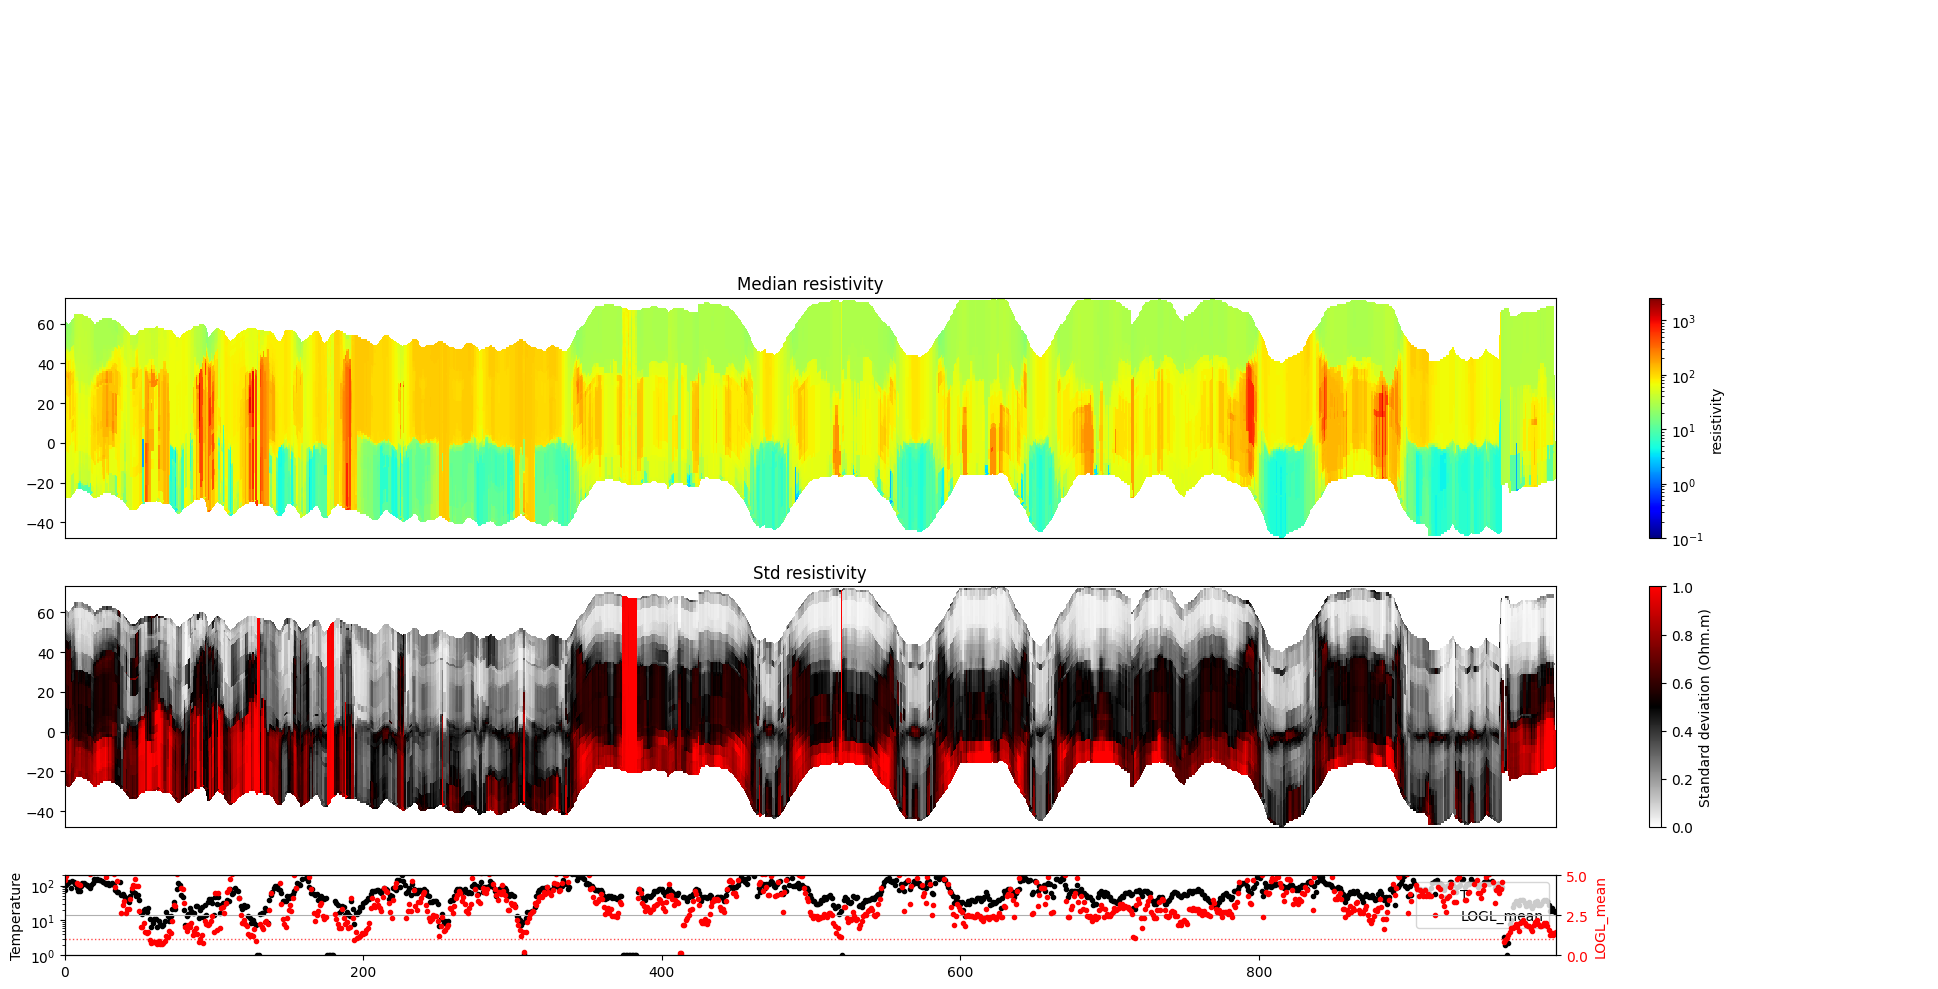

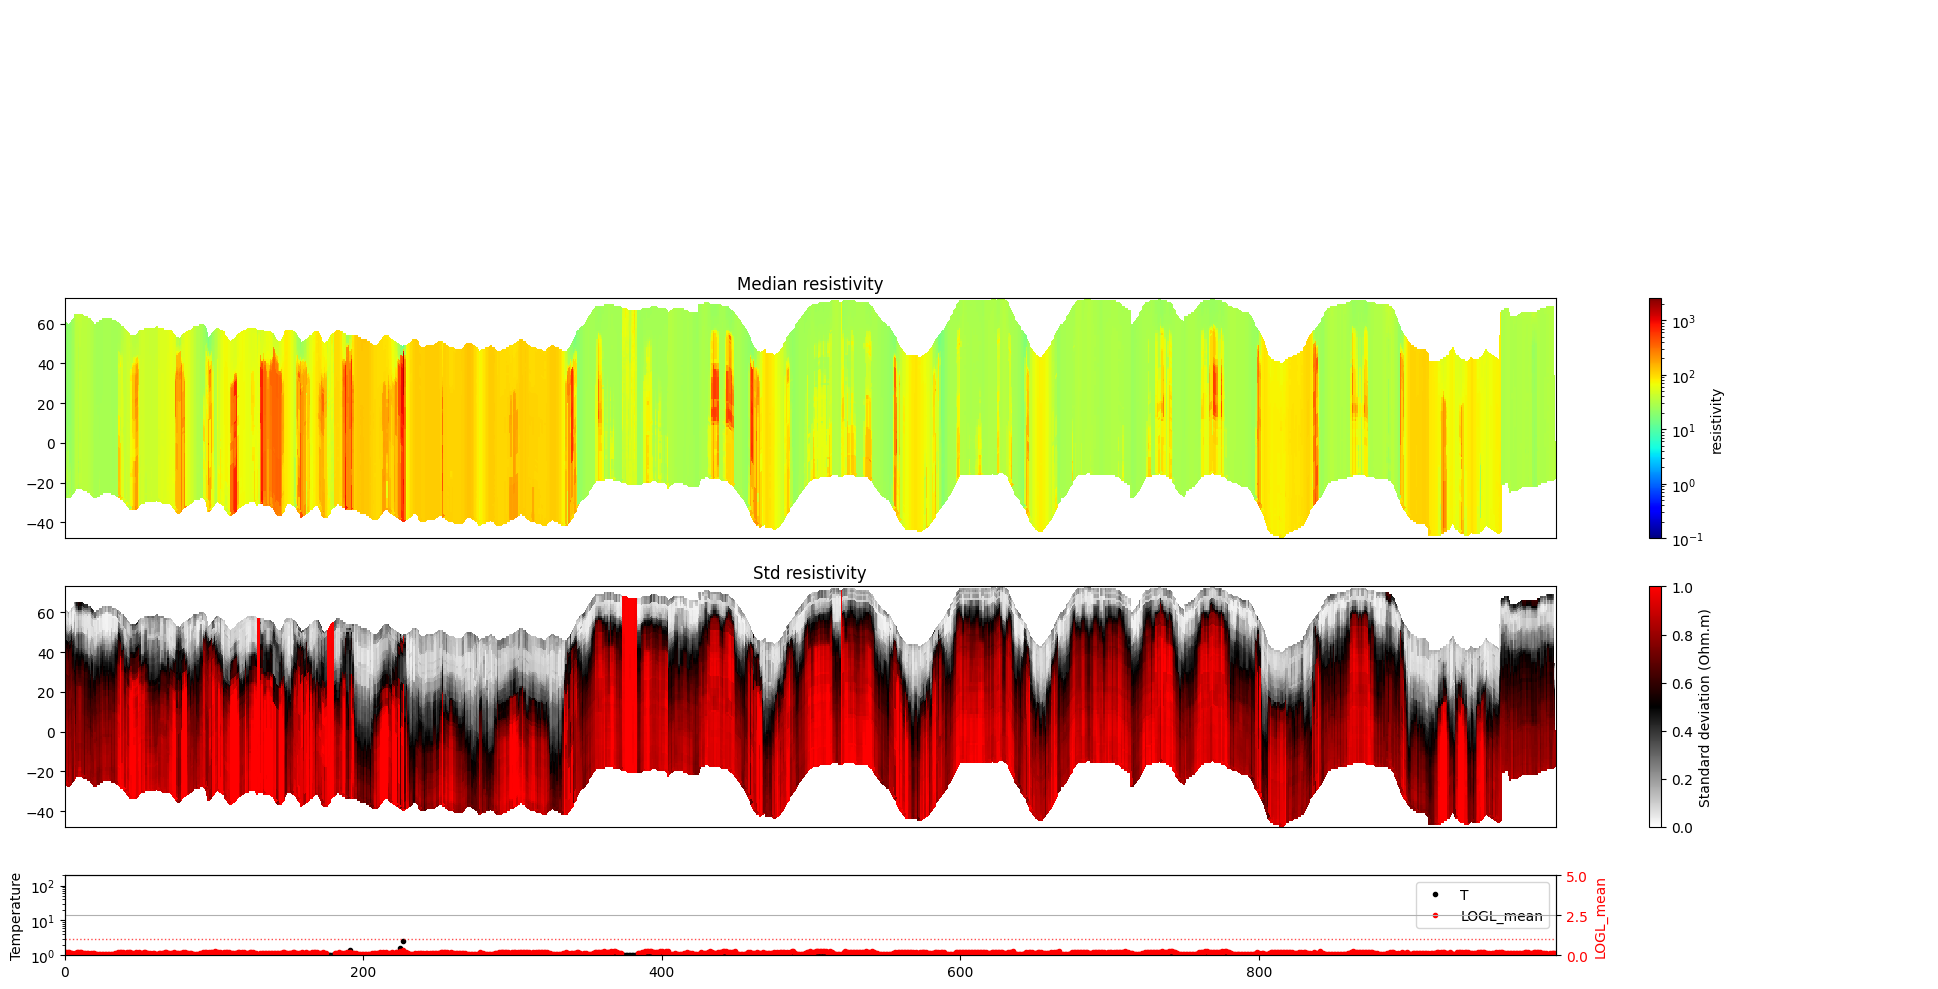

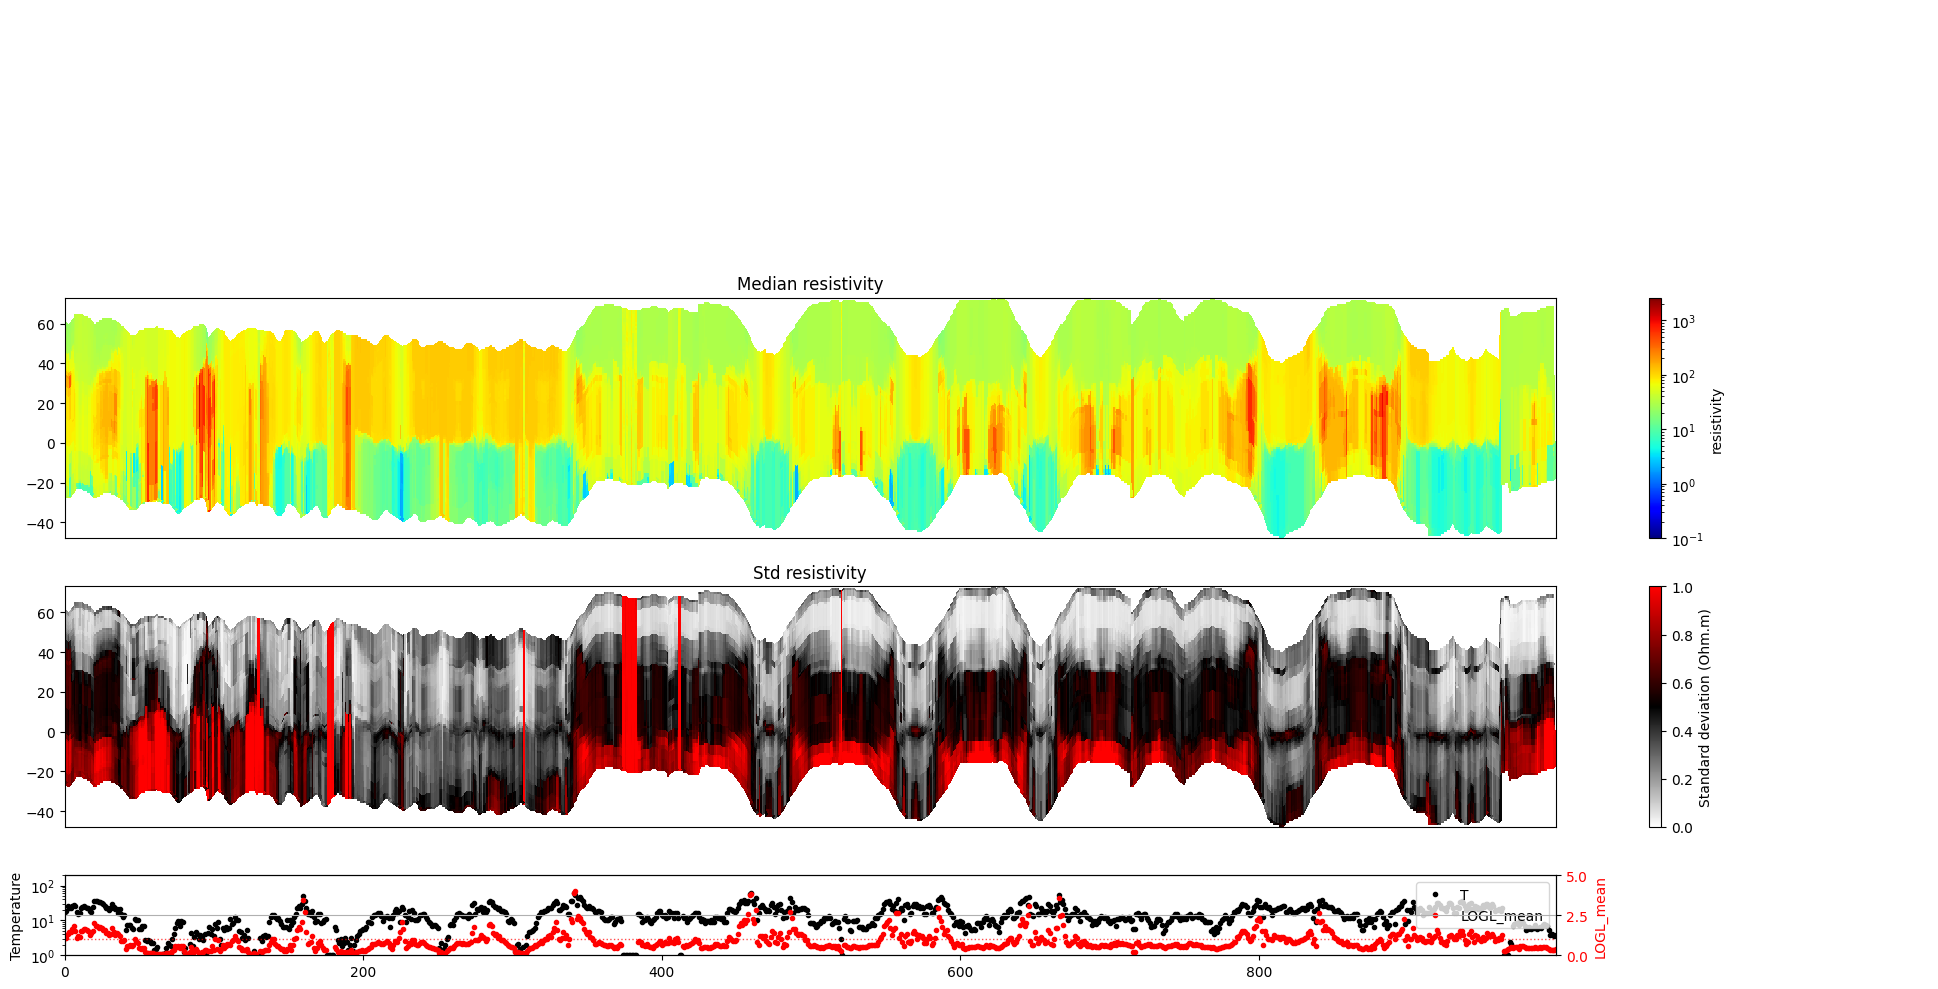

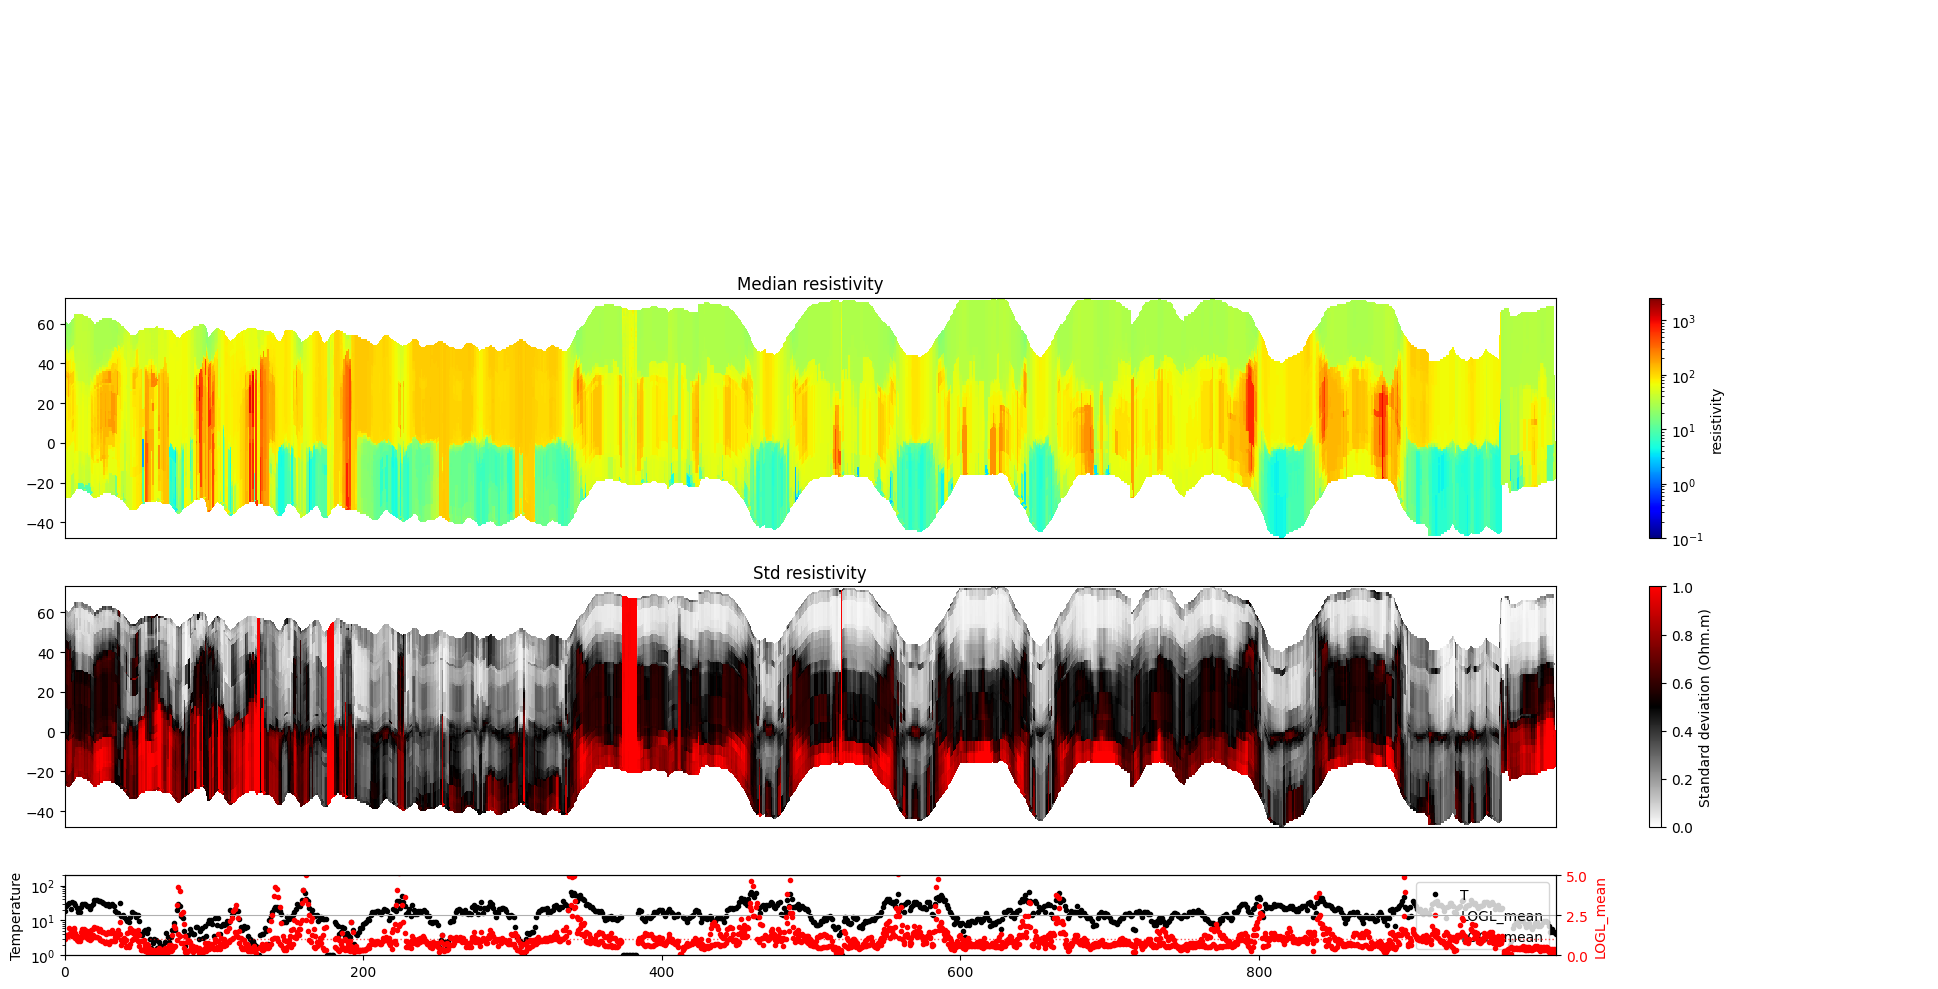

In [12]:
for f_post_h5 in f_post_arr:
    # % Plot Profiles
    ig.plot_profile(f_post_h5, i1=1000, i2=2000, im=1, hardcopy=hardcopy)

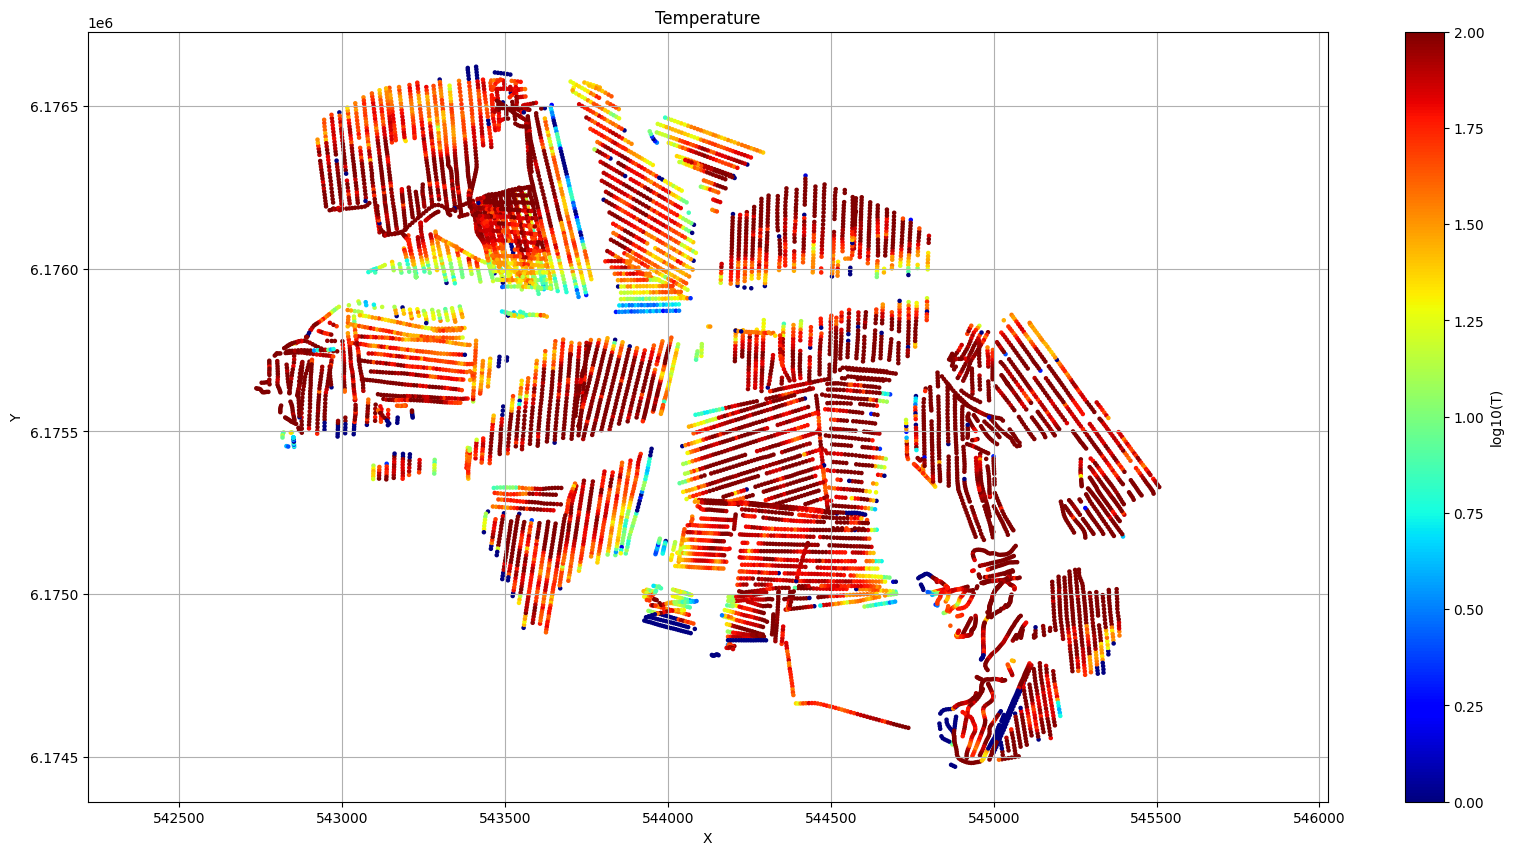

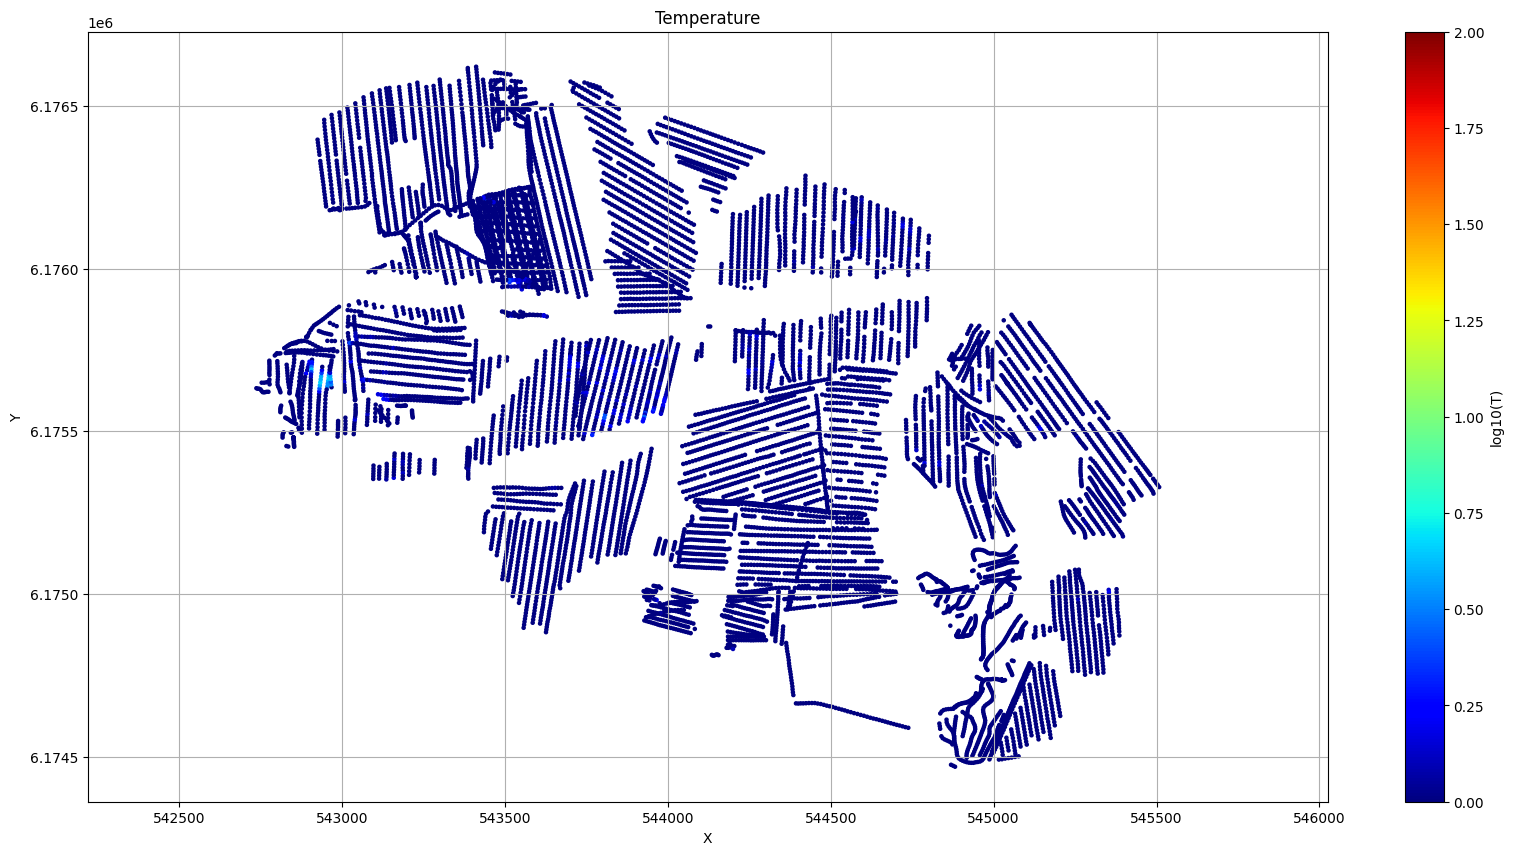

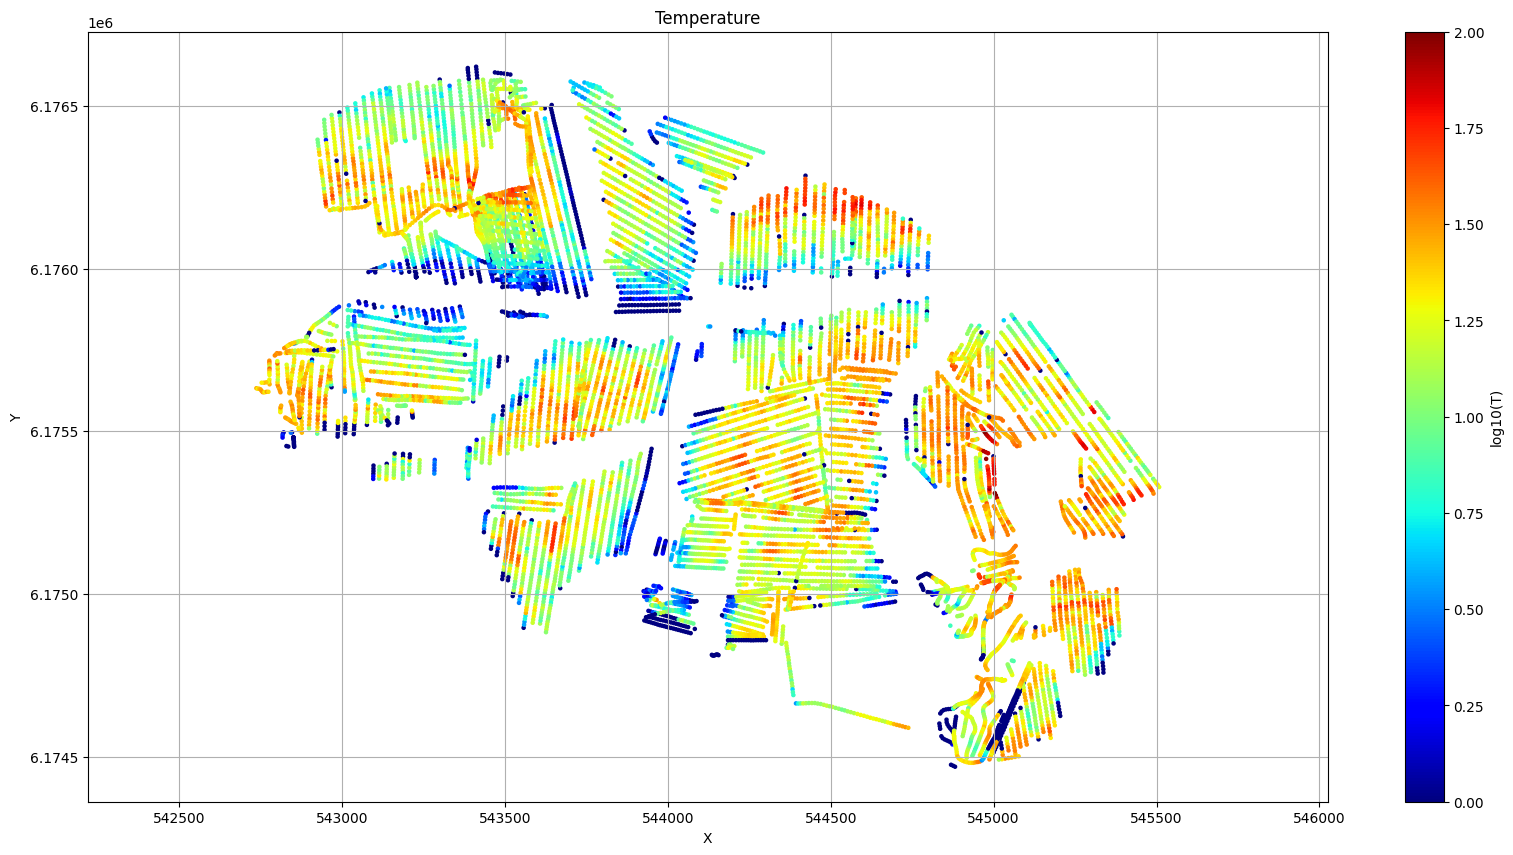

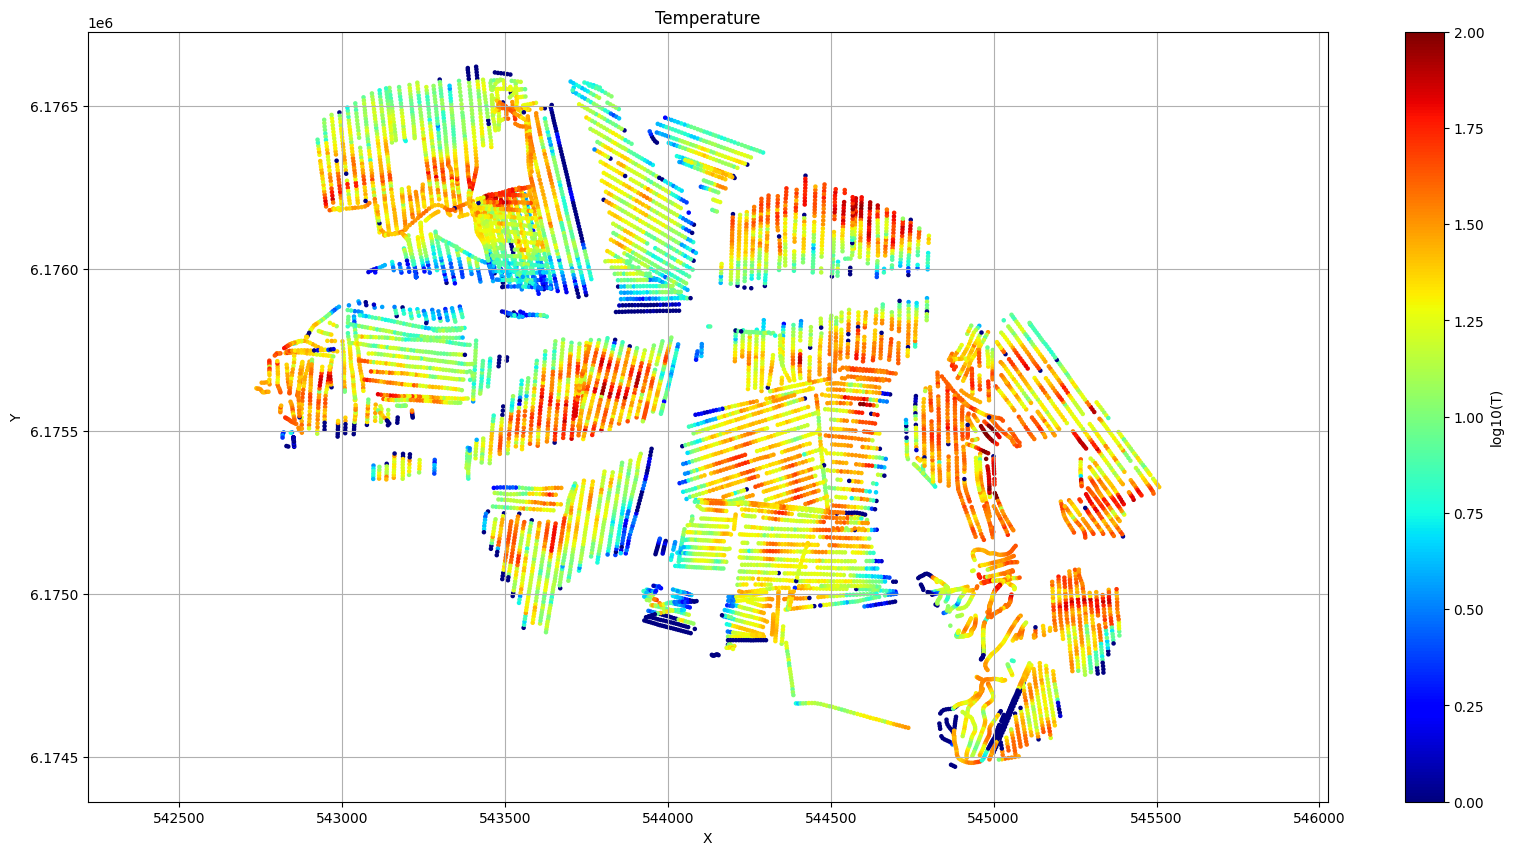

In [13]:
for f_post_h5 in f_post_arr:
    ig.plot_T_EV(f_post_h5, pl='T', hardcopy=hardcopy)
    plt.show()
    #ig.plot_T_EV(f_post_h5, pl='EV', hardcopy=hardcopy)

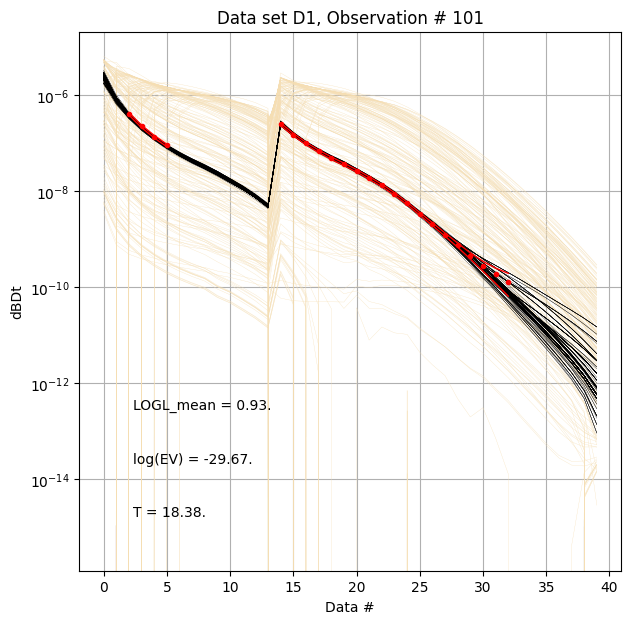

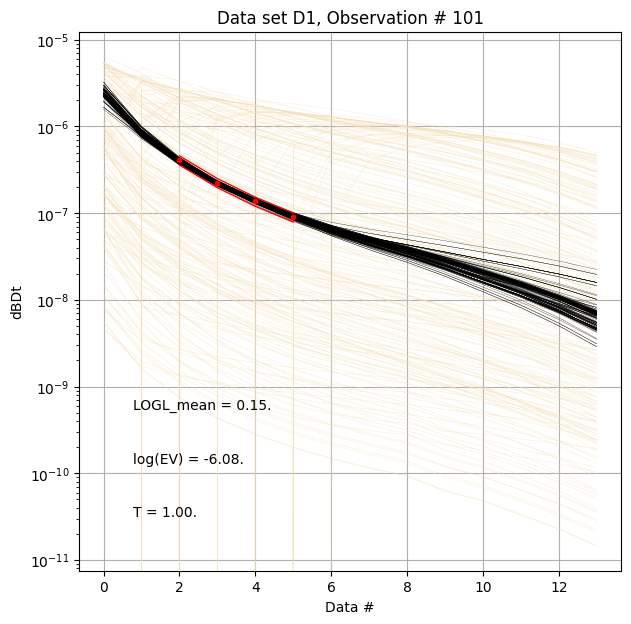

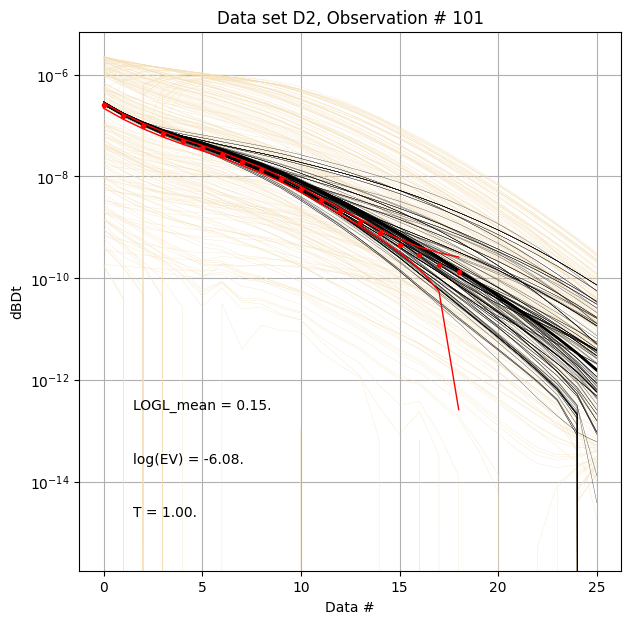

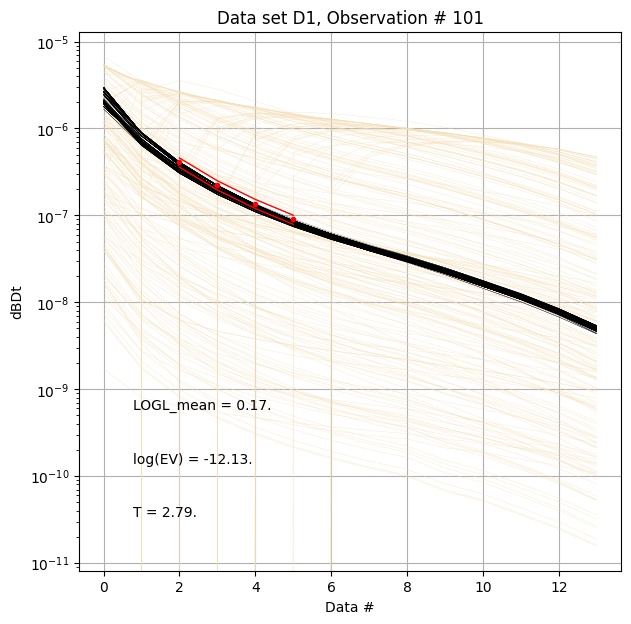

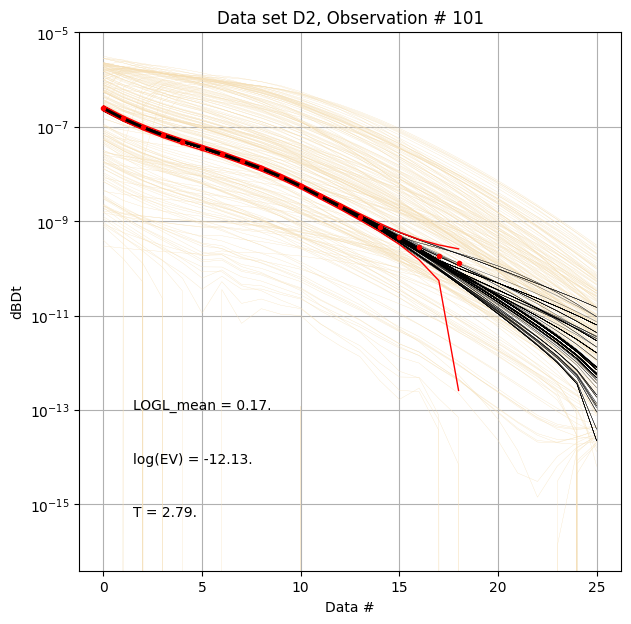

TypeError: only length-1 arrays can be converted to Python scalars

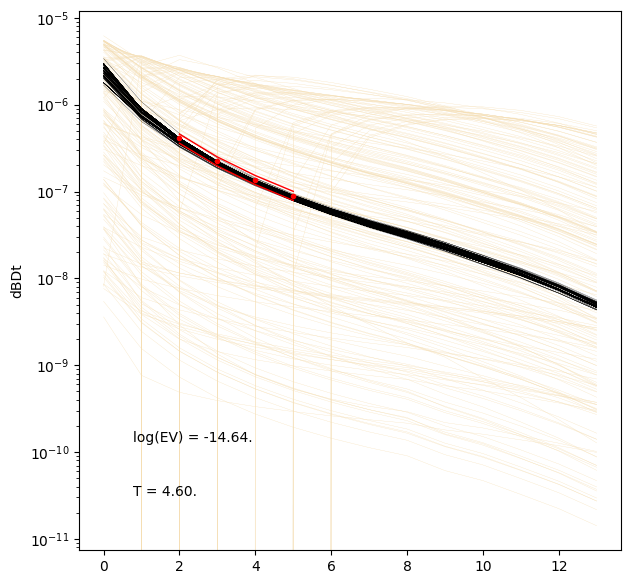

In [14]:
for f_post_h5 in f_post_arr:
    # % Plot prior, posterior, and observed  data
    ig.plot_data_prior_post(f_post_h5, i_plot=100, hardcopy=hardcopy)
    #ig.plot_data_prior_post(f_post_h5, i_plot=0, hardcopy=hardcopy)




Text(0, 0.5, 'N_UNIQUE')

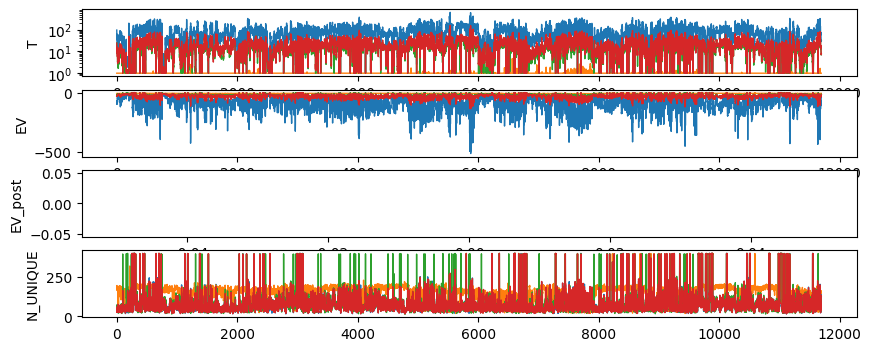

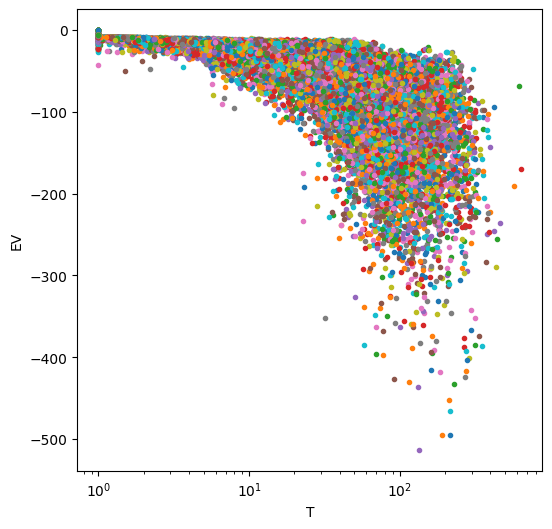

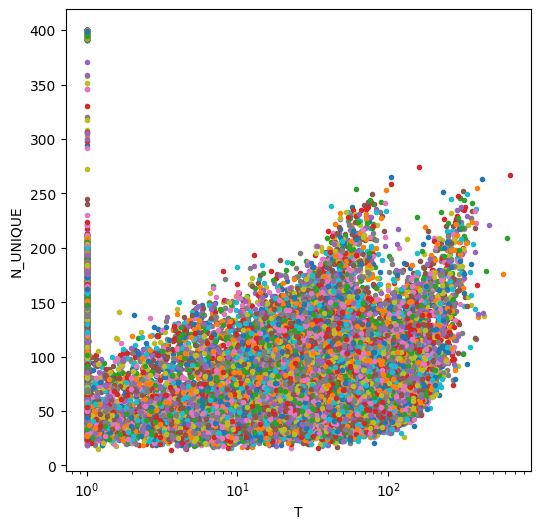

In [15]:
with h5py.File(f_data_h5, 'r') as f:    
    nobs = f['D1/d_obs'].shape[0]
    
ni=len(f_post_arr)

T = np.zeros((ni,nobs))
EV = np.zeros((ni,nobs))
EV_post = np.zeros((ni,nobs))
N_UNIQUE = np.zeros((ni,nobs))

i=-1
for f_post_h5 in f_post_arr:
    with h5py.File(f_post_h5, 'r') as f:
        i=i+1
        T[i] = f['/T'][:]
        EV[i] = f['/EV'][:]
        N_UNIQUE[i] = f['/N_UNIQUE'][:]
        EV_post[i] = f['/EV_post'][:]
    

fig, ax = plt.subplots(4,1,figsize=(10,4))
ax[0].semilogy(T.T,'-', linewidth=1)
ax[0].set_ylabel('T')
ax[1].plot(EV.T,'-', linewidth=1)
ax[1].set_ylabel('EV')
ax[2].plot(EV_post.T,'-', linewidth=1)
ax[2].set_ylabel('EV_post')
ax[3].plot(N_UNIQUE.T,'-', linewidth=1)
ax[3].set_ylabel('N_UNIQUE')

fig=plt.figure(figsize=(6,6))
plt.semilogx(T,EV,'.')
plt.xlabel('T')
plt.ylabel('EV')


fig=plt.figure(figsize=(6,6))
plt.semilogx(T,N_UNIQUE,'.')
plt.xlabel('T')
plt.ylabel('N_UNIQUE')



In [16]:
#ig.post_to_csv(f_post_h5)